https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e

# gym interface

Each environment must implement the following *gym* interface:



```python
import gym
from gym import spaces

class CustomEnv(gym.Env):
  """Custom Environment that follows gym interface"""
  metadata = {'render.modes': ['human']}

  def __init__(self, arg1, arg2, ...):
    super(CustomEnv, self).__init__()    # Define action and observation space
    # They must be gym.spaces objects    # Example when using discrete actions:
    self.action_space = spaces.Discrete(N_DISCRETE_ACTIONS)    # Example for using image as input:
    self.observation_space = spaces.Box(low=0, high=255, shape=
                    (HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)

  def step(self, action):
    # Execute one time step within the environment
      
    
  def reset(self):
    # Reset the state of the environment to an initial state
      
    
  def render(self, mode='human', close=False):
    # Render the environment to the screen
    
```

# house made goldmine - discrete mode

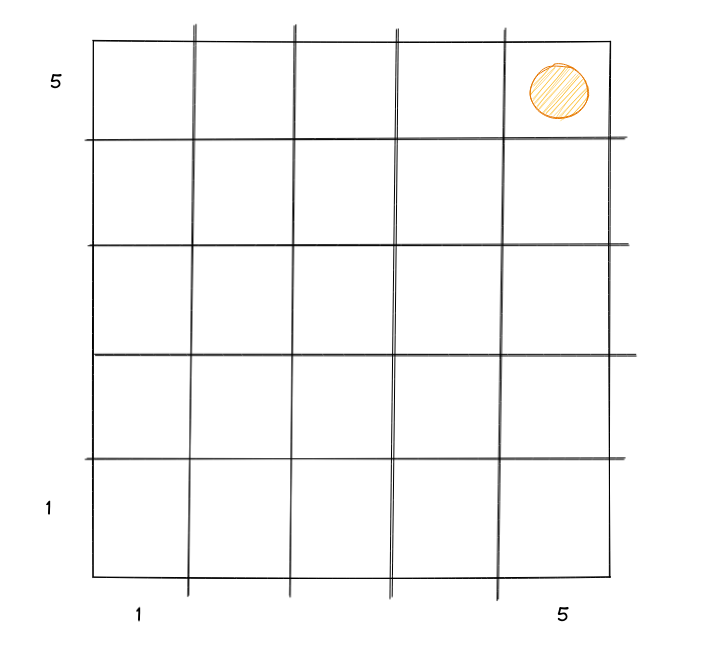

## env

In [1]:
import gym
from gym import spaces
import random

class GoldMine(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(GoldMine, self).__init__()
        #actions: move on the grid, by 1 in any direction: N, S, W, E. Or stay at same position
        #0 - N, 1 - S, 2 - W, 3 - E, 4 - no move
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Box(low=0.0, high=5.0, shape=(2,))
    
    def reset(self):
        self.current_position = self.observation_space.sample()
        self.global_reward = 0
        print(f'reset at position {self.current_position}')
        return self.current_position
        
    def step(self, action):
        if (action == 0) & (self.current_position[1] < 4):
            self.current_position[1] += 1
        if (action == 1) & (self.current_position[1] > 1):
            self.current_position[1] -= 1
        if (action == 2) & (self.current_position[0] > 1):
            self.current_position[0] -= 1
        if (action == 3) & (self.current_position[0] < 4):
            self.current_position[0] += 1
        reward = -1
        done = False
        if (self.current_position[0] > 4) & (self.current_position[1] > 4):
            reward = 10
            done = True
        self.global_reward += reward
        return self.current_position, reward, done, {}
            
    
    def render(self):
        print(f'position {self.current_position}, done {done}, global_reward {self.global_reward}')
            
        

In [21]:
env = GoldMine()
env.reset()
for i in range(100):
    action = env.action_space.sample()
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: env.reset()

    

reset at position [2.1834576 4.387707 ]
position [1.1834576 4.387707 ], done False, global_reward -1
position [0.18345761 4.387707  ], done False, global_reward -2
position [0.18345761 4.387707  ], done False, global_reward -3
position [0.18345761 3.3877072 ], done False, global_reward -4
position [0.18345761 2.3877072 ], done False, global_reward -5
position [0.18345761 3.3877072 ], done False, global_reward -6
position [0.18345761 3.3877072 ], done False, global_reward -7
position [0.18345761 4.387707  ], done False, global_reward -8
position [1.1834576 4.387707 ], done False, global_reward -9
position [2.1834576 4.387707 ], done False, global_reward -10
position [2.1834576 4.387707 ], done False, global_reward -11
position [3.1834576 4.387707 ], done False, global_reward -12
position [3.1834576 3.3877072], done False, global_reward -13
position [3.1834576 3.3877072], done False, global_reward -14
position [3.1834576 2.3877072], done False, global_reward -15
position [4.1834574 2.387

## checkenv

In [25]:
import stable_baselines3
from stable_baselines3.common.env_checker import check_env

check_env(env)

reset at position [2.0086293 2.6581218]


## train DQN

In [26]:
from stable_baselines3 import DQN

# del model
model = DQN("MlpPolicy", env, verbose=1, tensorboard_log="./tensorboard/")

model.learn(total_timesteps=100000, log_interval=4, tb_log_name="goldmine simple reward")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [0.38879222 3.11274   ]
Logging to ./tensorboard/goldmine simple reward_5
reset at position [2.4971218 4.596903 ]
reset at position [4.617721  2.5378072]
reset at position [2.2374182 2.56393  ]
reset at position [1.874755  2.0841026]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 260      |
|    ep_rew_mean      | -248     |
|    exploration rate | 0.901    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 13360    |
|    time_elapsed     | 0        |
|    total timesteps  | 1038     |
----------------------------------
reset at position [0.70807564 2.6355124 ]
reset at position [1.6830124 4.3138037]
reset at position [3.7340128 1.8178161]
reset at position [2.3060865 4.3561025]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 176      |
|

reset at position [2.0321836 0.7774397]
reset at position [2.0285695 4.491855 ]
reset at position [2.6363208 1.1837854]
reset at position [3.9526815 4.360886 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | -93.4    |
|    exploration rate | 0.365    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 12884    |
|    time_elapsed     | 0        |
|    total timesteps  | 6679     |
----------------------------------
reset at position [1.0032704 0.6787404]
reset at position [1.6349262 4.2174277]
reset at position [2.0591626 4.0248075]
reset at position [3.9444196 3.7047896]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.5     |
|    ep_rew_mean      | -88.5    |
|    exploration rate | 0.357    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 12799    |
|    time_elaps

reset at position [1.8055774 1.7811097]
reset at position [2.570892 4.211634]
reset at position [1.9347003 2.8254445]
reset at position [4.9507656 4.5053988]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | -94.3    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 12579    |
|    time_elapsed     | 1        |
|    total timesteps  | 13384    |
----------------------------------
reset at position [4.0984654 1.3345515]
reset at position [1.2317377 1.7636286]
reset at position [1.7741371  0.21684593]
reset at position [3.303615  4.6802363]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 112      |
|    ep_rew_mean      | -101     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 12658    |
|    time_elaps

reset at position [0.3140077 1.7344857]
reset at position [1.6534585 1.382787 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 125      |
|    ep_rew_mean      | -114     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 12623    |
|    time_elapsed     | 1        |
|    total timesteps  | 20729    |
----------------------------------
reset at position [0.81850845 3.3697162 ]
reset at position [2.523683  3.0771017]
reset at position [3.0618     0.09207652]
reset at position [1.6687347 1.6117177]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 127      |
|    ep_rew_mean      | -116     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 12569    |
|    time_elapsed     | 1        |
|    total timesteps  | 21082    |
---------------------

reset at position [3.8914988 2.2178233]
reset at position [4.6799474 1.3674943]
reset at position [1.3844587 4.0427465]
reset at position [1.4355637 4.0621   ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.4     |
|    ep_rew_mean      | -86.4    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 12377    |
|    time_elapsed     | 2        |
|    total timesteps  | 26571    |
----------------------------------
reset at position [4.128023  2.2670863]
reset at position [3.7907255 2.4707203]
reset at position [3.8908644 1.3704114]
reset at position [4.2628145  0.04779857]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.8     |
|    ep_rew_mean      | -81.8    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 12373    |
|    time_ela

reset at position [4.07979  4.098235]
reset at position [0.867951  2.1193738]
reset at position [3.1844501 2.7796974]
reset at position [4.445135  2.4254365]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.3     |
|    ep_rew_mean      | -88.3    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 12397    |
|    time_elapsed     | 2        |
|    total timesteps  | 33145    |
----------------------------------
reset at position [3.5459511 3.4296925]
reset at position [1.4548938 2.8272169]
reset at position [4.232604  3.1358726]
reset at position [3.5480537 3.7728562]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.3     |
|    ep_rew_mean      | -88.3    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 12399    |
|    time_elapsed

reset at position [1.7134537 4.1131816]
reset at position [4.815364  2.1002126]
reset at position [3.5519416 3.85216  ]
reset at position [2.550117 3.721382]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | -93.9    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 12470    |
|    time_elapsed     | 3        |
|    total timesteps  | 39405    |
----------------------------------
reset at position [2.2941744 0.5036047]
reset at position [2.43435   4.4286947]
reset at position [0.5054049 3.1416621]
reset at position [2.612832  3.5034633]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -92.2    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 12474    |
|    time_elapsed

reset at position [3.454512  3.0457783]
reset at position [3.2731762 4.953947 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 114      |
|    ep_rew_mean      | -103     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 12466    |
|    time_elapsed     | 3        |
|    total timesteps  | 46097    |
----------------------------------
reset at position [4.221417  2.1758304]
reset at position [4.6643877 3.352033 ]
reset at position [1.564888   0.14550436]
reset at position [4.2048335 4.5389495]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 114      |
|    ep_rew_mean      | -103     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 12468    |
|    time_elapsed     | 3        |
|    total timesteps  | 46506    |
-----------------------

reset at position [3.7484136 3.8060436]
reset at position [3.4696796  0.89566225]
reset at position [2.5912476 2.8699121]
reset at position [4.536435   0.30947956]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 133      |
|    ep_rew_mean      | -122     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 4038     |
|    time_elapsed     | 13       |
|    total timesteps  | 54228    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00381  |
|    n_updates        | 1056     |
----------------------------------
reset at position [2.0158682 4.8567953]
reset at position [0.31892756 2.3034222 ]
reset at position [0.497777   0.28963733]
reset at position [0.903823   0.20034033]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 130      |
|    ep_rew_mean      | -119     |
|    

reset at position [1.0663512  0.36263654]
reset at position [2.2011569 3.9697773]
reset at position [1.2048064 3.2274525]
reset at position [4.950969   0.69398636]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83       |
|    ep_rew_mean      | -72      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 3614     |
|    time_elapsed     | 15       |
|    total timesteps  | 54805    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0027   |
|    n_updates        | 1201     |
----------------------------------
reset at position [2.766791  1.7004488]
reset at position [2.1993134  0.01408581]
reset at position [0.4490004 2.0697992]
reset at position [3.5223885 3.6284876]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.7     |
|    ep_rew_mean      | -68.7    |
|    expl

reset at position [4.915267  1.2009624]
reset at position [1.4496158 4.3802075]
reset at position [0.7396451 1.8547978]
reset at position [3.464962  3.7941372]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | -2       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 3205     |
|    time_elapsed     | 17       |
|    total timesteps  | 55157    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00203  |
|    n_updates        | 1289     |
----------------------------------
reset at position [4.712815 2.897759]
reset at position [3.8446262 3.214226 ]
reset at position [1.2669847 3.8402226]
reset at position [3.5703917 1.2221956]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.41     |
|    ep_rew_mean      | 1.59     |
|    exploration 

reset at position [3.6256404 1.4908347]
reset at position [0.09753792 1.0704803 ]
reset at position [4.1714587 1.8598436]
reset at position [1.2469718 4.735807 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.64     |
|    ep_rew_mean      | 2.36     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 628      |
|    fps              | 2964     |
|    time_elapsed     | 18       |
|    total timesteps  | 55477    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00135  |
|    n_updates        | 1369     |
----------------------------------
reset at position [3.7800238 1.593062 ]
reset at position [2.1102083 4.0960283]
reset at position [0.01506577 3.086094  ]
reset at position [1.4340699  0.40659547]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.87     |
|    ep_rew_mean      | 4.13     |
|    expl

reset at position [1.2613131  0.90391237]
reset at position [1.2759764 4.6768494]
reset at position [3.3640118 1.8305033]
reset at position [0.8304234 3.036611 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.46     |
|    ep_rew_mean      | 4.54     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 2876     |
|    time_elapsed     | 19       |
|    total timesteps  | 55779    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.001    |
|    n_updates        | 1444     |
----------------------------------
reset at position [1.4912982  0.34677193]
reset at position [2.930278  2.6576526]
reset at position [1.3250644 2.606418 ]
reset at position [4.298294 3.241024]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.43     |
|    ep_rew_mean      | 4.57     |
|    explorat

reset at position [1.9409099 3.982278 ]
reset at position [3.8641944  0.70918405]
reset at position [0.6165688 1.0436435]
reset at position [4.862458   0.20090145]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.71     |
|    ep_rew_mean      | 3.29     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 724      |
|    fps              | 2679     |
|    time_elapsed     | 20       |
|    total timesteps  | 56130    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.296    |
|    n_updates        | 1532     |
----------------------------------
reset at position [2.2090578 3.8317137]
reset at position [3.6966064  0.64285636]
reset at position [2.615352  2.7255363]
reset at position [2.8522024 4.0883136]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.69     |
|    ep_rew_mean      | 4.31     |
|    expl

reset at position [1.5153091 1.7226143]
reset at position [3.163014   0.49994385]
reset at position [4.2832355 2.0759676]
reset at position [1.2361149  0.20163022]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.15     |
|    ep_rew_mean      | 2.85     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 772      |
|    fps              | 2461     |
|    time_elapsed     | 22       |
|    total timesteps  | 56579    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0016   |
|    n_updates        | 1644     |
----------------------------------
reset at position [2.2467172 3.8404744]
reset at position [0.40509987 4.719328  ]
reset at position [4.0929456 4.206018 ]
reset at position [2.638952  3.5156815]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.15     |
|    ep_rew_mean      | 2.85     |
|    expl

reset at position [0.8993416 4.9098325]
reset at position [0.894791 2.768673]
reset at position [4.7530246 0.8654486]
reset at position [4.304495  1.3491141]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.37     |
|    ep_rew_mean      | 2.63     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 820      |
|    fps              | 2315     |
|    time_elapsed     | 24       |
|    total timesteps  | 56947    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00116  |
|    n_updates        | 1736     |
----------------------------------
reset at position [1.8456405  0.04119956]
reset at position [1.0800159 3.6452281]
reset at position [2.977274  3.8246582]
reset at position [4.0835423 2.2166214]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.36     |
|    ep_rew_mean      | 2.64     |
|    exploratio

reset at position [0.8624488  0.37724164]
reset at position [1.3812058 2.6415854]
reset at position [1.8431154 1.2028718]
reset at position [4.09247    0.90098536]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.76     |
|    ep_rew_mean      | 3.24     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 2195     |
|    time_elapsed     | 26       |
|    total timesteps  | 57338    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00111  |
|    n_updates        | 1834     |
----------------------------------
reset at position [2.2248282 2.4188175]
reset at position [4.8286376 4.552395 ]
reset at position [4.4551597 1.7480171]
reset at position [0.552401  4.0192647]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.71     |
|    ep_rew_mean      | 3.29     |
|    explor

reset at position [3.9832418 2.1528025]
reset at position [2.241289  1.2604247]
reset at position [0.5889108 1.785611 ]
reset at position [1.2462624 2.993735 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.4      |
|    ep_rew_mean      | 3.6      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 916      |
|    fps              | 2099     |
|    time_elapsed     | 27       |
|    total timesteps  | 57668    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00237  |
|    n_updates        | 1916     |
----------------------------------
reset at position [1.9195362 3.0291762]
reset at position [3.3445108 0.6359582]
reset at position [1.9708096 3.6375604]
reset at position [0.9654701 4.389057 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.4      |
|    ep_rew_mean      | 3.6      |
|    exploratio

reset at position [0.7422996 3.8827896]
reset at position [1.4521848  0.81850183]
reset at position [2.5442922 2.657335 ]
reset at position [4.222722  1.1310009]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.35     |
|    ep_rew_mean      | 3.65     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 964      |
|    fps              | 2008     |
|    time_elapsed     | 28       |
|    total timesteps  | 58049    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00179  |
|    n_updates        | 2012     |
----------------------------------
reset at position [3.8675966 1.0241201]
reset at position [2.1292858 4.651908 ]
reset at position [0.93102837 2.4242609 ]
reset at position [1.5673671 0.7971439]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.26     |
|    ep_rew_mean      | 3.74     |
|    explor

reset at position [1.2498167 2.000868 ]
reset at position [1.41239    0.86131483]
reset at position [3.5556993 3.8773968]
reset at position [4.5658526 1.5701662]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 1.17     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1012     |
|    fps              | 1868     |
|    time_elapsed     | 31       |
|    total timesteps  | 58626    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00237  |
|    n_updates        | 2156     |
----------------------------------
reset at position [0.28346187 0.7531528 ]
reset at position [2.6253114 1.5362188]
reset at position [0.46717143 2.963295  ]
reset at position [3.32709   0.8880722]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 0.94     |
|    expl

reset at position [1.8502861  0.11249589]
reset at position [4.8515916 2.6658196]
reset at position [4.6163397 2.4169505]
reset at position [1.5334162 2.506171 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.32     |
|    ep_rew_mean      | 2.68     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 1803     |
|    time_elapsed     | 32       |
|    total timesteps  | 58861    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.3      |
|    n_updates        | 2215     |
----------------------------------
reset at position [2.0248897 4.664097 ]
reset at position [3.8011155 1.5001523]
reset at position [4.9898367 1.1142362]
reset at position [4.4076366 4.5817876]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.26     |
|    ep_rew_mean      | 2.74     |
|    explorat

reset at position [2.0837417 0.2419701]
reset at position [0.49585733 1.2156603 ]
reset at position [1.6090949 2.486375 ]
reset at position [3.6422112 2.4273999]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.81     |
|    ep_rew_mean      | 2.19     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1108     |
|    fps              | 1689     |
|    time_elapsed     | 35       |
|    total timesteps  | 59489    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.293    |
|    n_updates        | 2372     |
----------------------------------
reset at position [3.9808965 3.1969392]
reset at position [0.46956775 2.4908977 ]
reset at position [2.020873   0.27650213]
reset at position [1.2810133 1.092716 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.82     |
|    ep_rew_mean      | 2.18     |
|    expl

reset at position [2.0293047  0.27525166]
reset at position [0.66965616 0.5447725 ]
reset at position [1.0890324 0.4925598]
reset at position [4.8123946 3.922913 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 0.79     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1156     |
|    fps              | 1633     |
|    time_elapsed     | 36       |
|    total timesteps  | 59867    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.58     |
|    n_updates        | 2466     |
----------------------------------
reset at position [4.0317283 2.9627976]
reset at position [1.2288725 0.4597612]
reset at position [4.0101523 4.6706147]
reset at position [1.8362818 3.7074566]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 0.83     |
|    explor

reset at position [3.652261   0.73472255]
reset at position [4.2749677 3.3853168]
reset at position [4.2840605 1.1273128]
reset at position [2.278222  2.0301666]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.51     |
|    ep_rew_mean      | 4.49     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1204     |
|    fps              | 1591     |
|    time_elapsed     | 37       |
|    total timesteps  | 60087    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.071    |
|    n_updates        | 2521     |
----------------------------------
reset at position [3.963788  1.4749327]
reset at position [2.2222888 4.140674 ]
reset at position [0.90622216 4.745142  ]
reset at position [2.9058704 3.6871054]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.12     |
|    ep_rew_mean      | 4.88     |
|    explor

reset at position [3.6853948 3.0828555]
reset at position [0.14077014 2.9905484 ]
reset at position [1.960512  3.8499813]
reset at position [1.6943554 4.209135 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.04     |
|    ep_rew_mean      | 3.96     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1252     |
|    fps              | 1546     |
|    time_elapsed     | 39       |
|    total timesteps  | 60509    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0151   |
|    n_updates        | 2627     |
----------------------------------
reset at position [2.6301725 3.0232415]
reset at position [3.900933   0.88573015]
reset at position [3.3920557 4.279509 ]
reset at position [4.9579406 4.733442 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.55     |
|    ep_rew_mean      | 4.45     |
|    explor

reset at position [3.698149 4.968487]
reset at position [3.112039  4.4066005]
reset at position [1.5046701 4.3103943]
reset at position [4.6234517 0.6036384]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.38     |
|    ep_rew_mean      | 4.62     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 1520     |
|    time_elapsed     | 39       |
|    total timesteps  | 60712    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.312    |
|    n_updates        | 2677     |
----------------------------------
reset at position [4.609258  4.5975046]
reset at position [2.5735838 3.649883 ]
reset at position [4.9909334 3.3483777]
reset at position [4.8205347 3.9449701]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.34     |
|    ep_rew_mean      | 4.66     |
|    exploration 

reset at position [4.500519  0.5552941]
reset at position [2.0262244 3.1610909]
reset at position [4.7163143 4.90512  ]
reset at position [0.90607727 1.2741848 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 6.74     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 1488     |
|    time_elapsed     | 40       |
|    total timesteps  | 60918    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.919    |
|    n_updates        | 2729     |
----------------------------------
reset at position [1.9438351 1.4759552]
reset at position [4.670161  1.6814064]
reset at position [3.8677058 0.8044864]
reset at position [4.1592307 2.4973373]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 6.68     |
|    explorat

reset at position [1.1246428 1.4491171]
reset at position [3.2990913 2.5673904]
reset at position [1.7773952 1.1494316]
reset at position [1.1306934 3.4043176]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1396     |
|    fps              | 1451     |
|    time_elapsed     | 42       |
|    total timesteps  | 61155    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00672  |
|    n_updates        | 2788     |
----------------------------------
reset at position [4.769491  1.8175907]
reset at position [0.2639512  0.27382493]
reset at position [1.9737139 3.765499 ]
reset at position [4.817928  3.5225084]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.62     |
|    ep_rew_mean      | 6.38     |
|    explorat

reset at position [3.704427   0.43490052]
reset at position [1.8090643 3.4821665]
reset at position [3.022289  1.2426006]
reset at position [1.3814982 1.892261 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 6.57     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1444     |
|    fps              | 1444     |
|    time_elapsed     | 42       |
|    total timesteps  | 61349    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.615    |
|    n_updates        | 2837     |
----------------------------------
reset at position [3.5368257 2.3182938]
reset at position [1.4034042 3.4438567]
reset at position [0.9826166 4.266797 ]
reset at position [2.5140266 4.8857784]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5      |
|    ep_rew_mean      | 6.5      |
|    explorat

reset at position [4.5846367 4.710127 ]
reset at position [1.0256497 2.0117712]
reset at position [0.04450879 0.9135761 ]
reset at position [4.698223  2.5853631]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 6.47     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1492     |
|    fps              | 1409     |
|    time_elapsed     | 43       |
|    total timesteps  | 61587    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00223  |
|    n_updates        | 2896     |
----------------------------------
reset at position [1.5832919 4.216382 ]
reset at position [1.2266542 3.3375027]
reset at position [0.8117458 1.6162583]
reset at position [1.5416409 2.4371557]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    explorat

reset at position [2.754669  3.5884106]
reset at position [2.507026  3.8895693]
reset at position [4.5482483 4.366533 ]
reset at position [4.6689634 3.6247356]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.67     |
|    ep_rew_mean      | 6.33     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1540     |
|    fps              | 1396     |
|    time_elapsed     | 44       |
|    total timesteps  | 61799    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.3      |
|    n_updates        | 2949     |
----------------------------------
reset at position [2.6243248 1.9463284]
reset at position [4.0304303 1.6401061]
reset at position [2.0463762 3.8779447]
reset at position [2.2937472 3.4704037]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64     |
|    ep_rew_mean      | 6.36     |
|    exploratio

reset at position [2.026304  4.4403977]
reset at position [2.7285159 3.993097 ]
reset at position [2.1310568 4.43342  ]
reset at position [4.3029337 2.3163536]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84     |
|    ep_rew_mean      | 6.16     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 1366     |
|    time_elapsed     | 45       |
|    total timesteps  | 62051    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.611    |
|    n_updates        | 3012     |
----------------------------------
reset at position [2.8526897 2.4488394]
reset at position [1.4153098 4.6279893]
reset at position [4.1130977 3.51967  ]
reset at position [0.05165059 4.396953  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75     |
|    ep_rew_mean      | 6.25     |
|    explorat

reset at position [3.8899539 4.145689 ]
reset at position [0.99838847 2.1940033 ]
reset at position [3.404477  4.9370794]
reset at position [1.9762958 2.1562912]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 6.58     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1636     |
|    fps              | 1361     |
|    time_elapsed     | 45       |
|    total timesteps  | 62228    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.302    |
|    n_updates        | 3056     |
----------------------------------
reset at position [3.216387   0.17532715]
reset at position [1.1509616  0.49346152]
reset at position [2.1594183 3.6916862]
reset at position [1.5168984 4.8164067]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54     |
|    ep_rew_mean      | 6.46     |
|    expl

reset at position [0.28413793 1.3253657 ]
reset at position [2.756984  1.5532311]
reset at position [0.4293944 4.127122 ]
reset at position [1.5269928 2.1395288]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 6.73     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1684     |
|    fps              | 1330     |
|    time_elapsed     | 46       |
|    total timesteps  | 62470    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.312    |
|    n_updates        | 3117     |
----------------------------------
reset at position [0.22428961 4.523536  ]
reset at position [0.59911793 1.4137027 ]
reset at position [4.020552  1.0443507]
reset at position [3.4505649 2.502744 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 6.6      |
|    expl

reset at position [2.5426433 0.7993602]
reset at position [0.48595712 4.721468  ]
reset at position [3.4015684  0.08162477]
reset at position [1.6058038 4.6292157]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 6.37     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1732     |
|    fps              | 1324     |
|    time_elapsed     | 47       |
|    total timesteps  | 62678    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00661  |
|    n_updates        | 3169     |
----------------------------------
reset at position [3.4594681 3.2844508]
reset at position [2.0899954 1.2713169]
reset at position [2.6860654 1.1161824]
reset at position [4.4840207 1.6562127]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65     |
|    ep_rew_mean      | 6.35     |
|    explor

reset at position [3.052191  2.2446954]
reset at position [0.55718    0.61775804]
reset at position [3.1194952 1.2120632]
reset at position [1.4554236 3.6295304]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 6.79     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1780     |
|    fps              | 1309     |
|    time_elapsed     | 48       |
|    total timesteps  | 62868    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00548  |
|    n_updates        | 3216     |
----------------------------------
reset at position [2.6719952 2.6721106]
reset at position [3.7731335 4.0670414]
reset at position [3.7406828 2.496775 ]
reset at position [3.8547797 3.2169666]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 6.88     |
|    explorat

reset at position [1.7554159 3.489218 ]
reset at position [1.1897247 2.5400977]
reset at position [3.1273217 3.854026 ]
reset at position [2.8816025 1.8562706]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.9      |
|    ep_rew_mean      | 5.1      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1828     |
|    fps              | 1285     |
|    time_elapsed     | 49       |
|    total timesteps  | 63246    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.316    |
|    n_updates        | 3311     |
----------------------------------
reset at position [3.5617645 4.815582 ]
reset at position [0.9750641 4.7376814]
reset at position [4.158944  4.8123417]
reset at position [1.1363744 2.2669315]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 5.21     |
|    exploratio

reset at position [1.6474171 4.1050873]
reset at position [3.41026   1.3039719]
reset at position [2.7277348  0.78949606]
reset at position [1.1534674 2.8380668]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.25     |
|    ep_rew_mean      | 4.75     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1876     |
|    fps              | 1259     |
|    time_elapsed     | 50       |
|    total timesteps  | 63472    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.605    |
|    n_updates        | 3367     |
----------------------------------
reset at position [4.75495   1.6955432]
reset at position [2.08515   1.3394237]
reset at position [3.30475   2.7255855]
reset at position [3.95935   1.6848392]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.2      |
|    ep_rew_mean      | 4.8      |
|    explorat

reset at position [4.3286724  0.24624613]
reset at position [4.9547887 1.2939198]
reset at position [2.520347   0.84429526]
reset at position [2.9607315 2.6251845]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.82     |
|    ep_rew_mean      | 6.18     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1924     |
|    fps              | 1235     |
|    time_elapsed     | 51       |
|    total timesteps  | 63714    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0168   |
|    n_updates        | 3428     |
----------------------------------
reset at position [3.8501759 4.8014927]
reset at position [1.9423336  0.43008414]
reset at position [4.7092047 4.9343   ]
reset at position [2.814823   0.94044226]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81     |
|    ep_rew_mean      | 6.19     |
|    ex

reset at position [2.3528385 2.950625 ]
reset at position [0.870045  2.9911401]
reset at position [1.0573249 1.6651611]
reset at position [1.8457981 2.6497064]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 6.3      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1972     |
|    fps              | 1215     |
|    time_elapsed     | 52       |
|    total timesteps  | 63923    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.306    |
|    n_updates        | 3480     |
----------------------------------
reset at position [0.49841216 0.5021442 ]
reset at position [4.1017423 2.8350277]
reset at position [3.9357593 4.17406  ]
reset at position [1.2614774 3.0886638]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 6.3      |
|    explorat

reset at position [3.3402417 2.6632996]
reset at position [4.6432204 4.7869263]
reset at position [0.3481821 1.0148174]
reset at position [2.7551596 2.0859833]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 6.54     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2020     |
|    fps              | 1202     |
|    time_elapsed     | 53       |
|    total timesteps  | 64144    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.318    |
|    n_updates        | 3535     |
----------------------------------
reset at position [3.459055   0.80414814]
reset at position [4.4226665 2.591306 ]
reset at position [1.654842  2.3653636]
reset at position [2.2605562  0.84994346]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 6.54     |
|    explor

reset at position [2.794245 4.055771]
reset at position [1.7762301 4.1843295]
reset at position [0.36785123 4.2794976 ]
reset at position [1.8017861 2.7914383]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5      |
|    ep_rew_mean      | 6.5      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2068     |
|    fps              | 1198     |
|    time_elapsed     | 53       |
|    total timesteps  | 64346    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.601    |
|    n_updates        | 3586     |
----------------------------------
reset at position [4.881865 2.622036]
reset at position [3.152777   0.71517044]
reset at position [4.746441  1.4844571]
reset at position [1.9140978 2.941898 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 6.62     |
|    exploratio

reset at position [0.05500118 3.1565433 ]
reset at position [1.3100077 3.0205944]
reset at position [0.70536494 3.6529737 ]
reset at position [4.7482734 4.375398 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 6.88     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 1175     |
|    time_elapsed     | 54       |
|    total timesteps  | 64539    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.901    |
|    n_updates        | 3634     |
----------------------------------
reset at position [2.8207314 1.8147889]
reset at position [2.6874254 1.4541751]
reset at position [3.312742  0.9887493]
reset at position [1.8064796 2.9474297]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    explor

reset at position [2.4054763 2.488222 ]
reset at position [0.01261652 3.9004505 ]
reset at position [2.4312563 3.4128215]
reset at position [4.547909 4.237712]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 7        |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2164     |
|    fps              | 1164     |
|    time_elapsed     | 55       |
|    total timesteps  | 64735    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00768  |
|    n_updates        | 3683     |
----------------------------------
reset at position [2.675293  4.3707166]
reset at position [1.1365471 1.7118456]
reset at position [4.634129  2.1676202]
reset at position [2.73447   1.1066439]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 7        |
|    exploratio

reset at position [1.0506668  0.61714244]
reset at position [3.8123713 4.6869426]
reset at position [1.3216794 2.033412 ]
reset at position [3.7015667 2.988951 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 5.29     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2212     |
|    fps              | 1147     |
|    time_elapsed     | 56       |
|    total timesteps  | 65091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00575  |
|    n_updates        | 3772     |
----------------------------------
reset at position [2.550552 4.770651]
reset at position [2.9711466 0.915547 ]
reset at position [1.2088495  0.25497773]
reset at position [1.2077816 1.1920692]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 5.3      |
|    explorat

reset at position [2.1503985 1.1879077]
reset at position [1.0380915 4.4389496]
reset at position [2.4260683 2.541807 ]
reset at position [1.4200048 2.0454702]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 5.09     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2260     |
|    fps              | 1123     |
|    time_elapsed     | 58       |
|    total timesteps  | 65308    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0092   |
|    n_updates        | 3826     |
----------------------------------
reset at position [3.032448  3.3221276]
reset at position [1.8638271 3.820249 ]
reset at position [3.980165 3.122111]
reset at position [4.4097185 4.0280643]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 5.14     |
|    exploration 

reset at position [0.1137253 3.7820232]
reset at position [3.96041   3.3962853]
reset at position [0.2675242 0.8068347]
reset at position [1.7122227  0.21643288]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.25     |
|    ep_rew_mean      | 5.75     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 1109     |
|    time_elapsed     | 59       |
|    total timesteps  | 65598    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates        | 3899     |
----------------------------------
reset at position [2.7314243 0.9709563]
reset at position [1.5423785 3.1668131]
reset at position [0.70606834 4.0145445 ]
reset at position [3.6328979  0.32330084]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.29     |
|    ep_rew_mean      | 5.71     |
|    expl

reset at position [4.4282727 1.016983 ]
reset at position [1.8281505 0.8824519]
reset at position [3.6764567 1.0387468]
reset at position [1.5813142 4.3914804]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.27     |
|    ep_rew_mean      | 5.73     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2356     |
|    fps              | 1106     |
|    time_elapsed     | 59       |
|    total timesteps  | 65819    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.306    |
|    n_updates        | 3954     |
----------------------------------
reset at position [0.04872087 4.0084558 ]
reset at position [4.891698 4.268676]
reset at position [0.99626905 1.4465823 ]
reset at position [2.118128  2.2496746]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.29     |
|    ep_rew_mean      | 5.71     |
|    explorat

reset at position [4.6276436 1.0671948]
reset at position [2.285622  3.9819045]
reset at position [1.215889   0.03448859]
reset at position [1.7985227 3.3435109]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 1105     |
|    time_elapsed     | 59       |
|    total timesteps  | 65996    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.307    |
|    n_updates        | 3998     |
----------------------------------
reset at position [0.27351445 4.805682  ]
reset at position [3.0638251 3.348458 ]
reset at position [3.6690342 1.3687171]
reset at position [3.6901321 2.3475935]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 6.88     |
|    explor

reset at position [1.3252828 4.470884 ]
reset at position [4.61712    0.41294107]
reset at position [3.6239839 4.9181066]
reset at position [3.641663  2.6048133]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 6.47     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2452     |
|    fps              | 1102     |
|    time_elapsed     | 60       |
|    total timesteps  | 66251    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0108   |
|    n_updates        | 4062     |
----------------------------------
reset at position [1.0129913 3.4417977]
reset at position [0.81825066 2.450688  ]
reset at position [4.122578  1.1137664]
reset at position [0.5094471 3.7831633]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    explor

reset at position [3.252998  2.9559424]
reset at position [0.795965  3.0477095]
reset at position [3.4897828 1.7588158]
reset at position [3.8156335 4.739731 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.66     |
|    ep_rew_mean      | 6.34     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2500     |
|    fps              | 1097     |
|    time_elapsed     | 60       |
|    total timesteps  | 66446    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.306    |
|    n_updates        | 4111     |
----------------------------------
reset at position [1.5461239 2.0166032]
reset at position [4.9262557 3.665112 ]
reset at position [2.2898374 1.3988857]
reset at position [1.8738157  0.62963504]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.62     |
|    ep_rew_mean      | 6.38     |
|    explorat

reset at position [4.7193985 2.193148 ]
reset at position [2.197021  2.6865203]
reset at position [4.673926  4.1639285]
reset at position [4.1136494 3.968447 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 6.82     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2548     |
|    fps              | 1082     |
|    time_elapsed     | 61       |
|    total timesteps  | 66654    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.292    |
|    n_updates        | 4163     |
----------------------------------
reset at position [3.9382048 0.4909313]
reset at position [2.1356301 2.6512704]
reset at position [3.2460387 1.9436781]
reset at position [2.6641676 4.065108 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    exploratio

reset at position [0.42567363 1.2220339 ]
reset at position [3.1163583  0.20462406]
reset at position [3.0949295  0.16138338]
reset at position [0.79893404 2.0018358 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 6.74     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2596     |
|    fps              | 1080     |
|    time_elapsed     | 61       |
|    total timesteps  | 66853    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.311    |
|    n_updates        | 4213     |
----------------------------------
reset at position [1.7593561 1.9270738]
reset at position [1.7186898 2.3659518]
reset at position [0.37643206 3.2750833 ]
reset at position [0.48464957 0.56950796]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 6.7      |
|  

reset at position [2.790547  3.1179361]
reset at position [4.6662984 1.6347251]
reset at position [4.6730194 1.6105663]
reset at position [2.1146867 4.459819 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 6.86     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2644     |
|    fps              | 1078     |
|    time_elapsed     | 62       |
|    total timesteps  | 67053    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.896    |
|    n_updates        | 4263     |
----------------------------------
reset at position [0.3070097 4.654386 ]
reset at position [2.0460777 3.5095792]
reset at position [4.8784914 4.8159   ]
reset at position [1.9279985 3.703778 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 6.91     |
|    exploratio

reset at position [4.720776 2.015801]
reset at position [3.575057  4.8903475]
reset at position [4.8725705 4.030729 ]
reset at position [4.565737  2.5330691]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 7.1      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2692     |
|    fps              | 1076     |
|    time_elapsed     | 62       |
|    total timesteps  | 67221    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.586    |
|    n_updates        | 4305     |
----------------------------------
reset at position [2.1729069 2.7597876]
reset at position [4.6434274 0.6279412]
reset at position [1.7486398 3.3682961]
reset at position [3.092336  3.6842585]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83     |
|    ep_rew_mean      | 7.17     |
|    exploration 

reset at position [0.47757688 3.2306423 ]
reset at position [2.7692573 1.3059392]
reset at position [2.0774586 4.983885 ]
reset at position [3.6088493 2.7407713]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.96     |
|    ep_rew_mean      | 7.04     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2740     |
|    fps              | 1074     |
|    time_elapsed     | 62       |
|    total timesteps  | 67435    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0181   |
|    n_updates        | 4358     |
----------------------------------
reset at position [2.5285254 2.1407876]
reset at position [0.70959294 0.16145128]
reset at position [2.1322935 1.7202176]
reset at position [1.3643901 2.1266334]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 6.98     |
|    explor

reset at position [1.4126246  0.04353487]
reset at position [0.2790318 2.1060822]
reset at position [4.026104   0.87358147]
reset at position [4.4700937 3.8745234]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 6.77     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2788     |
|    fps              | 1072     |
|    time_elapsed     | 63       |
|    total timesteps  | 67639    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.594    |
|    n_updates        | 4409     |
----------------------------------
reset at position [2.9407477 2.9048674]
reset at position [3.4056437 0.3704989]
reset at position [2.5631502 2.7474818]
reset at position [4.298828  1.3967744]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 6.67     |
|    explor

reset at position [0.16332933 3.009292  ]
reset at position [1.366718 2.816758]
reset at position [0.34665245 0.00684988]
reset at position [4.2088027 3.561119 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 6.58     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2836     |
|    fps              | 1070     |
|    time_elapsed     | 63       |
|    total timesteps  | 67860    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.297    |
|    n_updates        | 4464     |
----------------------------------
reset at position [0.23233026 4.2070017 ]
reset at position [2.376007  1.8338156]
reset at position [2.4394684 4.2234783]
reset at position [3.5527923  0.89227533]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 6.63     |
|    expl

reset at position [3.071945  3.4307268]
reset at position [2.9858983 1.9902921]
reset at position [4.157465   0.22291666]
reset at position [3.2577064 1.1684352]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 6.72     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2884     |
|    fps              | 1068     |
|    time_elapsed     | 63       |
|    total timesteps  | 68042    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0167   |
|    n_updates        | 4510     |
----------------------------------
reset at position [0.6128729  0.01425478]
reset at position [4.0536475 0.1106571]
reset at position [2.6669984 3.5381224]
reset at position [2.0092514 4.5021048]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 6.72     |
|    explor

reset at position [3.2374687 4.5421443]
reset at position [0.06077291 2.5415266 ]
reset at position [1.9560909 1.8277448]
reset at position [3.702236  0.6247002]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 6.96     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2932     |
|    fps              | 1066     |
|    time_elapsed     | 63       |
|    total timesteps  | 68242    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.583    |
|    n_updates        | 4560     |
----------------------------------
reset at position [0.20916694 1.2415918 ]
reset at position [4.087106 4.66758 ]
reset at position [4.935769  4.8519936]
reset at position [1.9134941 4.281262 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.96     |
|    ep_rew_mean      | 7.04     |
|    explorat

reset at position [2.9793518 4.7467513]
reset at position [3.0481062 4.3099   ]
reset at position [4.1621037 4.7172976]
reset at position [3.6126182 4.009065 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2980     |
|    fps              | 1064     |
|    time_elapsed     | 64       |
|    total timesteps  | 68439    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.597    |
|    n_updates        | 4609     |
----------------------------------
reset at position [0.8467044 0.6912599]
reset at position [2.9002542 2.4858205]
reset at position [2.097038 2.972059]
reset at position [1.1044278 4.1180687]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 6.86     |
|    exploration 

reset at position [3.9398227 3.7608511]
reset at position [1.44198   2.8088496]
reset at position [2.721692 1.597851]
reset at position [2.5032365 0.7321345]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 6.97     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3028     |
|    fps              | 1061     |
|    time_elapsed     | 64       |
|    total timesteps  | 68627    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates        | 4656     |
----------------------------------
reset at position [4.631075  2.9839008]
reset at position [2.703468   0.77804357]
reset at position [1.717682  2.3138895]
reset at position [4.206235  1.6999656]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 6.93     |
|    exploratio

reset at position [2.9023244 2.723557 ]
reset at position [2.050715   0.38147208]
reset at position [1.4283279 2.3188596]
reset at position [1.3745059 1.6829962]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 6.63     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3076     |
|    fps              | 1059     |
|    time_elapsed     | 64       |
|    total timesteps  | 68866    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.591    |
|    n_updates        | 4716     |
----------------------------------
reset at position [2.1628697 4.128384 ]
reset at position [1.6291819 3.9054294]
reset at position [4.958861  3.7673905]
reset at position [4.0048437 3.877126 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 6.6      |
|    explorat

reset at position [1.8869321 4.5722585]
reset at position [2.5880504 2.7529955]
reset at position [0.3501593 2.4341505]
reset at position [0.15955073 2.207666  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 6.42     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3124     |
|    fps              | 1057     |
|    time_elapsed     | 65       |
|    total timesteps  | 69068    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.588    |
|    n_updates        | 4766     |
----------------------------------
reset at position [3.1608784 1.696239 ]
reset at position [0.32195616 4.18919   ]
reset at position [1.8665816 1.8307294]
reset at position [3.7743313  0.15360215]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 6.39     |
|    expl

reset at position [3.5550697 0.182525 ]
reset at position [1.6546791 3.9458196]
reset at position [0.40401435 1.7744968 ]
reset at position [4.27692   3.1994925]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3172     |
|    fps              | 1056     |
|    time_elapsed     | 65       |
|    total timesteps  | 69265    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.318    |
|    n_updates        | 4816     |
----------------------------------
reset at position [0.67745703 3.205494  ]
reset at position [3.3172839 4.048075 ]
reset at position [2.6222296 1.0164207]
reset at position [2.5817137 4.7700276]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11     |
|    ep_rew_mean      | 6.89     |
|    explor

reset at position [1.8920604 1.8765104]
reset at position [1.7856085 3.7823536]
reset at position [0.5791477 2.5927868]
reset at position [3.040051  2.0590625]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 6.66     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3220     |
|    fps              | 1054     |
|    time_elapsed     | 65       |
|    total timesteps  | 69486    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.591    |
|    n_updates        | 4871     |
----------------------------------
reset at position [0.22394198 1.6847214 ]
reset at position [2.9932005  0.85296553]
reset at position [1.2533779  0.62238526]
reset at position [3.9472225 0.8789502]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 6.54     |
|    expl

reset at position [4.9100614 4.5851865]
reset at position [4.707959  1.6138506]
reset at position [4.173865  2.7320952]
reset at position [2.467113  4.1566477]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.58     |
|    ep_rew_mean      | 5.42     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3268     |
|    fps              | 1052     |
|    time_elapsed     | 66       |
|    total timesteps  | 69801    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.013    |
|    n_updates        | 4950     |
----------------------------------
reset at position [4.3839817 1.0212909]
reset at position [2.6752732 2.4891765]
reset at position [4.008239  3.1232333]
reset at position [4.066038  1.6737952]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.46     |
|    ep_rew_mean      | 5.54     |
|    exploratio

reset at position [4.4682713 3.0765204]
reset at position [1.4165688 1.0639901]
reset at position [3.3951187 2.8473856]
reset at position [2.9971836 1.4599099]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.28     |
|    ep_rew_mean      | 5.72     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3316     |
|    fps              | 1051     |
|    time_elapsed     | 66       |
|    total timesteps  | 69994    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.302    |
|    n_updates        | 4998     |
----------------------------------
reset at position [0.6741991 3.8278139]
reset at position [3.5192587 3.2188919]
reset at position [0.5866124 1.5622189]
reset at position [2.9265146 2.3163466]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.28     |
|    ep_rew_mean      | 5.72     |
|    exploratio

reset at position [0.50962013 2.3937106 ]
reset at position [1.5153109  0.29634857]
reset at position [3.2215393  0.96748835]
reset at position [2.0661256 2.7712374]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3364     |
|    fps              | 1049     |
|    time_elapsed     | 66       |
|    total timesteps  | 70205    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.652    |
|    n_updates        | 5051     |
----------------------------------
reset at position [2.8951516 4.2002697]
reset at position [2.251391  3.9721556]
reset at position [3.9953635 1.8374616]
reset at position [2.5006766 1.6125139]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    expl

reset at position [0.6016051  0.39411312]
reset at position [2.4660633 1.6961708]
reset at position [4.010049   0.59066916]
reset at position [2.434451  4.5402412]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 6.44     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3412     |
|    fps              | 1038     |
|    time_elapsed     | 67       |
|    total timesteps  | 70434    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.615    |
|    n_updates        | 5108     |
----------------------------------
reset at position [2.1437871 3.712715 ]
reset at position [4.187459  4.8567863]
reset at position [1.72907   1.2020379]
reset at position [0.2150836  0.20344394]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    expl

reset at position [2.950851 2.276962]
reset at position [0.27999553 3.440381  ]
reset at position [0.96048796 2.7452135 ]
reset at position [2.33413    0.97045666]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.91     |
|    ep_rew_mean      | 6.09     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3460     |
|    fps              | 1031     |
|    time_elapsed     | 68       |
|    total timesteps  | 70643    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.612    |
|    n_updates        | 5160     |
----------------------------------
reset at position [3.0237122 2.0500891]
reset at position [2.9702785 3.1429412]
reset at position [4.6748953 2.9406686]
reset at position [3.1544175 3.6525714]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    explor

reset at position [1.3191922 4.531401 ]
reset at position [3.5427256 4.5353312]
reset at position [0.30589852 4.0960174 ]
reset at position [2.5088267 4.225151 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 6.94     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3508     |
|    fps              | 1029     |
|    time_elapsed     | 68       |
|    total timesteps  | 70820    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.311    |
|    n_updates        | 5204     |
----------------------------------
reset at position [0.8708707 2.4752688]
reset at position [0.87624747 1.7440102 ]
reset at position [4.7632976 1.6841882]
reset at position [1.2752683 2.097103 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 6.96     |
|    explor

reset at position [3.9258718 1.7995089]
reset at position [2.3638065 2.9313033]
reset at position [4.591315  1.8136998]
reset at position [4.9194226 2.317063 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 7.1      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3556     |
|    fps              | 1014     |
|    time_elapsed     | 70       |
|    total timesteps  | 71014    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.906    |
|    n_updates        | 5253     |
----------------------------------
reset at position [1.0333349 2.5417838]
reset at position [2.1258953 4.381332 ]
reset at position [1.4594357 2.0423813]
reset at position [2.0771942 0.6109798]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.85     |
|    ep_rew_mean      | 7.15     |
|    exploratio

reset at position [3.722594 4.190847]
reset at position [3.076674 2.633218]
reset at position [3.7625277 4.3968444]
reset at position [4.500824 1.869206]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 6.98     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3604     |
|    fps              | 999      |
|    time_elapsed     | 71       |
|    total timesteps  | 71210    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates        | 5302     |
----------------------------------
reset at position [3.4892619 2.2435796]
reset at position [4.790146 1.373752]
reset at position [4.795447 2.576641]
reset at position [2.4111273 3.3815694]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 6.98     |
|    exploration rate | 0

reset at position [3.059152 4.47238 ]
reset at position [0.822889   0.12479739]
reset at position [2.1136582 2.547655 ]
reset at position [0.09601171 1.540893  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 6.86     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3652     |
|    fps              | 985      |
|    time_elapsed     | 72       |
|    total timesteps  | 71414    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.015    |
|    n_updates        | 5353     |
----------------------------------
reset at position [1.2645342 1.1569853]
reset at position [0.43569633 4.5708084 ]
reset at position [4.5097423 4.7486978]
reset at position [4.090024  1.7227222]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 6.82     |
|    explor

reset at position [0.30108273 4.245155  ]
reset at position [1.856428  1.5578755]
reset at position [2.080579  1.1872281]
reset at position [0.8529204 0.1622806]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 6.66     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3700     |
|    fps              | 973      |
|    time_elapsed     | 73       |
|    total timesteps  | 71635    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.858    |
|    n_updates        | 5408     |
----------------------------------
reset at position [3.4469423 3.7582383]
reset at position [0.41238597 0.48589933]
reset at position [3.6537037 3.2137606]
reset at position [4.4116874 1.3076849]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 6.51     |
|    explor

reset at position [4.691808  3.9610384]
reset at position [0.05979468 4.615124  ]
reset at position [4.9132867 4.7988763]
reset at position [0.75035805 3.080372  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 6.64     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3748     |
|    fps              | 960      |
|    time_elapsed     | 74       |
|    total timesteps  | 71831    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0378   |
|    n_updates        | 5457     |
----------------------------------
reset at position [0.5508692 3.0341659]
reset at position [1.6165009  0.70568097]
reset at position [4.7162733 3.0340817]
reset at position [1.5690001 0.3996623]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 6.61     |
|    expl

reset at position [4.3154893 2.5375926]
reset at position [2.2539237 2.9112017]
reset at position [3.1280088 0.810748 ]
reset at position [4.061278  3.5560267]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3796     |
|    fps              | 952      |
|    time_elapsed     | 75       |
|    total timesteps  | 72066    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.026    |
|    n_updates        | 5516     |
----------------------------------
reset at position [2.8804457 2.9057655]
reset at position [2.8712456 2.7548077]
reset at position [4.115618  4.6792727]
reset at position [4.1352324 1.2381339]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 6.57     |
|    exploratio

reset at position [0.74264127 4.5230017 ]
reset at position [4.532161  2.8271227]
reset at position [4.2130938 1.4235176]
reset at position [0.65336734 2.0580342 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 6.85     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3844     |
|    fps              | 946      |
|    time_elapsed     | 76       |
|    total timesteps  | 72231    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.838    |
|    n_updates        | 5557     |
----------------------------------
reset at position [3.6746538 3.7763145]
reset at position [4.8871026 3.034459 ]
reset at position [3.0798512 3.6287818]
reset at position [4.2438726 3.2949913]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 6.88     |
|    explor

reset at position [0.5334762 2.8408446]
reset at position [2.9423556 4.4654627]
reset at position [3.2878232 2.1012664]
reset at position [4.2616735 2.1767545]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.69     |
|    ep_rew_mean      | 7.31     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3892     |
|    fps              | 936      |
|    time_elapsed     | 77       |
|    total timesteps  | 72417    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.886    |
|    n_updates        | 5604     |
----------------------------------
reset at position [0.6584538 3.6718516]
reset at position [0.16790241 4.3736634 ]
reset at position [4.17864  4.350643]
reset at position [0.59668887 2.3071733 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.63     |
|    ep_rew_mean      | 7.37     |
|    explorat

reset at position [4.519942 3.656288]
reset at position [3.474531   0.80832046]
reset at position [3.0496287 1.7592587]
reset at position [3.388718   0.21217185]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.8      |
|    ep_rew_mean      | 7.2      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3940     |
|    fps              | 932      |
|    time_elapsed     | 77       |
|    total timesteps  | 72598    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.577    |
|    n_updates        | 5649     |
----------------------------------
reset at position [1.773523  2.2536726]
reset at position [2.8869436  0.02319131]
reset at position [0.1009709  0.14427857]
reset at position [1.1361494 4.6705947]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1      |
|    ep_rew_mean      | 6.9      |
|    expl

reset at position [0.5162432 4.536724 ]
reset at position [2.6162648 2.3008497]
reset at position [1.4175918 0.7855254]
reset at position [3.3441331 2.045563 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3988     |
|    fps              | 920      |
|    time_elapsed     | 79       |
|    total timesteps  | 72853    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.849    |
|    n_updates        | 5713     |
----------------------------------
reset at position [3.7271907 1.4865925]
reset at position [2.9427772 4.827554 ]
reset at position [0.07112265 1.5211186 ]
reset at position [1.2737713 2.4124126]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    explorat

reset at position [1.2041559  0.36482364]
reset at position [2.3949325 3.3442762]
reset at position [0.9075904 4.2277822]
reset at position [0.43639874 1.2537056 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.78     |
|    ep_rew_mean      | 6.22     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4036     |
|    fps              | 919      |
|    time_elapsed     | 79       |
|    total timesteps  | 73062    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.888    |
|    n_updates        | 5765     |
----------------------------------
reset at position [4.478135  4.6427917]
reset at position [4.4429846 3.9810748]
reset at position [0.1589833 2.8281882]
reset at position [2.563687  4.1760206]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81     |
|    ep_rew_mean      | 6.19     |
|    explor

reset at position [1.2209116  0.83358544]
reset at position [2.639256  3.4220939]
reset at position [1.5439373 2.5242956]
reset at position [3.6039011 2.9596965]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 6.78     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4084     |
|    fps              | 912      |
|    time_elapsed     | 80       |
|    total timesteps  | 73251    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.59     |
|    n_updates        | 5812     |
----------------------------------
reset at position [2.621408  2.6329112]
reset at position [0.3790048 2.83754  ]
reset at position [3.8522658 3.6686037]
reset at position [0.3778983 2.2537618]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    explorat

reset at position [1.7007114 2.4110186]
reset at position [1.0378611 3.7844927]
reset at position [2.4024034 2.6909115]
reset at position [4.009833 0.513026]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4132     |
|    fps              | 907      |
|    time_elapsed     | 80       |
|    total timesteps  | 73455    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.865    |
|    n_updates        | 5863     |
----------------------------------
reset at position [1.4811329 1.207299 ]
reset at position [4.20081   1.6640898]
reset at position [0.8739356 2.794398 ]
reset at position [3.0886798 4.728447 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 6.88     |
|    exploration 

reset at position [4.4793954 4.9810057]
reset at position [4.5343647 4.9729176]
reset at position [0.04451345 1.7425951 ]
reset at position [2.6513648 1.712618 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 6.69     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4180     |
|    fps              | 896      |
|    time_elapsed     | 82       |
|    total timesteps  | 73664    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.31     |
|    n_updates        | 5915     |
----------------------------------
reset at position [3.83892   4.8073215]
reset at position [4.24198   1.4307309]
reset at position [3.9227777 0.3562798]
reset at position [4.664191  3.6232011]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 6.73     |
|    explorat

reset at position [3.0949593 3.5940223]
reset at position [0.9010346 4.5779023]
reset at position [0.03563697 0.8469686 ]
reset at position [2.6574833 2.4227307]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 6.41     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4228     |
|    fps              | 885      |
|    time_elapsed     | 83       |
|    total timesteps  | 73893    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46     |
|    n_updates        | 5973     |
----------------------------------
reset at position [1.5281688 2.1492891]
reset at position [0.02645571 4.4276104 ]
reset at position [2.232727  3.6357937]
reset at position [2.8966513 2.7867234]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 6.44     |
|    explor

reset at position [3.105379  1.9381793]
reset at position [1.6924846 3.2662022]
reset at position [4.6961274 2.0710368]
reset at position [3.2825894 2.211944 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 6.51     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4276     |
|    fps              | 885      |
|    time_elapsed     | 83       |
|    total timesteps  | 74097    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.653    |
|    n_updates        | 6024     |
----------------------------------
reset at position [4.5452952  0.92852855]
reset at position [4.673622  3.7099676]
reset at position [3.664159  3.8935964]
reset at position [3.6640995 2.6585808]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 6.57     |
|    explorat

reset at position [1.3040621 1.933362 ]
reset at position [4.0105686 3.0395608]
reset at position [0.10585722 0.8213278 ]
reset at position [0.66402304 0.5917064 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 6.56     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4324     |
|    fps              | 884      |
|    time_elapsed     | 84       |
|    total timesteps  | 74317    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.858    |
|    n_updates        | 6079     |
----------------------------------
reset at position [2.1626654  0.07927156]
reset at position [3.7626362 4.004364 ]
reset at position [0.7407189 0.8615101]
reset at position [3.8911383  0.25672805]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    ex

reset at position [1.8385373  0.38207152]
reset at position [3.090276   0.30245185]
reset at position [4.6719007 0.5444575]
reset at position [0.48636833 1.0088924 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 6.49     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4372     |
|    fps              | 883      |
|    time_elapsed     | 84       |
|    total timesteps  | 74533    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.851    |
|    n_updates        | 6133     |
----------------------------------
reset at position [1.895401 4.776521]
reset at position [0.57147235 1.4885792 ]
reset at position [3.5971475 3.8412917]
reset at position [3.4833722 2.4737039]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55     |
|    ep_rew_mean      | 6.45     |
|    expl

reset at position [3.4871812 2.6154988]
reset at position [1.5517683 2.5952663]
reset at position [3.3469148 2.8377726]
reset at position [4.731633  2.6352966]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96     |
|    ep_rew_mean      | 6.04     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4420     |
|    fps              | 882      |
|    time_elapsed     | 84       |
|    total timesteps  | 74752    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.32     |
|    n_updates        | 6187     |
----------------------------------
reset at position [0.94215715 3.11045   ]
reset at position [2.5671768 3.924276 ]
reset at position [4.016186  1.3550155]
reset at position [2.73467   2.3890593]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    explorat

reset at position [0.3474434 1.8622302]
reset at position [4.258778  3.0047028]
reset at position [3.897634 3.479544]
reset at position [2.613102 2.224852]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4468     |
|    fps              | 873      |
|    time_elapsed     | 85       |
|    total timesteps  | 74962    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.319    |
|    n_updates        | 6240     |
----------------------------------
reset at position [2.7397115 4.841414 ]
reset at position [1.5963643 3.574995 ]
reset at position [0.4561614 2.3841455]
reset at position [4.817957  3.4441864]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 6.55     |
|    exploration ra

reset at position [4.9957886 0.4416413]
reset at position [4.9579353 3.1634219]
reset at position [0.46531686 1.8288039 ]
reset at position [4.555766  1.7547523]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.64     |
|    ep_rew_mean      | 5.36     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4516     |
|    fps              | 868      |
|    time_elapsed     | 86       |
|    total timesteps  | 75300    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.869    |
|    n_updates        | 6324     |
----------------------------------
reset at position [3.406363  3.2603219]
reset at position [2.6226106  0.74771684]
reset at position [1.4463165 4.9734883]
reset at position [3.7550495 3.0625098]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.64     |
|    ep_rew_mean      | 5.36     |
|    explor

reset at position [4.451727  0.6916826]
reset at position [3.9252248  0.01253024]
reset at position [3.980347  3.7649639]
reset at position [2.9232574 1.1844184]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.73     |
|    ep_rew_mean      | 4.27     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4564     |
|    fps              | 853      |
|    time_elapsed     | 88       |
|    total timesteps  | 75615    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.875    |
|    n_updates        | 6403     |
----------------------------------
reset at position [0.7003308 2.2721677]
reset at position [4.5221786 1.0594277]
reset at position [2.2187908 3.737706 ]
reset at position [0.10650673 2.8041995 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.7      |
|    ep_rew_mean      | 4.3      |
|    explor

reset at position [2.898902  3.0991857]
reset at position [1.3061503 2.331587 ]
reset at position [4.7843366 1.6551579]
reset at position [4.178807  4.4637203]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.31     |
|    ep_rew_mean      | 5.69     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4612     |
|    fps              | 843      |
|    time_elapsed     | 89       |
|    total timesteps  | 75818    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.823    |
|    n_updates        | 6454     |
----------------------------------
reset at position [2.1457145 4.060039 ]
reset at position [2.0136666 0.6566527]
reset at position [2.4784925 2.9689593]
reset at position [0.99551874 4.1881156 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.31     |
|    ep_rew_mean      | 5.69     |
|    explorat

reset at position [3.7271945 3.9279807]
reset at position [0.82956266 1.0836593 ]
reset at position [2.7464557 2.9410918]
reset at position [4.120572  4.3436375]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71     |
|    ep_rew_mean      | 6.29     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4660     |
|    fps              | 842      |
|    time_elapsed     | 90       |
|    total timesteps  | 76010    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.307    |
|    n_updates        | 6502     |
----------------------------------
reset at position [1.3719776  0.94182044]
reset at position [2.2353282 1.3087125]
reset at position [1.9294504 3.6356537]
reset at position [3.7481732  0.90451014]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 6.88     |
|    expl

reset at position [4.9494395 2.042661 ]
reset at position [4.177746  3.6602654]
reset at position [2.7074082 4.93975  ]
reset at position [4.7965684 1.783365 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.97     |
|    ep_rew_mean      | 7.03     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4708     |
|    fps              | 842      |
|    time_elapsed     | 90       |
|    total timesteps  | 76197    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.3      |
|    n_updates        | 6549     |
----------------------------------
reset at position [2.6568322 3.5484126]
reset at position [4.0908694 4.955099 ]
reset at position [4.0265627 4.017882 ]
reset at position [3.1076808 3.0840182]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.87     |
|    ep_rew_mean      | 7.13     |
|    exploratio

reset at position [4.5026665 3.7209454]
reset at position [2.8990602 4.0015683]
reset at position [0.3832308 4.6050696]
reset at position [0.26637906 4.290973  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4756     |
|    fps              | 841      |
|    time_elapsed     | 90       |
|    total timesteps  | 76437    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.343    |
|    n_updates        | 6609     |
----------------------------------
reset at position [2.054136  1.5915875]
reset at position [1.7167258 1.7851226]
reset at position [3.9264452 2.2844188]
reset at position [1.341917  4.7535625]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 6.55     |
|    explorat

reset at position [3.3673058  0.17894582]
reset at position [0.24290499 2.2774072 ]
reset at position [2.6163037 4.736212 ]
reset at position [3.257552  2.3872473]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54     |
|    ep_rew_mean      | 6.46     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4804     |
|    fps              | 841      |
|    time_elapsed     | 91       |
|    total timesteps  | 76642    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.578    |
|    n_updates        | 6660     |
----------------------------------
reset at position [1.4950427 2.521451 ]
reset at position [0.16081068 2.026257  ]
reset at position [1.7484778 4.46127  ]
reset at position [0.36489967 3.7659097 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64     |
|    ep_rew_mean      | 6.36     |
|    ex

reset at position [3.3851728 2.5258582]
reset at position [2.210896  3.1782036]
reset at position [4.0108743 1.6370696]
reset at position [3.4397116 4.1784883]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 6.61     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4852     |
|    fps              | 837      |
|    time_elapsed     | 91       |
|    total timesteps  | 76865    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.852    |
|    n_updates        | 6716     |
----------------------------------
reset at position [3.027549  2.0450213]
reset at position [2.1031601 2.898529 ]
reset at position [3.7860153  0.20422709]
reset at position [1.2465906 2.4832358]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 6.58     |
|    explorat

reset at position [0.04212122 1.7741983 ]
reset at position [4.3752723 4.022535 ]
reset at position [1.5439215 1.4173229]
reset at position [3.6052861 3.569988 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 6.28     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4900     |
|    fps              | 826      |
|    time_elapsed     | 93       |
|    total timesteps  | 77097    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.593    |
|    n_updates        | 6774     |
----------------------------------
reset at position [3.0468013 4.899067 ]
reset at position [2.4540174 1.3116572]
reset at position [4.573245  0.2250243]
reset at position [4.418634 3.25711 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.67     |
|    ep_rew_mean      | 6.33     |
|    exploratio

reset at position [4.235416 2.68238 ]
reset at position [4.0860853  0.04264406]
reset at position [4.037517 4.496082]
reset at position [2.6736    2.9533036]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.23     |
|    ep_rew_mean      | 5.77     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4948     |
|    fps              | 817      |
|    time_elapsed     | 94       |
|    total timesteps  | 77376    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.882    |
|    n_updates        | 6843     |
----------------------------------
reset at position [0.04965909 3.0608013 ]
reset at position [2.8064759 1.8365265]
reset at position [0.20443662 2.8236797 ]
reset at position [4.532191 2.637983]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.32     |
|    ep_rew_mean      | 5.68     |
|    exploratio

reset at position [3.0390415 1.3127084]
reset at position [1.1422106  0.17136714]
reset at position [3.978292  1.7212646]
reset at position [0.52707  2.436792]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.34     |
|    ep_rew_mean      | 3.66     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4996     |
|    fps              | 807      |
|    time_elapsed     | 96       |
|    total timesteps  | 77810    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.314    |
|    n_updates        | 6952     |
----------------------------------
reset at position [2.356474 4.775771]
reset at position [2.5291922 3.188401 ]
reset at position [1.6813016 3.6742446]
reset at position [3.5215797 1.3732253]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.28     |
|    ep_rew_mean      | 3.72     |
|    exploration 

reset at position [1.2035424 1.7925538]
reset at position [1.3842119 3.3198228]
reset at position [2.44988  3.044019]
reset at position [1.0173131 1.3347323]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.65     |
|    ep_rew_mean      | 4.35     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5044     |
|    fps              | 796      |
|    time_elapsed     | 97       |
|    total timesteps  | 78029    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.301    |
|    n_updates        | 7007     |
----------------------------------
reset at position [4.7066283 4.306612 ]
reset at position [0.26906982 4.766771  ]
reset at position [3.3588803 2.9365523]
reset at position [0.84425956 1.7555418 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.67     |
|    ep_rew_mean      | 4.33     |
|    explorat

reset at position [1.3131249 3.6964045]
reset at position [0.66313255 3.9133508 ]
reset at position [3.2253788  0.13379048]
reset at position [0.6993739 0.6295988]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 6.85     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5092     |
|    fps              | 792      |
|    time_elapsed     | 98       |
|    total timesteps  | 78208    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.889    |
|    n_updates        | 7051     |
----------------------------------
reset at position [3.746434 1.631424]
reset at position [1.9277871 1.3494574]
reset at position [3.1489344  0.08839142]
reset at position [0.14237928 1.6689383 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 6.77     |
|    expl

reset at position [0.01695254 3.6411736 ]
reset at position [2.3684962 1.236237 ]
reset at position [0.6269124 0.1399706]
reset at position [3.9871626 0.9233986]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5140     |
|    fps              | 791      |
|    time_elapsed     | 99       |
|    total timesteps  | 78426    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.869    |
|    n_updates        | 7106     |
----------------------------------
reset at position [0.34373367 0.7484171 ]
reset at position [1.6434562  0.06661025]
reset at position [4.8505197 1.9712546]
reset at position [1.1376486 2.1244893]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    expl

reset at position [0.6413112 1.0846633]
reset at position [1.9292194 4.775663 ]
reset at position [2.3054464 2.9748828]
reset at position [2.7668784 1.944058 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 6.47     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5188     |
|    fps              | 791      |
|    time_elapsed     | 99       |
|    total timesteps  | 78644    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 7160     |
----------------------------------
reset at position [1.684894  1.5775685]
reset at position [0.621112  1.5633161]
reset at position [0.57812446 2.0154028 ]
reset at position [4.9019895 1.0591731]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.62     |
|    ep_rew_mean      | 6.38     |
|    explorat

reset at position [4.8714447 1.402927 ]
reset at position [3.3743634 2.0889387]
reset at position [0.9021659 3.703288 ]
reset at position [1.0293508 4.026975 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.97     |
|    ep_rew_mean      | 6.03     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5236     |
|    fps              | 790      |
|    time_elapsed     | 99       |
|    total timesteps  | 78898    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.616    |
|    n_updates        | 7224     |
----------------------------------
reset at position [3.9623475 1.1328181]
reset at position [3.1865945 1.7059032]
reset at position [1.9909179 3.1415148]
reset at position [2.8301678 2.1665478]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89     |
|    ep_rew_mean      | 6.11     |
|    exploratio

reset at position [4.5722017 2.9051142]
reset at position [4.8976007 4.1800275]
reset at position [0.0817909 1.7079662]
reset at position [0.13341562 0.950819  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 5.31     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5284     |
|    fps              | 789      |
|    time_elapsed     | 100      |
|    total timesteps  | 79197    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09     |
|    n_updates        | 7299     |
----------------------------------
reset at position [4.4604692 2.6815484]
reset at position [4.9957867 0.8930413]
reset at position [4.003716  4.7902207]
reset at position [3.437965  4.3743863]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.68     |
|    ep_rew_mean      | 5.32     |
|    explorat

reset at position [0.87615865 1.57333   ]
reset at position [4.1431766  0.37867165]
reset at position [2.9668522 4.0889463]
reset at position [2.3369257 1.6092249]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.26     |
|    ep_rew_mean      | 5.74     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5332     |
|    fps              | 781      |
|    time_elapsed     | 101      |
|    total timesteps  | 79408    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.3      |
|    n_updates        | 7351     |
----------------------------------
reset at position [1.290366  4.0173497]
reset at position [1.6024705 1.464203 ]
reset at position [4.5633554  0.56878126]
reset at position [4.7250175 2.034897 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.3      |
|    ep_rew_mean      | 5.7      |
|    expl

reset at position [2.9770415 4.6135263]
reset at position [2.4462383 2.57456  ]
reset at position [3.6329799 3.060804 ]
reset at position [3.133352 3.192718]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81     |
|    ep_rew_mean      | 6.19     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5380     |
|    fps              | 781      |
|    time_elapsed     | 101      |
|    total timesteps  | 79603    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0324   |
|    n_updates        | 7400     |
----------------------------------
reset at position [1.1758873 1.3395025]
reset at position [2.9645393 3.6632664]
reset at position [3.959445  1.2809438]
reset at position [1.8303632 1.2697392]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 6.75     |
|    exploration 

reset at position [2.2338042 4.8159513]
reset at position [2.242864  3.0848298]
reset at position [3.0118392 1.5909116]
reset at position [1.882482  4.9691963]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1      |
|    ep_rew_mean      | 6.9      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5428     |
|    fps              | 781      |
|    time_elapsed     | 102      |
|    total timesteps  | 79797    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.304    |
|    n_updates        | 7449     |
----------------------------------
reset at position [3.7167728 4.1803975]
reset at position [4.25919   0.5324316]
reset at position [4.253819  1.0544882]
reset at position [4.612429  1.0016326]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 7        |
|    exploratio

reset at position [3.4395998 0.6468888]
reset at position [1.5999405 0.6372406]
reset at position [2.4276505  0.29639784]
reset at position [4.7893763 1.2703692]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 6.64     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5476     |
|    fps              | 781      |
|    time_elapsed     | 102      |
|    total timesteps  | 80022    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.682    |
|    n_updates        | 7505     |
----------------------------------
reset at position [4.6271033  0.19257161]
reset at position [3.6741092 4.8154945]
reset at position [0.6477075 3.2184467]
reset at position [3.1587107 3.3792772]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 6.68     |
|    explor

reset at position [4.7451653 3.7858953]
reset at position [2.4058754 1.2811697]
reset at position [2.3625524 3.012442 ]
reset at position [2.248772  3.8884315]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05     |
|    ep_rew_mean      | 5.95     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5524     |
|    fps              | 781      |
|    time_elapsed     | 102      |
|    total timesteps  | 80284    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.333    |
|    n_updates        | 7570     |
----------------------------------
reset at position [4.653775  1.4643943]
reset at position [0.71598476 4.7272654 ]
reset at position [4.7585807 3.088938 ]
reset at position [2.463867  1.9317156]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98     |
|    ep_rew_mean      | 6.02     |
|    explorat

reset at position [3.4697008 1.12089  ]
reset at position [4.495943  3.9241629]
reset at position [3.7998447 1.8596716]
reset at position [2.477514  1.6616926]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 6.3      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5572     |
|    fps              | 780      |
|    time_elapsed     | 103      |
|    total timesteps  | 80472    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0391   |
|    n_updates        | 7617     |
----------------------------------
reset at position [0.64869493 2.4600441 ]
reset at position [3.6238072 3.5719805]
reset at position [1.2692405 1.8057679]
reset at position [4.6992865 2.2515357]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71     |
|    ep_rew_mean      | 6.29     |
|    explorat

reset at position [3.4794579 2.3705735]
reset at position [0.39728835 2.2204676 ]
reset at position [2.3778443 3.7361052]
reset at position [3.3195662  0.11189553]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 6.95     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5620     |
|    fps              | 780      |
|    time_elapsed     | 103      |
|    total timesteps  | 80676    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.724    |
|    n_updates        | 7668     |
----------------------------------
reset at position [2.7582572  0.59193546]
reset at position [4.558116  4.6364036]
reset at position [4.9645987 4.2845845]
reset at position [3.380152  2.6454985]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 6.95     |
|    expl

reset at position [4.576368 4.010657]
reset at position [2.9084105  0.31114864]
reset at position [1.2965978 1.6567562]
reset at position [1.6990702 3.9578621]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 6.82     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5668     |
|    fps              | 780      |
|    time_elapsed     | 103      |
|    total timesteps  | 80877    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.557    |
|    n_updates        | 7719     |
----------------------------------
reset at position [2.276998  3.6275432]
reset at position [4.395111  3.1500907]
reset at position [2.4235172  0.17720771]
reset at position [4.1218786 0.5655432]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 6.77     |
|    explorat

reset at position [1.8771327 3.1725073]
reset at position [1.3308848 4.674351 ]
reset at position [2.411202  2.9870248]
reset at position [0.1756512 2.0809479]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.17     |
|    ep_rew_mean      | 6.83     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5716     |
|    fps              | 779      |
|    time_elapsed     | 103      |
|    total timesteps  | 81074    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.313    |
|    n_updates        | 7768     |
----------------------------------
reset at position [2.0292585 4.3144145]
reset at position [4.5967817 1.8299576]
reset at position [4.10585    0.20629632]
reset at position [0.02349896 1.4769553 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    explor

reset at position [3.658733 1.067594]
reset at position [1.7152995 4.290634 ]
reset at position [3.350841   0.02014276]
reset at position [3.7323997 3.9007359]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5764     |
|    fps              | 779      |
|    time_elapsed     | 104      |
|    total timesteps  | 81308    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.312    |
|    n_updates        | 7826     |
----------------------------------
reset at position [2.5550973  0.51902926]
reset at position [3.4197164 1.8997263]
reset at position [3.3343322 1.4966565]
reset at position [2.2809982 4.5033526]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    explorat

reset at position [1.1868519 3.2102606]
reset at position [2.3878276 1.2649949]
reset at position [1.9605216 1.904154 ]
reset at position [0.20991759 3.6209075 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76     |
|    ep_rew_mean      | 6.24     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5812     |
|    fps              | 779      |
|    time_elapsed     | 104      |
|    total timesteps  | 81534    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.526    |
|    n_updates        | 7883     |
----------------------------------
reset at position [1.7980483 4.7917347]
reset at position [3.1134589 0.933829 ]
reset at position [3.567485  1.2855914]
reset at position [3.9949656 4.6489224]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 6.23     |
|    explorat

reset at position [2.691482  0.2558116]
reset at position [2.9541714 0.6436103]
reset at position [0.5591358 1.2080685]
reset at position [4.3183255 1.5451139]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89     |
|    ep_rew_mean      | 6.11     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5860     |
|    fps              | 778      |
|    time_elapsed     | 105      |
|    total timesteps  | 81782    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.268    |
|    n_updates        | 7945     |
----------------------------------
reset at position [4.117644  1.7861787]
reset at position [3.7389145 2.4342706]
reset at position [4.564837  3.4676952]
reset at position [3.3096192 2.4104562]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84     |
|    ep_rew_mean      | 6.16     |
|    exploratio

reset at position [3.2417128 3.0341413]
reset at position [1.0842377 0.3825706]
reset at position [3.0914252 2.9338126]
reset at position [4.7852354 4.7138367]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.15     |
|    ep_rew_mean      | 5.85     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5908     |
|    fps              | 772      |
|    time_elapsed     | 106      |
|    total timesteps  | 82026    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0155   |
|    n_updates        | 8006     |
----------------------------------
reset at position [1.4110091 1.3238866]
reset at position [2.2864513 1.1196235]
reset at position [1.9658334 2.3242414]
reset at position [2.835713 4.926864]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.11     |
|    ep_rew_mean      | 5.89     |
|    exploration 

reset at position [3.0664704 1.2286137]
reset at position [2.5678177 1.1948433]
reset at position [4.884377  2.3962722]
reset at position [0.73695296 2.834303  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.79     |
|    ep_rew_mean      | 6.21     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5956     |
|    fps              | 771      |
|    time_elapsed     | 106      |
|    total timesteps  | 82235    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0141   |
|    n_updates        | 8058     |
----------------------------------
reset at position [2.95952  4.728299]
reset at position [3.8480887  0.02143271]
reset at position [4.2377014 1.8478818]
reset at position [0.28186387 1.275704  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.69     |
|    ep_rew_mean      | 6.31     |
|    explor

reset at position [0.42358047 3.1590247 ]
reset at position [4.8563786 2.0905375]
reset at position [2.395409   0.18338999]
reset at position [1.0342027  0.20729662]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 6.77     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6004     |
|    fps              | 771      |
|    time_elapsed     | 106      |
|    total timesteps  | 82430    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.796    |
|    n_updates        | 8107     |
----------------------------------
reset at position [1.1768616 2.1329246]
reset at position [0.32541105 3.659404  ]
reset at position [1.1513166 1.9736835]
reset at position [0.42861143 4.089725  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 6.73     |
|    

reset at position [3.7978363 4.820028 ]
reset at position [2.7629752 4.474678 ]
reset at position [4.9675364 3.7768192]
reset at position [3.1750004 2.0527153]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 6.61     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6052     |
|    fps              | 771      |
|    time_elapsed     | 107      |
|    total timesteps  | 82659    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.515    |
|    n_updates        | 8164     |
----------------------------------
reset at position [1.5093912 1.7586331]
reset at position [3.8920605 2.099049 ]
reset at position [1.3188722 1.3111336]
reset at position [4.8638463 2.603469 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 6.56     |
|    exploratio

reset at position [4.7797623  0.72304595]
reset at position [4.7994776 4.080182 ]
reset at position [3.9156857  0.65882355]
reset at position [2.4708312 4.000805 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.74     |
|    ep_rew_mean      | 6.26     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6100     |
|    fps              | 771      |
|    time_elapsed     | 107      |
|    total timesteps  | 82884    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.718    |
|    n_updates        | 8220     |
----------------------------------
reset at position [2.1829154 1.5793688]
reset at position [4.5974836 1.6210347]
reset at position [2.1012702  0.04121951]
reset at position [0.9441332 4.478951 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 6.3      |
|    expl

reset at position [0.7677709 1.004439 ]
reset at position [1.2538458 2.4637377]
reset at position [1.9930443 4.1439857]
reset at position [3.8128712  0.00837469]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 6.47     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6148     |
|    fps              | 770      |
|    time_elapsed     | 107      |
|    total timesteps  | 83104    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.532    |
|    n_updates        | 8275     |
----------------------------------
reset at position [4.070136  0.6552544]
reset at position [1.9459919 3.2300794]
reset at position [0.67118865 2.712425  ]
reset at position [2.753614   0.79623693]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65     |
|    ep_rew_mean      | 6.35     |
|    expl

reset at position [0.58164936 1.995175  ]
reset at position [2.7885704 1.4682869]
reset at position [0.9549132 3.4181504]
reset at position [4.39889   4.1172523]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 6.43     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6196     |
|    fps              | 770      |
|    time_elapsed     | 108      |
|    total timesteps  | 83330    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.253    |
|    n_updates        | 8332     |
----------------------------------
reset at position [2.953286  2.5448513]
reset at position [1.2982901 0.8250565]
reset at position [4.9081554 4.2920356]
reset at position [1.0461006  0.33902532]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 6.41     |
|    explor

reset at position [3.963223  2.1336951]
reset at position [2.2679074 2.5504417]
reset at position [2.7636912  0.63460994]
reset at position [0.2533938 4.9494534]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 6.49     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6244     |
|    fps              | 770      |
|    time_elapsed     | 108      |
|    total timesteps  | 83533    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.362    |
|    n_updates        | 8383     |
----------------------------------
reset at position [0.81406826 1.6993886 ]
reset at position [4.5349817 1.1021328]
reset at position [3.814578 2.983485]
reset at position [1.4430841 1.7521366]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 6.51     |
|    explorat

reset at position [3.644328 4.732197]
reset at position [3.6302636 4.0904856]
reset at position [1.2902768  0.77855724]
reset at position [2.4049232 1.884638 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 6.56     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6292     |
|    fps              | 768      |
|    time_elapsed     | 109      |
|    total timesteps  | 83750    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.558    |
|    n_updates        | 8437     |
----------------------------------
reset at position [0.09024388 3.1224132 ]
reset at position [4.877231   0.90275645]
reset at position [2.9982183 1.1799952]
reset at position [3.600934  1.6117514]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 6.59     |
|    explor

reset at position [0.8531217 3.8637843]
reset at position [0.15406455 0.54288435]
reset at position [1.7468072 1.0351311]
reset at position [3.2560797 3.3267467]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.36     |
|    ep_rew_mean      | 5.64     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6340     |
|    fps              | 762      |
|    time_elapsed     | 110      |
|    total timesteps  | 84050    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 8512     |
----------------------------------
reset at position [1.4670867 0.3813148]
reset at position [1.0241857  0.65008557]
reset at position [4.832226  2.9183097]
reset at position [1.6749476 3.359537 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.35     |
|    ep_rew_mean      | 5.65     |
|    explor

reset at position [3.6066732 1.5966537]
reset at position [4.913671 4.084944]
reset at position [1.7779979 2.5952046]
reset at position [4.9556956 3.2690694]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.14     |
|    ep_rew_mean      | 5.86     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6388     |
|    fps              | 762      |
|    time_elapsed     | 110      |
|    total timesteps  | 84251    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29     |
|    n_updates        | 8562     |
----------------------------------
reset at position [3.040352  0.4417427]
reset at position [1.2692248 4.1609974]
reset at position [1.982869  3.0943112]
reset at position [2.4698763 3.138203 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.14     |
|    ep_rew_mean      | 5.86     |
|    exploration 

reset at position [2.1455603 0.6854256]
reset at position [2.9210098 1.173551 ]
reset at position [2.7893372 2.0429943]
reset at position [2.4490528 1.4143763]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.83     |
|    ep_rew_mean      | 6.17     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6436     |
|    fps              | 762      |
|    time_elapsed     | 110      |
|    total timesteps  | 84449    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.537    |
|    n_updates        | 8612     |
----------------------------------
reset at position [2.2855392  0.94926065]
reset at position [4.0437775 1.6578732]
reset at position [1.5957706 2.9721613]
reset at position [4.774566  1.6042787]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 6.79     |
|    explorat

reset at position [2.773365   0.96625656]
reset at position [2.7634912 3.8876224]
reset at position [3.504814 2.624193]
reset at position [3.99712   3.8520308]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 6.68     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6484     |
|    fps              | 762      |
|    time_elapsed     | 111      |
|    total timesteps  | 84667    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.465    |
|    n_updates        | 8666     |
----------------------------------
reset at position [0.959226  1.0803947]
reset at position [1.3051857 4.9611373]
reset at position [1.1316468 3.0045552]
reset at position [0.6371872 4.280104 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 6.65     |
|    exploratio

reset at position [1.5983294 0.5376717]
reset at position [4.8948874  0.19185561]
reset at position [4.0383863 3.4936929]
reset at position [2.9650738 1.6719458]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 6.54     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6532     |
|    fps              | 761      |
|    time_elapsed     | 111      |
|    total timesteps  | 84873    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15     |
|    n_updates        | 8718     |
----------------------------------
reset at position [3.7032998 0.2172676]
reset at position [1.785056   0.10421805]
reset at position [2.1497748  0.99275076]
reset at position [3.1348128 4.6398754]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    expl

reset at position [4.5528893 2.0762033]
reset at position [4.9211383 3.5616708]
reset at position [0.03019502 2.946376  ]
reset at position [0.08139053 2.8505242 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 6.41     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6580     |
|    fps              | 761      |
|    time_elapsed     | 111      |
|    total timesteps  | 85109    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0697   |
|    n_updates        | 8777     |
----------------------------------
reset at position [4.818491   0.94300395]
reset at position [2.670006   0.36329618]
reset at position [1.8952283 4.3816943]
reset at position [4.6010113  0.90044147]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 6.39     |
|    

reset at position [2.7149167 4.360404 ]
reset at position [4.680448 4.272131]
reset at position [2.4330926 3.7470922]
reset at position [2.433894  1.8285773]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 6.41     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6628     |
|    fps              | 761      |
|    time_elapsed     | 112      |
|    total timesteps  | 85319    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.522    |
|    n_updates        | 8829     |
----------------------------------
reset at position [2.1031845 1.0253017]
reset at position [2.237825  2.8200612]
reset at position [4.592935  1.9413148]
reset at position [4.2461824  0.10542246]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65     |
|    ep_rew_mean      | 6.35     |
|    exploratio

reset at position [1.16521   3.4726932]
reset at position [3.761348  3.8148344]
reset at position [0.24470375 1.7236918 ]
reset at position [1.595559   0.00353285]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 6.69     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6676     |
|    fps              | 760      |
|    time_elapsed     | 112      |
|    total timesteps  | 85525    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates        | 8881     |
----------------------------------
reset at position [4.7659817 3.883825 ]
reset at position [3.668879  3.5830462]
reset at position [2.0037732 4.272705 ]
reset at position [2.1451538 1.1767758]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 6.72     |
|    explor

reset at position [2.419761  3.4852307]
reset at position [4.1189876 2.503013 ]
reset at position [1.3816724 2.80641  ]
reset at position [4.2337008 3.8804452]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 6.67     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6724     |
|    fps              | 760      |
|    time_elapsed     | 112      |
|    total timesteps  | 85737    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.779    |
|    n_updates        | 8934     |
----------------------------------
reset at position [2.944725   0.00316906]
reset at position [3.8411698 3.7127311]
reset at position [3.802864  0.6885112]
reset at position [1.9744914  0.86984384]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 6.68     |
|    explor

reset at position [1.2612121 4.099004 ]
reset at position [4.409206 4.967869]
reset at position [3.4961934 2.3453925]
reset at position [3.5478086 2.5735912]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 6.94     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6772     |
|    fps              | 760      |
|    time_elapsed     | 112      |
|    total timesteps  | 85910    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.844    |
|    n_updates        | 8977     |
----------------------------------
reset at position [4.1168876 3.0917125]
reset at position [1.896907 4.403319]
reset at position [2.3777025 4.9581857]
reset at position [3.9233816 2.6539218]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.95     |
|    ep_rew_mean      | 7.05     |
|    exploration ra

reset at position [4.719116  3.5176046]
reset at position [3.6323984 2.402144 ]
reset at position [1.5952321 1.1477568]
reset at position [3.97592  2.596468]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.88     |
|    ep_rew_mean      | 7.12     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6820     |
|    fps              | 759      |
|    time_elapsed     | 113      |
|    total timesteps  | 86111    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.764    |
|    n_updates        | 9027     |
----------------------------------
reset at position [1.4873569 4.5943413]
reset at position [4.933243  4.2433777]
reset at position [1.7615349 0.9567306]
reset at position [0.52071685 1.7596016 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.89     |
|    ep_rew_mean      | 7.11     |
|    exploratio

reset at position [2.605775   0.33646193]
reset at position [3.1888828 1.4876953]
reset at position [1.5210891 4.889341 ]
reset at position [3.16272  4.648147]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6868     |
|    fps              | 752      |
|    time_elapsed     | 114      |
|    total timesteps  | 86353    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates        | 9088     |
----------------------------------
reset at position [4.5592637  0.87141025]
reset at position [4.958186  3.9440987]
reset at position [0.86310303 0.32833293]
reset at position [2.8605728 1.7729735]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 6.42     |
|    explor

reset at position [4.033715  2.0813189]
reset at position [4.5969434 1.7045052]
reset at position [4.775047  3.2043087]
reset at position [2.9401112 4.0493593]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 6.55     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6916     |
|    fps              | 743      |
|    time_elapsed     | 116      |
|    total timesteps  | 86541    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.7      |
|    n_updates        | 9135     |
----------------------------------
reset at position [2.9208567 1.6354239]
reset at position [0.0334548 1.8565786]
reset at position [4.4680643  0.36068374]
reset at position [2.1361642 2.5759337]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    explorat

reset at position [3.1796553 1.8825079]
reset at position [1.6991081 1.5957363]
reset at position [2.1538563 3.2641723]
reset at position [4.524944  4.6718044]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 6.81     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6964     |
|    fps              | 742      |
|    time_elapsed     | 116      |
|    total timesteps  | 86752    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.633    |
|    n_updates        | 9187     |
----------------------------------
reset at position [3.3286974 1.1764674]
reset at position [4.904098 4.233159]
reset at position [1.1099253 4.525823 ]
reset at position [0.09339666 0.3025002 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 6.92     |
|    exploratio

reset at position [4.5013666 3.7522418]
reset at position [0.9633441  0.29702175]
reset at position [0.6815688 3.8637815]
reset at position [0.91303164 2.7547739 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 6.47     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7012     |
|    fps              | 741      |
|    time_elapsed     | 117      |
|    total timesteps  | 86984    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.774    |
|    n_updates        | 9245     |
----------------------------------
reset at position [4.1504145 2.9687018]
reset at position [1.1127412 2.571628 ]
reset at position [3.8844883  0.03401463]
reset at position [4.5427656 2.2345762]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64     |
|    ep_rew_mean      | 6.36     |
|    expl

reset at position [1.9864626 1.6052836]
reset at position [3.7067523 4.9823127]
reset at position [0.02538546 2.5244145 ]
reset at position [1.0536901 3.5293024]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 6.42     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7060     |
|    fps              | 741      |
|    time_elapsed     | 117      |
|    total timesteps  | 87192    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.511    |
|    n_updates        | 9297     |
----------------------------------
reset at position [3.9321828 3.7967296]
reset at position [0.90826625 3.2617037 ]
reset at position [1.0273614 2.3296225]
reset at position [4.7507167 1.867467 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 6.44     |
|    explor

reset at position [4.455278  2.4694624]
reset at position [3.770461  3.7992587]
reset at position [3.632127 4.369941]
reset at position [0.08853175 1.5014979 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 6.64     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7108     |
|    fps              | 741      |
|    time_elapsed     | 117      |
|    total timesteps  | 87399    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0258   |
|    n_updates        | 9349     |
----------------------------------
reset at position [0.39232025 3.072531  ]
reset at position [3.946683  3.5177722]
reset at position [0.2450531 4.3627205]
reset at position [1.3628609  0.85261023]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 6.67     |
|    explor

reset at position [1.3288804 1.0791217]
reset at position [2.887501  0.9336021]
reset at position [0.5960902 3.1228032]
reset at position [2.7281718  0.32725936]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 6.96     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7156     |
|    fps              | 741      |
|    time_elapsed     | 118      |
|    total timesteps  | 87576    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25     |
|    n_updates        | 9393     |
----------------------------------
reset at position [2.6814659 4.923029 ]
reset at position [3.6927307 3.418863 ]
reset at position [1.4286584 3.0527735]
reset at position [1.1634415  0.39617687]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98     |
|    ep_rew_mean      | 7.02     |
|    explor

reset at position [1.1901598 4.05145  ]
reset at position [0.9126558 2.973754 ]
reset at position [3.204677  0.8751251]
reset at position [0.42046288 4.703218  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.87     |
|    ep_rew_mean      | 7.13     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7204     |
|    fps              | 741      |
|    time_elapsed     | 118      |
|    total timesteps  | 87775    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.81     |
|    n_updates        | 9443     |
----------------------------------
reset at position [4.3143272  0.37368786]
reset at position [0.44828   2.0314262]
reset at position [4.99759    0.16493149]
reset at position [0.9042984 2.5107284]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94     |
|    ep_rew_mean      | 7.06     |
|    expl

reset at position [2.8629785 2.7427568]
reset at position [3.599639  1.7446232]
reset at position [4.288951  1.1844088]
reset at position [2.7522845 3.4850998]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7252     |
|    fps              | 741      |
|    time_elapsed     | 118      |
|    total timesteps  | 87969    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.77     |
|    n_updates        | 9492     |
----------------------------------
reset at position [2.2688315 2.000219 ]
reset at position [3.988521  3.0509334]
reset at position [0.8003126 2.8824975]
reset at position [0.87342787 3.8999333 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 6.92     |
|    explorat

reset at position [0.2738477 2.294187 ]
reset at position [3.841088  1.9881704]
reset at position [0.38089228 1.274661  ]
reset at position [1.7928787  0.51525915]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7300     |
|    fps              | 741      |
|    time_elapsed     | 118      |
|    total timesteps  | 88173    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.455    |
|    n_updates        | 9543     |
----------------------------------
reset at position [2.7562828 0.8758048]
reset at position [4.432732 2.258748]
reset at position [1.7162343 1.1228074]
reset at position [4.5474644 1.8824003]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 6.81     |
|    explorat

reset at position [2.8107193 2.0758078]
reset at position [2.8591406 0.3131845]
reset at position [4.509202  2.0455375]
reset at position [3.7617517  0.09568098]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 6.58     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7348     |
|    fps              | 741      |
|    time_elapsed     | 119      |
|    total timesteps  | 88398    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates        | 9599     |
----------------------------------
reset at position [2.924441  1.8002949]
reset at position [2.3681579 3.9898067]
reset at position [1.6531961 4.3434286]
reset at position [2.0270884 1.8512638]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    explorat

reset at position [0.3444383 1.2952565]
reset at position [1.3452603 1.6830918]
reset at position [2.9308283 1.7350274]
reset at position [4.969209   0.07453929]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 6.61     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7396     |
|    fps              | 740      |
|    time_elapsed     | 119      |
|    total timesteps  | 88593    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.93     |
|    n_updates        | 9648     |
----------------------------------
reset at position [0.49054977 3.5018106 ]
reset at position [2.6459877 1.0420026]
reset at position [2.0503898 0.3897791]
reset at position [0.8648693 2.651457 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 6.58     |
|    explor

reset at position [3.5760438 4.5962543]
reset at position [0.7125825 3.974797 ]
reset at position [2.8511183 2.8129287]
reset at position [3.351541  1.3019795]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 6.94     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7444     |
|    fps              | 740      |
|    time_elapsed     | 119      |
|    total timesteps  | 88787    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.757    |
|    n_updates        | 9696     |
----------------------------------
reset at position [0.9615744 2.804227 ]
reset at position [3.5805573 2.630469 ]
reset at position [4.3322725 4.4877744]
reset at position [0.9961145 4.334023 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 6.97     |
|    exploratio

reset at position [1.7069339 4.367148 ]
reset at position [0.62445956 2.2036269 ]
reset at position [0.7029333  0.67082363]
reset at position [1.6530106  0.84247905]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7492     |
|    fps              | 740      |
|    time_elapsed     | 120      |
|    total timesteps  | 88985    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates        | 9746     |
----------------------------------
reset at position [2.06082   1.6839726]
reset at position [1.5898429 0.3015855]
reset at position [4.829887  1.4959085]
reset at position [0.4836118 3.5111778]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    expl

reset at position [4.9759417 1.9396826]
reset at position [4.2748227 1.577017 ]
reset at position [4.6109343 4.724193 ]
reset at position [4.5305476 4.4648776]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 6.6      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7540     |
|    fps              | 740      |
|    time_elapsed     | 120      |
|    total timesteps  | 89212    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.291    |
|    n_updates        | 9802     |
----------------------------------
reset at position [3.917262  2.5365837]
reset at position [3.251302  1.5453035]
reset at position [2.4604993 2.0731962]
reset at position [2.4605803  0.89715445]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 6.63     |
|    explorat

reset at position [0.7401515 1.2411048]
reset at position [2.2335312 2.8497472]
reset at position [0.41255608 0.2845562 ]
reset at position [4.5268493 3.4198658]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.13     |
|    ep_rew_mean      | 5.87     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7588     |
|    fps              | 740      |
|    time_elapsed     | 120      |
|    total timesteps  | 89475    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.52     |
|    n_updates        | 9868     |
----------------------------------
reset at position [3.3430576  0.24487354]
reset at position [4.5590453 2.607326 ]
reset at position [4.9407353 1.5041218]
reset at position [3.5629964 1.4216778]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01     |
|    ep_rew_mean      | 5.99     |
|    explor

reset at position [0.934323  0.6050263]
reset at position [1.1580489 1.8202441]
reset at position [3.0631263 3.2206197]
reset at position [3.5537283 3.3211555]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.91     |
|    ep_rew_mean      | 6.09     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7636     |
|    fps              | 739      |
|    time_elapsed     | 121      |
|    total timesteps  | 89691    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.294    |
|    n_updates        | 9922     |
----------------------------------
reset at position [4.566036  2.1131308]
reset at position [2.531454 3.478729]
reset at position [2.2534108 1.6217442]
reset at position [3.472796  4.7409663]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92     |
|    ep_rew_mean      | 6.08     |
|    exploration 

reset at position [3.0203395 3.8213964]
reset at position [0.25447127 1.0311415 ]
reset at position [3.970907  1.9579282]
reset at position [0.5627252 3.72212  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 6.54     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7684     |
|    fps              | 739      |
|    time_elapsed     | 121      |
|    total timesteps  | 89900    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.744    |
|    n_updates        | 9974     |
----------------------------------
reset at position [1.9474431 2.0777586]
reset at position [4.087268   0.06294299]
reset at position [3.6498303 4.773783 ]
reset at position [2.558608   0.20367949]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 6.6      |
|    expl

reset at position [4.676548  0.5157812]
reset at position [0.20255215 2.9489384 ]
reset at position [4.725833  4.9676895]
reset at position [0.5403134 1.0766221]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 6.67     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7732     |
|    fps              | 739      |
|    time_elapsed     | 121      |
|    total timesteps  | 90105    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.737    |
|    n_updates        | 10026    |
----------------------------------
reset at position [3.8223944  0.79168415]
reset at position [1.6743678 2.9377337]
reset at position [3.9782734 3.50606  ]
reset at position [1.0197824 4.2810664]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 6.67     |
|    explor

reset at position [2.3235393 0.6979339]
reset at position [4.12343   3.7519743]
reset at position [2.5539672 1.5820286]
reset at position [1.4369197 3.5934725]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 6.95     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7780     |
|    fps              | 739      |
|    time_elapsed     | 122      |
|    total timesteps  | 90288    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.295    |
|    n_updates        | 10071    |
----------------------------------
reset at position [1.5292853 2.5588984]
reset at position [3.8891544 2.024707 ]
reset at position [3.740525   0.46940464]
reset at position [0.77443075 0.8456704 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 6.92     |
|    explor

reset at position [2.5054004 3.4593663]
reset at position [1.971295  0.7965735]
reset at position [0.9311705 4.112974 ]
reset at position [4.612782 2.199059]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 6.66     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7828     |
|    fps              | 739      |
|    time_elapsed     | 122      |
|    total timesteps  | 90525    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.231    |
|    n_updates        | 10131    |
----------------------------------
reset at position [3.7054274 2.955587 ]
reset at position [3.5989902 2.9999976]
reset at position [4.284064  1.5215645]
reset at position [4.8126545  0.28734785]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 6.69     |
|    exploratio

reset at position [4.4175835 4.9512267]
reset at position [4.247226  0.7488816]
reset at position [3.2026484  0.36486533]
reset at position [0.914033  4.0846605]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 6.54     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7876     |
|    fps              | 739      |
|    time_elapsed     | 122      |
|    total timesteps  | 90716    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.25     |
|    n_updates        | 10178    |
----------------------------------
reset at position [3.274672  1.3431205]
reset at position [1.0984086 3.795718 ]
reset at position [4.7599325  0.58628756]
reset at position [2.932473 4.781103]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 6.55     |
|    explorat

reset at position [1.8307581 2.1196513]
reset at position [3.332479  3.7807326]
reset at position [2.5995305 3.8536625]
reset at position [4.5766473 4.8612785]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 6.78     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7924     |
|    fps              | 739      |
|    time_elapsed     | 123      |
|    total timesteps  | 90924    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.93     |
|    n_updates        | 10230    |
----------------------------------
reset at position [2.821765  4.7223153]
reset at position [4.458933   0.20543547]
reset at position [3.22327   1.3843858]
reset at position [1.9637158 2.3501768]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    explorat

reset at position [4.819621  1.8268604]
reset at position [4.2064233 1.2753886]
reset at position [1.3389548 2.442944 ]
reset at position [1.0596482 4.2792225]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 6.73     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7972     |
|    fps              | 735      |
|    time_elapsed     | 123      |
|    total timesteps  | 91125    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.424    |
|    n_updates        | 10281    |
----------------------------------
reset at position [3.9759352 4.1956244]
reset at position [0.17581661 4.2437406 ]
reset at position [3.0423462 2.7772741]
reset at position [3.4587567 2.978032 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 6.8      |
|    explorat

reset at position [3.1020596  0.09367821]
reset at position [0.9759457 3.9210596]
reset at position [3.7967181 2.6009254]
reset at position [3.8496199 4.0527573]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 7        |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8020     |
|    fps              | 733      |
|    time_elapsed     | 124      |
|    total timesteps  | 91311    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.463    |
|    n_updates        | 10327    |
----------------------------------
reset at position [4.895433  2.1041372]
reset at position [1.4636402 3.7523332]
reset at position [0.48636636 1.4609845 ]
reset at position [0.12257016 0.6573289 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.01     |
|    ep_rew_mean      | 6.99     |
|    expl

reset at position [1.4700805 2.728119 ]
reset at position [1.1273566 2.1441054]
reset at position [2.8543065 2.1915975]
reset at position [2.6189106 2.9166489]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98     |
|    ep_rew_mean      | 7.02     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8068     |
|    fps              | 733      |
|    time_elapsed     | 124      |
|    total timesteps  | 91504    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.207    |
|    n_updates        | 10375    |
----------------------------------
reset at position [4.5557685 2.132048 ]
reset at position [3.7797077 3.6080127]
reset at position [1.119597  1.7016053]
reset at position [0.9769727 1.1854692]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.97     |
|    ep_rew_mean      | 7.03     |
|    exploratio

reset at position [3.6379387 3.5274673]
reset at position [0.5044015  0.71509045]
reset at position [4.074334  1.9852909]
reset at position [4.3415613 2.714317 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 6.96     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8116     |
|    fps              | 733      |
|    time_elapsed     | 124      |
|    total timesteps  | 91699    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.054    |
|    n_updates        | 10424    |
----------------------------------
reset at position [2.6314228 1.4811081]
reset at position [4.564307  2.6588488]
reset at position [2.1235108 0.9949381]
reset at position [3.2020283 3.0424268]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 6.95     |
|    explorat

reset at position [0.4919791 3.515935 ]
reset at position [3.3811362 2.032261 ]
reset at position [1.6144841 1.1714016]
reset at position [4.071316  2.9307702]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.67     |
|    ep_rew_mean      | 6.33     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8164     |
|    fps              | 733      |
|    time_elapsed     | 125      |
|    total timesteps  | 91954    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.22     |
|    n_updates        | 10488    |
----------------------------------
reset at position [1.3715338 4.7683916]
reset at position [3.8089178 1.6420852]
reset at position [4.710125  0.7534479]
reset at position [0.22956467 4.729383  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 6.37     |
|    explorat

reset at position [0.55113536 1.7137129 ]
reset at position [3.8080485 4.516905 ]
reset at position [1.7992268  0.73614657]
reset at position [3.7770875 2.2459712]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.82     |
|    ep_rew_mean      | 6.18     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8212     |
|    fps              | 733      |
|    time_elapsed     | 125      |
|    total timesteps  | 92164    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.452    |
|    n_updates        | 10540    |
----------------------------------
reset at position [4.240143  1.4483463]
reset at position [2.2869985 3.7229578]
reset at position [3.6355054 2.7385275]
reset at position [3.5345411 1.5448629]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 6.23     |
|    explor

reset at position [1.0361619 1.4645075]
reset at position [0.2681819  0.71649754]
reset at position [0.6034464  0.82227576]
reset at position [2.8401694 2.8279865]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8260     |
|    fps              | 733      |
|    time_elapsed     | 125      |
|    total timesteps  | 92388    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.841    |
|    n_updates        | 10596    |
----------------------------------
reset at position [1.8425149 2.750555 ]
reset at position [4.1762943 1.2140695]
reset at position [2.8400366 4.9023137]
reset at position [2.8672612 0.8221061]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 6.48     |
|    explor

reset at position [1.1541886 4.450655 ]
reset at position [2.0574877  0.57413167]
reset at position [1.464733   0.68025774]
reset at position [3.1294107 1.8028973]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8308     |
|    fps              | 733      |
|    time_elapsed     | 126      |
|    total timesteps  | 92592    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.995    |
|    n_updates        | 10647    |
----------------------------------
reset at position [2.3958287 1.7513515]
reset at position [0.1509961 1.4289465]
reset at position [0.5388477 3.141884 ]
reset at position [2.4509683 3.5169716]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 6.49     |
|    explor

reset at position [4.0264254  0.30177173]
reset at position [2.664261   0.59062916]
reset at position [2.3921642 2.083523 ]
reset at position [3.4511337 3.9773724]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8356     |
|    fps              | 732      |
|    time_elapsed     | 126      |
|    total timesteps  | 92773    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.575    |
|    n_updates        | 10693    |
----------------------------------
reset at position [3.5778942  0.13198248]
reset at position [1.1851165 2.7682974]
reset at position [0.36963817 1.9426763 ]
reset at position [0.43897122 0.13012946]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 6.94     |
|    

reset at position [4.6009297 4.3522124]
reset at position [2.7744539 3.8306785]
reset at position [2.4703758 3.8384519]
reset at position [2.3651528 3.186333 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 7.07     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8404     |
|    fps              | 732      |
|    time_elapsed     | 126      |
|    total timesteps  | 92964    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.958    |
|    n_updates        | 10740    |
----------------------------------
reset at position [0.27407098 1.4287863 ]
reset at position [0.39404863 3.9237077 ]
reset at position [3.2349336 3.5945256]
reset at position [1.4629534 1.9923474]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 7.1      |
|    explor

reset at position [3.0331063 4.3373322]
reset at position [4.0165052 1.244659 ]
reset at position [0.5709465 4.025891 ]
reset at position [1.6305412 0.9982255]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 6.94     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8452     |
|    fps              | 732      |
|    time_elapsed     | 127      |
|    total timesteps  | 93164    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.626    |
|    n_updates        | 10790    |
----------------------------------
reset at position [2.2693086 1.7254139]
reset at position [0.32150772 0.01266517]
reset at position [4.8640633 2.9374232]
reset at position [2.3619661 1.369797 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 6.85     |
|    explorat

reset at position [0.7176686 4.548541 ]
reset at position [1.8273165 4.10398  ]
reset at position [3.9571016  0.04525312]
reset at position [1.1988854 4.9172883]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.21     |
|    ep_rew_mean      | 4.79     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8500     |
|    fps              | 732      |
|    time_elapsed     | 127      |
|    total timesteps  | 93573    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.603    |
|    n_updates        | 10893    |
----------------------------------
reset at position [0.39382628 3.4727988 ]
reset at position [0.26507244 0.47130898]
reset at position [4.3040657 4.533459 ]
reset at position [2.195544  1.9998487]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.26     |
|    ep_rew_mean      | 4.74     |
|    expl

reset at position [0.54560477 4.137192  ]
reset at position [1.0454986 3.9961228]
reset at position [2.4571574 2.8192637]
reset at position [2.6548595 1.3936278]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.43     |
|    ep_rew_mean      | 4.57     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8548     |
|    fps              | 727      |
|    time_elapsed     | 128      |
|    total timesteps  | 93798    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.296    |
|    n_updates        | 10949    |
----------------------------------
reset at position [4.110153 3.109603]
reset at position [4.556206   0.43885815]
reset at position [0.22679566 1.5227906 ]
reset at position [2.933758   0.14494118]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.51     |
|    ep_rew_mean      | 4.49     |
|    expl

reset at position [1.459514   0.93995976]
reset at position [1.0612432 1.0724351]
reset at position [3.2503598 2.9675074]
reset at position [0.837362  1.8909252]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.04     |
|    ep_rew_mean      | 3.96     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8596     |
|    fps              | 723      |
|    time_elapsed     | 130      |
|    total timesteps  | 94095    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.273    |
|    n_updates        | 11023    |
----------------------------------
reset at position [2.7428575 0.6405758]
reset at position [0.3301741 2.1348183]
reset at position [2.6456637 4.795191 ]
reset at position [2.8698006 2.168734 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.43     |
|    ep_rew_mean      | 5.57     |
|    explorat

reset at position [3.9106135 3.8102448]
reset at position [0.6471033 3.4100175]
reset at position [3.9519188 4.8610907]
reset at position [0.47109208 0.28801504]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.23     |
|    ep_rew_mean      | 5.77     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8644     |
|    fps              | 720      |
|    time_elapsed     | 130      |
|    total timesteps  | 94300    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.344    |
|    n_updates        | 11074    |
----------------------------------
reset at position [4.735709 2.034322]
reset at position [2.7114475 2.4180775]
reset at position [0.851675  2.4970453]
reset at position [3.8489742 3.4053729]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.22     |
|    ep_rew_mean      | 5.78     |
|    exploratio

reset at position [1.5222776 1.9677373]
reset at position [3.6778617 1.2642832]
reset at position [2.8471103 2.0712216]
reset at position [0.2211046 3.1257148]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8692     |
|    fps              | 715      |
|    time_elapsed     | 132      |
|    total timesteps  | 94520    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.579    |
|    n_updates        | 11129    |
----------------------------------
reset at position [0.44324625 3.4813428 ]
reset at position [3.8596718  0.89732134]
reset at position [1.8614091  0.60279185]
reset at position [1.4534576 1.135188 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 6.51     |
|    expl

reset at position [3.64454   1.7561908]
reset at position [4.9431057 2.466792 ]
reset at position [2.1483004 1.474255 ]
reset at position [1.6159562 3.8248475]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 6.28     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8740     |
|    fps              | 710      |
|    time_elapsed     | 133      |
|    total timesteps  | 94758    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.705    |
|    n_updates        | 11189    |
----------------------------------
reset at position [0.8430127 4.0796022]
reset at position [0.89105844 1.1046107 ]
reset at position [3.8974235 3.8366578]
reset at position [0.57833654 3.9880633 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 6.23     |
|    explor

reset at position [0.15117942 2.8547041 ]
reset at position [0.37786096 2.8752594 ]
reset at position [1.6838225 3.1823456]
reset at position [2.7321544 1.6737344]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 6.42     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8788     |
|    fps              | 706      |
|    time_elapsed     | 134      |
|    total timesteps  | 94960    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.688    |
|    n_updates        | 11239    |
----------------------------------
reset at position [0.25413272 4.1939344 ]
reset at position [2.1739042 3.446496 ]
reset at position [0.7752011 3.2822485]
reset at position [2.4476411  0.51449984]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 6.43     |
|    ex

reset at position [0.05387635 1.6529422 ]
reset at position [0.25097713 0.32671088]
reset at position [0.03907512 2.4552865 ]
reset at position [0.6680958 2.1517322]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.68     |
|    ep_rew_mean      | 6.32     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8836     |
|    fps              | 704      |
|    time_elapsed     | 135      |
|    total timesteps  | 95210    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.54     |
|    n_updates        | 11302    |
----------------------------------
reset at position [4.437334 3.240168]
reset at position [4.8100634 1.869804 ]
reset at position [3.5633237 1.5205297]
reset at position [2.898846 2.976188]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.66     |
|    ep_rew_mean      | 6.34     |
|    explorat

reset at position [4.298199   0.37215847]
reset at position [4.774501  3.3230417]
reset at position [0.2045188 4.7342176]
reset at position [3.856544 4.512841]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.78     |
|    ep_rew_mean      | 6.22     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8884     |
|    fps              | 701      |
|    time_elapsed     | 136      |
|    total timesteps  | 95416    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.465    |
|    n_updates        | 11353    |
----------------------------------
reset at position [0.21758884 2.4331238 ]
reset at position [4.876551  4.1912904]
reset at position [4.263968  0.7652827]
reset at position [0.23177771 1.6474468 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 6.3      |
|    explor

reset at position [1.8639207 4.581895 ]
reset at position [1.5743394 1.9100838]
reset at position [4.852393  3.9569771]
reset at position [4.4047384 1.3601664]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71     |
|    ep_rew_mean      | 6.29     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8932     |
|    fps              | 696      |
|    time_elapsed     | 137      |
|    total timesteps  | 95656    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.901    |
|    n_updates        | 11413    |
----------------------------------
reset at position [1.5710038 4.8822875]
reset at position [2.3923137 4.4792666]
reset at position [3.0206776 3.4625373]
reset at position [2.614856 4.574189]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 6.44     |
|    exploration 

reset at position [3.6023326 4.218902 ]
reset at position [3.850137  1.1529968]
reset at position [4.56087   1.9627352]
reset at position [3.253775 3.982555]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 6.51     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8980     |
|    fps              | 695      |
|    time_elapsed     | 137      |
|    total timesteps  | 95850    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.441    |
|    n_updates        | 11462    |
----------------------------------
reset at position [3.105102  3.0221534]
reset at position [0.548904  1.2167703]
reset at position [3.8072116 3.5102122]
reset at position [1.546924  1.4191191]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    exploration 

reset at position [3.6840324 2.828916 ]
reset at position [3.8892632 2.0424504]
reset at position [4.5753093 1.4752065]
reset at position [0.3421269  0.04573081]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 6.87     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9028     |
|    fps              | 692      |
|    time_elapsed     | 138      |
|    total timesteps  | 96051    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.259    |
|    n_updates        | 11512    |
----------------------------------
reset at position [0.77688384 3.8505497 ]
reset at position [0.7156479 4.897212 ]
reset at position [2.9442546 3.058634 ]
reset at position [1.2676913  0.10272364]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 6.84     |
|    expl

reset at position [1.9362538 2.3563848]
reset at position [2.3710792 1.4095235]
reset at position [3.1560657 4.264723 ]
reset at position [3.3760629  0.78115606]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 6.97     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9076     |
|    fps              | 687      |
|    time_elapsed     | 139      |
|    total timesteps  | 96241    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.335    |
|    n_updates        | 11560    |
----------------------------------
reset at position [4.895957  2.6879694]
reset at position [4.55661  4.801533]
reset at position [2.3697278 2.3259065]
reset at position [4.7033224 2.8897796]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 6.97     |
|    exploratio

reset at position [4.5744634 4.0463943]
reset at position [3.3499506 4.292757 ]
reset at position [0.08086009 1.1603706 ]
reset at position [1.2914402 4.4073195]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 7.1      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9124     |
|    fps              | 686      |
|    time_elapsed     | 140      |
|    total timesteps  | 96426    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.337    |
|    n_updates        | 11606    |
----------------------------------
reset at position [2.6152432 1.725156 ]
reset at position [2.7902825 2.5017872]
reset at position [2.8673544 2.7256372]
reset at position [3.4325469  0.07598171]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 7.07     |
|    explor

reset at position [0.6681916 3.8050833]
reset at position [2.3754723 4.9505143]
reset at position [1.028194  1.7711773]
reset at position [1.7051188 4.3468084]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.89     |
|    ep_rew_mean      | 7.11     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9172     |
|    fps              | 682      |
|    time_elapsed     | 141      |
|    total timesteps  | 96613    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.585    |
|    n_updates        | 11653    |
----------------------------------
reset at position [3.4548712 2.2438297]
reset at position [4.049903 2.408232]
reset at position [4.832401   0.70332325]
reset at position [3.9840457 1.3603872]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84     |
|    ep_rew_mean      | 7.16     |
|    exploratio

reset at position [2.2930548  0.34561136]
reset at position [3.7265985 0.7784329]
reset at position [3.4077508 2.2702732]
reset at position [1.0565938  0.17910074]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 6.93     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9220     |
|    fps              | 678      |
|    time_elapsed     | 142      |
|    total timesteps  | 96821    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.206    |
|    n_updates        | 11705    |
----------------------------------
reset at position [4.1945972 3.9459288]
reset at position [4.5362353 1.0140277]
reset at position [1.9751595 4.1154313]
reset at position [0.1120378 0.6275191]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 6.91     |
|    explor

reset at position [4.6722374 2.484386 ]
reset at position [1.435126  3.4280362]
reset at position [4.4995303 1.1127166]
reset at position [4.0739517  0.21096656]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 6.74     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9268     |
|    fps              | 675      |
|    time_elapsed     | 143      |
|    total timesteps  | 97022    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.793    |
|    n_updates        | 11755    |
----------------------------------
reset at position [4.7170644 3.1601856]
reset at position [4.530055   0.00531631]
reset at position [4.1917114 1.857161 ]
reset at position [3.5724516 1.4748837]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 6.78     |
|    explor

reset at position [0.03804803 2.1307385 ]
reset at position [3.078436  0.5968199]
reset at position [1.2018594 0.7738341]
reset at position [2.5863237 3.0011652]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 6.93     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9316     |
|    fps              | 672      |
|    time_elapsed     | 144      |
|    total timesteps  | 97208    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.295    |
|    n_updates        | 11801    |
----------------------------------
reset at position [4.233618 4.392635]
reset at position [1.9646914 2.4290204]
reset at position [2.4166658 1.3891672]
reset at position [3.3432262 1.1318794]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.01     |
|    ep_rew_mean      | 6.99     |
|    exploratio

reset at position [0.9165781 4.026733 ]
reset at position [3.70561   0.5214551]
reset at position [0.00897581 2.1749823 ]
reset at position [0.6417011  0.28186694]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 6.72     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9364     |
|    fps              | 669      |
|    time_elapsed     | 145      |
|    total timesteps  | 97432    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.481    |
|    n_updates        | 11857    |
----------------------------------
reset at position [1.0061564 3.2168972]
reset at position [3.801565 4.594095]
reset at position [1.7236174  0.38853183]
reset at position [0.3603943 2.6242266]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 6.66     |
|    explor

reset at position [0.35070097 0.77853066]
reset at position [4.854496  3.5787191]
reset at position [0.28296852 4.3160286 ]
reset at position [1.1787543 0.603284 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 6.78     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9412     |
|    fps              | 669      |
|    time_elapsed     | 145      |
|    total timesteps  | 97609    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.405    |
|    n_updates        | 11902    |
----------------------------------
reset at position [1.482835  1.6024506]
reset at position [4.408758 3.489262]
reset at position [0.55694973 4.3731136 ]
reset at position [3.7714148 2.0589023]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 6.77     |
|    explor

reset at position [3.208683  2.1626592]
reset at position [0.7772264 1.3398511]
reset at position [2.2676673 1.3016053]
reset at position [2.0184102 1.5153247]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 6.74     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9460     |
|    fps              | 669      |
|    time_elapsed     | 146      |
|    total timesteps  | 97836    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.259    |
|    n_updates        | 11958    |
----------------------------------
reset at position [4.792227   0.16683266]
reset at position [3.4015737 3.9422057]
reset at position [2.5191007 4.749397 ]
reset at position [3.3638234 4.4565086]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.17     |
|    ep_rew_mean      | 6.83     |
|    explorat

reset at position [4.795739 2.271193]
reset at position [0.94380146 0.6931473 ]
reset at position [2.0293214 1.4689981]
reset at position [0.04413286 2.8638647 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 6.6      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9508     |
|    fps              | 669      |
|    time_elapsed     | 146      |
|    total timesteps  | 98035    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.652    |
|    n_updates        | 12008    |
----------------------------------
reset at position [1.9828043 4.6814866]
reset at position [0.19262919 4.9840074 ]
reset at position [0.26659912 2.4001966 ]
reset at position [3.0076613 4.3715973]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 6.53     |
|    expl

reset at position [3.5468066 4.4431453]
reset at position [1.7828925 1.5268369]
reset at position [3.6693583 1.2939715]
reset at position [1.4146969 4.364717 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 6.64     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9556     |
|    fps              | 669      |
|    time_elapsed     | 146      |
|    total timesteps  | 98245    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 12061    |
----------------------------------
reset at position [1.4839001 3.4587445]
reset at position [4.7026052 1.438925 ]
reset at position [0.3512956 4.4690638]
reset at position [2.1349409 4.020107 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 6.76     |
|    exploratio

reset at position [4.165898  1.2827972]
reset at position [2.1277924 4.6099615]
reset at position [0.88559693 2.647752  ]
reset at position [3.535289   0.30112976]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 6.61     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9604     |
|    fps              | 665      |
|    time_elapsed     | 147      |
|    total timesteps  | 98452    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.638    |
|    n_updates        | 12112    |
----------------------------------
reset at position [0.01571663 3.0765529 ]
reset at position [3.7487602 0.3207472]
reset at position [4.239029  3.6639109]
reset at position [2.1521964 2.0777915]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 6.66     |
|    expl

reset at position [3.1157894 0.3715262]
reset at position [4.594265  1.5431948]
reset at position [2.1951551 3.9174912]
reset at position [1.012586  4.8837147]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 6.73     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9652     |
|    fps              | 661      |
|    time_elapsed     | 149      |
|    total timesteps  | 98658    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.551    |
|    n_updates        | 12164    |
----------------------------------
reset at position [3.089842  0.5481887]
reset at position [4.8118153 3.0418627]
reset at position [1.1014615 1.7942542]
reset at position [4.6657505 4.2829514]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 6.72     |
|    exploratio

reset at position [2.2800121 2.559666 ]
reset at position [1.5527389 2.1452844]
reset at position [1.0217772 1.8022609]
reset at position [1.0233773 0.4941197]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 6.58     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9700     |
|    fps              | 661      |
|    time_elapsed     | 149      |
|    total timesteps  | 98879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.738    |
|    n_updates        | 12219    |
----------------------------------
reset at position [1.4130981 3.3050706]
reset at position [4.326377 0.28616 ]
reset at position [2.9781823  0.41659912]
reset at position [1.4737812 1.1703045]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 6.52     |
|    exploratio

reset at position [3.8711922 4.259992 ]
reset at position [4.9205103 4.337379 ]
reset at position [1.2025815 4.4948716]
reset at position [0.65116215 0.5684636 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 6.7      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9748     |
|    fps              | 661      |
|    time_elapsed     | 149      |
|    total timesteps  | 99071    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.6      |
|    n_updates        | 12267    |
----------------------------------
reset at position [2.6502857  0.70967543]
reset at position [4.851438  2.9104688]
reset at position [1.9543505 4.2290792]
reset at position [0.72793406 0.09897421]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 6.66     |
|    expl

reset at position [2.1334355 2.9046617]
reset at position [3.4747288 4.3147106]
reset at position [3.1756952  0.65663224]
reset at position [2.1793091 4.4828763]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 6.7      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9796     |
|    fps              | 661      |
|    time_elapsed     | 150      |
|    total timesteps  | 99286    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0471   |
|    n_updates        | 12321    |
----------------------------------
reset at position [3.1991374 1.7024431]
reset at position [2.2239594  0.46098408]
reset at position [0.40050632 1.4883306 ]
reset at position [2.8214757 0.9063103]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 6.71     |
|    expl

reset at position [3.8274765 1.5300297]
reset at position [3.1943169  0.36413622]
reset at position [4.8494797 0.8423049]
reset at position [4.642229   0.86726385]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 6.59     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9844     |
|    fps              | 661      |
|    time_elapsed     | 150      |
|    total timesteps  | 99504    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.403    |
|    n_updates        | 12375    |
----------------------------------
reset at position [3.5519266 1.9681007]
reset at position [0.8216567 4.5791154]
reset at position [1.3907789 3.0833304]
reset at position [2.5076702 0.8061069]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 6.51     |
|    explor

reset at position [3.8751369 0.638507 ]
reset at position [4.2202873 4.1838894]
reset at position [2.9072313 1.9451042]
reset at position [0.08802187 1.832207  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 6.44     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9892     |
|    fps              | 661      |
|    time_elapsed     | 150      |
|    total timesteps  | 99726    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.45     |
|    n_updates        | 12431    |
----------------------------------
reset at position [1.7200623 4.349547 ]
reset at position [3.161861  3.5095694]
reset at position [3.7421687 4.1707807]
reset at position [1.8334812 4.5560584]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 6.47     |
|    explorat

reset at position [0.947976  2.5793266]
reset at position [2.4581661 2.5364926]
reset at position [2.303787  3.4611406]
reset at position [4.6932006  0.09687769]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.62     |
|    ep_rew_mean      | 6.38     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9940     |
|    fps              | 661      |
|    time_elapsed     | 151      |
|    total timesteps  | 99948    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.683    |
|    n_updates        | 12486    |
----------------------------------
reset at position [2.702246  4.6201115]
reset at position [1.4026695 3.8532357]
reset at position [1.6533518 1.2398283]
reset at position [0.37895277 2.9547467 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 6.39     |
|    explor

## tensorboard

In [ ]:
!tensorboard --logdir ./tensorboard/

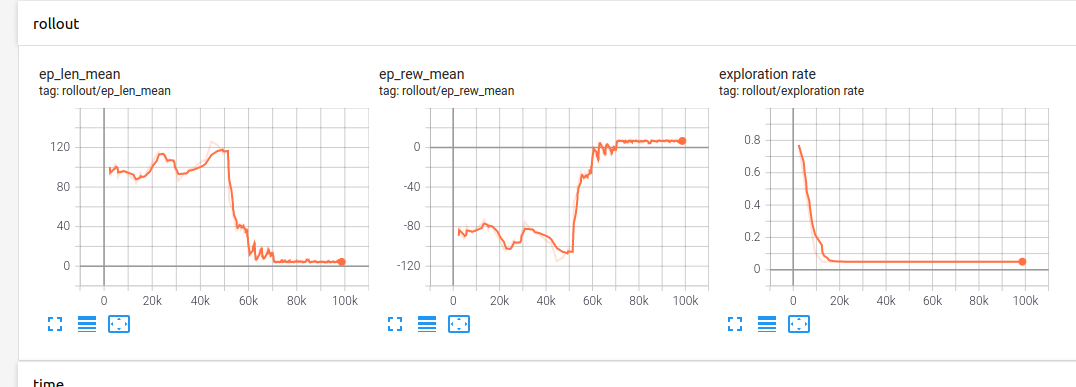

## save model

In [28]:
model.save('dqn_simplest_model')

## run optimization

In [27]:
env.reset()
for i in range(100):
    action, _ = model.predict(env.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: break

reset at position [2.7482808  0.30813697]
action 3
position [3.7482808  0.30813697], done False, global_reward -1
action 0
position [3.7482808 1.3081369], done False, global_reward -2
action 0
position [3.7482808 2.308137 ], done False, global_reward -3
action 0
position [3.7482808 3.308137 ], done False, global_reward -4
action 0
position [3.7482808 4.308137 ], done False, global_reward -5
action 3
position [4.7482805 4.308137 ], done True, global_reward 5


# goldmine with different reward (incentive to success)

In [1]:
import gym
from gym import spaces
import random
import stable_baselines3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN


class GoldMine2(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(GoldMine2, self).__init__()
        #actions: move on the grid, by 1 in any direction: N, S, W, E. Or stay at same position
        #0 - N, 1 - S, 2 - W, 3 - E, 4 - no move
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Box(low=0.0, high=5.0, shape=(2,))
    
    def reset(self):
        self.current_position = self.observation_space.sample()
        self.global_reward = 0
        print(f'reset at position {self.current_position}')
        return self.current_position
        
    def step(self, action):
        if (action == 0) & (self.current_position[1] < 4):
            self.current_position[1] += 1
        if (action == 1) & (self.current_position[1] > 1):
            self.current_position[1] -= 1
        if (action == 2) & (self.current_position[0] > 1):
            self.current_position[0] -= 1
        if (action == 3) & (self.current_position[0] < 4):
            self.current_position[0] += 1
        reward = -0.001
        done = False
        if (self.current_position[0] > 4) & (self.current_position[1] > 4):
            reward = 10
            done = True
        self.global_reward += reward
        return self.current_position, reward, done, {}
            
    
    def render(self):
        print(f'position {self.current_position}, done {done}, global_reward {self.global_reward}')
        
        


env_gold2 = GoldMine2()
check_env(env_gold2)

model_gold2 = DQN("MlpPolicy", env_gold2, verbose=1, tensorboard_log="./tensorboard/")
model_gold2.learn(total_timesteps=100000, log_interval=4, tb_log_name="goldmine2 smooth reward")

env_gold2.reset()
for i in range(100):
    action, _ = model_gold2.predict(env_gold2.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold2.step(action)
    env_gold2.render()
    if done: break

reset at position [4.536163  2.5876172]
reset at position [0.15159956 3.2694962 ]
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [0.19202514 1.741901  ]
Logging to ./tensorboard/goldmine2 smooth reward_2
reset at position [2.3336496 2.4425204]
reset at position [4.7946715 1.7215492]
reset at position [1.7661948  0.29309434]
reset at position [1.9985162 4.5201645]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 134      |
|    ep_rew_mean      | 9.87     |
|    exploration rate | 0.949    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 13028    |
|    time_elapsed     | 0        |
|    total timesteps  | 535      |
----------------------------------
reset at position [3.2974894 4.0345187]
reset at position [4.9786415 3.9963026]
reset at position [0.590513  4.0422325]
reset at position [0.3601704 1.8752836]
------------------------

/home/explore/miniconda3/envs/stablebaselines3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


reset at position [0.32694426 2.5954747 ]
reset at position [2.4985125 1.7185097]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.1     |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.742    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 12608    |
|    time_elapsed     | 0        |
|    total timesteps  | 2719     |
----------------------------------
reset at position [1.3259159 4.1601696]
reset at position [2.6022367 2.9530962]
reset at position [4.2464633 0.6207015]
reset at position [1.5823505 1.5513308]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.7     |
|    ep_rew_mean      | 9.91     |
|    exploration rate | 0.712    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 12714    |
|    time_elapsed     | 0        |
|    total timesteps  | 3031     |
-----------------------

reset at position [0.2041636 3.1780372]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 9.89     |
|    exploration rate | 0.0968   |
| time/               |          |
|    episodes         | 88       |
|    fps              | 13638    |
|    time_elapsed     | 0        |
|    total timesteps  | 9507     |
----------------------------------
reset at position [1.1625758 3.7109919]
reset at position [1.1016982 3.8293912]
reset at position [3.7536223 4.603128 ]
reset at position [1.4038749 2.6127822]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.0877   |
| time/               |          |
|    episodes         | 92       |
|    fps              | 13612    |
|    time_elapsed     | 0        |
|    total timesteps  | 9603     |
----------------------------------
reset at position [2.252764  4

reset at position [4.7809086 1.5955342]
reset at position [3.2088463 0.965846 ]
reset at position [3.8849006 2.226152 ]
reset at position [3.0339673 2.2400203]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | 9.88     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 13730    |
|    time_elapsed     | 1        |
|    total timesteps  | 16965    |
----------------------------------
reset at position [3.3059251  0.48300716]
reset at position [0.49785665 2.8657815 ]
reset at position [0.02327366 1.8830426 ]
reset at position [0.7244609 3.821594 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 118      |
|    ep_rew_mean      | 9.88     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 13714    |
|    time

reset at position [1.5947547 0.5761888]
reset at position [2.9409544 4.0080175]
reset at position [3.69232   4.5380697]
reset at position [2.493474  0.5166086]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 9.89     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 13355    |
|    time_elapsed     | 1        |
|    total timesteps  | 23221    |
----------------------------------
reset at position [1.4294587 2.0760963]
reset at position [1.9687058  0.36299363]
reset at position [4.5232987 3.4460435]
reset at position [1.0592993 0.5362617]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 9.89     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 13320    |
|    time_ela

reset at position [2.711303  3.1532056]
reset at position [1.0401132 4.5898905]
reset at position [2.5603685 3.080663 ]
reset at position [3.9178934 4.6604605]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 13413    |
|    time_elapsed     | 2        |
|    total timesteps  | 28968    |
----------------------------------
reset at position [2.6811    1.2602758]
reset at position [1.950585   0.00515579]
reset at position [4.7683444 1.5359977]
reset at position [3.1167555 1.5377831]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 13410    |
|    time_ela

reset at position [4.943328  3.4504693]
reset at position [3.0056612 3.6533422]
reset at position [4.087698  4.4436073]
reset at position [4.619173  2.8385117]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.9     |
|    ep_rew_mean      | 9.92     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 13356    |
|    time_elapsed     | 2        |
|    total timesteps  | 34028    |
----------------------------------
reset at position [2.0200353 4.1600194]
reset at position [1.9645933 2.6778035]
reset at position [1.961235  0.1054731]
reset at position [4.668815 4.624468]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | 9.91     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 13348    |
|    time_elapsed

reset at position [3.7878604 3.8651564]
reset at position [3.1414258 3.2989748]
reset at position [0.9742141 4.710683 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 13377    |
|    time_elapsed     | 3        |
|    total timesteps  | 41233    |
----------------------------------
reset at position [1.1256889 3.2998133]
reset at position [3.9680257 2.3211472]
reset at position [3.6267967  0.78454494]
reset at position [3.7604253 4.091086 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 13382    |
|    time_elapsed     | 3        |
|    total timeste

reset at position [3.5998247 1.2427773]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 139      |
|    ep_rew_mean      | 9.86     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 452      |
|    fps              | 13521    |
|    time_elapsed     | 3        |
|    total timesteps  | 49749    |
----------------------------------
reset at position [2.720151  1.2389325]
reset at position [3.3679562 1.552194 ]
reset at position [3.2094314 1.9604474]
reset at position [3.62058    0.88144845]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 135      |
|    ep_rew_mean      | 9.87     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 13511    |
|    time_elapsed     | 3        |
|    total timesteps  | 49854    |
----------------------------------
reset at position [1.7746847

reset at position [2.5993757 4.1377664]
reset at position [4.788754 4.113033]
reset at position [1.0195308 0.6398007]
reset at position [4.8328614 2.7823894]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 106      |
|    ep_rew_mean      | 9.9      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 504      |
|    fps              | 7663     |
|    time_elapsed     | 6        |
|    total timesteps  | 53071    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00128  |
|    n_updates        | 767      |
----------------------------------
reset at position [4.5164123 2.6535048]
reset at position [3.8238013 0.6378989]
reset at position [1.9371395 0.657015 ]
reset at position [3.0541842 4.604918 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.2     |
|    ep_rew_mean      | 9.9      |
|    exploration 

reset at position [0.01793738 0.54081476]
reset at position [0.79813904 0.44308558]
reset at position [4.2766876 2.1454148]
reset at position [0.5249059 1.4661489]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.6     |
|    ep_rew_mean      | 9.96     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 552      |
|    fps              | 7130     |
|    time_elapsed     | 7        |
|    total timesteps  | 53807    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00179  |
|    n_updates        | 951      |
----------------------------------
reset at position [2.578342  2.4643478]
reset at position [0.05267112 4.515339  ]
reset at position [0.07441516 2.053211  ]
reset at position [2.4175534  0.79829574]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.7     |
|    ep_rew_mean      | 9.96     |
|    

reset at position [1.8400471 3.5290415]
reset at position [4.828809  0.9465957]
reset at position [0.12564078 1.3035539 ]
reset at position [0.8022666 2.7102184]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 9.98     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 6489     |
|    time_elapsed     | 8        |
|    total timesteps  | 54874    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00191  |
|    n_updates        | 1218     |
----------------------------------
reset at position [2.7511625 4.10579  ]
reset at position [4.955335  4.9883776]
reset at position [2.4712212 4.0884676]
reset at position [0.16103931 2.0312595 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 9.98     |
|    explor

reset at position [2.017341  3.3612964]
reset at position [1.3965096 3.3215938]
reset at position [3.3027422  0.65785724]
reset at position [0.12741333 1.9618821 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 6313     |
|    time_elapsed     | 8        |
|    total timesteps  | 55164    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00235  |
|    n_updates        | 1290     |
----------------------------------
reset at position [0.62307817 4.1575403 ]
reset at position [0.47306114 1.5933831 ]
reset at position [4.7500367 4.248824 ]
reset at position [3.643272  4.3178363]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 9.99     |
|    ex

reset at position [2.0199115 2.4972184]
reset at position [4.5928535 1.5390631]
reset at position [3.3401468 3.4240093]
reset at position [2.9113867 4.105458 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 696      |
|    fps              | 5429     |
|    time_elapsed     | 10       |
|    total timesteps  | 56026    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.806    |
|    n_updates        | 1506     |
----------------------------------
reset at position [2.8252473 3.187452 ]
reset at position [1.173758 1.873385]
reset at position [3.754515  1.8903165]
reset at position [2.1065156 0.0811332]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 9.99     |
|    exploration 

reset at position [0.10179248 0.05352227]
reset at position [0.58337235 3.098622  ]
reset at position [1.2601856  0.60098785]
reset at position [4.124502 2.415176]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 9.98     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 744      |
|    fps              | 4633     |
|    time_elapsed     | 12       |
|    total timesteps  | 57392    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00164  |
|    n_updates        | 1847     |
----------------------------------
reset at position [4.3793902 1.5016282]
reset at position [4.6578813 4.4372888]
reset at position [2.4595861  0.48901352]
reset at position [4.408709   0.48845568]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 9.98     |
|    ex

reset at position [1.2838539  0.11603623]
reset at position [3.6946423 2.133836 ]
reset at position [4.80628  3.992691]
reset at position [1.4027302  0.37670648]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 9.98     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 4441     |
|    time_elapsed     | 13       |
|    total timesteps  | 58396    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00641  |
|    n_updates        | 2098     |
----------------------------------
reset at position [2.127419  3.7828152]
reset at position [3.669734   0.48934054]
reset at position [4.2132783  0.99529326]
reset at position [3.0934696 3.711724 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.7     |
|    ep_rew_mean      | 9.98     |
|    expl

reset at position [3.2643895 2.001056 ]
reset at position [3.4438143 4.70257  ]
reset at position [2.3514626 3.6101172]
reset at position [2.652397  2.5173485]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 9.98     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 4221     |
|    time_elapsed     | 14       |
|    total timesteps  | 59759    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.267    |
|    n_updates        | 2439     |
----------------------------------
reset at position [1.789035  2.3815656]
reset at position [2.7665534 3.189122 ]
reset at position [3.688302  3.1349213]
reset at position [1.6992071  0.12962186]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 9.98     |
|    explorat

reset at position [3.7474914 2.9894295]
reset at position [4.9933953 2.6898637]
reset at position [1.4682804 2.144267 ]
reset at position [2.523065 4.756418]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 9.98     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 888      |
|    fps              | 4130     |
|    time_elapsed     | 14       |
|    total timesteps  | 60333    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00342  |
|    n_updates        | 2583     |
----------------------------------
reset at position [1.1816428 3.254467 ]
reset at position [4.006971  2.8253114]
reset at position [3.462738  1.4661787]
reset at position [0.25737858 4.4252195 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 9.98     |
|    exploratio

reset at position [1.6297479 1.0423801]
reset at position [4.886736   0.68602103]
reset at position [0.6318953 1.8504013]
reset at position [4.8747706 2.8602304]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.09     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 936      |
|    fps              | 4079     |
|    time_elapsed     | 14       |
|    total timesteps  | 60558    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000962 |
|    n_updates        | 2639     |
----------------------------------
reset at position [2.4319346 4.817952 ]
reset at position [0.4734465 1.4357224]
reset at position [3.9986813  0.80864775]
reset at position [0.38720515 0.70051134]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.17     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [1.5515851 4.1000295]
reset at position [0.8605249 3.8674498]
reset at position [2.7347183 4.53842  ]
reset at position [1.800045  2.2122889]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 984      |
|    fps              | 4039     |
|    time_elapsed     | 15       |
|    total timesteps  | 60751    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.262    |
|    n_updates        | 2687     |
----------------------------------
reset at position [2.496772  0.6065926]
reset at position [4.8139877 1.5887827]
reset at position [0.44888744 4.4496317 ]
reset at position [1.365933  2.8476982]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.2006922 1.3185558]
reset at position [4.6786923 0.600996 ]
reset at position [1.1492739 3.7578435]
reset at position [2.3273113 1.3373005]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1032     |
|    fps              | 3998     |
|    time_elapsed     | 15       |
|    total timesteps  | 60983    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00249  |
|    n_updates        | 2745     |
----------------------------------
reset at position [3.319028  0.7631095]
reset at position [1.9049603 2.7943094]
reset at position [1.0924084 3.9391956]
reset at position [0.29931197 0.17389676]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.6741881 2.7968738]
reset at position [1.7632201 3.6403697]
reset at position [2.792683  3.5896277]
reset at position [0.56068116 4.5402236 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 3958     |
|    time_elapsed     | 15       |
|    total timesteps  | 61186    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.253    |
|    n_updates        | 2796     |
----------------------------------
reset at position [2.6426141 3.4920142]
reset at position [4.3998437 3.711695 ]
reset at position [2.4477777 1.6420993]
reset at position [3.8056061 1.701552 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5      |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [3.370787 4.074916]
reset at position [2.9211855 4.0922456]
reset at position [0.11354694 3.9821818 ]
reset at position [4.206752  0.0757957]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.88     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1128     |
|    fps              | 3862     |
|    time_elapsed     | 15       |
|    total timesteps  | 61753    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.254    |
|    n_updates        | 2938     |
----------------------------------
reset at position [0.04231799 0.15081981]
reset at position [0.12561376 4.870717  ]
reset at position [2.1128755 0.1105835]
reset at position [1.460338  4.0113416]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.63     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [4.2496495 1.6097981]
reset at position [1.7428744 3.7878947]
reset at position [2.078139 4.8218  ]
reset at position [4.324171 3.633216]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.48     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1176     |
|    fps              | 3803     |
|    time_elapsed     | 16       |
|    total timesteps  | 62121    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00159  |
|    n_updates        | 3030     |
----------------------------------
reset at position [1.6053427 2.1109793]
reset at position [4.53637  4.351009]
reset at position [3.333712  4.1553774]
reset at position [1.4064363 1.6159488]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.45     |
|    ep_rew_mean      | 9.99     |
|    exploration rate

reset at position [2.924397   0.42299184]
reset at position [1.7093998 4.8359923]
reset at position [0.25444812 2.326584  ]
reset at position [4.1372805  0.10092648]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.33     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1224     |
|    fps              | 3738     |
|    time_elapsed     | 16       |
|    total timesteps  | 62574    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.505    |
|    n_updates        | 3143     |
----------------------------------
reset at position [3.8747735 2.7122293]
reset at position [2.2971828 1.2497215]
reset at position [0.28742233 3.0416157 ]
reset at position [3.978529   0.38267538]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.36     |
|    ep_rew_mean      | 9.99     |
|    

reset at position [0.6769704 1.4880233]
reset at position [2.8855352 1.3133987]
reset at position [1.3052729  0.78711694]
reset at position [0.11207605 4.045884  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.29     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1272     |
|    fps              | 3675     |
|    time_elapsed     | 17       |
|    total timesteps  | 63036    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00695  |
|    n_updates        | 3258     |
----------------------------------
reset at position [1.798856  3.8308544]
reset at position [3.6390302 4.6282406]
reset at position [1.5913322 3.1253307]
reset at position [4.174543  1.2933134]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.28     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [2.0103197 4.376263 ]
reset at position [0.2836788 1.4971486]
reset at position [0.18720412 0.10722598]
reset at position [1.3771852 4.992854 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.58     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1320     |
|    fps              | 3632     |
|    time_elapsed     | 17       |
|    total timesteps  | 63383    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.252    |
|    n_updates        | 3345     |
----------------------------------
reset at position [1.101378  2.4172757]
reset at position [2.9085772 4.190258 ]
reset at position [3.4039881 4.475803 ]
reset at position [2.8824675 4.1016035]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.21     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [2.9600787 3.0141535]
reset at position [0.02910956 2.2157578 ]
reset at position [0.8567974 4.991187 ]
reset at position [3.483019 3.324813]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1368     |
|    fps              | 3551     |
|    time_elapsed     | 18       |
|    total timesteps  | 64038    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.243    |
|    n_updates        | 3509     |
----------------------------------
reset at position [2.0089736 4.3806424]
reset at position [2.7921433 2.9798212]
reset at position [1.3222989 4.7116737]
reset at position [1.0539609  0.61285985]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [2.8236194 3.9981527]
reset at position [0.01225382 0.67636293]
reset at position [4.176139  1.6302428]
reset at position [2.01999   0.1280582]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1416     |
|    fps              | 3519     |
|    time_elapsed     | 18       |
|    total timesteps  | 64360    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.25     |
|    n_updates        | 3589     |
----------------------------------
reset at position [2.0294054 4.4123716]
reset at position [1.3259978 1.0352672]
reset at position [3.556481  1.3284714]
reset at position [3.4737017 3.6381965]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [2.54373   4.2799797]
reset at position [0.67916334 1.1866319 ]
reset at position [2.9583435 4.592671 ]
reset at position [1.0787107 4.7922225]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.52     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1464     |
|    fps              | 3489     |
|    time_elapsed     | 18       |
|    total timesteps  | 64569    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0135   |
|    n_updates        | 3642     |
----------------------------------
reset at position [1.1265876 4.0361533]
reset at position [1.5663738 1.5324391]
reset at position [0.3250646 4.709894 ]
reset at position [4.851834 3.035431]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.02     |
|    ep_rew_mean      | 9.99     |
|    exploratio

reset at position [0.34061694 3.9515524 ]
reset at position [4.780906  1.5198098]
reset at position [1.5108894 3.2528617]
reset at position [3.4515247 1.7777883]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.77     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1512     |
|    fps              | 3425     |
|    time_elapsed     | 19       |
|    total timesteps  | 65144    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00787  |
|    n_updates        | 3785     |
----------------------------------
reset at position [4.1617603 3.6199079]
reset at position [2.4589736 2.5895312]
reset at position [2.3345962 1.2682699]
reset at position [0.4582174 0.7756803]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.98     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [1.6546099 2.81612  ]
reset at position [3.2630372 1.9740069]
reset at position [4.6910005 1.0623124]
reset at position [1.8187696  0.11667401]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1560     |
|    fps              | 3384     |
|    time_elapsed     | 19       |
|    total timesteps  | 65599    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00534  |
|    n_updates        | 3899     |
----------------------------------
reset at position [0.7100903 4.0026174]
reset at position [4.328907  2.1208296]
reset at position [0.07437816 1.1969595 ]
reset at position [3.3604116 1.7416718]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [4.6666827  0.52249175]
reset at position [4.89839   4.9903884]
reset at position [0.41387594 3.447301  ]
reset at position [3.9231513 4.164342 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1608     |
|    fps              | 3318     |
|    time_elapsed     | 20       |
|    total timesteps  | 66405    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0129   |
|    n_updates        | 4101     |
----------------------------------
reset at position [2.450492  3.7048788]
reset at position [1.5505179 2.4394388]
reset at position [2.7754061 4.698644 ]
reset at position [2.4439886 2.213027 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [3.0624063 3.6945798]
reset at position [1.7687266 4.7138767]
reset at position [4.356731 1.710652]
reset at position [3.5343068 1.0942537]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1656     |
|    fps              | 3295     |
|    time_elapsed     | 20       |
|    total timesteps  | 66646    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00361  |
|    n_updates        | 4161     |
----------------------------------
reset at position [2.3250782 2.599493 ]
reset at position [4.5015783 4.656602 ]
reset at position [3.029278  3.2484689]
reset at position [4.5420575 4.6707973]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 9.99     |
|    exploration 

reset at position [1.7600435 1.766043 ]
reset at position [3.4285278  0.60085034]
reset at position [3.5835238 3.8709064]
reset at position [3.2259784 1.5465093]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1704     |
|    fps              | 3252     |
|    time_elapsed     | 20       |
|    total timesteps  | 67142    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.246    |
|    n_updates        | 4285     |
----------------------------------
reset at position [1.6625946 0.4796426]
reset at position [4.893225  4.6382422]
reset at position [1.2059144 1.5860939]
reset at position [4.4625087 1.6680167]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.55     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [3.339525  4.5064306]
reset at position [0.11735637 3.8246813 ]
reset at position [1.1152545 3.5202265]
reset at position [4.478539  3.9021266]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.48     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1752     |
|    fps              | 3227     |
|    time_elapsed     | 20       |
|    total timesteps  | 67382    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00757  |
|    n_updates        | 4345     |
----------------------------------
reset at position [2.4446342  0.10817149]
reset at position [4.0352335  0.02323345]
reset at position [3.0350254 2.2239413]
reset at position [3.1354609 4.3734655]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.77     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [1.2044606 0.959088 ]
reset at position [1.7471004 2.264925 ]
reset at position [1.6722856 3.4912837]
reset at position [4.2337923 1.7095289]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 3198     |
|    time_elapsed     | 21       |
|    total timesteps  | 67693    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.264    |
|    n_updates        | 4423     |
----------------------------------
reset at position [2.3342407 1.941433 ]
reset at position [1.6278477 4.761875 ]
reset at position [3.7554631  0.22568007]
reset at position [1.1095212 4.9853196]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.5883978 1.2541271]
reset at position [1.0380292  0.75506765]
reset at position [4.945315  3.7557335]
reset at position [1.0333846  0.46528208]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.49     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1848     |
|    fps              | 3158     |
|    time_elapsed     | 21       |
|    total timesteps  | 68217    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.489    |
|    n_updates        | 4554     |
----------------------------------
reset at position [4.4672117  0.37517834]
reset at position [2.2041676 4.7559977]
reset at position [2.7874033 4.722652 ]
reset at position [0.13867214 0.03387178]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.52     |
|    ep_rew_mean      | 9.99     |
|    ex

reset at position [0.9347579 4.58294  ]
reset at position [2.1561208 3.2491782]
reset at position [4.3785768 1.9885483]
reset at position [0.9735186 0.7499192]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1896     |
|    fps              | 3110     |
|    time_elapsed     | 22       |
|    total timesteps  | 68831    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0157   |
|    n_updates        | 4707     |
----------------------------------
reset at position [3.9269035 4.6608524]
reset at position [1.108185  1.3967876]
reset at position [1.6176959 1.0818135]
reset at position [4.341608  0.1794958]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 9.99     |
|    exploratio

reset at position [4.7868085 2.3286436]
reset at position [2.462417 2.842745]
reset at position [2.8973975 1.0345204]
reset at position [1.6743534 2.9991791]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 3081     |
|    time_elapsed     | 22       |
|    total timesteps  | 69218    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.243    |
|    n_updates        | 4804     |
----------------------------------
reset at position [3.8251927 1.5160875]
reset at position [3.1220834  0.06761993]
reset at position [3.6186545 3.9993286]
reset at position [4.479229  4.5461426]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 9.99     |
|    exploratio

reset at position [4.5617647 2.2457988]
reset at position [4.902374  3.6658547]
reset at position [0.6186699 1.0701972]
reset at position [1.9454541 2.678734 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1992     |
|    fps              | 3031     |
|    time_elapsed     | 23       |
|    total timesteps  | 69843    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.489    |
|    n_updates        | 4960     |
----------------------------------
reset at position [3.1072452 1.1818984]
reset at position [0.15306537 0.39904013]
reset at position [1.0420443 4.25743  ]
reset at position [4.237272  0.5487188]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [3.3520389 1.2308174]
reset at position [1.7690517 1.7872452]
reset at position [3.6519532 3.9929392]
reset at position [1.7941792  0.91170686]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.63     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2040     |
|    fps              | 3003     |
|    time_elapsed     | 23       |
|    total timesteps  | 70166    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00477  |
|    n_updates        | 5041     |
----------------------------------
reset at position [0.42890197 3.2823207 ]
reset at position [0.11883041 1.106067  ]
reset at position [3.0013382 0.0476787]
reset at position [0.36421487 1.9830078 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.99     |
|    ex

reset at position [0.35417414 0.21215588]
reset at position [0.5805559 3.3046117]
reset at position [1.8278204 4.1584754]
reset at position [0.50012344 3.1161835 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.17     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2088     |
|    fps              | 2985     |
|    time_elapsed     | 23       |
|    total timesteps  | 70365    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.219    |
|    n_updates        | 5091     |
----------------------------------
reset at position [1.5802903 2.3762634]
reset at position [3.1452954 2.9855473]
reset at position [4.455083 4.592537]
reset at position [0.6446926  0.39857337]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.4      |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.8153301 4.8031487]
reset at position [3.1148622 4.4319706]
reset at position [3.6878307 0.7020625]
reset at position [4.81932    0.71650165]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 2962     |
|    time_elapsed     | 23       |
|    total timesteps  | 70616    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.224    |
|    n_updates        | 5153     |
----------------------------------
reset at position [3.0113394 1.3274133]
reset at position [4.6282396 3.262523 ]
reset at position [0.37103733 1.3162267 ]
reset at position [1.4872363 1.4897573]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.66     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.3903481 3.9802084]
reset at position [2.178921 3.712218]
reset at position [3.15743   0.9454315]
reset at position [0.5475577 4.1649055]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2184     |
|    fps              | 2942     |
|    time_elapsed     | 24       |
|    total timesteps  | 70797    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.207    |
|    n_updates        | 5199     |
----------------------------------
reset at position [0.9059755  0.04902216]
reset at position [3.3070793 4.8214436]
reset at position [4.743047  1.5290935]
reset at position [0.6617746 1.6229149]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [1.3668778  0.08320567]
reset at position [4.1231017 2.2595353]
reset at position [2.8996103  0.01461309]
reset at position [3.2398877 4.888193 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2232     |
|    fps              | 2919     |
|    time_elapsed     | 24       |
|    total timesteps  | 71173    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00611  |
|    n_updates        | 5293     |
----------------------------------
reset at position [3.793714  2.4727972]
reset at position [3.186304  2.9174693]
reset at position [2.8465273 2.2431016]
reset at position [0.03532119 2.2490158 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.68     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [3.5767508 1.3764328]
reset at position [4.6668477 0.6380857]
reset at position [2.1949706 4.9184246]
reset at position [3.349019  3.2554204]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.27     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2280     |
|    fps              | 2897     |
|    time_elapsed     | 24       |
|    total timesteps  | 71407    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00611  |
|    n_updates        | 5351     |
----------------------------------
reset at position [1.4445542 3.7125027]
reset at position [3.17406   2.5768309]
reset at position [3.411749   0.63341177]
reset at position [4.523064 4.234091]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.24     |
|    ep_rew_mean      | 9.99     |
|    exploratio

reset at position [3.5811994 3.4874794]
reset at position [4.8047895 2.8416123]
reset at position [3.3704424 4.000937 ]
reset at position [1.7176414 1.2472532]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.75     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2328     |
|    fps              | 2868     |
|    time_elapsed     | 25       |
|    total timesteps  | 71825    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.213    |
|    n_updates        | 5456     |
----------------------------------
reset at position [2.5114524  0.64776075]
reset at position [4.5548735 0.9646269]
reset at position [2.0719907 1.8348802]
reset at position [0.64883727 4.5146537 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.73     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [4.929708 4.448132]
reset at position [3.663903  2.9495192]
reset at position [0.4801189 2.4365003]
reset at position [1.4054506 2.8508856]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.06     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2376     |
|    fps              | 2848     |
|    time_elapsed     | 25       |
|    total timesteps  | 72101    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.421    |
|    n_updates        | 5525     |
----------------------------------
reset at position [0.7859859 3.4587443]
reset at position [1.3633809 0.639376 ]
reset at position [3.0232444 1.5901172]
reset at position [1.1629084 2.250233 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.18     |
|    ep_rew_mean      | 9.99     |
|    exploration 

reset at position [1.0752516 1.0861707]
reset at position [4.8364806 3.0967627]
reset at position [4.167745  1.8405838]
reset at position [4.475311 3.665908]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.17     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2424     |
|    fps              | 2819     |
|    time_elapsed     | 25       |
|    total timesteps  | 72428    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0132   |
|    n_updates        | 5606     |
----------------------------------
reset at position [3.327422  2.6280715]
reset at position [4.308639 2.277666]
reset at position [3.2102616 3.3364818]
reset at position [1.8539207 3.3482535]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.11     |
|    ep_rew_mean      | 9.99     |
|    exploration ra

reset at position [0.26007983 0.2501574 ]
reset at position [1.8126973 4.2670307]
reset at position [1.7710073  0.23044457]
reset at position [3.0329146  0.75700724]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.35     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2472     |
|    fps              | 2796     |
|    time_elapsed     | 26       |
|    total timesteps  | 72815    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00556  |
|    n_updates        | 5703     |
----------------------------------
reset at position [1.2307292 4.388394 ]
reset at position [4.4920354  0.33335593]
reset at position [3.0480015 4.5129113]
reset at position [1.6494536 2.061112 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.28     |
|    ep_rew_mean      | 9.99     |
|    ex

reset at position [2.6069884 1.7527761]
reset at position [0.27749386 2.2355924 ]
reset at position [0.83050287 0.33721283]
reset at position [1.0504383 3.2670279]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2520     |
|    fps              | 2726     |
|    time_elapsed     | 26       |
|    total timesteps  | 73456    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0109   |
|    n_updates        | 5863     |
----------------------------------
reset at position [4.3241773 0.7024302]
reset at position [3.0516438 3.185546 ]
reset at position [1.244633  4.6974998]
reset at position [0.31378227 4.2816725 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [3.7009752 4.95963  ]
reset at position [1.6574222 4.5619187]
reset at position [2.2184422 1.1976684]
reset at position [2.2114184 2.8566446]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.06     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2568     |
|    fps              | 2697     |
|    time_elapsed     | 27       |
|    total timesteps  | 73694    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.211    |
|    n_updates        | 5923     |
----------------------------------
reset at position [0.95207363 0.5400182 ]
reset at position [2.282997  1.1850005]
reset at position [3.6087182 2.0956652]
reset at position [3.7076092 2.9298582]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9        |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [1.8726351  0.75762343]
reset at position [4.186483  1.7035699]
reset at position [4.3310905 2.7687917]
reset at position [4.812051  4.7753043]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2616     |
|    fps              | 2672     |
|    time_elapsed     | 27       |
|    total timesteps  | 73924    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.401    |
|    n_updates        | 5980     |
----------------------------------
reset at position [1.7968438 4.3272395]
reset at position [0.10143229 1.589621  ]
reset at position [3.3858948 2.3795683]
reset at position [1.5856464 2.8129756]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.9469823 0.8775274]
reset at position [1.2700871 3.038104 ]
reset at position [2.8507848  0.27858022]
reset at position [0.62332207 2.7062223 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.88     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2664     |
|    fps              | 2658     |
|    time_elapsed     | 27       |
|    total timesteps  | 74172    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.612    |
|    n_updates        | 6042     |
----------------------------------
reset at position [3.6156402 0.5441543]
reset at position [4.166286  0.8890102]
reset at position [1.3520303 3.3038905]
reset at position [1.693891  4.4771924]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [3.8584108 1.6189034]
reset at position [0.51156867 2.6681433 ]
reset at position [0.67351186 2.964043  ]
reset at position [2.9211862 4.087486 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.19     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2712     |
|    fps              | 2644     |
|    time_elapsed     | 28       |
|    total timesteps  | 74425    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.206    |
|    n_updates        | 6106     |
----------------------------------
reset at position [3.2669983 3.5154269]
reset at position [0.06063151 3.6816754 ]
reset at position [1.5557445 1.9364064]
reset at position [3.9995449 4.55867  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.18     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [0.173913 2.085615]
reset at position [3.7154982 3.1899753]
reset at position [4.2090683 1.1061467]
reset at position [1.3975112 4.8765783]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.68     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2760     |
|    fps              | 2631     |
|    time_elapsed     | 28       |
|    total timesteps  | 74717    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.221    |
|    n_updates        | 6179     |
----------------------------------
reset at position [3.7886322 2.170408 ]
reset at position [0.94298345 1.7833267 ]
reset at position [1.8023425 0.889383 ]
reset at position [2.9452744 1.8358835]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.66     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [4.4432273 1.6371725]
reset at position [1.3369367 4.160872 ]
reset at position [0.17401557 2.4630916 ]
reset at position [0.49086073 2.0810962 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.29     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2808     |
|    fps              | 2612     |
|    time_elapsed     | 28       |
|    total timesteps  | 75136    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.232    |
|    n_updates        | 6283     |
----------------------------------
reset at position [3.829535  1.3728505]
reset at position [4.6971416 0.2540783]
reset at position [1.5996813 3.1572514]
reset at position [2.1830435  0.08647944]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.29     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [0.3715618 3.9327192]
reset at position [2.9387448 3.144687 ]
reset at position [2.1687963 4.264983 ]
reset at position [1.9993978 1.6478583]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.44     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2856     |
|    fps              | 2602     |
|    time_elapsed     | 28       |
|    total timesteps  | 75343    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.211    |
|    n_updates        | 6335     |
----------------------------------
reset at position [1.6734357 2.5979373]
reset at position [1.1074998 2.3440118]
reset at position [0.40517458 2.6765919 ]
reset at position [4.723973  3.1786692]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.52     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [1.0158658 1.3924031]
reset at position [4.7710433 0.3511568]
reset at position [4.5646625 1.093898 ]
reset at position [4.3573217  0.41370127]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.75     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2904     |
|    fps              | 2580     |
|    time_elapsed     | 29       |
|    total timesteps  | 75859    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.231    |
|    n_updates        | 6464     |
----------------------------------
reset at position [3.4730833  0.80890626]
reset at position [1.4925433 2.8432841]
reset at position [0.37185887 2.018716  ]
reset at position [2.8456345 3.5789044]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.52     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [0.29691994 4.499818  ]
reset at position [1.0272892 3.146209 ]
reset at position [1.7373667 2.996313 ]
reset at position [3.1648567 3.3707047]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.53     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2952     |
|    fps              | 2571     |
|    time_elapsed     | 29       |
|    total timesteps  | 76084    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00383  |
|    n_updates        | 6520     |
----------------------------------
reset at position [4.998738  1.9819875]
reset at position [4.4607463 2.7807274]
reset at position [3.278137  3.0185647]
reset at position [2.7650099 1.9258428]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.51     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [3.282784  0.5323926]
reset at position [2.7607753 2.329057 ]
reset at position [3.1371717 1.0912526]
reset at position [3.8286264 1.7198282]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3000     |
|    fps              | 2558     |
|    time_elapsed     | 29       |
|    total timesteps  | 76293    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00609  |
|    n_updates        | 6573     |
----------------------------------
reset at position [0.6943151 3.7870934]
reset at position [0.13888735 2.6636376 ]
reset at position [3.0462692 4.531511 ]
reset at position [4.5554185 3.1745796]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.31961995 2.7688928 ]
reset at position [2.8234427 4.6693954]
reset at position [4.2818365 3.1531365]
reset at position [0.75842535 3.2176445 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3048     |
|    fps              | 2546     |
|    time_elapsed     | 30       |
|    total timesteps  | 76545    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0136   |
|    n_updates        | 6636     |
----------------------------------
reset at position [3.107027  3.7812917]
reset at position [0.23644838 4.9424953 ]
reset at position [1.1403354  0.46376994]
reset at position [1.1837434  0.92328936]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.91     |
|    ep_rew_mean      | 10       |
|    

reset at position [3.3122246 4.700235 ]
reset at position [1.698874  0.3357765]
reset at position [4.5210347 1.098321 ]
reset at position [3.3281069 3.6444948]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3096     |
|    fps              | 2532     |
|    time_elapsed     | 30       |
|    total timesteps  | 76865    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.796    |
|    n_updates        | 6716     |
----------------------------------
reset at position [3.9103234 2.633042 ]
reset at position [2.7550733  0.92901886]
reset at position [3.1100626 2.9598927]
reset at position [3.7542684 4.8051596]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [1.4639379 4.2330275]
reset at position [4.0645123  0.87729496]
reset at position [0.76901484 2.2626698 ]
reset at position [0.46677256 3.1520402 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.58     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3144     |
|    fps              | 2515     |
|    time_elapsed     | 30       |
|    total timesteps  | 77288    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0123   |
|    n_updates        | 6821     |
----------------------------------
reset at position [3.0633621 3.8436122]
reset at position [2.2075052 2.5041008]
reset at position [4.6118293 2.2272117]
reset at position [2.2172503 2.6772819]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.56     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [1.389943 4.474834]
reset at position [0.93263423 3.1466303 ]
reset at position [4.8426156 4.3024416]
reset at position [1.0276151 4.2280455]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.6      |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3192     |
|    fps              | 2505     |
|    time_elapsed     | 30       |
|    total timesteps  | 77502    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00229  |
|    n_updates        | 6875     |
----------------------------------
reset at position [4.4458675  0.27359462]
reset at position [0.50946856 1.953606  ]
reset at position [1.3000972 1.1724365]
reset at position [4.7631764 2.7882478]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.57     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [3.0413282 1.7872845]
reset at position [2.381461 4.808658]
reset at position [4.03984  2.852716]
reset at position [1.3264885  0.98497903]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3240     |
|    fps              | 2494     |
|    time_elapsed     | 31       |
|    total timesteps  | 77698    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.196    |
|    n_updates        | 6924     |
----------------------------------
reset at position [3.6359155 4.761529 ]
reset at position [0.6960452 3.3378737]
reset at position [4.465098  0.4694555]
reset at position [0.6381092 3.6085076]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 10       |
|    exploration 

reset at position [1.8816521 2.618967 ]
reset at position [4.877506  3.1548772]
reset at position [4.0564904 3.961702 ]
reset at position [4.097615 2.807484]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3288     |
|    fps              | 2483     |
|    time_elapsed     | 31       |
|    total timesteps  | 77900    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.583    |
|    n_updates        | 6974     |
----------------------------------
reset at position [4.510263  0.5214163]
reset at position [0.79822546 2.016464  ]
reset at position [4.7041345 3.5308356]
reset at position [1.3653318  0.04749138]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [3.777334   0.14951193]
reset at position [3.330443  2.4659822]
reset at position [2.8328304 4.8523636]
reset at position [3.1884544 0.9350472]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.64     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3336     |
|    fps              | 2451     |
|    time_elapsed     | 31       |
|    total timesteps  | 78247    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.199    |
|    n_updates        | 7061     |
----------------------------------
reset at position [3.1915653 4.084022 ]
reset at position [0.12289298 2.708621  ]
reset at position [2.331305   0.47049153]
reset at position [1.5789759 2.7289996]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 10       |
|    expl

reset at position [1.3498917 1.0255401]
reset at position [3.811776  4.1365886]
reset at position [0.37765324 0.04353473]
reset at position [1.6414814  0.15378703]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.7      |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3384     |
|    fps              | 2393     |
|    time_elapsed     | 32       |
|    total timesteps  | 78558    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.221    |
|    n_updates        | 7139     |
----------------------------------
reset at position [0.78725964 0.8762196 ]
reset at position [4.984027  4.3601894]
reset at position [4.1468587 2.9486482]
reset at position [0.3553109 0.9775476]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.76     |
|    ep_rew_mean      | 9.99     |
|    expl

reset at position [4.9014034 3.2017407]
reset at position [3.4135609 2.9320426]
reset at position [4.25566  4.262484]
reset at position [1.3841485 1.5683054]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.79     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3432     |
|    fps              | 2380     |
|    time_elapsed     | 33       |
|    total timesteps  | 78911    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.205    |
|    n_updates        | 7227     |
----------------------------------
reset at position [2.3815477  0.07076354]
reset at position [0.27406213 3.7008195 ]
reset at position [2.9571898 0.6304491]
reset at position [2.0258048 2.4176857]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.43     |
|    ep_rew_mean      | 9.99     |
|    explorat

reset at position [4.311561 4.109649]
reset at position [0.29838568 1.2163845 ]
reset at position [3.0232317 2.219859 ]
reset at position [3.3990874 4.328073 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.62     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3480     |
|    fps              | 2364     |
|    time_elapsed     | 33       |
|    total timesteps  | 79331    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.179    |
|    n_updates        | 7332     |
----------------------------------
reset at position [1.0778306 4.2099957]
reset at position [1.7971746 4.3310914]
reset at position [1.664283 2.5835  ]
reset at position [0.25601313 0.93565494]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.89     |
|    ep_rew_mean      | 9.99     |
|    exploratio

reset at position [3.3666682 4.1861696]
reset at position [0.11493775 3.8446145 ]
reset at position [3.56686  2.131085]
reset at position [3.6559293 4.3323674]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.34     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3528     |
|    fps              | 2345     |
|    time_elapsed     | 33       |
|    total timesteps  | 79539    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.57     |
|    n_updates        | 7384     |
----------------------------------
reset at position [4.1090913 3.0112987]
reset at position [3.2282746 0.7772355]
reset at position [3.404726  1.2954874]
reset at position [1.6592871 0.5704022]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.39     |
|    ep_rew_mean      | 9.99     |
|    exploratio

reset at position [4.343048  1.4247602]
reset at position [0.33533517 2.8037076 ]
reset at position [1.4780517 4.802075 ]
reset at position [4.972213  3.5314164]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.87     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3576     |
|    fps              | 2283     |
|    time_elapsed     | 35       |
|    total timesteps  | 80001    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.932    |
|    n_updates        | 7500     |
----------------------------------
reset at position [4.1995325 4.240764 ]
reset at position [0.07500272 0.39179406]
reset at position [0.8468253 1.9782895]
reset at position [2.684685  1.5137037]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.07     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [2.381326  2.6683898]
reset at position [1.357888  2.8563673]
reset at position [1.6513057 0.5099608]
reset at position [1.943868   0.08248405]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.07     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3624     |
|    fps              | 2274     |
|    time_elapsed     | 35       |
|    total timesteps  | 80235    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.311    |
|    n_updates        | 7558     |
----------------------------------
reset at position [4.097464  1.0678127]
reset at position [1.5463624 4.6703753]
reset at position [0.70068115 0.484437  ]
reset at position [4.0250826 4.7716374]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [4.854472  2.2057803]
reset at position [4.1639876 2.789082 ]
reset at position [1.9008149 0.5326839]
reset at position [3.8396592 4.3013606]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3672     |
|    fps              | 2265     |
|    time_elapsed     | 35       |
|    total timesteps  | 80444    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0141   |
|    n_updates        | 7610     |
----------------------------------
reset at position [3.999205  3.0931685]
reset at position [0.19912076 0.28397146]
reset at position [0.88124484 1.0777167 ]
reset at position [2.5943713 2.4413545]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [4.8637786 4.028396 ]
reset at position [2.3739154 3.6188653]
reset at position [3.6027024 1.6744605]
reset at position [0.54006094 4.8403306 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3720     |
|    fps              | 2254     |
|    time_elapsed     | 35       |
|    total timesteps  | 80692    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.304    |
|    n_updates        | 7672     |
----------------------------------
reset at position [1.6595346 3.8598185]
reset at position [2.1231256  0.32426536]
reset at position [2.2516782 3.6983426]
reset at position [1.4742923 1.8100808]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [2.0910742 2.7073412]
reset at position [3.9576426 1.9920396]
reset at position [0.0656781 1.2507508]
reset at position [4.0130877 4.762887 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3768     |
|    fps              | 2244     |
|    time_elapsed     | 36       |
|    total timesteps  | 80905    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.169    |
|    n_updates        | 7726     |
----------------------------------
reset at position [1.0876523 1.79007  ]
reset at position [4.4411416  0.18295833]
reset at position [2.7777128 2.2422903]
reset at position [2.4326031 1.7756355]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.9837418 3.1558683]
reset at position [3.9407525  0.91807723]
reset at position [0.53262985 3.714313  ]
reset at position [4.058946 2.899822]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3816     |
|    fps              | 2237     |
|    time_elapsed     | 36       |
|    total timesteps  | 81098    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.395    |
|    n_updates        | 7774     |
----------------------------------
reset at position [0.1654907  0.01475201]
reset at position [1.2400773  0.47271857]
reset at position [4.29718  4.843258]
reset at position [0.22864658 1.5319812 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [2.3305078 2.859366 ]
reset at position [1.2286057 3.5391161]
reset at position [4.9039106 1.1009171]
reset at position [0.7410105 2.4361858]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3864     |
|    fps              | 2227     |
|    time_elapsed     | 36       |
|    total timesteps  | 81334    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.307    |
|    n_updates        | 7833     |
----------------------------------
reset at position [2.3087268 4.2745023]
reset at position [4.808378  4.7493687]
reset at position [0.32864118 3.4785652 ]
reset at position [0.2737892  0.24135305]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [2.9187014 3.3734114]
reset at position [2.651764   0.50552946]
reset at position [2.4476256 3.4849846]
reset at position [1.0772533 1.1779526]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3912     |
|    fps              | 2171     |
|    time_elapsed     | 37       |
|    total timesteps  | 81551    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0294   |
|    n_updates        | 7887     |
----------------------------------
reset at position [4.3704066 0.1342246]
reset at position [1.1515263 1.7669803]
reset at position [2.6333897 2.0992522]
reset at position [3.8248463 4.8007326]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.09889   2.6814682]
reset at position [1.989243  2.8069143]
reset at position [3.8037014 0.3129345]
reset at position [1.7981952 4.994164 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.99     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3960     |
|    fps              | 2162     |
|    time_elapsed     | 37       |
|    total timesteps  | 81912    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.189    |
|    n_updates        | 7977     |
----------------------------------
reset at position [4.9291916 2.6436749]
reset at position [0.38367134 4.1604743 ]
reset at position [4.509051 4.085316]
reset at position [1.993857   0.21607678]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [1.2507808 1.5453919]
reset at position [3.5795956 2.0672555]
reset at position [1.3701009 1.9869473]
reset at position [3.528994 4.233136]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4008     |
|    fps              | 2123     |
|    time_elapsed     | 38       |
|    total timesteps  | 82123    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.176    |
|    n_updates        | 8030     |
----------------------------------
reset at position [3.64772   1.1683286]
reset at position [1.9921749 1.8052754]
reset at position [3.1740415 3.364452 ]
reset at position [1.2173394  0.26570472]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [1.5931435 4.550868 ]
reset at position [4.5007234 3.1143293]
reset at position [3.0626278 3.9760468]
reset at position [3.1339161 1.5147485]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4056     |
|    fps              | 2103     |
|    time_elapsed     | 39       |
|    total timesteps  | 82331    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0274   |
|    n_updates        | 8082     |
----------------------------------
reset at position [4.1503863 0.9871761]
reset at position [4.1455383 2.1032965]
reset at position [0.9996922 4.372921 ]
reset at position [2.0522356 2.5561798]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [4.1120877 3.9006495]
reset at position [2.943868  4.1785016]
reset at position [1.1536213 1.8777549]
reset at position [4.048083  2.1582367]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4104     |
|    fps              | 2096     |
|    time_elapsed     | 39       |
|    total timesteps  | 82548    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.301    |
|    n_updates        | 8136     |
----------------------------------
reset at position [3.9814405  0.12800896]
reset at position [2.3362348 2.074026 ]
reset at position [3.513575  1.5585693]
reset at position [4.908644  2.2201762]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [4.209188   0.89433604]
reset at position [4.4057155 3.1639147]
reset at position [2.744203  0.9060035]
reset at position [4.142724 4.424913]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4152     |
|    fps              | 2088     |
|    time_elapsed     | 39       |
|    total timesteps  | 82758    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.479    |
|    n_updates        | 8189     |
----------------------------------
reset at position [4.874632  0.6910364]
reset at position [4.7231464 2.9124835]
reset at position [0.35260335 0.5395819 ]
reset at position [3.3892736 4.3984556]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.95875   0.7565465]
reset at position [3.478954  3.4251893]
reset at position [3.9768867 3.2503607]
reset at position [2.1620288 2.4422443]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4200     |
|    fps              | 2081     |
|    time_elapsed     | 39       |
|    total timesteps  | 82958    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.464    |
|    n_updates        | 8239     |
----------------------------------
reset at position [0.94712347 3.8009741 ]
reset at position [4.6441092 2.1203954]
reset at position [2.5117452 4.840096 ]
reset at position [4.7063117  0.77203417]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.3544129 2.8503506]
reset at position [3.3614497 1.6037421]
reset at position [0.54804593 1.2045172 ]
reset at position [4.356478  1.9431862]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4248     |
|    fps              | 2074     |
|    time_elapsed     | 40       |
|    total timesteps  | 83156    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0306   |
|    n_updates        | 8288     |
----------------------------------
reset at position [4.432307  2.2602398]
reset at position [3.034659 4.876315]
reset at position [2.1457431 4.6159964]
reset at position [4.015894   0.92131597]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [3.6527507 3.4204247]
reset at position [4.390562  3.4969301]
reset at position [0.8744142 1.4461067]
reset at position [4.643181  2.3888204]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4296     |
|    fps              | 2067     |
|    time_elapsed     | 40       |
|    total timesteps  | 83355    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.396    |
|    n_updates        | 8338     |
----------------------------------
reset at position [0.5801094 4.566792 ]
reset at position [1.6914177 3.305985 ]
reset at position [3.7390108 3.1397095]
reset at position [1.2023829 1.3613337]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [3.6301997 3.0712824]
reset at position [4.1955457 2.5596006]
reset at position [1.7667177 3.6074684]
reset at position [2.0329783 3.4215415]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4344     |
|    fps              | 2060     |
|    time_elapsed     | 40       |
|    total timesteps  | 83552    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.648    |
|    n_updates        | 8387     |
----------------------------------
reset at position [2.4245393 3.1728067]
reset at position [3.290797  3.6738393]
reset at position [1.0281594 4.947697 ]
reset at position [4.1164627 2.556696 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [2.8658345  0.00651345]
reset at position [2.2436283 1.150529 ]
reset at position [1.7064433 1.7889152]
reset at position [1.1563609 0.0549269]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4392     |
|    fps              | 2054     |
|    time_elapsed     | 40       |
|    total timesteps  | 83769    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.302    |
|    n_updates        | 8442     |
----------------------------------
reset at position [4.0343184 4.9221706]
reset at position [4.6246924 1.9494238]
reset at position [3.8301423 2.2831419]
reset at position [3.9367397  0.73092127]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.5387809  0.65322953]
reset at position [3.915937  1.7869135]
reset at position [3.091288  3.7571385]
reset at position [2.5597637 4.571566 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.95     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4440     |
|    fps              | 2046     |
|    time_elapsed     | 41       |
|    total timesteps  | 84037    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.204    |
|    n_updates        | 8509     |
----------------------------------
reset at position [4.6227636 3.5001557]
reset at position [4.1002536 3.557091 ]
reset at position [0.57498205 3.7721205 ]
reset at position [3.9163582 4.1270437]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.94     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.8776319 1.3526614]
reset at position [4.954056 1.744714]
reset at position [3.2059076 3.4698246]
reset at position [4.7509613  0.02962732]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.9      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4488     |
|    fps              | 2040     |
|    time_elapsed     | 41       |
|    total timesteps  | 84234    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.171    |
|    n_updates        | 8558     |
----------------------------------
reset at position [3.8108628 1.818361 ]
reset at position [4.0336986 2.6108773]
reset at position [4.9060216 3.0540903]
reset at position [2.2311108 4.626467 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [2.462499  1.9701432]
reset at position [4.0933456 3.0827286]
reset at position [2.6602004 2.2378476]
reset at position [0.86356634 4.9937444 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4536     |
|    fps              | 2016     |
|    time_elapsed     | 41       |
|    total timesteps  | 84437    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.328    |
|    n_updates        | 8609     |
----------------------------------
reset at position [4.5856853 3.421985 ]
reset at position [3.4237196  0.29348698]
reset at position [2.1096334 4.671906 ]
reset at position [0.68218017 2.5140698 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [2.4578366  0.60028416]
reset at position [0.76145756 1.5951548 ]
reset at position [1.2604115 0.6400243]
reset at position [0.8235524 1.460478 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4584     |
|    fps              | 1989     |
|    time_elapsed     | 42       |
|    total timesteps  | 84647    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.452    |
|    n_updates        | 8661     |
----------------------------------
reset at position [4.1058707 3.047461 ]
reset at position [0.5912583 2.029927 ]
reset at position [2.5162556 2.6797624]
reset at position [0.9896205  0.95377624]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [0.0015936  0.06309347]
reset at position [3.437714  3.2365313]
reset at position [4.7533712  0.29068983]
reset at position [3.7435946 1.0607842]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4632     |
|    fps              | 1983     |
|    time_elapsed     | 42       |
|    total timesteps  | 84874    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.151    |
|    n_updates        | 8718     |
----------------------------------
reset at position [4.094633 3.893267]
reset at position [4.2580523 1.3003062]
reset at position [0.5353868 2.0960891]
reset at position [4.472163   0.55204743]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.58112454 4.119145  ]
reset at position [3.798908  1.7976475]
reset at position [4.079235  1.3799773]
reset at position [4.753715  3.4850485]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4680     |
|    fps              | 1977     |
|    time_elapsed     | 43       |
|    total timesteps  | 85058    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0125   |
|    n_updates        | 8764     |
----------------------------------
reset at position [4.6835165 3.1652944]
reset at position [1.8752791 4.54255  ]
reset at position [1.2434521 0.5103585]
reset at position [3.1137042 2.226461 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.3578703 4.1571627]
reset at position [2.8321621 3.5330372]
reset at position [4.5802937  0.00760623]
reset at position [2.9767582 4.0748343]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4728     |
|    fps              | 1936     |
|    time_elapsed     | 44       |
|    total timesteps  | 85280    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0323   |
|    n_updates        | 8819     |
----------------------------------
reset at position [2.5319924 0.9683449]
reset at position [3.1767135 2.4685261]
reset at position [3.542324  0.6657533]
reset at position [1.9860425 4.2745585]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [1.2648238  0.48496813]
reset at position [3.3868003 3.3083904]
reset at position [3.8645217 1.1905003]
reset at position [4.2688413  0.17030847]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4776     |
|    fps              | 1931     |
|    time_elapsed     | 44       |
|    total timesteps  | 85475    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.28     |
|    n_updates        | 8868     |
----------------------------------
reset at position [3.5377786 1.987877 ]
reset at position [4.270317  2.9662564]
reset at position [3.28383  3.322373]
reset at position [2.2494137 1.6329958]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.8145145 3.853574 ]
reset at position [0.11444148 1.7116933 ]
reset at position [2.7482665 2.651242 ]
reset at position [3.9725623  0.10679967]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.53     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4824     |
|    fps              | 1899     |
|    time_elapsed     | 45       |
|    total timesteps  | 85922    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.403    |
|    n_updates        | 8980     |
----------------------------------
reset at position [3.6748905 3.8824198]
reset at position [4.003508  1.8223728]
reset at position [0.8830766 0.6306077]
reset at position [3.502639  1.3691943]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.6      |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [1.8707858 3.09493  ]
reset at position [4.930425   0.09132209]
reset at position [0.16782877 0.05640072]
reset at position [2.5065634 4.8402233]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.85     |
|    ep_rew_mean      | 9.99     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4872     |
|    fps              | 1885     |
|    time_elapsed     | 45       |
|    total timesteps  | 86144    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.286    |
|    n_updates        | 9035     |
----------------------------------
reset at position [1.3451561 1.9333471]
reset at position [4.538595  3.0330317]
reset at position [2.367071  3.1047173]
reset at position [4.027085  1.6783277]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.81     |
|    ep_rew_mean      | 9.99     |
|    explor

reset at position [3.5861285 4.926486 ]
reset at position [3.0947268 2.0425684]
reset at position [3.8458831 1.7763022]
reset at position [0.18143009 4.3583727 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.28     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4920     |
|    fps              | 1880     |
|    time_elapsed     | 45       |
|    total timesteps  | 86345    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.852    |
|    n_updates        | 9086     |
----------------------------------
reset at position [1.5581348 2.9309895]
reset at position [0.37890118 1.6095842 ]
reset at position [4.548637  3.0622354]
reset at position [0.9350801  0.02206396]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [3.2020445  0.19590284]
reset at position [4.5828867 4.1513214]
reset at position [2.4041626 4.7758594]
reset at position [3.4821117 4.132427 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4968     |
|    fps              | 1875     |
|    time_elapsed     | 46       |
|    total timesteps  | 86542    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.281    |
|    n_updates        | 9135     |
----------------------------------
reset at position [1.6404979 4.8837085]
reset at position [0.8719315 2.212808 ]
reset at position [4.368015   0.24546793]
reset at position [0.79837257 3.936141  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [4.221193  1.7803644]
reset at position [0.975821  3.8672903]
reset at position [3.8692691  0.03199767]
reset at position [0.02310119 1.8527642 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5016     |
|    fps              | 1870     |
|    time_elapsed     | 46       |
|    total timesteps  | 86749    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.132    |
|    n_updates        | 9187     |
----------------------------------
reset at position [4.2469683 4.6100616]
reset at position [0.43412593 1.5405711 ]
reset at position [4.0660086 3.0887601]
reset at position [1.0407083 1.465546 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [3.263366  1.1850704]
reset at position [1.3654237 4.419086 ]
reset at position [4.8872952 1.6352998]
reset at position [2.8150723 1.7547263]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.18     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5064     |
|    fps              | 1864     |
|    time_elapsed     | 46       |
|    total timesteps  | 87046    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.154    |
|    n_updates        | 9261     |
----------------------------------
reset at position [3.7851043 3.1829057]
reset at position [1.9348731 4.9877357]
reset at position [1.7116302 2.989575 ]
reset at position [3.9467957 1.0253694]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.21     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [3.4856381 0.3513041]
reset at position [0.12934688 4.562345  ]
reset at position [3.0623624 3.0686631]
reset at position [0.8489722 3.4288435]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.41     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5112     |
|    fps              | 1859     |
|    time_elapsed     | 46       |
|    total timesteps  | 87275    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.756    |
|    n_updates        | 9318     |
----------------------------------
reset at position [3.1509593 4.5833845]
reset at position [0.75323534 3.6638975 ]
reset at position [4.101053  2.6849556]
reset at position [0.7969386 2.6752675]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.39     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [3.0698063 1.1605264]
reset at position [4.1111298 3.4045246]
reset at position [3.5108383 0.7903868]
reset at position [2.0517788 0.5475993]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5160     |
|    fps              | 1846     |
|    time_elapsed     | 47       |
|    total timesteps  | 87486    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.301    |
|    n_updates        | 9371     |
----------------------------------
reset at position [0.00657097 2.6586375 ]
reset at position [3.4495766 4.4997063]
reset at position [2.6965022 0.5760927]
reset at position [4.3775616  0.27418453]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.24     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [2.0238655  0.03094745]
reset at position [3.8883114  0.18635923]
reset at position [4.3089447 1.4655912]
reset at position [4.2307982 2.428199 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5        |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5208     |
|    fps              | 1819     |
|    time_elapsed     | 48       |
|    total timesteps  | 87761    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.384    |
|    n_updates        | 9440     |
----------------------------------
reset at position [0.51934355 1.1117827 ]
reset at position [0.9513521 1.8912536]
reset at position [1.353094  4.8706903]
reset at position [3.348744  3.9725637]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [0.8695934 1.0174526]
reset at position [4.651931  0.6479731]
reset at position [1.2302428 3.5277398]
reset at position [3.4772127 1.3840224]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5256     |
|    fps              | 1813     |
|    time_elapsed     | 48       |
|    total timesteps  | 88042    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.537    |
|    n_updates        | 9510     |
----------------------------------
reset at position [2.7810144 2.818121 ]
reset at position [0.7553899  0.12661359]
reset at position [1.6186681 1.6955473]
reset at position [2.5779805 3.05806  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.6163189 3.0890617]
reset at position [3.3996072 1.1835059]
reset at position [0.7295662 1.1653926]
reset at position [0.8819731 1.0526787]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.44     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5304     |
|    fps              | 1808     |
|    time_elapsed     | 48       |
|    total timesteps  | 88289    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.373    |
|    n_updates        | 9572     |
----------------------------------
reset at position [3.3173666  0.34737873]
reset at position [4.0926933 3.4969594]
reset at position [0.692857 2.635909]
reset at position [3.0434763 4.4580483]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.49     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [0.12238564 3.2173364 ]
reset at position [2.647188 3.565378]
reset at position [3.7606523 4.0801535]
reset at position [1.0351089 4.739572 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.95     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5352     |
|    fps              | 1803     |
|    time_elapsed     | 49       |
|    total timesteps  | 88517    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.221    |
|    n_updates        | 9629     |
----------------------------------
reset at position [2.4545038 2.649118 ]
reset at position [2.623347 4.050591]
reset at position [3.872045  3.4269683]
reset at position [2.0049913 4.067015 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86     |
|    ep_rew_mean      | 10       |
|    exploration 

reset at position [1.6318083 2.8291938]
reset at position [0.27655154 3.9008667 ]
reset at position [4.107104 1.93457 ]
reset at position [2.8638394 2.770642 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5400     |
|    fps              | 1799     |
|    time_elapsed     | 49       |
|    total timesteps  | 88729    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.161    |
|    n_updates        | 9682     |
----------------------------------
reset at position [4.8011913  0.72053283]
reset at position [4.7662    1.8525465]
reset at position [2.7945726 0.6596709]
reset at position [4.613788  1.0269682]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.703292  1.6586457]
reset at position [3.405516 4.554426]
reset at position [0.08849569 3.41377   ]
reset at position [2.6042466 2.3703415]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5448     |
|    fps              | 1783     |
|    time_elapsed     | 49       |
|    total timesteps  | 88921    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.112    |
|    n_updates        | 9730     |
----------------------------------
reset at position [1.4672643 2.3562386]
reset at position [3.9849606 1.8812739]
reset at position [0.3918715 3.0947049]
reset at position [2.1902082 2.2671034]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [4.059791 3.48167 ]
reset at position [2.6379337  0.59073377]
reset at position [4.4114633 2.263141 ]
reset at position [0.08226977 0.46899718]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.74     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5496     |
|    fps              | 1762     |
|    time_elapsed     | 50       |
|    total timesteps  | 89188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.19     |
|    n_updates        | 9796     |
----------------------------------
reset at position [1.4420446 4.486531 ]
reset at position [1.076789   0.34457296]
reset at position [4.0090327  0.83332235]
reset at position [1.6762663 3.5020406]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.02     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [0.46039683 0.3486033 ]
reset at position [4.39907   3.4238932]
reset at position [1.1743402 2.6101189]
reset at position [2.8553905  0.50718415]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.65     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5544     |
|    fps              | 1758     |
|    time_elapsed     | 50       |
|    total timesteps  | 89470    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0767   |
|    n_updates        | 9867     |
----------------------------------
reset at position [1.5916204 3.3632743]
reset at position [4.4600463 1.4034612]
reset at position [1.8224769 3.2544634]
reset at position [0.15301564 2.4315002 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.66     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [1.570962  1.6379207]
reset at position [2.5904255 3.2037618]
reset at position [1.617815   0.81994957]
reset at position [3.646127  4.0349426]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.52     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5592     |
|    fps              | 1754     |
|    time_elapsed     | 51       |
|    total timesteps  | 89724    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.367    |
|    n_updates        | 9930     |
----------------------------------
reset at position [3.1515942 1.7604754]
reset at position [1.4014441  0.61291164]
reset at position [1.2202085 2.684113 ]
reset at position [2.8478606 1.2676177]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.53     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [3.4937613 2.2773392]
reset at position [2.2876399 1.836502 ]
reset at position [3.4219334 1.086855 ]
reset at position [1.2237734  0.05180665]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.42     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5640     |
|    fps              | 1747     |
|    time_elapsed     | 51       |
|    total timesteps  | 89995    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.312    |
|    n_updates        | 9998     |
----------------------------------
reset at position [0.91669065 3.9064815 ]
reset at position [2.9379036 3.804829 ]
reset at position [2.6665514 2.580105 ]
reset at position [1.2466091 2.9741018]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.48     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [4.652845  0.3992915]
reset at position [1.5010656 2.1497145]
reset at position [0.57007253 0.34311166]
reset at position [2.0905938 4.593084 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.18     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5688     |
|    fps              | 1716     |
|    time_elapsed     | 52       |
|    total timesteps  | 90219    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.232    |
|    n_updates        | 10054    |
----------------------------------
reset at position [3.9175043 4.133211 ]
reset at position [0.33129647 3.3232365 ]
reset at position [3.4013524 3.8547342]
reset at position [3.563315  3.6852973]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.05     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [3.353449   0.30363026]
reset at position [4.116379  4.6867414]
reset at position [4.30893   2.7270043]
reset at position [3.5656774 4.080919 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5736     |
|    fps              | 1689     |
|    time_elapsed     | 53       |
|    total timesteps  | 90422    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0294   |
|    n_updates        | 10105    |
----------------------------------
reset at position [1.8371768 3.2981772]
reset at position [2.9966815 1.1012057]
reset at position [2.9314754  0.56973344]
reset at position [2.084097  1.1606659]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.34926218 3.500171  ]
reset at position [3.7089329  0.32972923]
reset at position [4.6877103 3.3947108]
reset at position [1.7824099  0.24171986]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5784     |
|    fps              | 1686     |
|    time_elapsed     | 53       |
|    total timesteps  | 90619    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0511   |
|    n_updates        | 10154    |
----------------------------------
reset at position [2.996935  4.7099323]
reset at position [1.0614332 1.0185657]
reset at position [3.6322465 4.6146736]
reset at position [0.5153747 3.179507 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [3.5188918 3.8423872]
reset at position [9.3577983e-04 1.4603827e+00]
reset at position [1.0700676 4.1400313]
reset at position [4.825544 4.551369]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.78     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5832     |
|    fps              | 1659     |
|    time_elapsed     | 54       |
|    total timesteps  | 90884    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0591   |
|    n_updates        | 10220    |
----------------------------------
reset at position [0.24197946 4.112833  ]
reset at position [4.82681   4.2621856]
reset at position [0.42425674 4.435271  ]
reset at position [4.611112 2.304558]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 10       |
|    ex

reset at position [3.247401 2.387295]
reset at position [1.8981162  0.38125217]
reset at position [0.76570636 0.44718263]
reset at position [3.7731838 3.010987 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5880     |
|    fps              | 1655     |
|    time_elapsed     | 55       |
|    total timesteps  | 91085    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.253    |
|    n_updates        | 10271    |
----------------------------------
reset at position [3.4902706 3.1176429]
reset at position [1.7971598 4.126031 ]
reset at position [1.6411601 4.3632445]
reset at position [4.544358 3.143317]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.76     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [1.4230435 3.1337287]
reset at position [4.7754345 3.5861201]
reset at position [4.9898796 2.6512456]
reset at position [1.3608881 2.37096  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5928     |
|    fps              | 1652     |
|    time_elapsed     | 55       |
|    total timesteps  | 91274    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.147    |
|    n_updates        | 10318    |
----------------------------------
reset at position [1.3905191 1.7620192]
reset at position [1.8523594 2.605524 ]
reset at position [0.16514792 2.272926  ]
reset at position [1.8381952 4.559688 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [3.6401072 2.7196689]
reset at position [2.5814655 1.0661578]
reset at position [0.19691487 2.604209  ]
reset at position [1.3950502 3.5063467]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.01     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5976     |
|    fps              | 1629     |
|    time_elapsed     | 56       |
|    total timesteps  | 91463    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.284    |
|    n_updates        | 10365    |
----------------------------------
reset at position [4.505068   0.74155474]
reset at position [4.9322743 2.2866714]
reset at position [0.7839893 3.72377  ]
reset at position [3.2826545 3.1912127]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [2.5055964  0.22041088]
reset at position [3.003815  3.2224119]
reset at position [0.46381798 4.5495744 ]
reset at position [2.9410322  0.05933143]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6024     |
|    fps              | 1618     |
|    time_elapsed     | 56       |
|    total timesteps  | 91718    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.242    |
|    n_updates        | 10429    |
----------------------------------
reset at position [3.2955348 0.2722507]
reset at position [3.9904761 3.0746331]
reset at position [2.8293881 2.6503544]
reset at position [2.5334258 4.024862 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [4.9634657 1.944762 ]
reset at position [4.256606  4.8741245]
reset at position [3.0206885 1.5275843]
reset at position [4.688753 4.940409]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.73     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6072     |
|    fps              | 1598     |
|    time_elapsed     | 57       |
|    total timesteps  | 91918    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.2      |
|    n_updates        | 10479    |
----------------------------------
reset at position [0.82870215 1.344614  ]
reset at position [1.9638128 3.9066768]
reset at position [4.3611336 1.2611781]
reset at position [0.02889672 1.058871  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [1.3968502 1.7122887]
reset at position [1.6511033 4.123695 ]
reset at position [0.20986643 0.73245126]
reset at position [4.169524  1.3823187]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.27     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6120     |
|    fps              | 1595     |
|    time_elapsed     | 57       |
|    total timesteps  | 92228    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.073    |
|    n_updates        | 10556    |
----------------------------------
reset at position [2.6280339 3.4346795]
reset at position [3.6113207 4.835224 ]
reset at position [0.43077198 2.3724844 ]
reset at position [2.283001  1.0861843]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.24     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.2234223 2.2308035]
reset at position [4.7664657  0.09126149]
reset at position [0.21689533 0.01703588]
reset at position [1.0529318 2.0976312]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.17     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6168     |
|    fps              | 1573     |
|    time_elapsed     | 58       |
|    total timesteps  | 92420    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.196    |
|    n_updates        | 10604    |
----------------------------------
reset at position [1.2241201 1.7537543]
reset at position [3.1870391 1.5422953]
reset at position [0.2961977 0.5706064]
reset at position [4.6363354 1.9513394]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.29     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [3.0296702 4.918038 ]
reset at position [0.36450315 0.29282102]
reset at position [3.3251755 4.2791305]
reset at position [2.014677  3.3309734]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6216     |
|    fps              | 1569     |
|    time_elapsed     | 59       |
|    total timesteps  | 92633    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.128    |
|    n_updates        | 10658    |
----------------------------------
reset at position [0.72478426 2.4978902 ]
reset at position [1.7706194 2.793056 ]
reset at position [1.1839212 0.4627998]
reset at position [1.9246006 1.2444834]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.9552938 1.3101674]
reset at position [2.7412047 4.8991237]
reset at position [3.4006655 3.9819286]
reset at position [3.8998346 1.1137226]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6264     |
|    fps              | 1552     |
|    time_elapsed     | 59       |
|    total timesteps  | 92842    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.114    |
|    n_updates        | 10710    |
----------------------------------
reset at position [0.63101554 3.2367566 ]
reset at position [0.92654514 4.0408635 ]
reset at position [2.7026634 4.573647 ]
reset at position [3.817423  4.0482054]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.9842982  0.39779702]
reset at position [3.312859  3.1533859]
reset at position [1.0095816 0.7979675]
reset at position [1.059569  3.7566547]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6312     |
|    fps              | 1543     |
|    time_elapsed     | 60       |
|    total timesteps  | 93060    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0523   |
|    n_updates        | 10764    |
----------------------------------
reset at position [1.9517214 3.4937818]
reset at position [0.9434699 3.3071797]
reset at position [3.462385  1.4481657]
reset at position [4.6937366 1.6449925]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.566846 4.054142]
reset at position [3.3686192 0.7564192]
reset at position [4.151227  4.7426295]
reset at position [1.7600302 0.2858846]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6360     |
|    fps              | 1540     |
|    time_elapsed     | 60       |
|    total timesteps  | 93265    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0609   |
|    n_updates        | 10816    |
----------------------------------
reset at position [1.5838157 0.7536067]
reset at position [2.4423172 2.3571415]
reset at position [2.2621875 4.085977 ]
reset at position [3.9674413 1.6736473]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 10       |
|    exploration 

reset at position [3.40628    0.39764208]
reset at position [1.6971468 4.3164716]
reset at position [1.9272194  0.66862524]
reset at position [0.93916667 4.2128453 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.69     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6408     |
|    fps              | 1534     |
|    time_elapsed     | 60       |
|    total timesteps  | 93503    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.161    |
|    n_updates        | 10875    |
----------------------------------
reset at position [3.1108997 1.8385874]
reset at position [1.6381072 4.5815997]
reset at position [0.5088874 4.5305004]
reset at position [0.14061543 0.3567035 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 10       |
|    ex

reset at position [4.730978  1.7611836]
reset at position [2.765708  1.2952673]
reset at position [4.4620442  0.62852395]
reset at position [0.5491859 3.6342218]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6456     |
|    fps              | 1515     |
|    time_elapsed     | 61       |
|    total timesteps  | 93728    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.214    |
|    n_updates        | 10931    |
----------------------------------
reset at position [0.6210054 3.022887 ]
reset at position [2.4061503 2.1729114]
reset at position [4.626342  1.2567235]
reset at position [3.4172993 2.9875257]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [2.8522243 4.0784984]
reset at position [2.0088627 4.5028043]
reset at position [0.02362333 0.5643012 ]
reset at position [2.7233822 3.289335 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6504     |
|    fps              | 1513     |
|    time_elapsed     | 62       |
|    total timesteps  | 93942    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0794   |
|    n_updates        | 10985    |
----------------------------------
reset at position [4.758144  1.7101054]
reset at position [3.2444623 2.2936635]
reset at position [3.2095447 2.5580535]
reset at position [0.10142542 2.46093   ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.7513821 2.6652646]
reset at position [4.561503 2.422173]
reset at position [0.19180658 0.6217926 ]
reset at position [0.8628835 1.2619514]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6552     |
|    fps              | 1493     |
|    time_elapsed     | 63       |
|    total timesteps  | 94149    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.119    |
|    n_updates        | 11037    |
----------------------------------
reset at position [1.3741882 1.2017032]
reset at position [2.0371284 2.8500977]
reset at position [2.9680955 4.3350306]
reset at position [1.632272  4.4189906]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [0.23952734 4.261217  ]
reset at position [3.6960146 2.392104 ]
reset at position [3.4645393 4.711982 ]
reset at position [3.892669  3.8044004]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6600     |
|    fps              | 1476     |
|    time_elapsed     | 63       |
|    total timesteps  | 94353    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.121    |
|    n_updates        | 11088    |
----------------------------------
reset at position [3.3830392 3.426486 ]
reset at position [2.8493874 1.4160349]
reset at position [3.2632785 4.0057197]
reset at position [2.154054   0.12249213]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.87564945 1.3076799 ]
reset at position [0.01275159 0.82655317]
reset at position [2.456902  2.0271218]
reset at position [0.39366   4.4064255]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.19     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6648     |
|    fps              | 1466     |
|    time_elapsed     | 64       |
|    total timesteps  | 94647    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0266   |
|    n_updates        | 11161    |
----------------------------------
reset at position [2.1974752 1.419039 ]
reset at position [3.6542335 1.6112431]
reset at position [1.243388  3.7813659]
reset at position [2.371558   0.93347895]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.16     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [2.079006  4.9097247]
reset at position [0.78265345 2.1216698 ]
reset at position [3.7845144 0.8866023]
reset at position [0.6540035 2.58881  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.32     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6696     |
|    fps              | 1449     |
|    time_elapsed     | 65       |
|    total timesteps  | 94873    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0681   |
|    n_updates        | 11218    |
----------------------------------
reset at position [4.7865105 4.43956  ]
reset at position [3.5873773 3.047246 ]
reset at position [3.5807936 2.975467 ]
reset at position [0.8701924 1.0390002]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.32     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [3.2609336 4.6781235]
reset at position [1.64082   0.7481467]
reset at position [0.5183133 2.9230058]
reset at position [1.4891359 2.8663576]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6744     |
|    fps              | 1436     |
|    time_elapsed     | 66       |
|    total timesteps  | 95132    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0761   |
|    n_updates        | 11282    |
----------------------------------
reset at position [3.3500702 3.5520296]
reset at position [1.929354  1.8139015]
reset at position [2.817611  3.5345752]
reset at position [3.2914789  0.39791304]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.01     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [3.9585824 3.6666613]
reset at position [2.2609842 2.5326843]
reset at position [0.7721687 1.0915383]
reset at position [0.28061095 0.6081896 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6792     |
|    fps              | 1407     |
|    time_elapsed     | 67       |
|    total timesteps  | 95433    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.305    |
|    n_updates        | 11358    |
----------------------------------
reset at position [1.8571875 2.2839339]
reset at position [4.9602494 3.604986 ]
reset at position [0.7711231 1.5851023]
reset at position [2.0164587 2.195523 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [4.1052504 1.2324483]
reset at position [0.8305258 2.5380418]
reset at position [1.9891604 1.0469147]
reset at position [1.1119623 1.0557897]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.17     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6840     |
|    fps              | 1404     |
|    time_elapsed     | 68       |
|    total timesteps  | 95628    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.185    |
|    n_updates        | 11406    |
----------------------------------
reset at position [1.7662572 0.8481868]
reset at position [1.3884002  0.67026585]
reset at position [0.42547363 4.730915  ]
reset at position [1.0389452 4.8011417]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.22     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [2.5731118 1.5334091]
reset at position [0.89990014 3.234941  ]
reset at position [3.359886 2.55615 ]
reset at position [1.9370493 0.1886992]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6888     |
|    fps              | 1393     |
|    time_elapsed     | 68       |
|    total timesteps  | 95832    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0901   |
|    n_updates        | 11457    |
----------------------------------
reset at position [3.506662   0.65361613]
reset at position [4.247715 2.869781]
reset at position [1.4334459 0.9286037]
reset at position [0.86958367 3.2150068 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.32163003 3.6406112 ]
reset at position [3.231874  2.4665997]
reset at position [4.4094143  0.93118256]
reset at position [1.0355194 0.3571095]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.99     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6936     |
|    fps              | 1375     |
|    time_elapsed     | 69       |
|    total timesteps  | 96105    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.112    |
|    n_updates        | 11526    |
----------------------------------
reset at position [2.3715134 2.349058 ]
reset at position [1.2085701 2.6392574]
reset at position [2.6795385 3.2882671]
reset at position [0.60905457 3.354927  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.96     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [4.8867    3.4666698]
reset at position [2.3297646  0.27104062]
reset at position [0.17522232 0.10572579]
reset at position [1.4281744 2.0754085]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.2      |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6984     |
|    fps              | 1368     |
|    time_elapsed     | 70       |
|    total timesteps  | 96336    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.146    |
|    n_updates        | 11583    |
----------------------------------
reset at position [4.9466567 4.244742 ]
reset at position [4.5553083 3.2913861]
reset at position [3.6761143 1.10079  ]
reset at position [1.9371885 3.0133867]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.15     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.8445986  0.49623576]
reset at position [4.606161 4.865075]
reset at position [4.5524163 1.9895769]
reset at position [1.0837274 3.8753302]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.62     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7032     |
|    fps              | 1366     |
|    time_elapsed     | 70       |
|    total timesteps  | 96549    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.119    |
|    n_updates        | 11637    |
----------------------------------
reset at position [2.8397772 0.9300623]
reset at position [2.3975751 3.4156668]
reset at position [4.3208055 0.9505024]
reset at position [1.6459258 4.790762 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [4.158295  4.5443687]
reset at position [0.9288146 4.4786687]
reset at position [0.4125662 3.949197 ]
reset at position [4.9912863 4.2875495]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7080     |
|    fps              | 1365     |
|    time_elapsed     | 70       |
|    total timesteps  | 96731    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.183    |
|    n_updates        | 11682    |
----------------------------------
reset at position [3.8379092  0.85560805]
reset at position [1.7978196 1.8847048]
reset at position [2.5916164 0.5874873]
reset at position [3.955982 4.19991 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [3.994053  2.0604267]
reset at position [4.712743  2.6166492]
reset at position [2.001328  1.4889264]
reset at position [0.48201892 2.026079  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7128     |
|    fps              | 1363     |
|    time_elapsed     | 71       |
|    total timesteps  | 96940    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.145    |
|    n_updates        | 11734    |
----------------------------------
reset at position [0.27531528 4.9071302 ]
reset at position [4.666339  0.6061169]
reset at position [1.550754  3.9329383]
reset at position [1.058147  1.9064009]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [3.008695  3.6845038]
reset at position [4.171674  1.1818725]
reset at position [2.6630645 4.477534 ]
reset at position [3.0259724  0.40467346]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7176     |
|    fps              | 1357     |
|    time_elapsed     | 71       |
|    total timesteps  | 97155    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0752   |
|    n_updates        | 11788    |
----------------------------------
reset at position [1.5245662 4.3982363]
reset at position [4.047642   0.76410794]
reset at position [3.8958426 3.0463374]
reset at position [0.6500149 2.7987483]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.8956989 0.9312843]
reset at position [3.281337  1.6999886]
reset at position [1.0854515 2.3910246]
reset at position [0.50023925 2.8212707 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7224     |
|    fps              | 1345     |
|    time_elapsed     | 72       |
|    total timesteps  | 97388    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0228   |
|    n_updates        | 11846    |
----------------------------------
reset at position [3.470413  3.0079303]
reset at position [2.2885163 0.5572016]
reset at position [2.2706165  0.54155314]
reset at position [1.6314703 4.6260924]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.68     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.47923282 3.9084406 ]
reset at position [0.05499076 3.577116  ]
reset at position [1.6530755 2.1388216]
reset at position [1.1447847 3.2728052]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7272     |
|    fps              | 1333     |
|    time_elapsed     | 73       |
|    total timesteps  | 97576    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.152    |
|    n_updates        | 11893    |
----------------------------------
reset at position [3.7614367 3.077418 ]
reset at position [3.6452546 1.1659137]
reset at position [0.16109024 3.1223493 ]
reset at position [3.6434944 1.0713092]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [4.1508875 0.6627147]
reset at position [3.839587   0.19832686]
reset at position [1.8919597 3.0907345]
reset at position [0.83661157 0.5869063 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7320     |
|    fps              | 1329     |
|    time_elapsed     | 73       |
|    total timesteps  | 97772    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.224    |
|    n_updates        | 11942    |
----------------------------------
reset at position [0.3426721 3.2698379]
reset at position [0.89815086 2.8078609 ]
reset at position [3.1768095 3.3879764]
reset at position [4.736776  3.6140013]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [3.835996  3.0291479]
reset at position [3.8397498 3.1653285]
reset at position [1.5051789  0.32370988]
reset at position [4.2281766 2.1896226]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7368     |
|    fps              | 1328     |
|    time_elapsed     | 73       |
|    total timesteps  | 98008    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.254    |
|    n_updates        | 12001    |
----------------------------------
reset at position [2.1473596 2.646219 ]
reset at position [4.5733943  0.18820895]
reset at position [4.763276   0.20632948]
reset at position [0.7157844 4.289491 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [4.8602405 3.0373285]
reset at position [1.6909173 4.7475867]
reset at position [4.3997173 1.392605 ]
reset at position [0.6858478 4.6044755]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7416     |
|    fps              | 1327     |
|    time_elapsed     | 73       |
|    total timesteps  | 98217    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0253   |
|    n_updates        | 12054    |
----------------------------------
reset at position [4.588078  2.3264036]
reset at position [4.146712  3.9607825]
reset at position [4.2643347  0.30963582]
reset at position [2.0370522 0.5616598]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [4.0931067 4.7146935]
reset at position [0.49104175 0.2891103 ]
reset at position [2.6533573 2.4797678]
reset at position [3.5384417 1.2597082]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7464     |
|    fps              | 1326     |
|    time_elapsed     | 74       |
|    total timesteps  | 98412    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.22     |
|    n_updates        | 12102    |
----------------------------------
reset at position [4.602648  4.7150927]
reset at position [2.2417724 1.01933  ]
reset at position [3.8398378 4.980069 ]
reset at position [2.189896  3.5042534]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 10       |
|    explorat

reset at position [0.3611158 0.3304538]
reset at position [3.1064909 4.2760983]
reset at position [1.7946031 1.8752594]
reset at position [0.05289163 2.7601137 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7512     |
|    fps              | 1326     |
|    time_elapsed     | 74       |
|    total timesteps  | 98598    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.177    |
|    n_updates        | 12149    |
----------------------------------
reset at position [4.623523  4.9678707]
reset at position [4.398658  2.1756027]
reset at position [1.7658815 4.457322 ]
reset at position [0.48588842 2.607425  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [1.7533798 4.125015 ]
reset at position [1.3209375 4.4834   ]
reset at position [3.8875926  0.99505645]
reset at position [0.06698416 2.8709297 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7560     |
|    fps              | 1325     |
|    time_elapsed     | 74       |
|    total timesteps  | 98824    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.107    |
|    n_updates        | 12205    |
----------------------------------
reset at position [4.3192163 4.479929 ]
reset at position [1.6534098 4.16854  ]
reset at position [4.4693265 1.8604691]
reset at position [1.713352  1.7705132]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 10       |
|    explor

reset at position [0.26254955 3.7664573 ]
reset at position [1.906301 2.649492]
reset at position [3.9249742 1.278864 ]
reset at position [1.6350266 0.4952206]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7608     |
|    fps              | 1323     |
|    time_elapsed     | 74       |
|    total timesteps  | 99039    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.191    |
|    n_updates        | 12259    |
----------------------------------
reset at position [1.3749726 4.117244 ]
reset at position [2.5685844 0.820176 ]
reset at position [4.2983923 2.789176 ]
reset at position [4.940785  4.6607003]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [2.6145968 2.7597327]
reset at position [4.7019696 3.5026739]
reset at position [3.3872871 2.33133  ]
reset at position [3.0624409 0.7018964]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7656     |
|    fps              | 1313     |
|    time_elapsed     | 75       |
|    total timesteps  | 99246    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.113    |
|    n_updates        | 12311    |
----------------------------------
reset at position [1.8794837 2.8051455]
reset at position [1.1832724 1.1839437]
reset at position [2.3256922 1.7124621]
reset at position [4.064571  0.2879068]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 10       |
|    exploratio

reset at position [0.11927368 4.4530444 ]
reset at position [4.281213   0.47842595]
reset at position [3.848729 4.08873 ]
reset at position [4.0161586 1.7778373]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7704     |
|    fps              | 1307     |
|    time_elapsed     | 76       |
|    total timesteps  | 99444    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.179    |
|    n_updates        | 12360    |
----------------------------------
reset at position [3.1994092  0.91030264]
reset at position [3.6327183  0.11307596]
reset at position [2.2738032 2.820066 ]
reset at position [4.984243  1.7702142]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 10       |
|    expl

reset at position [2.0382376  0.36476806]
reset at position [4.9900317 4.3589597]
reset at position [2.6199644  0.06625413]
reset at position [0.42702517 2.1638143 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.36     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7752     |
|    fps              | 1294     |
|    time_elapsed     | 77       |
|    total timesteps  | 99770    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0441   |
|    n_updates        | 12442    |
----------------------------------
reset at position [3.8315477 3.3934305]
reset at position [4.7211027 3.170859 ]
reset at position [0.3109358 0.7703961]
reset at position [0.01312823 1.107526  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.42     |
|    ep_rew_mean      | 10       |
|    ex

reset at position [4.2226715  0.36501637]
reset at position [1.2282817 0.7069145]
reset at position [0.99679667 3.037661  ]
reset at position [4.7560983 2.0109947]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.65     |
|    ep_rew_mean      | 10       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7800     |
|    fps              | 1292     |
|    time_elapsed     | 77       |
|    total timesteps  | 99997    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0625   |
|    n_updates        | 12499    |
----------------------------------
reset at position [2.1591575 1.7275158]
reset at position [4.205003  1.1289902]
action 0
position [4.205003  2.1289902], done False, global_reward -0.001
action 0
position [4.205003  3.1289902], done False, global_reward -0.002
action 0
position [4.205003 4.12899 ], done True, global_reward 9.998


# goldmine with cheating reward based on distance

In [2]:
import gym
from gym import spaces
import random
import stable_baselines3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN
from math import sqrt

class GoldMine3(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(GoldMine3, self).__init__()
        #actions: move on the grid, by 1 in any direction: N, S, W, E. Or stay at same position
        #0 - N, 1 - S, 2 - W, 3 - E, 4 - no move
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Box(low=0.0, high=5.0, shape=(2,))
    
    def reset(self):
        self.current_position = self.observation_space.sample()
        self.global_reward = 0
        print(f'reset at position {self.current_position}')
        return self.current_position
        
    def step(self, action):
        if (action == 0) & (self.current_position[1] < 4):
            self.current_position[1] += 1
        if (action == 1) & (self.current_position[1] > 1):
            self.current_position[1] -= 1
        if (action == 2) & (self.current_position[0] > 1):
            self.current_position[0] -= 1
        if (action == 3) & (self.current_position[0] < 4):
            self.current_position[0] += 1
        #we will calculate a distance to the gold pot
        reward = -sqrt((5-self.current_position[0])**2+(5-self.current_position[1])**2)
        done = False
        if (self.current_position[0] > 4) & (self.current_position[1] > 4):
            reward = 100
            done = True
        self.global_reward += reward
        return self.current_position, reward, done, {}
            
    
    def render(self):
        print(f'position {self.current_position}, done {done}, global_reward {self.global_reward}')
        
        


env_gold3 = GoldMine3()
check_env(env_gold3)

model_gold3 = DQN("MlpPolicy", env_gold3, verbose=1, tensorboard_log="./tensorboard/")
model_gold3.learn(total_timesteps=100000, log_interval=4, tb_log_name="goldmine3 cheating reward")

env_gold3.reset()
for i in range(100):
    action, _ = model_gold3.predict(env_gold3.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold3.step(action)
    env_gold3.render()
    if done: break

reset at position [2.1231265  0.49391928]
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [0.7250413 1.6602069]
Logging to ./tensorboard/goldmine3 cheating reward_3
reset at position [3.407538  2.0632842]
reset at position [2.5620766 2.691801 ]
reset at position [4.421883 2.891796]
reset at position [3.8200645 2.0226922]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 144      |
|    ep_rew_mean      | -484     |
|    exploration rate | 0.945    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4451     |
|    time_elapsed     | 0        |
|    total timesteps  | 574      |
----------------------------------
reset at position [0.34142956 2.385897  ]
reset at position [4.2186227 0.6436806]
reset at position [0.8692804 3.198844 ]
reset at position [0.8335561 2.3853161]
----------------------------------
| rollout/            |        

reset at position [2.6253433 0.4655561]
reset at position [2.1973145  0.95055056]
reset at position [4.9932184 4.596561 ]
reset at position [0.18372792 2.7409818 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -324     |
|    exploration rate | 0.374    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 4775     |
|    time_elapsed     | 1        |
|    total timesteps  | 6587     |
----------------------------------
reset at position [0.76183033 1.398884  ]
reset at position [4.576299   0.80717623]
reset at position [1.9121668 2.5668879]
reset at position [2.7077134 3.082751 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | -355     |
|    exploration rate | 0.291    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 5163     |
|    ti

reset at position [2.6236768 1.6522996]
reset at position [4.6521316  0.06913006]
reset at position [2.777259   0.16386473]
reset at position [3.353083 4.701502]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | -342     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 4852     |
|    time_elapsed     | 2        |
|    total timesteps  | 13221    |
----------------------------------
reset at position [0.15804514 4.018263  ]
reset at position [4.2201157  0.22203724]
reset at position [0.688846  1.4470912]
reset at position [1.2587485 1.0417861]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 109      |
|    ep_rew_mean      | -349     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 4916     |
|    time

reset at position [3.4426136 1.6275828]
reset at position [0.8493812 2.136053 ]
reset at position [4.0587564 2.3495202]
reset at position [3.2505207 0.8425013]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -324     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 5461     |
|    time_elapsed     | 3        |
|    total timesteps  | 19801    |
----------------------------------
reset at position [0.92239696 1.120402  ]
reset at position [2.6167388 2.0700893]
reset at position [1.3709272 1.1739895]
reset at position [1.3735601 1.907405 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -327     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 5363     |
|    time_ela

reset at position [2.727871   0.36054915]
reset at position [4.2769246 4.751449 ]
reset at position [4.831004  1.8677062]
reset at position [2.3314214 4.808064 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | -316     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 5640     |
|    time_elapsed     | 4        |
|    total timesteps  | 26007    |
----------------------------------
reset at position [0.58422506 3.4210038 ]
reset at position [4.7913895 4.343096 ]
reset at position [2.6949563 1.6854562]
reset at position [1.2998099  0.29025546]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.9     |
|    ep_rew_mean      | -308     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 5663     |
|    time

reset at position [2.3921072 3.2667403]
reset at position [0.43998283 2.4704452 ]
reset at position [3.7220566 3.0436504]
reset at position [4.1388392 2.0299852]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | -347     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 4856     |
|    time_elapsed     | 6        |
|    total timesteps  | 33412    |
----------------------------------
reset at position [1.37605   2.7846866]
reset at position [3.8954906 0.9764872]
reset at position [3.2188826 2.0029755]
reset at position [2.934302  2.0668445]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | -362     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 4866     |
|    time_ela

reset at position [4.4657264 0.5724333]
reset at position [0.9788966 2.9656146]
reset at position [3.3697197 1.3407797]
reset at position [1.304962  1.0907758]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | -371     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 4686     |
|    time_elapsed     | 8        |
|    total timesteps  | 39479    |
----------------------------------
reset at position [3.7909467  0.38222158]
reset at position [3.8195753 4.9509454]
reset at position [2.7441947 4.445114 ]
reset at position [0.84930396 0.74624294]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | -359     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 4662     |
|    time_e

reset at position [1.3951511 0.6568689]
reset at position [3.7755241 1.7211332]
reset at position [3.123375   0.78407776]
reset at position [0.7124688  0.65888625]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.2     |
|    ep_rew_mean      | -312     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 4334     |
|    time_elapsed     | 10       |
|    total timesteps  | 44976    |
----------------------------------
reset at position [3.8821228 3.2032492]
reset at position [3.2589898  0.11560735]
reset at position [2.3388357  0.26085562]
reset at position [3.5078886 2.9568942]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | -293     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 4346     |
|    ti

reset at position [1.6002401  0.65495145]
reset at position [3.6352115 1.5316341]
reset at position [4.3418937 1.5624478]
reset at position [0.7000048 3.2049556]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.7     |
|    ep_rew_mean      | -282     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 4420     |
|    time_elapsed     | 11       |
|    total timesteps  | 49965    |
----------------------------------
reset at position [2.2527215  0.43057394]
reset at position [0.39437097 3.1782248 ]
reset at position [2.2451475 3.392056 ]
reset at position [0.03349632 0.00127119]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97       |
|    ep_rew_mean      | -301     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 4116     |
|    ti

reset at position [2.8333824  0.14574188]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -207     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 2468     |
|    time_elapsed     | 22       |
|    total timesteps  | 55759    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.16     |
|    n_updates        | 1439     |
----------------------------------
reset at position [3.125884 2.065281]
reset at position [4.181452 2.511545]
reset at position [4.093962  1.8816637]
reset at position [3.6715271 2.280289 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | -202     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 2444    

reset at position [1.0380836 0.7115904]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68       |
|    ep_rew_mean      | -55      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 2371     |
|    time_elapsed     | 23       |
|    total timesteps  | 56518    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.131    |
|    n_updates        | 1629     |
----------------------------------
reset at position [2.7673607 3.2156389]
reset at position [0.8543369 3.5666456]
reset at position [1.0378875 2.8171015]
reset at position [3.082672  4.3316336]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.7     |
|    ep_rew_mean      | -48.1    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 2339  

reset at position [2.4890342 1.6699921]
reset at position [3.4420178 1.339208 ]
reset at position [0.7512566 1.3014153]
reset at position [2.092758 3.993298]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 80.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 632      |
|    fps              | 2320     |
|    time_elapsed     | 24       |
|    total timesteps  | 56839    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0741   |
|    n_updates        | 1709     |
----------------------------------
reset at position [1.2322971  0.16581337]
reset at position [1.9491127 0.9155104]
reset at position [2.2812343 4.905221 ]
reset at position [0.3655373 3.1100187]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.82     |
|    ep_rew_mean      | 87.3     |
|    exploratio

reset at position [3.6257055 4.503202 ]
reset at position [1.6110418  0.83228713]
reset at position [1.5502945 1.8398921]
reset at position [4.7208385 2.6046457]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.59     |
|    ep_rew_mean      | 88.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 2238     |
|    time_elapsed     | 25       |
|    total timesteps  | 57077    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16     |
|    n_updates        | 1769     |
----------------------------------
reset at position [4.5982065 4.053932 ]
reset at position [3.5594285  0.44957092]
reset at position [4.06644   2.4930916]
reset at position [0.74770904 0.06797946]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54     |
|    ep_rew_mean      | 90.7     |
|    expl

reset at position [2.1823754 4.0732293]
reset at position [3.640844   0.34470415]
reset at position [3.4021113 2.461086 ]
reset at position [0.02589573 1.3500879 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 2229     |
|    time_elapsed     | 25       |
|    total timesteps  | 57265    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.26     |
|    n_updates        | 1816     |
----------------------------------
reset at position [4.5170217 4.034442 ]
reset at position [3.71183   3.9534929]
reset at position [2.674485 3.632303]
reset at position [3.05306   2.1517866]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 91       |
|    explorat

reset at position [1.743771  0.7222641]
reset at position [2.1356199 4.3312716]
reset at position [3.5266821 1.2649364]
reset at position [3.3563857 2.5692978]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 776      |
|    fps              | 2216     |
|    time_elapsed     | 25       |
|    total timesteps  | 57475    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0329   |
|    n_updates        | 1868     |
----------------------------------
reset at position [3.2166731 1.3549533]
reset at position [1.5482812 2.3712816]
reset at position [3.6659403 4.471006 ]
reset at position [3.5249736 3.983363 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.4     |
|    exploratio

reset at position [1.8247657 1.1644509]
reset at position [1.0416907 2.1325226]
reset at position [4.9693937 0.3268298]
reset at position [1.5958467 1.6512095]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98     |
|    ep_rew_mean      | 92       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 824      |
|    fps              | 2203     |
|    time_elapsed     | 26       |
|    total timesteps  | 57647    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0292   |
|    n_updates        | 1911     |
----------------------------------
reset at position [2.043662  3.9595304]
reset at position [2.0884728  0.05828955]
reset at position [2.57659   4.5125723]
reset at position [4.321846  1.2245072]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.99     |
|    ep_rew_mean      | 91.8     |
|    explorat

reset at position [4.738823   0.11466806]
reset at position [3.8617835 3.557436 ]
reset at position [3.9801595 4.2906604]
reset at position [1.3503903  0.34936625]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 89.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 872      |
|    fps              | 2186     |
|    time_elapsed     | 26       |
|    total timesteps  | 58044    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.12     |
|    n_updates        | 2010     |
----------------------------------
reset at position [3.7076988 4.233232 ]
reset at position [4.377068  1.6814474]
reset at position [4.4671063 1.6223791]
reset at position [0.9352047 2.4116933]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 89.6     |
|    explor

reset at position [0.7049296  0.30750144]
reset at position [3.0270245 2.5449996]
reset at position [1.7590586 4.058323 ]
reset at position [3.4209554 4.4906287]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.01     |
|    ep_rew_mean      | 85.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 920      |
|    fps              | 2168     |
|    time_elapsed     | 26       |
|    total timesteps  | 58424    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0249   |
|    n_updates        | 2105     |
----------------------------------
reset at position [0.1644956 3.094968 ]
reset at position [0.41554427 1.3224897 ]
reset at position [0.23755606 3.0558703 ]
reset at position [2.9073324 1.1163294]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.96     |
|    ep_rew_mean      | 85.8     |
|    expl

reset at position [4.5960665 4.4473915]
reset at position [2.213347   0.14327341]
reset at position [4.7704067 1.3964378]
reset at position [1.7021998 4.476927 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.75     |
|    ep_rew_mean      | 86.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 968      |
|    fps              | 2154     |
|    time_elapsed     | 27       |
|    total timesteps  | 58809    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0291   |
|    n_updates        | 2202     |
----------------------------------
reset at position [0.89325285 1.0166411 ]
reset at position [4.99207    0.10664785]
reset at position [0.9081559 1.7173092]
reset at position [2.833389  0.4918354]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 81.2     |
|    expl

reset at position [3.7828722  0.24224652]
reset at position [0.36356592 4.7107973 ]
reset at position [0.83251554 4.8922386 ]
reset at position [0.7399425 1.4625746]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 81.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1016     |
|    fps              | 2070     |
|    time_elapsed     | 28       |
|    total timesteps  | 59492    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0151   |
|    n_updates        | 2372     |
----------------------------------
reset at position [0.03878373 0.7515947 ]
reset at position [3.2632637 1.7677535]
reset at position [3.4277942 3.2294896]
reset at position [1.5735583  0.03688308]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 81       |
|    

reset at position [4.619685 3.236304]
reset at position [4.381277  1.3252478]
reset at position [3.3262873 4.3653975]
reset at position [1.2494714 1.2336473]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 82.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 2058     |
|    time_elapsed     | 29       |
|    total timesteps  | 59767    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.026    |
|    n_updates        | 2441     |
----------------------------------
reset at position [4.6878552 4.467044 ]
reset at position [3.8269129 0.4759719]
reset at position [0.55243075 2.9387155 ]
reset at position [1.5553483  0.05684822]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 82.7     |
|    explorat

reset at position [4.787767  0.7484611]
reset at position [0.37850094 4.9920077 ]
reset at position [0.09120051 0.8477254 ]
reset at position [4.9538174 3.834842 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 88.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1112     |
|    fps              | 2046     |
|    time_elapsed     | 29       |
|    total timesteps  | 60021    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61     |
|    n_updates        | 2505     |
----------------------------------
reset at position [1.42147   0.7866387]
reset at position [4.7783084 1.1854984]
reset at position [4.790157   0.07561836]
reset at position [2.337561  1.7385248]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.44     |
|    ep_rew_mean      | 89.5     |
|    expl

reset at position [3.212023 4.574611]
reset at position [2.9991102 3.445089 ]
reset at position [2.0092516 1.3131334]
reset at position [3.494993   0.45731875]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.13     |
|    ep_rew_mean      | 90.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1160     |
|    fps              | 2008     |
|    time_elapsed     | 30       |
|    total timesteps  | 60269    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.568    |
|    n_updates        | 2567     |
----------------------------------
reset at position [1.8895832 3.7200618]
reset at position [0.35022134 2.856085  ]
reset at position [1.4378314 2.0274837]
reset at position [4.0991507 1.5239342]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 89.9     |
|    explorat

reset at position [3.7747974 2.1442664]
reset at position [4.4005265 3.1132233]
reset at position [3.5778828 3.7350326]
reset at position [1.6329434 1.41507  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.08     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1208     |
|    fps              | 1973     |
|    time_elapsed     | 30       |
|    total timesteps  | 60506    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.253    |
|    n_updates        | 2626     |
----------------------------------
reset at position [2.480754   0.75454164]
reset at position [2.928588  3.0445418]
reset at position [0.45496154 0.57109386]
reset at position [4.957947 3.754982]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.09     |
|    ep_rew_mean      | 90.7     |
|    explorat

reset at position [2.8772068 4.860739 ]
reset at position [3.6574688 2.3213632]
reset at position [4.5726757 3.8100061]
reset at position [3.1514874 1.750208 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 90.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1256     |
|    fps              | 1914     |
|    time_elapsed     | 31       |
|    total timesteps  | 60726    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.272    |
|    n_updates        | 2681     |
----------------------------------
reset at position [4.6162024 1.1414788]
reset at position [2.6203363  0.87489295]
reset at position [4.328574  2.7745879]
reset at position [0.48883602 3.013859  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 90.4     |
|    explor

reset at position [3.5898902  0.06525646]
reset at position [0.03236683 2.6184387 ]
reset at position [0.9761406 0.852532 ]
reset at position [2.1691756 1.3669461]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 90.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 1906     |
|    time_elapsed     | 31       |
|    total timesteps  | 60944    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31     |
|    n_updates        | 2735     |
----------------------------------
reset at position [4.609628  0.2563405]
reset at position [4.789862  1.4492817]
reset at position [1.3290007 1.4650242]
reset at position [2.2159867 0.6033246]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 90.4     |
|    explor

reset at position [4.1108637 2.2672846]
reset at position [4.327374   0.47461495]
reset at position [1.722248 1.311716]
reset at position [2.8177342 4.3739824]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.42     |
|    ep_rew_mean      | 88.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1352     |
|    fps              | 1897     |
|    time_elapsed     | 32       |
|    total timesteps  | 61356    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0769   |
|    n_updates        | 2838     |
----------------------------------
reset at position [4.220538  1.2608819]
reset at position [0.03003785 4.5311794 ]
reset at position [2.0351672  0.14865243]
reset at position [2.474022   0.44666576]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.45     |
|    ep_rew_mean      | 88.7     |
|    expl

reset at position [4.7809553 3.257635 ]
reset at position [2.021849  0.7956644]
reset at position [0.7470293 3.968849 ]
reset at position [4.670377  3.2875307]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.69     |
|    ep_rew_mean      | 87.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1400     |
|    fps              | 1891     |
|    time_elapsed     | 32       |
|    total timesteps  | 61592    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 2897     |
----------------------------------
reset at position [1.983089  3.7814696]
reset at position [1.1183317 1.7318648]
reset at position [0.599717 4.310076]
reset at position [0.91149133 1.6450732 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.63     |
|    ep_rew_mean      | 87.7     |
|    exploratio

reset at position [0.85269773 0.48715302]
reset at position [4.969244  4.1308513]
reset at position [0.4764566 2.8885925]
reset at position [3.9754548 1.9472759]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.12     |
|    ep_rew_mean      | 89.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1448     |
|    fps              | 1884     |
|    time_elapsed     | 32       |
|    total timesteps  | 61855    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0544   |
|    n_updates        | 2963     |
----------------------------------
reset at position [3.5911708 2.0135086]
reset at position [2.5218544 3.5027463]
reset at position [1.5292919 1.9352032]
reset at position [2.1792307 4.37134  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.18     |
|    ep_rew_mean      | 89.2     |
|    explorat

reset at position [0.9036616 1.3979179]
reset at position [1.8167701 4.336781 ]
reset at position [1.8020531 4.9109726]
reset at position [0.47848466 4.0573807 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1496     |
|    fps              | 1878     |
|    time_elapsed     | 33       |
|    total timesteps  | 62063    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.36     |
|    n_updates        | 3015     |
----------------------------------
reset at position [0.82413155 3.4078078 ]
reset at position [3.748538  1.4974773]
reset at position [0.4143072 3.361925 ]
reset at position [0.25312778 2.011387  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.89     |
|    ep_rew_mean      | 90.4     |
|    expl

reset at position [0.6171532 2.9298003]
reset at position [3.373499  3.7349577]
reset at position [3.7138026 3.1124394]
reset at position [4.430909   0.35054648]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 1873     |
|    time_elapsed     | 33       |
|    total timesteps  | 62275    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.072    |
|    n_updates        | 3068     |
----------------------------------
reset at position [0.7425152  0.94311184]
reset at position [3.5170438 4.663615 ]
reset at position [1.6594107 3.4461515]
reset at position [3.3574011 3.926509 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [2.2859094 3.5231698]
reset at position [1.9340388 0.7407107]
reset at position [3.328773  2.0753055]
reset at position [3.0068793  0.85519356]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 1868     |
|    time_elapsed     | 33       |
|    total timesteps  | 62469    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0526   |
|    n_updates        | 3117     |
----------------------------------
reset at position [1.0724882 1.0222452]
reset at position [1.984716  2.9399042]
reset at position [1.7919176 3.363038 ]
reset at position [2.2101424 3.8422556]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 91       |
|    explorat

reset at position [3.5267992 4.926202 ]
reset at position [0.4689854 3.443834 ]
reset at position [2.877172  1.6784288]
reset at position [3.2283862 1.7146225]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1640     |
|    fps              | 1863     |
|    time_elapsed     | 33       |
|    total timesteps  | 62670    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0736   |
|    n_updates        | 3167     |
----------------------------------
reset at position [4.157884  1.0895176]
reset at position [4.4816923 4.460348 ]
reset at position [1.9952387 2.566558 ]
reset at position [2.1745632 2.3788657]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 91.9     |
|    exploratio

reset at position [1.0353713 4.263629 ]
reset at position [0.42079186 3.8236644 ]
reset at position [0.23463637 3.4947615 ]
reset at position [2.9455073 4.780948 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.17     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1688     |
|    fps              | 1858     |
|    time_elapsed     | 33       |
|    total timesteps  | 62866    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0422   |
|    n_updates        | 3216     |
----------------------------------
reset at position [4.072466   0.29268727]
reset at position [0.78865993 3.430834  ]
reset at position [3.4087558  0.91079074]
reset at position [3.6669729 2.2480075]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.7     |
|    

reset at position [4.415454 1.666835]
reset at position [1.0176209 2.3547053]
reset at position [0.05459354 4.312168  ]
reset at position [3.9550755  0.94004226]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1736     |
|    fps              | 1853     |
|    time_elapsed     | 34       |
|    total timesteps  | 63067    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.126    |
|    n_updates        | 3266     |
----------------------------------
reset at position [2.7700586 3.6611292]
reset at position [2.6817722 2.578215 ]
reset at position [1.3553665 0.7556491]
reset at position [4.9543953 4.9392223]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.4     |
|    explorat

reset at position [0.09752653 1.3587751 ]
reset at position [2.6550946 1.3467034]
reset at position [3.1456268  0.32640737]
reset at position [0.5505416 4.3159876]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1784     |
|    fps              | 1847     |
|    time_elapsed     | 34       |
|    total timesteps  | 63279    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22     |
|    n_updates        | 3319     |
----------------------------------
reset at position [2.3999364 1.5043758]
reset at position [2.2697484  0.63095665]
reset at position [3.1392093  0.29421556]
reset at position [3.249638 4.091983]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 90.8     |
|    expl

reset at position [1.0185587 1.6114033]
reset at position [2.8612437  0.63827735]
reset at position [0.0776552 1.408847 ]
reset at position [1.0150782 3.7291594]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1832     |
|    fps              | 1843     |
|    time_elapsed     | 34       |
|    total timesteps  | 63479    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34     |
|    n_updates        | 3369     |
----------------------------------
reset at position [2.3798091 2.5317528]
reset at position [0.22198606 2.9687314 ]
reset at position [0.302939 3.022185]
reset at position [4.576318 2.222636]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 91       |
|    exploratio

reset at position [3.910954  2.7580225]
reset at position [4.6536136 1.3082075]
reset at position [1.9080477 4.6260815]
reset at position [1.3206755 4.16448  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 1838     |
|    time_elapsed     | 34       |
|    total timesteps  | 63681    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.33     |
|    n_updates        | 3420     |
----------------------------------
reset at position [3.2805624 2.1229227]
reset at position [2.7936747 3.275239 ]
reset at position [2.7515166 3.4141145]
reset at position [3.0298836 3.8769243]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.16     |
|    ep_rew_mean      | 91.6     |
|    exploratio

reset at position [4.118514  4.8559375]
reset at position [1.3263692 1.1335132]
reset at position [2.1320152 4.5739064]
reset at position [3.9697423 0.5554868]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1928     |
|    fps              | 1833     |
|    time_elapsed     | 34       |
|    total timesteps  | 63891    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19     |
|    n_updates        | 3472     |
----------------------------------
reset at position [1.3532263  0.69080883]
reset at position [1.5788864 0.9541145]
reset at position [4.6723514  0.10740682]
reset at position [3.5697546 1.1410732]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 91.1     |
|    explor

reset at position [3.565565  3.7590003]
reset at position [0.29364488 4.107735  ]
reset at position [0.8650016 3.5378385]
reset at position [0.48739862 2.1178572 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1976     |
|    fps              | 1828     |
|    time_elapsed     | 35       |
|    total timesteps  | 64096    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0369   |
|    n_updates        | 3523     |
----------------------------------
reset at position [4.684793  1.6729122]
reset at position [1.1870804 0.9664286]
reset at position [1.9620348 2.958475 ]
reset at position [3.7858558 1.1193082]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 91.2     |
|    explor

reset at position [1.0473485 2.06275  ]
reset at position [2.2031941  0.88739824]
reset at position [3.468088  1.6294417]
reset at position [3.988493  2.6259809]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.9      |
|    ep_rew_mean      | 89.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 1822     |
|    time_elapsed     | 35       |
|    total timesteps  | 64365    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.44     |
|    n_updates        | 3591     |
----------------------------------
reset at position [2.8924143 3.8915102]
reset at position [4.751074  3.0858154]
reset at position [2.1346436 2.0130296]
reset at position [0.7141957 4.6337776]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.85     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [0.64775014 3.9161649 ]
reset at position [2.8944468 2.8953164]
reset at position [4.2733684 3.218474 ]
reset at position [2.9573505 0.7791416]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.86     |
|    ep_rew_mean      | 90       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 1817     |
|    time_elapsed     | 35       |
|    total timesteps  | 64566    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.33     |
|    n_updates        | 3641     |
----------------------------------
reset at position [1.5995302 4.9113812]
reset at position [4.236378  4.2072296]
reset at position [2.599107  2.7541766]
reset at position [4.1499095 4.950701 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.84     |
|    ep_rew_mean      | 90.1     |
|    explorat

reset at position [0.2903422  0.67838204]
reset at position [2.8337662 0.8786007]
reset at position [3.7289083 1.7260627]
reset at position [1.3018115 4.294561 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2120     |
|    fps              | 1812     |
|    time_elapsed     | 35       |
|    total timesteps  | 64755    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.32     |
|    n_updates        | 3688     |
----------------------------------
reset at position [4.7244105 2.1224895]
reset at position [0.47542518 0.10772718]
reset at position [2.3288598  0.17134845]
reset at position [1.5846238 3.3215313]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1      |
|    ep_rew_mean      | 91.8     |
|    expl

reset at position [4.8119564 1.7762688]
reset at position [2.1204245 3.2722838]
reset at position [1.5288582 2.2156575]
reset at position [2.627889   0.72667783]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2168     |
|    fps              | 1808     |
|    time_elapsed     | 35       |
|    total timesteps  | 64989    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2      |
|    n_updates        | 3747     |
----------------------------------
reset at position [4.039713 4.60546 ]
reset at position [0.12683234 0.46992636]
reset at position [0.23108138 3.0909123 ]
reset at position [2.2609842 2.5492744]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [4.638982 3.031166]
reset at position [4.8854275  0.96831816]
reset at position [4.8197594 2.9976606]
reset at position [3.5257776 2.6341822]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.67     |
|    ep_rew_mean      | 89.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2216     |
|    fps              | 1804     |
|    time_elapsed     | 36       |
|    total timesteps  | 65197    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.33     |
|    n_updates        | 3799     |
----------------------------------
reset at position [1.8584678 3.784505 ]
reset at position [2.3216124 2.9563901]
reset at position [0.60841733 0.8214689 ]
reset at position [4.368492  1.7680562]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.62     |
|    ep_rew_mean      | 89.8     |
|    explorat

reset at position [0.59661484 4.8378377 ]
reset at position [2.3213887 1.9025465]
reset at position [1.0988616 0.8219489]
reset at position [3.0032241 2.4295802]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 89.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2264     |
|    fps              | 1798     |
|    time_elapsed     | 36       |
|    total timesteps  | 65432    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.36     |
|    n_updates        | 3857     |
----------------------------------
reset at position [0.67873555 2.1292517 ]
reset at position [2.0447268  0.05203565]
reset at position [0.06263597 3.4690108 ]
reset at position [3.7597883 3.6063087]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 89.7     |
|    ex

reset at position [4.3045983  0.07435522]
reset at position [2.0731285 3.817523 ]
reset at position [4.77421   3.5444896]
reset at position [4.6335835 3.0927224]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.65     |
|    ep_rew_mean      | 89.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2312     |
|    fps              | 1793     |
|    time_elapsed     | 36       |
|    total timesteps  | 65646    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18     |
|    n_updates        | 3911     |
----------------------------------
reset at position [4.578112  3.7371128]
reset at position [0.82916296 3.7641568 ]
reset at position [1.2357774 2.0882077]
reset at position [1.0358596 4.4807706]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61     |
|    ep_rew_mean      | 89.9     |
|    explor

reset at position [4.398438  2.0514648]
reset at position [1.4991068 4.446827 ]
reset at position [1.3346206 2.895959 ]
reset at position [0.01540283 2.3783329 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2360     |
|    fps              | 1789     |
|    time_elapsed     | 36       |
|    total timesteps  | 65818    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16     |
|    n_updates        | 3954     |
----------------------------------
reset at position [1.4094975 4.7328925]
reset at position [2.360694 3.864185]
reset at position [1.9375653 2.8658419]
reset at position [4.6778708 2.270765 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 91.9     |
|    exploratio

reset at position [2.3803477 0.5092614]
reset at position [2.1614616 3.157397 ]
reset at position [4.1505785  0.89917207]
reset at position [0.9925478 4.249183 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2408     |
|    fps              | 1784     |
|    time_elapsed     | 37       |
|    total timesteps  | 66043    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.29     |
|    n_updates        | 4010     |
----------------------------------
reset at position [2.022579   0.11145262]
reset at position [0.47586474 4.713715  ]
reset at position [4.840024  4.0249214]
reset at position [1.0688092 0.1360957]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.3     |
|    expl

reset at position [4.766473  0.8750243]
reset at position [0.7017655 2.29142  ]
reset at position [0.63081694 0.49672988]
reset at position [2.5897858 3.8433945]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5      |
|    ep_rew_mean      | 90.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 1779     |
|    time_elapsed     | 37       |
|    total timesteps  | 66253    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0317   |
|    n_updates        | 4063     |
----------------------------------
reset at position [0.70589536 1.9650428 ]
reset at position [2.8282254 3.914218 ]
reset at position [3.190048 2.504853]
reset at position [1.5055223 2.851147 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [0.03127043 4.733728  ]
reset at position [1.2290058 2.436056 ]
reset at position [4.168741   0.52894086]
reset at position [3.4689512 3.13776  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 90.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2504     |
|    fps              | 1774     |
|    time_elapsed     | 37       |
|    total timesteps  | 66473    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15     |
|    n_updates        | 4118     |
----------------------------------
reset at position [3.8391874 3.85645  ]
reset at position [2.1734881 1.3674628]
reset at position [4.9951935 4.237043 ]
reset at position [4.8652835 1.1658211]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 90.8     |
|    explor

reset at position [0.5381026 2.3395088]
reset at position [3.5296876 4.8192143]
reset at position [3.3412638  0.42021626]
reset at position [1.9054995 2.528958 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 90       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2552     |
|    fps              | 1769     |
|    time_elapsed     | 37       |
|    total timesteps  | 66694    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0391   |
|    n_updates        | 4173     |
----------------------------------
reset at position [3.1506717 2.3861   ]
reset at position [2.8760831 2.486923 ]
reset at position [1.6394755 3.2833073]
reset at position [4.103128  3.5043156]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [3.471855 4.672431]
reset at position [1.7191375 0.8005672]
reset at position [0.53788525 0.5853895 ]
reset at position [1.737576  3.7728393]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.52     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2600     |
|    fps              | 1765     |
|    time_elapsed     | 37       |
|    total timesteps  | 66909    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28     |
|    n_updates        | 4227     |
----------------------------------
reset at position [0.3871577 2.390695 ]
reset at position [3.4513035 0.9077004]
reset at position [3.627627  1.0220715]
reset at position [0.61679935 3.3606358 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55     |
|    ep_rew_mean      | 90.6     |
|    explorat

reset at position [3.769117  3.5332363]
reset at position [1.9993542 1.3812383]
reset at position [3.0913844 3.6571944]
reset at position [3.4097672 4.8139524]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2648     |
|    fps              | 1761     |
|    time_elapsed     | 38       |
|    total timesteps  | 67123    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16     |
|    n_updates        | 4280     |
----------------------------------
reset at position [3.0480568 3.2029839]
reset at position [0.4840565 4.4498024]
reset at position [2.457752 4.974767]
reset at position [4.084307  0.5411012]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 91.1     |
|    exploration 

reset at position [3.4981234 1.0731882]
reset at position [4.401928  1.6814401]
reset at position [3.5258405 4.8158693]
reset at position [3.4613876 3.0942805]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 90.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2696     |
|    fps              | 1757     |
|    time_elapsed     | 38       |
|    total timesteps  | 67322    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0525   |
|    n_updates        | 4330     |
----------------------------------
reset at position [0.31395563 0.88929343]
reset at position [3.0668364 3.4160802]
reset at position [0.5205791  0.66707194]
reset at position [2.2370734  0.28305224]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 90.8     |
|    expl

reset at position [1.7737263 2.2356532]
reset at position [0.68706167 3.2994425 ]
reset at position [2.5214388  0.08708628]
reset at position [1.8953189 3.209288 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2744     |
|    fps              | 1753     |
|    time_elapsed     | 38       |
|    total timesteps  | 67539    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.064    |
|    n_updates        | 4384     |
----------------------------------
reset at position [0.8122935  0.48393092]
reset at position [3.2356124 4.786976 ]
reset at position [3.4381545 1.2997657]
reset at position [3.7707121 4.859941 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.5     |
|    expl

reset at position [4.99361   4.3854275]
reset at position [1.3307754 0.8308569]
reset at position [3.1906526  0.34420404]
reset at position [1.0235537 3.3044045]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 90.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2792     |
|    fps              | 1749     |
|    time_elapsed     | 38       |
|    total timesteps  | 67735    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0288   |
|    n_updates        | 4433     |
----------------------------------
reset at position [2.3375843 2.4006557]
reset at position [3.214442  1.9077418]
reset at position [4.6788783 2.9055793]
reset at position [3.317466  2.1454875]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 90.9     |
|    explorat

reset at position [1.8585098 1.2037923]
reset at position [0.04998656 4.332995  ]
reset at position [2.7341843  0.19355924]
reset at position [4.0649443 1.7668698]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2840     |
|    fps              | 1746     |
|    time_elapsed     | 38       |
|    total timesteps  | 67948    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18     |
|    n_updates        | 4486     |
----------------------------------
reset at position [3.3376093 1.5557482]
reset at position [2.682652  3.8095648]
reset at position [3.4234447 2.4017732]
reset at position [2.0108743 3.161692 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.2     |
|    explor

reset at position [0.71628875 3.6318953 ]
reset at position [0.2750008  0.96173143]
reset at position [3.6087282 4.984433 ]
reset at position [2.4056597 2.336507 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.4      |
|    ep_rew_mean      | 89.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2888     |
|    fps              | 1741     |
|    time_elapsed     | 39       |
|    total timesteps  | 68260    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15     |
|    n_updates        | 4564     |
----------------------------------
reset at position [1.9285442 3.1724982]
reset at position [1.4481426 1.1305674]
reset at position [4.0471816 2.4714687]
reset at position [4.719384  2.2465844]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.41     |
|    ep_rew_mean      | 89.6     |
|    explor

reset at position [1.5981215 3.8115697]
reset at position [2.4513237 1.6888468]
reset at position [1.0973182 0.4815305]
reset at position [4.2910395 1.3960524]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.58     |
|    ep_rew_mean      | 89.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2936     |
|    fps              | 1737     |
|    time_elapsed     | 39       |
|    total timesteps  | 68483    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17     |
|    n_updates        | 4620     |
----------------------------------
reset at position [2.408864 4.166868]
reset at position [3.4908438  0.42982033]
reset at position [0.11608274 4.7389355 ]
reset at position [0.97595155 4.1145716 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.51     |
|    ep_rew_mean      | 89.4     |
|    explor

reset at position [3.5473502 0.5292158]
reset at position [4.13184    0.12551956]
reset at position [0.77355325 0.00726853]
reset at position [1.4571382 3.7153022]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 2984     |
|    fps              | 1734     |
|    time_elapsed     | 39       |
|    total timesteps  | 68659    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28     |
|    n_updates        | 4664     |
----------------------------------
reset at position [4.251372   0.72443134]
reset at position [1.4542668 3.544945 ]
reset at position [1.5522597 2.4761024]
reset at position [0.25574988 4.5243583 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.5     |
|    ex

reset at position [3.5078492 1.6036372]
reset at position [4.4044785 4.6271887]
reset at position [0.8248419 3.4978538]
reset at position [3.779117  4.5307584]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84     |
|    ep_rew_mean      | 92.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3032     |
|    fps              | 1730     |
|    time_elapsed     | 39       |
|    total timesteps  | 68846    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34     |
|    n_updates        | 4711     |
----------------------------------
reset at position [0.665524  4.2328267]
reset at position [2.1091492 3.5849357]
reset at position [2.2674813 0.5678048]
reset at position [3.9640033 1.7749888]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.77     |
|    ep_rew_mean      | 92.7     |
|    exploratio

reset at position [2.857525  1.2433206]
reset at position [1.7112633 3.2711809]
reset at position [0.38833442 0.6412865 ]
reset at position [1.627943  4.6597757]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.95     |
|    ep_rew_mean      | 92.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3080     |
|    fps              | 1726     |
|    time_elapsed     | 39       |
|    total timesteps  | 69032    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0758   |
|    n_updates        | 4757     |
----------------------------------
reset at position [4.849595   0.55035895]
reset at position [0.92126   1.5264801]
reset at position [3.0680118 2.9956656]
reset at position [1.3476235  0.22892499]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 92.5     |
|    expl

reset at position [3.2536151 2.610109 ]
reset at position [1.3270234 0.5233532]
reset at position [0.82700676 2.746831  ]
reset at position [4.3641853  0.99487424]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 89.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3128     |
|    fps              | 1720     |
|    time_elapsed     | 40       |
|    total timesteps  | 69406    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.26     |
|    n_updates        | 4851     |
----------------------------------
reset at position [4.3068247  0.35470837]
reset at position [0.93887997 4.2306957 ]
reset at position [0.73865837 4.8925667 ]
reset at position [2.7429144 4.4973917]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 89.4     |
|    

reset at position [0.3930979 2.809489 ]
reset at position [3.3446617 3.1602635]
reset at position [3.6109307 1.0379062]
reset at position [2.493919 3.961906]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 88.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3176     |
|    fps              | 1716     |
|    time_elapsed     | 40       |
|    total timesteps  | 69607    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16     |
|    n_updates        | 4901     |
----------------------------------
reset at position [3.468346  1.8061149]
reset at position [3.7323978 3.5957236]
reset at position [3.1095033 2.88407  ]
reset at position [0.6311738 0.9816974]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 89.1     |
|    exploration 

reset at position [2.199617  2.8325996]
reset at position [1.2877005 3.5685294]
reset at position [3.5590696 3.3086944]
reset at position [4.097566   0.92065996]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3224     |
|    fps              | 1712     |
|    time_elapsed     | 40       |
|    total timesteps  | 69808    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 4951     |
----------------------------------
reset at position [4.989936   0.10555274]
reset at position [2.2525325 3.9880912]
reset at position [4.4752517 3.5688725]
reset at position [1.0444323 4.918395 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.17     |
|    ep_rew_mean      | 91.7     |
|    explor

reset at position [4.809447 4.311992]
reset at position [2.1510367 0.3556798]
reset at position [4.5072703 3.8633497]
reset at position [4.7898445 1.8459802]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3272     |
|    fps              | 1707     |
|    time_elapsed     | 41       |
|    total timesteps  | 70021    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.82     |
|    n_updates        | 5005     |
----------------------------------
reset at position [4.2147374 1.7175021]
reset at position [4.653674  1.5063541]
reset at position [4.553467 4.785757]
reset at position [1.1871368 1.8176119]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.4     |
|    exploration ra

reset at position [1.5179409  0.36576322]
reset at position [1.6405213 2.4935076]
reset at position [0.6216017 2.7315185]
reset at position [0.16795729 1.6290516 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3320     |
|    fps              | 1703     |
|    time_elapsed     | 41       |
|    total timesteps  | 70229    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.61     |
|    n_updates        | 5057     |
----------------------------------
reset at position [0.6863757 1.4361776]
reset at position [2.9337723 2.6953788]
reset at position [2.221707   0.34177032]
reset at position [0.4802268  0.22868145]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 90.5     |
|    ex

reset at position [0.7382443 3.5403407]
reset at position [4.96071   3.0625556]
reset at position [1.0801544  0.38050556]
reset at position [1.2612945 1.6770127]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3368     |
|    fps              | 1699     |
|    time_elapsed     | 41       |
|    total timesteps  | 70448    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.48     |
|    n_updates        | 5111     |
----------------------------------
reset at position [4.9573984  0.61997485]
reset at position [4.5024366 1.7602766]
reset at position [4.44389   3.9222298]
reset at position [2.3432457 1.1842213]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [4.581888 1.905092]
reset at position [4.2815266 3.4939566]
reset at position [2.6321042 2.6889904]
reset at position [1.2626606 2.9895413]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3416     |
|    fps              | 1696     |
|    time_elapsed     | 41       |
|    total timesteps  | 70641    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates        | 5160     |
----------------------------------
reset at position [3.4615452 3.192958 ]
reset at position [1.1886343 1.3275679]
reset at position [4.2921605 0.3234004]
reset at position [0.6990082  0.23902084]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.9     |
|    exploratio

reset at position [2.461564   0.06345474]
reset at position [3.5094197 2.8249335]
reset at position [2.9289885 4.812061 ]
reset at position [2.879979 1.617304]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1      |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3464     |
|    fps              | 1692     |
|    time_elapsed     | 41       |
|    total timesteps  | 70835    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.132    |
|    n_updates        | 5208     |
----------------------------------
reset at position [1.902419  1.1564472]
reset at position [2.2190108  0.56747633]
reset at position [4.948895 2.228076]
reset at position [4.3750973 1.3577319]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 91.9     |
|    exploratio

reset at position [1.9600832  0.04196612]
reset at position [1.5407209 2.322614 ]
reset at position [3.3448484 3.4863718]
reset at position [2.793722  3.5450377]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.4      |
|    ep_rew_mean      | 89.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3512     |
|    fps              | 1654     |
|    time_elapsed     | 43       |
|    total timesteps  | 71166    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 5291     |
----------------------------------
reset at position [0.799987  1.6773608]
reset at position [1.6681571 2.3878994]
reset at position [1.2713251 4.3483367]
reset at position [3.9149275 2.6939738]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.45     |
|    ep_rew_mean      | 89.6     |
|    explorat

reset at position [3.1701047 4.4302053]
reset at position [4.0606318 2.5653884]
reset at position [2.1281586  0.17212118]
reset at position [4.7862926 3.7304025]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 88.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3560     |
|    fps              | 1650     |
|    time_elapsed     | 43       |
|    total timesteps  | 71403    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.41     |
|    n_updates        | 5350     |
----------------------------------
reset at position [3.50417    0.44675717]
reset at position [4.9990754 3.7242668]
reset at position [2.435915  2.9988453]
reset at position [3.9801376 3.0714216]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 88.4     |
|    explor

reset at position [4.080204  1.0500994]
reset at position [4.1004763 3.704667 ]
reset at position [3.652305  1.6776881]
reset at position [1.3882769  0.37049088]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 87.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3608     |
|    fps              | 1647     |
|    time_elapsed     | 43       |
|    total timesteps  | 71620    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22     |
|    n_updates        | 5404     |
----------------------------------
reset at position [2.1169467 4.0478263]
reset at position [0.58138865 3.3337064 ]
reset at position [2.2970526 2.1132097]
reset at position [1.7588053 1.3639777]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 89.7     |
|    explor

reset at position [4.3218393 2.319103 ]
reset at position [1.2121155 3.3861518]
reset at position [3.018762  2.9827924]
reset at position [0.55027395 2.1408517 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 90       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3656     |
|    fps              | 1643     |
|    time_elapsed     | 43       |
|    total timesteps  | 71843    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.44     |
|    n_updates        | 5460     |
----------------------------------
reset at position [2.369805  3.1100075]
reset at position [4.762644  3.6972787]
reset at position [2.0754697 1.3614565]
reset at position [1.6757693 3.739054 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [2.205613  2.9733665]
reset at position [1.6718744 4.843159 ]
reset at position [3.626116  3.9255924]
reset at position [3.2393694 3.4274538]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3704     |
|    fps              | 1640     |
|    time_elapsed     | 43       |
|    total timesteps  | 72021    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.36     |
|    n_updates        | 5505     |
----------------------------------
reset at position [2.1468298 4.6243935]
reset at position [2.2935126  0.45765075]
reset at position [4.4013433 2.6523023]
reset at position [3.5767064  0.09857546]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.6     |
|    explor

reset at position [4.059319  0.9615183]
reset at position [3.4553523 0.9971624]
reset at position [1.713788  1.2102772]
reset at position [3.8415563  0.27340937]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3752     |
|    fps              | 1637     |
|    time_elapsed     | 44       |
|    total timesteps  | 72235    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28     |
|    n_updates        | 5558     |
----------------------------------
reset at position [4.0109468 4.933257 ]
reset at position [1.6010408 3.2579415]
reset at position [0.09034014 4.7727785 ]
reset at position [4.994873   0.42352727]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 91.6     |
|    expl

reset at position [0.18761945 0.04580468]
reset at position [4.96118   3.7300677]
reset at position [2.6632848 3.7944808]
reset at position [3.159804  2.8946345]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3800     |
|    fps              | 1634     |
|    time_elapsed     | 44       |
|    total timesteps  | 72432    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.21     |
|    n_updates        | 5607     |
----------------------------------
reset at position [3.0362422  0.08099895]
reset at position [4.2433825  0.59148717]
reset at position [0.72225994 3.9049647 ]
reset at position [4.2802935 0.6044195]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 90.7     |
|    ex

reset at position [1.8708084 4.866265 ]
reset at position [4.49763   1.0772672]
reset at position [3.5093246 3.8610735]
reset at position [0.56854093 0.969407  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3848     |
|    fps              | 1631     |
|    time_elapsed     | 44       |
|    total timesteps  | 72638    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14     |
|    n_updates        | 5659     |
----------------------------------
reset at position [3.1632948 2.1637685]
reset at position [0.85498863 0.48820537]
reset at position [1.8387    4.8845983]
reset at position [4.163735  4.5223713]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.1     |
|    explor

reset at position [0.32306135 2.1388202 ]
reset at position [3.4336276 2.432558 ]
reset at position [4.3274245 1.9363343]
reset at position [2.6873524 1.6816882]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3896     |
|    fps              | 1628     |
|    time_elapsed     | 44       |
|    total timesteps  | 72841    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0757   |
|    n_updates        | 5710     |
----------------------------------
reset at position [1.6698896 3.2142515]
reset at position [1.8070362 2.6070297]
reset at position [3.9361215 1.0286425]
reset at position [0.19795771 2.7678206 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.2     |
|    explor

reset at position [2.8427365 3.3835826]
reset at position [3.3223655 3.8764744]
reset at position [1.3219621 3.8107047]
reset at position [4.3139133 4.3204613]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3944     |
|    fps              | 1625     |
|    time_elapsed     | 44       |
|    total timesteps  | 73040    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.24     |
|    n_updates        | 5759     |
----------------------------------
reset at position [1.882923  1.7345333]
reset at position [2.9967618 3.3349583]
reset at position [2.935094  1.3466594]
reset at position [2.1567035 4.5397897]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 91.4     |
|    exploratio

reset at position [1.4312435 4.254178 ]
reset at position [2.9267602 1.7336407]
reset at position [1.9003067 4.280366 ]
reset at position [2.3573463 3.1650767]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98     |
|    ep_rew_mean      | 92.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 3992     |
|    fps              | 1622     |
|    time_elapsed     | 45       |
|    total timesteps  | 73223    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.135    |
|    n_updates        | 5805     |
----------------------------------
reset at position [1.8841037 3.671599 ]
reset at position [3.4643557  0.10867673]
reset at position [2.770015  0.0644488]
reset at position [2.9182615 3.3007734]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 91.9     |
|    explorat

reset at position [4.0637865 2.9086208]
reset at position [4.008236 4.075356]
reset at position [1.8819671  0.90473634]
reset at position [3.287152  3.1982305]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4040     |
|    fps              | 1618     |
|    time_elapsed     | 45       |
|    total timesteps  | 73444    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28     |
|    n_updates        | 5860     |
----------------------------------
reset at position [0.23810162 0.62645495]
reset at position [1.0827953 3.2786093]
reset at position [1.9642622 3.5982099]
reset at position [0.76422065 2.929672  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 91.2     |
|    explor

reset at position [4.985852  3.1862876]
reset at position [0.9677405 2.4284973]
reset at position [0.10263292 3.5737877 ]
reset at position [1.3501056 3.6897557]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.94     |
|    ep_rew_mean      | 89.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4088     |
|    fps              | 1615     |
|    time_elapsed     | 45       |
|    total timesteps  | 73700    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2      |
|    n_updates        | 5924     |
----------------------------------
reset at position [3.1533396 1.7113936]
reset at position [1.0287169 4.2264023]
reset at position [4.923626  2.2738218]
reset at position [4.868695  2.6681182]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.92     |
|    ep_rew_mean      | 89.8     |
|    explorat

reset at position [1.7686365 1.2754583]
reset at position [0.5400296 3.9411745]
reset at position [4.901799  2.0952423]
reset at position [3.662681  1.1490861]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4136     |
|    fps              | 1613     |
|    time_elapsed     | 45       |
|    total timesteps  | 73885    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.37     |
|    n_updates        | 5971     |
----------------------------------
reset at position [1.2969887 1.7448181]
reset at position [0.05104643 4.4264545 ]
reset at position [0.8435447 1.2599881]
reset at position [3.1102777 3.9945168]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.64     |
|    ep_rew_mean      | 90.9     |
|    explorat

reset at position [4.1111617 3.6482656]
reset at position [4.4858828 3.128747 ]
reset at position [0.4400848  0.74503976]
reset at position [3.1991823 3.3189492]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4184     |
|    fps              | 1610     |
|    time_elapsed     | 46       |
|    total timesteps  | 74121    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23     |
|    n_updates        | 6030     |
----------------------------------
reset at position [1.0340301 4.0154076]
reset at position [1.921272 4.698472]
reset at position [3.4784749 3.7415972]
reset at position [0.47270015 0.3523425 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 91       |
|    explorat

reset at position [0.78831524 4.7964597 ]
reset at position [4.092721  1.1508286]
reset at position [4.7147036 3.9132462]
reset at position [3.9562347 4.997079 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75     |
|    ep_rew_mean      | 89.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4232     |
|    fps              | 1607     |
|    time_elapsed     | 46       |
|    total timesteps  | 74339    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.4      |
|    n_updates        | 6084     |
----------------------------------
reset at position [1.211089  3.0262513]
reset at position [0.73895514 1.8559372 ]
reset at position [2.2995121 1.1745725]
reset at position [2.1932468 3.0000372]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.75     |
|    ep_rew_mean      | 89.4     |
|    explor

reset at position [4.470309  3.1261694]
reset at position [1.1796354 0.328199 ]
reset at position [1.5133232 4.3446846]
reset at position [0.94263464 0.5355589 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 89.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4280     |
|    fps              | 1603     |
|    time_elapsed     | 46       |
|    total timesteps  | 74571    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26     |
|    n_updates        | 6142     |
----------------------------------
reset at position [4.58159  2.025182]
reset at position [3.2383695 4.4959736]
reset at position [1.3314228 2.0636303]
reset at position [2.9100075 2.1214123]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.66     |
|    ep_rew_mean      | 89.7     |
|    exploratio

reset at position [0.7742755 1.6125336]
reset at position [4.842374  1.9246789]
reset at position [3.726328  0.7986451]
reset at position [4.6011524  0.99231434]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 89.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4328     |
|    fps              | 1599     |
|    time_elapsed     | 46       |
|    total timesteps  | 74803    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.5      |
|    n_updates        | 6200     |
----------------------------------
reset at position [0.2150553 1.995606 ]
reset at position [4.6681    1.5954902]
reset at position [2.1218376 3.9775362]
reset at position [1.8306314 4.512594 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.81     |
|    ep_rew_mean      | 89.3     |
|    explorat

reset at position [1.0683916 4.4007344]
reset at position [2.6891804 3.0020175]
reset at position [2.5693448 1.9384668]
reset at position [4.329022  4.8095136]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 90.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4376     |
|    fps              | 1596     |
|    time_elapsed     | 46       |
|    total timesteps  | 75002    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.37     |
|    n_updates        | 6250     |
----------------------------------
reset at position [3.1929054  0.20330998]
reset at position [4.3275514 1.2058198]
reset at position [2.9527082 0.7609766]
reset at position [2.2440374 2.7667897]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 90.6     |
|    explorat

reset at position [3.4332454  0.84149265]
reset at position [4.0984354  0.18471634]
reset at position [2.0324244 4.2551804]
reset at position [4.2749844 3.8792017]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4424     |
|    fps              | 1593     |
|    time_elapsed     | 47       |
|    total timesteps  | 75206    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34     |
|    n_updates        | 6301     |
----------------------------------
reset at position [4.2889786 3.0610664]
reset at position [0.7197347 2.3459294]
reset at position [0.5240159  0.05649187]
reset at position [1.5077884 4.7150755]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 91.6     |
|    expl

reset at position [1.5036759 1.1503694]
reset at position [2.0681286 2.5224068]
reset at position [3.231054  1.5512357]
reset at position [3.2527986 2.7266004]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.17     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4472     |
|    fps              | 1590     |
|    time_elapsed     | 47       |
|    total timesteps  | 75404    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28     |
|    n_updates        | 6350     |
----------------------------------
reset at position [4.0392423  0.84134984]
reset at position [4.6619864  0.25248072]
reset at position [0.6051548 4.376954 ]
reset at position [4.0626273 3.5883064]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.5     |
|    explor

reset at position [0.6778251 2.4518974]
reset at position [2.0724537 3.043563 ]
reset at position [2.8403685 2.2136364]
reset at position [3.0309918 4.686476 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 90.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4520     |
|    fps              | 1588     |
|    time_elapsed     | 47       |
|    total timesteps  | 75619    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.15     |
|    n_updates        | 6404     |
----------------------------------
reset at position [1.6193676 3.0417845]
reset at position [3.3207972 1.6283069]
reset at position [2.4128807 0.9108426]
reset at position [4.897291 1.293218]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 90.7     |
|    exploration 

reset at position [3.7416713  0.52053005]
reset at position [3.6498737 1.3330661]
reset at position [3.8073342 4.4728265]
reset at position [1.0581533  0.33793437]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4568     |
|    fps              | 1586     |
|    time_elapsed     | 47       |
|    total timesteps  | 75810    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 6452     |
----------------------------------
reset at position [2.985963   0.32380682]
reset at position [1.7212439 3.8681924]
reset at position [1.7428902 2.0523474]
reset at position [0.5348219  0.43612996]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.1     |
|    ex

reset at position [2.4079316 4.8215294]
reset at position [3.3846579 4.148343 ]
reset at position [3.639796  2.1864336]
reset at position [0.3534144  0.86159265]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4616     |
|    fps              | 1583     |
|    time_elapsed     | 47       |
|    total timesteps  | 76004    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19     |
|    n_updates        | 6500     |
----------------------------------
reset at position [2.2129922 3.016767 ]
reset at position [4.568797  0.7404346]
reset at position [0.78856885 0.05420969]
reset at position [0.10775841 1.5678447 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 91.6     |
|    expl

reset at position [3.237901  3.2968726]
reset at position [2.9737892 3.671889 ]
reset at position [0.98214394 0.9247721 ]
reset at position [1.9705915  0.22135471]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4664     |
|    fps              | 1580     |
|    time_elapsed     | 48       |
|    total timesteps  | 76198    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.26     |
|    n_updates        | 6549     |
----------------------------------
reset at position [2.4079697 4.70196  ]
reset at position [1.7823918 1.6598237]
reset at position [1.0634161 4.1981363]
reset at position [0.2058639 4.512707 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 91.7     |
|    explor

reset at position [2.4054132 0.8209661]
reset at position [1.4135505 4.0654764]
reset at position [0.75279754 2.3166845 ]
reset at position [2.3994813 1.3608472]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.84     |
|    ep_rew_mean      | 92.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4712     |
|    fps              | 1577     |
|    time_elapsed     | 48       |
|    total timesteps  | 76377    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.31     |
|    n_updates        | 6594     |
----------------------------------
reset at position [3.7424002 2.6188915]
reset at position [0.1135589 3.8607852]
reset at position [3.8475034  0.25414503]
reset at position [3.8804457 4.6633534]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.91     |
|    ep_rew_mean      | 92.3     |
|    explor

reset at position [2.1945255 1.7907002]
reset at position [2.1378512 3.9565992]
reset at position [3.3582585 4.010224 ]
reset at position [1.5623379  0.69309413]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4760     |
|    fps              | 1575     |
|    time_elapsed     | 48       |
|    total timesteps  | 76590    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19     |
|    n_updates        | 6647     |
----------------------------------
reset at position [0.68270856 0.76464283]
reset at position [1.0754933  0.14435492]
reset at position [1.6061857 3.865691 ]
reset at position [2.224804  2.2340024]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.5     |
|    expl

reset at position [1.0327696 2.3536646]
reset at position [4.674718  3.8264177]
reset at position [2.8828275 4.735979 ]
reset at position [3.0501618  0.54616624]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4808     |
|    fps              | 1572     |
|    time_elapsed     | 48       |
|    total timesteps  | 76790    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.19     |
|    n_updates        | 6697     |
----------------------------------
reset at position [3.8462565 4.478586 ]
reset at position [4.8293743 1.5113288]
reset at position [3.6565034 2.2200806]
reset at position [0.1014156 1.577713 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 91.2     |
|    explorat

reset at position [2.902297   0.33426383]
reset at position [3.762842  1.7212592]
reset at position [4.0991216 3.8379424]
reset at position [0.50920993 0.3852274 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4856     |
|    fps              | 1570     |
|    time_elapsed     | 49       |
|    total timesteps  | 76998    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.33     |
|    n_updates        | 6749     |
----------------------------------
reset at position [2.2320023 0.5432097]
reset at position [0.61933553 3.0354378 ]
reset at position [0.11815052 3.8654757 ]
reset at position [2.9878101  0.85950273]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.8     |
|    

reset at position [0.52766734 0.8431061 ]
reset at position [0.899183  1.5008895]
reset at position [3.8661387 3.5367782]
reset at position [3.8426905e+00 3.7618075e-03]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4904     |
|    fps              | 1567     |
|    time_elapsed     | 49       |
|    total timesteps  | 77207    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.38     |
|    n_updates        | 6801     |
----------------------------------
reset at position [0.5790658 3.6921055]
reset at position [0.5101369 3.9809813]
reset at position [0.5675921 2.6828687]
reset at position [3.2090275 4.410507 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 90.6     |
|    

reset at position [3.3837945 3.4368482]
reset at position [3.925483  1.2632172]
reset at position [0.99968415 3.9009602 ]
reset at position [4.8798404 1.8029923]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 4952     |
|    fps              | 1565     |
|    time_elapsed     | 49       |
|    total timesteps  | 77426    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.21     |
|    n_updates        | 6856     |
----------------------------------
reset at position [4.4261136 4.7540393]
reset at position [3.9481485 2.0512452]
reset at position [1.4566754 2.7662313]
reset at position [2.9599297 4.314482 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.66     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [2.9086413 3.0367558]
reset at position [4.3580127 1.7191479]
reset at position [2.1522954 2.0748875]
reset at position [1.2464145  0.90913177]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.77     |
|    ep_rew_mean      | 89.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 1562     |
|    time_elapsed     | 49       |
|    total timesteps  | 77663    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.24     |
|    n_updates        | 6915     |
----------------------------------
reset at position [4.1306605 3.5377643]
reset at position [1.587028  3.5761402]
reset at position [2.2268689 4.203947 ]
reset at position [1.20576   3.8373158]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.7      |
|    ep_rew_mean      | 90       |
|    explorat

reset at position [0.2218066 1.9931697]
reset at position [2.9830904 1.8824426]
reset at position [0.5504491 2.0050504]
reset at position [4.593042  3.6640072]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5048     |
|    fps              | 1560     |
|    time_elapsed     | 49       |
|    total timesteps  | 77848    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22     |
|    n_updates        | 6961     |
----------------------------------
reset at position [2.8221803 3.4612367]
reset at position [1.2061534 4.5599527]
reset at position [0.48066396 1.8277966 ]
reset at position [4.314076  2.6571062]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 90.9     |
|    explorat

reset at position [4.5514235 2.7135322]
reset at position [1.4885042 2.512751 ]
reset at position [4.765039   0.06318228]
reset at position [1.9167179  0.78383934]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 92       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5096     |
|    fps              | 1555     |
|    time_elapsed     | 50       |
|    total timesteps  | 78051    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0548   |
|    n_updates        | 7012     |
----------------------------------
reset at position [2.4974523 3.61845  ]
reset at position [2.0945344 4.357199 ]
reset at position [1.8411928  0.31451654]
reset at position [1.8459591  0.64693105]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 91.9     |
|    ex

reset at position [1.3096669 3.1892922]
reset at position [0.37547362 0.12216438]
reset at position [0.01924239 3.6612356 ]
reset at position [0.88712925 0.40572605]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5144     |
|    fps              | 1550     |
|    time_elapsed     | 50       |
|    total timesteps  | 78255    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.43     |
|    n_updates        | 7063     |
----------------------------------
reset at position [0.5674226 4.7617216]
reset at position [0.02371705 0.53582466]
reset at position [3.1435583 3.8078394]
reset at position [2.1648529 4.882564 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.2     |
|    ex

reset at position [3.4761832 1.0106628]
reset at position [1.2742468  0.80212396]
reset at position [2.3792   2.211558]
reset at position [2.6293209 4.746683 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5192     |
|    fps              | 1546     |
|    time_elapsed     | 50       |
|    total timesteps  | 78463    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28     |
|    n_updates        | 7115     |
----------------------------------
reset at position [0.22879645 0.62754357]
reset at position [3.3421438 2.4600348]
reset at position [4.7783513 2.360353 ]
reset at position [2.6540172 2.4238365]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 90.9     |
|    explorat

reset at position [2.414247  4.5416136]
reset at position [4.9113364 0.7892734]
reset at position [1.2385999 3.5101433]
reset at position [3.4694037 1.7440426]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 90.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5240     |
|    fps              | 1543     |
|    time_elapsed     | 50       |
|    total timesteps  | 78677    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.6     |
|    n_updates        | 7169     |
----------------------------------
reset at position [4.688307  1.4623204]
reset at position [2.6679058 2.4530475]
reset at position [3.988168 4.595463]
reset at position [0.9454688 2.3052335]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.7     |
|    exploration 

reset at position [0.1155963 4.090511 ]
reset at position [1.8742981 4.6450853]
reset at position [4.226536  3.5239246]
reset at position [4.152136  1.1915659]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5288     |
|    fps              | 1541     |
|    time_elapsed     | 51       |
|    total timesteps  | 78871    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 7217     |
----------------------------------
reset at position [3.2819052 3.755135 ]
reset at position [3.1195085 4.8001456]
reset at position [4.2055616 1.7126744]
reset at position [2.956742 4.522488]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 91.3     |
|    exploration 

reset at position [3.55861    0.58494097]
reset at position [1.9188087  0.55472696]
reset at position [2.1023393 3.2739887]
reset at position [4.249569  3.5024357]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.92     |
|    ep_rew_mean      | 92.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5336     |
|    fps              | 1538     |
|    time_elapsed     | 51       |
|    total timesteps  | 79055    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.37     |
|    n_updates        | 7263     |
----------------------------------
reset at position [0.87308794 1.9689614 ]
reset at position [1.313364   0.57025224]
reset at position [3.5023115 1.3770504]
reset at position [4.4139137 1.1589712]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.99     |
|    ep_rew_mean      | 91.8     |
|    ex

reset at position [2.1671727 4.9919047]
reset at position [1.2806728 3.9602044]
reset at position [2.570569   0.38855365]
reset at position [3.4925077 2.6005588]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5384     |
|    fps              | 1535     |
|    time_elapsed     | 51       |
|    total timesteps  | 79257    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.19     |
|    n_updates        | 7314     |
----------------------------------
reset at position [3.0891373  0.01061256]
reset at position [0.21246448 4.2293377 ]
reset at position [3.9305236 3.6189287]
reset at position [1.3125674  0.32487693]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 91.7     |
|    ex

reset at position [3.3437629 4.7699795]
reset at position [0.8906833 1.1145287]
reset at position [1.5605778 2.8545291]
reset at position [0.48098406 3.1041756 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5432     |
|    fps              | 1533     |
|    time_elapsed     | 51       |
|    total timesteps  | 79451    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.4      |
|    n_updates        | 7362     |
----------------------------------
reset at position [1.1432371  0.77397424]
reset at position [0.9370733 3.8869627]
reset at position [2.9677534 3.4017324]
reset at position [3.058583 3.300321]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.17     |
|    ep_rew_mean      | 91.2     |
|    explorat

reset at position [4.2217927 2.127455 ]
reset at position [1.3194416 0.9416101]
reset at position [0.01930623 1.2456126 ]
reset at position [3.8096282 1.4931436]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 91.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5480     |
|    fps              | 1531     |
|    time_elapsed     | 52       |
|    total timesteps  | 79645    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.169    |
|    n_updates        | 7411     |
----------------------------------
reset at position [4.388774   0.39916816]
reset at position [3.0329082 1.0583723]
reset at position [1.8107032  0.03891009]
reset at position [1.944976  1.1786295]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 91.7     |
|    expl

reset at position [3.318034  1.3673424]
reset at position [0.7349388 3.952366 ]
reset at position [4.4583144 3.806213 ]
reset at position [3.524472  1.0152346]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5528     |
|    fps              | 1528     |
|    time_elapsed     | 52       |
|    total timesteps  | 79852    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates        | 7462     |
----------------------------------
reset at position [3.805865  4.7629724]
reset at position [2.5146687 1.6685158]
reset at position [1.5531895 1.4029046]
reset at position [3.3283634 1.2620528]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 91.7     |
|    exploratio

reset at position [4.130193   0.45112768]
reset at position [1.4230669 0.8187705]
reset at position [2.0060194 4.6151915]
reset at position [3.5161002 4.761763 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5576     |
|    fps              | 1526     |
|    time_elapsed     | 52       |
|    total timesteps  | 80073    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.3     |
|    n_updates        | 7518     |
----------------------------------
reset at position [4.861641  3.1232436]
reset at position [2.837357  4.3349223]
reset at position [2.4807951 1.6467026]
reset at position [3.9927647 2.586293 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 90.9     |
|    explorat

reset at position [2.0643902  0.06468947]
reset at position [0.10970711 0.553971  ]
reset at position [2.4791696 1.1644307]
reset at position [1.1595861 4.5577717]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 90.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5624     |
|    fps              | 1525     |
|    time_elapsed     | 52       |
|    total timesteps  | 80282    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29     |
|    n_updates        | 7570     |
----------------------------------
reset at position [0.12993832 2.6340392 ]
reset at position [2.9526725  0.74812925]
reset at position [3.329656   0.65725726]
reset at position [2.114238  0.1641148]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 90       |
|    

reset at position [2.9053414 0.4480911]
reset at position [1.5457823 4.955143 ]
reset at position [0.86857253 3.7188501 ]
reset at position [3.7943995 4.032895 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5672     |
|    fps              | 1523     |
|    time_elapsed     | 52       |
|    total timesteps  | 80481    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 7620     |
----------------------------------
reset at position [3.786057  3.2735114]
reset at position [0.43905747 0.6758531 ]
reset at position [1.4406105 0.9622459]
reset at position [2.7050421  0.36736113]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 90.9     |
|    expl

reset at position [4.7821794 1.2117338]
reset at position [4.2206845 3.6339676]
reset at position [4.8059554 4.029013 ]
reset at position [1.9581964 0.866114 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5720     |
|    fps              | 1521     |
|    time_elapsed     | 53       |
|    total timesteps  | 80671    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.171    |
|    n_updates        | 7667     |
----------------------------------
reset at position [1.9741184 3.0986729]
reset at position [1.8258885 4.538884 ]
reset at position [1.8460974 1.3764732]
reset at position [3.9280581 1.1190456]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 92       |
|    exploratio

reset at position [0.06045783 4.4985294 ]
reset at position [3.684662  3.0095549]
reset at position [1.1175472 0.6672409]
reset at position [3.2751918 3.9653025]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 92       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5768     |
|    fps              | 1519     |
|    time_elapsed     | 53       |
|    total timesteps  | 80865    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.26     |
|    n_updates        | 7716     |
----------------------------------
reset at position [3.9503958 3.8442373]
reset at position [0.96685475 1.856924  ]
reset at position [4.822024  1.6574196]
reset at position [1.8429053 4.9867597]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.99     |
|    ep_rew_mean      | 92.1     |
|    explor

reset at position [4.4584565 1.558218 ]
reset at position [3.8783479 2.0802226]
reset at position [3.990377  1.7098631]
reset at position [4.9862328 1.3921101]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 91.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5816     |
|    fps              | 1516     |
|    time_elapsed     | 53       |
|    total timesteps  | 81080    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.45     |
|    n_updates        | 7769     |
----------------------------------
reset at position [4.99987   4.8682756]
reset at position [3.9493947 4.112487 ]
reset at position [1.2049922  0.37911242]
reset at position [2.069817   0.27660906]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 91.2     |
|    explor

reset at position [1.0379226 0.4585732]
reset at position [3.8434293 4.410014 ]
reset at position [1.0723732 2.4675064]
reset at position [4.0533185 4.3817625]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 90.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5864     |
|    fps              | 1514     |
|    time_elapsed     | 53       |
|    total timesteps  | 81299    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0686   |
|    n_updates        | 7824     |
----------------------------------
reset at position [0.46687433 1.3584877 ]
reset at position [2.1075642 4.907419 ]
reset at position [0.58614874 2.402284  ]
reset at position [4.82156   0.6020624]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 90.1     |
|    explor

reset at position [2.9278595 3.330326 ]
reset at position [2.2249215 3.8659964]
reset at position [0.28355414 0.9129569 ]
reset at position [3.2194684 4.497474 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 90.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5912     |
|    fps              | 1512     |
|    time_elapsed     | 53       |
|    total timesteps  | 81495    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.34     |
|    n_updates        | 7873     |
----------------------------------
reset at position [0.8219987 3.8026795]
reset at position [2.6013205 0.7108831]
reset at position [3.2590892 1.296092 ]
reset at position [1.3262204 3.0938795]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 90.5     |
|    explorat

reset at position [3.7628825 2.0653749]
reset at position [4.190502  1.2902702]
reset at position [0.78810143 0.68008876]
reset at position [1.3153416 3.4321842]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 5960     |
|    fps              | 1510     |
|    time_elapsed     | 54       |
|    total timesteps  | 81700    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15     |
|    n_updates        | 7924     |
----------------------------------
reset at position [2.2361438  0.28687027]
reset at position [2.6782553 1.1303804]
reset at position [3.6641772 3.690562 ]
reset at position [2.2923055 2.8665478]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.1     |
|    explor

reset at position [0.71115637 2.924535  ]
reset at position [4.457326   0.15279618]
reset at position [4.4781623 4.1189575]
reset at position [4.624255  1.6138521]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6008     |
|    fps              | 1508     |
|    time_elapsed     | 54       |
|    total timesteps  | 81909    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.14     |
|    n_updates        | 7977     |
----------------------------------
reset at position [0.83997184 2.0582957 ]
reset at position [2.6721852 2.0110054]
reset at position [4.9903336 2.0651557]
reset at position [1.1724422 2.5442317]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 90.8     |
|    expl

reset at position [1.964915  0.7336059]
reset at position [1.0228179 1.9959694]
reset at position [0.86718124 4.3790846 ]
reset at position [2.9576483 4.3008704]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6056     |
|    fps              | 1506     |
|    time_elapsed     | 54       |
|    total timesteps  | 82103    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23     |
|    n_updates        | 8025     |
----------------------------------
reset at position [1.7905588 1.6871121]
reset at position [0.5223533 2.6612399]
reset at position [0.04080417 2.9339087 ]
reset at position [3.7256966 4.599908 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 91.3     |
|    explor

reset at position [3.8727238 4.963139 ]
reset at position [1.4603556 2.319977 ]
reset at position [4.548124 4.34853 ]
reset at position [1.225807   0.36709756]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.78     |
|    ep_rew_mean      | 92.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6104     |
|    fps              | 1504     |
|    time_elapsed     | 54       |
|    total timesteps  | 82273    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates        | 8068     |
----------------------------------
reset at position [3.1575055 2.1307669]
reset at position [0.46680057 2.9946926 ]
reset at position [1.5598006  0.49615762]
reset at position [0.34590894 2.213162  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 92.3     |
|    expl

reset at position [4.806267  2.7644897]
reset at position [3.6787937  0.07922876]
reset at position [3.0191195 1.2987001]
reset at position [1.8430445 2.226611 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6152     |
|    fps              | 1502     |
|    time_elapsed     | 54       |
|    total timesteps  | 82486    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26     |
|    n_updates        | 8121     |
----------------------------------
reset at position [2.1133385 0.9623461]
reset at position [2.3906991 3.9474518]
reset at position [2.4316387 4.209092 ]
reset at position [0.44508287 2.3788877 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 91.8     |
|    explor

reset at position [2.1235592 2.7238991]
reset at position [3.1625574 4.7517366]
reset at position [3.1911964  0.55342954]
reset at position [1.9885197 4.2396617]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6200     |
|    fps              | 1500     |
|    time_elapsed     | 55       |
|    total timesteps  | 82693    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.24     |
|    n_updates        | 8173     |
----------------------------------
reset at position [2.8301568 4.15261  ]
reset at position [0.6176086 0.6588615]
reset at position [2.5164118 3.0110009]
reset at position [2.1102755 2.6979473]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.8     |
|    explorat

reset at position [2.0449133 0.3760706]
reset at position [4.1794004 1.059682 ]
reset at position [2.4509761 4.2986145]
reset at position [1.1890283  0.65986705]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6248     |
|    fps              | 1498     |
|    time_elapsed     | 55       |
|    total timesteps  | 82884    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.32     |
|    n_updates        | 8220     |
----------------------------------
reset at position [2.333093  2.8689637]
reset at position [3.0379684  0.35788548]
reset at position [4.7989225 1.0536399]
reset at position [4.7102137 3.950461 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 91.5     |
|    explor

reset at position [3.4913802  0.24307813]
reset at position [3.3469348 4.340434 ]
reset at position [0.9568286 2.2245188]
reset at position [2.11068  4.606352]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6296     |
|    fps              | 1496     |
|    time_elapsed     | 55       |
|    total timesteps  | 83082    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26     |
|    n_updates        | 8270     |
----------------------------------
reset at position [4.747301   0.86618876]
reset at position [2.5838037 1.3926771]
reset at position [0.4226482 2.146827 ]
reset at position [3.3182285 4.2754674]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 91.6     |
|    explorat

reset at position [1.4923003 1.8443805]
reset at position [3.649816  1.5777296]
reset at position [1.9311312 4.395694 ]
reset at position [2.801322  1.1193964]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6344     |
|    fps              | 1494     |
|    time_elapsed     | 55       |
|    total timesteps  | 83267    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 8316     |
----------------------------------
reset at position [1.8058689 3.3436372]
reset at position [3.090805  4.0517507]
reset at position [2.4459655 4.7167907]
reset at position [3.736991  1.4308902]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.95     |
|    ep_rew_mean      | 92       |
|    exploratio

reset at position [3.3039231 4.9115443]
reset at position [0.9044615 0.9223159]
reset at position [2.0991242  0.81211936]
reset at position [3.0531478 1.0657889]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94     |
|    ep_rew_mean      | 92.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6392     |
|    fps              | 1492     |
|    time_elapsed     | 55       |
|    total timesteps  | 83460    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.164    |
|    n_updates        | 8364     |
----------------------------------
reset at position [0.5839437 1.9613619]
reset at position [3.6865523 3.1107209]
reset at position [3.9198956 2.0955646]
reset at position [2.7042367 4.1831927]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94     |
|    ep_rew_mean      | 92.1     |
|    explorat

reset at position [4.7756433 2.6119995]
reset at position [3.052653   0.34132212]
reset at position [2.7781484 2.7442212]
reset at position [4.982779  0.2667254]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.88     |
|    ep_rew_mean      | 92.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6440     |
|    fps              | 1490     |
|    time_elapsed     | 56       |
|    total timesteps  | 83641    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.2     |
|    n_updates        | 8410     |
----------------------------------
reset at position [4.0744805 0.4258627]
reset at position [4.8810816 3.7343988]
reset at position [2.7624526 1.0434961]
reset at position [1.7351786 1.8368644]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 92.2     |
|    explorat

reset at position [1.6468645  0.09570325]
reset at position [2.0004032 4.630001 ]
reset at position [1.069418  1.0218762]
reset at position [4.61055   4.5632873]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6488     |
|    fps              | 1489     |
|    time_elapsed     | 56       |
|    total timesteps  | 83851    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.1     |
|    n_updates        | 8462     |
----------------------------------
reset at position [4.7045226 1.6200188]
reset at position [2.5682042 1.6051354]
reset at position [4.325107  4.8116264]
reset at position [4.9413843 4.389299 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.01     |
|    ep_rew_mean      | 91.8     |
|    explorat

reset at position [1.3261012 1.7959894]
reset at position [0.7249138 2.7390087]
reset at position [2.6584177 1.6051202]
reset at position [2.1204567 1.2180398]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6536     |
|    fps              | 1487     |
|    time_elapsed     | 56       |
|    total timesteps  | 84062    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 8515     |
----------------------------------
reset at position [2.7697136 1.9218546]
reset at position [2.410653  1.8634794]
reset at position [1.5964111 3.7030857]
reset at position [4.7419953 1.8368452]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 90.8     |
|    exploratio

reset at position [3.7878203 2.8348763]
reset at position [2.1502936 3.7590556]
reset at position [4.421079  1.4445208]
reset at position [3.7606828 3.2918737]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.5      |
|    ep_rew_mean      | 90.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6584     |
|    fps              | 1485     |
|    time_elapsed     | 56       |
|    total timesteps  | 84284    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.2     |
|    n_updates        | 8570     |
----------------------------------
reset at position [0.31045938 2.9634442 ]
reset at position [2.901774  1.8042109]
reset at position [4.5192976 4.775255 ]
reset at position [0.42810878 2.898321  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [1.8795906  0.27432516]
reset at position [1.3679148  0.14223216]
reset at position [1.1559345 0.5056313]
reset at position [0.2062721 2.3633811]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6632     |
|    fps              | 1483     |
|    time_elapsed     | 56       |
|    total timesteps  | 84483    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.4     |
|    n_updates        | 8620     |
----------------------------------
reset at position [2.401726   0.02601737]
reset at position [2.2223258 3.1886108]
reset at position [4.396539 4.946562]
reset at position [3.4015348 3.0231233]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 90.8     |
|    explor

reset at position [4.7209687 2.1851492]
reset at position [1.2642366 3.1078582]
reset at position [4.186349  2.3885634]
reset at position [2.2129993 1.6264149]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6680     |
|    fps              | 1482     |
|    time_elapsed     | 57       |
|    total timesteps  | 84672    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.4      |
|    n_updates        | 8667     |
----------------------------------
reset at position [4.891939  1.9493312]
reset at position [0.45742172 4.849697  ]
reset at position [2.5361736 3.6920238]
reset at position [4.1537457 2.2124634]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.04     |
|    ep_rew_mean      | 91.9     |
|    explorat

reset at position [2.6533768 0.5414474]
reset at position [0.9588556 4.3123198]
reset at position [3.1873925 4.133351 ]
reset at position [0.5626243 3.8070045]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.03     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6728     |
|    fps              | 1480     |
|    time_elapsed     | 57       |
|    total timesteps  | 84857    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.18     |
|    n_updates        | 8714     |
----------------------------------
reset at position [0.05545977 3.7090747 ]
reset at position [0.95313877 2.4445918 ]
reset at position [4.7302403  0.82564425]
reset at position [0.13063878 1.2238226 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.94     |
|    ep_rew_mean      | 92.1     |
|    ex

reset at position [3.1749866 3.4656348]
reset at position [2.591962  0.3236404]
reset at position [1.5140773 3.9560587]
reset at position [2.961673  4.6742425]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6776     |
|    fps              | 1479     |
|    time_elapsed     | 57       |
|    total timesteps  | 85068    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 8766     |
----------------------------------
reset at position [1.9151841 3.4548655]
reset at position [4.285093   0.48094255]
reset at position [2.1432295 0.5653128]
reset at position [1.9102931  0.49372336]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 91.7     |
|    explor

reset at position [3.5607927  0.34209293]
reset at position [4.640624 4.122729]
reset at position [1.0792706 1.8159178]
reset at position [1.3644801 4.739525 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6824     |
|    fps              | 1477     |
|    time_elapsed     | 57       |
|    total timesteps  | 85269    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.19     |
|    n_updates        | 8817     |
----------------------------------
reset at position [1.6661134 4.822351 ]
reset at position [3.3837254  0.39814126]
reset at position [1.0143461 2.8601823]
reset at position [3.8020103 2.9987364]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.1     |
|    explorat

reset at position [3.3109028 4.098562 ]
reset at position [0.3444898 1.8241458]
reset at position [1.9526522 4.065261 ]
reset at position [4.4427376 4.915889 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6872     |
|    fps              | 1475     |
|    time_elapsed     | 57       |
|    total timesteps  | 85465    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.19     |
|    n_updates        | 8866     |
----------------------------------
reset at position [0.46090272 4.593857  ]
reset at position [2.060731  3.9080608]
reset at position [3.178756 4.57318 ]
reset at position [2.8906016 2.4341073]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.06     |
|    ep_rew_mean      | 91.6     |
|    exploratio

reset at position [0.99074525 3.192915  ]
reset at position [3.000584   0.14493833]
reset at position [0.8642009 0.4888376]
reset at position [3.8260748 2.816715 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6920     |
|    fps              | 1473     |
|    time_elapsed     | 58       |
|    total timesteps  | 85689    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.1      |
|    n_updates        | 8922     |
----------------------------------
reset at position [3.4155064 1.9389069]
reset at position [1.4688019 2.712866 ]
reset at position [1.6525766  0.17169175]
reset at position [0.9139599 3.7728946]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 90.8     |
|    expl

reset at position [4.427001  0.7344194]
reset at position [1.3110098 4.127076 ]
reset at position [0.05421903 0.02385071]
reset at position [2.970954 2.199107]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 6968     |
|    fps              | 1472     |
|    time_elapsed     | 58       |
|    total timesteps  | 85892    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.17     |
|    n_updates        | 8972     |
----------------------------------
reset at position [0.45862937 4.272269  ]
reset at position [2.476873  3.0251563]
reset at position [0.56544954 2.752271  ]
reset at position [2.2499928 1.4015424]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 91       |
|    explor

reset at position [2.6282713 1.3721497]
reset at position [3.1292105 0.3674834]
reset at position [2.0152571 0.3178813]
reset at position [0.18356822 4.0383215 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 91.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7016     |
|    fps              | 1470     |
|    time_elapsed     | 58       |
|    total timesteps  | 86084    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.234    |
|    n_updates        | 9020     |
----------------------------------
reset at position [2.6975868e-03 4.0320768e+00]
reset at position [0.9830997 3.0696948]
reset at position [2.4283948 0.7414365]
reset at position [1.1917379 1.0411435]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.8     |
|    

reset at position [0.03165238 1.3633131 ]
reset at position [0.60340214 1.2462026 ]
reset at position [0.6865636 1.2943853]
reset at position [3.1810439 3.3001812]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7064     |
|    fps              | 1466     |
|    time_elapsed     | 58       |
|    total timesteps  | 86307    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 9076     |
----------------------------------
reset at position [3.2186139 3.6676302]
reset at position [2.0549111 1.5744147]
reset at position [0.68187284 3.3453958 ]
reset at position [4.847645  1.8512423]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 91.5     |
|    expl

reset at position [4.2133737 1.8674552]
reset at position [1.255929  2.4972568]
reset at position [4.630233  3.5501976]
reset at position [0.74973017 4.085344  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7112     |
|    fps              | 1464     |
|    time_elapsed     | 59       |
|    total timesteps  | 86508    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.29     |
|    n_updates        | 9126     |
----------------------------------
reset at position [0.84496367 4.3289714 ]
reset at position [1.453363  4.3910766]
reset at position [3.5524762 3.6514814]
reset at position [3.420326  4.1059046]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 91.1     |
|    explor

reset at position [1.735705   0.00232343]
reset at position [2.0284092 1.9571835]
reset at position [2.069759  1.2055669]
reset at position [3.7385454 3.0577054]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7160     |
|    fps              | 1463     |
|    time_elapsed     | 59       |
|    total timesteps  | 86704    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.1      |
|    n_updates        | 9175     |
----------------------------------
reset at position [4.8688025 3.050376 ]
reset at position [2.1153336 2.226583 ]
reset at position [0.30447772 3.0458653 ]
reset at position [1.116135 3.400616]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 91.5     |
|    explorat

reset at position [4.5497613 4.2150216]
reset at position [3.7882743 4.7290006]
reset at position [0.11447947 4.9813933 ]
reset at position [2.5720227 1.6439831]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.82     |
|    ep_rew_mean      | 92.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7208     |
|    fps              | 1460     |
|    time_elapsed     | 59       |
|    total timesteps  | 86876    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22     |
|    n_updates        | 9218     |
----------------------------------
reset at position [0.6218366 1.8027525]
reset at position [4.6417446 2.9486616]
reset at position [0.6092264 1.0068554]
reset at position [2.7252357 1.1054854]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 92.3     |
|    explorat

reset at position [3.0656557 3.4548106]
reset at position [3.8047411  0.86841995]
reset at position [4.1044884 3.7253788]
reset at position [2.499646  1.5291331]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.26     |
|    ep_rew_mean      | 91.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7256     |
|    fps              | 1449     |
|    time_elapsed     | 60       |
|    total timesteps  | 87107    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17     |
|    n_updates        | 9276     |
----------------------------------
reset at position [1.7946402 1.540327 ]
reset at position [4.7745366 0.7132662]
reset at position [3.1880288 3.0252051]
reset at position [3.794023  1.9294149]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 91.4     |
|    explorat

reset at position [3.8602772 2.3176153]
reset at position [2.2371132 4.163764 ]
reset at position [3.4631162 0.8070718]
reset at position [4.9114184  0.51485205]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7304     |
|    fps              | 1437     |
|    time_elapsed     | 60       |
|    total timesteps  | 87315    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.19     |
|    n_updates        | 9328     |
----------------------------------
reset at position [0.46411154 2.0896463 ]
reset at position [1.8075304 2.304482 ]
reset at position [3.2931485 4.993323 ]
reset at position [2.3863466 1.5271553]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 90.5     |
|    explor

reset at position [2.02214   3.3027246]
reset at position [1.7333843 1.046231 ]
reset at position [3.7749295 1.6227262]
reset at position [2.0919776  0.49245653]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7352     |
|    fps              | 1436     |
|    time_elapsed     | 60       |
|    total timesteps  | 87531    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 9382     |
----------------------------------
reset at position [0.45578158 1.3463638 ]
reset at position [3.9277291 3.0775695]
reset at position [1.1579206 2.3126082]
reset at position [2.963721  1.8549346]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.44     |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [1.9622078 4.499567 ]
reset at position [1.0984497 4.8154244]
reset at position [1.7535725 0.5981264]
reset at position [0.14795074 1.0117968 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 90.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7400     |
|    fps              | 1434     |
|    time_elapsed     | 61       |
|    total timesteps  | 87733    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.07     |
|    n_updates        | 9433     |
----------------------------------
reset at position [4.7792354  0.45464104]
reset at position [4.734248 3.716854]
reset at position [1.2013819 3.7364898]
reset at position [2.7457466 3.2451134]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.5     |
|    explorat

reset at position [1.7971798  0.65304905]
reset at position [2.6923902 3.097166 ]
reset at position [1.8859377 0.0763101]
reset at position [4.771169   0.47464612]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7448     |
|    fps              | 1433     |
|    time_elapsed     | 61       |
|    total timesteps  | 87940    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.48     |
|    n_updates        | 9484     |
----------------------------------
reset at position [3.9702427 1.0792841]
reset at position [3.6044195 4.3868933]
reset at position [2.7823603 3.5697994]
reset at position [4.513091  4.6593666]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 91.1     |
|    explor

reset at position [2.715671 4.648296]
reset at position [0.62007326 0.16491231]
reset at position [0.785053  0.8416726]
reset at position [3.1171665 4.7033615]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7496     |
|    fps              | 1431     |
|    time_elapsed     | 61       |
|    total timesteps  | 88148    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.27     |
|    n_updates        | 9536     |
----------------------------------
reset at position [3.0490632 4.1676707]
reset at position [1.9554303 2.3098624]
reset at position [1.980505  0.5527611]
reset at position [4.0380507 2.2468832]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 90.9     |
|    exploratio

reset at position [4.7750793 2.0610673]
reset at position [4.975078  4.5838695]
reset at position [0.7943161 3.7840726]
reset at position [4.9217257  0.18887903]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7544     |
|    fps              | 1430     |
|    time_elapsed     | 61       |
|    total timesteps  | 88360    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.308    |
|    n_updates        | 9589     |
----------------------------------
reset at position [1.1100022 3.0964413]
reset at position [1.0608444 0.7663355]
reset at position [2.6555793 3.5774443]
reset at position [4.086246  1.3887361]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 90.8     |
|    explorat

reset at position [0.56722873 0.3164725 ]
reset at position [0.27869517 2.1281345 ]
reset at position [4.7927704 2.489716 ]
reset at position [3.2720885 3.1846833]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7592     |
|    fps              | 1428     |
|    time_elapsed     | 61       |
|    total timesteps  | 88563    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.16     |
|    n_updates        | 9640     |
----------------------------------
reset at position [1.5780733 3.5118978]
reset at position [0.47645554 4.0400805 ]
reset at position [1.4931581 3.687409 ]
reset at position [1.1051058 4.4489346]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.1     |
|    expl

reset at position [1.8932068 1.64748  ]
reset at position [1.2723333 1.2015567]
reset at position [1.1620343  0.29860607]
reset at position [3.21273   2.2478693]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 90.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7640     |
|    fps              | 1427     |
|    time_elapsed     | 62       |
|    total timesteps  | 88788    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.37     |
|    n_updates        | 9696     |
----------------------------------
reset at position [2.647603  1.9409117]
reset at position [2.3130538 2.8441412]
reset at position [2.0690732 1.3184566]
reset at position [4.0846014 4.8270698]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 90.5     |
|    explorat

reset at position [3.7648284 4.3689356]
reset at position [4.7433515 4.742565 ]
reset at position [3.8158832 1.9971224]
reset at position [3.7621791 3.7282374]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7688     |
|    fps              | 1425     |
|    time_elapsed     | 62       |
|    total timesteps  | 88979    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.3      |
|    n_updates        | 9744     |
----------------------------------
reset at position [2.7770927 2.4787886]
reset at position [0.02770194 4.3874574 ]
reset at position [4.060647  1.9317731]
reset at position [4.01568   0.8321843]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.29     |
|    ep_rew_mean      | 91.2     |
|    explorat

reset at position [4.066513   0.80363405]
reset at position [0.75041753 3.0061316 ]
reset at position [3.5698848 3.7928815]
reset at position [3.7377179 3.5718453]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7736     |
|    fps              | 1423     |
|    time_elapsed     | 62       |
|    total timesteps  | 89182    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.21     |
|    n_updates        | 9795     |
----------------------------------
reset at position [0.18819429 3.7625859 ]
reset at position [0.57390237 4.054184  ]
reset at position [1.0175989 1.4451466]
reset at position [2.1893528 1.7644306]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11     |
|    ep_rew_mean      | 91.6     |
|    ex

reset at position [2.1323874  0.33488452]
reset at position [2.57322  4.851327]
reset at position [4.9280643  0.01405596]
reset at position [4.5744114 2.3736088]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7784     |
|    fps              | 1413     |
|    time_elapsed     | 63       |
|    total timesteps  | 89401    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.21     |
|    n_updates        | 9850     |
----------------------------------
reset at position [3.810799  1.9960622]
reset at position [0.8348033 3.8658314]
reset at position [1.4547683 3.4313982]
reset at position [1.0782868 1.1210245]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.8     |
|    explorat

reset at position [4.5422077 3.063806 ]
reset at position [1.4077765 2.5182927]
reset at position [3.8544846 3.3033137]
reset at position [1.5873436 1.7368515]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 90.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7832     |
|    fps              | 1402     |
|    time_elapsed     | 63       |
|    total timesteps  | 89621    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34     |
|    n_updates        | 9905     |
----------------------------------
reset at position [4.3736396 1.1107556]
reset at position [2.0048769  0.86174494]
reset at position [3.9272945 2.4014976]
reset at position [1.2645166 1.0357723]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 90       |
|    explorat

reset at position [0.82566714 1.1248399 ]
reset at position [0.8925458 4.6321235]
reset at position [2.950819 2.670031]
reset at position [0.136627 2.898808]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 90.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7880     |
|    fps              | 1383     |
|    time_elapsed     | 64       |
|    total timesteps  | 89826    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.31     |
|    n_updates        | 9956     |
----------------------------------
reset at position [3.9327831 4.8456483]
reset at position [2.084954  1.1905557]
reset at position [0.34334943 0.35509834]
reset at position [3.87094  2.069331]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 90.3     |
|    exploration 

reset at position [4.70332   0.5610684]
reset at position [4.7920313 1.1351246]
reset at position [4.8809385 4.8194904]
reset at position [3.032117   0.29735807]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7928     |
|    fps              | 1365     |
|    time_elapsed     | 65       |
|    total timesteps  | 90033    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.83     |
|    n_updates        | 10008    |
----------------------------------
reset at position [4.7991834  0.08712538]
reset at position [1.904042  0.8393318]
reset at position [2.6886919 4.4367843]
reset at position [3.8168314 1.5133016]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.3      |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [3.6578982 0.8970822]
reset at position [3.6777272  0.18274081]
reset at position [2.9342222  0.02913753]
reset at position [4.0632763 3.837125 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.49     |
|    ep_rew_mean      | 90.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 7976     |
|    fps              | 1363     |
|    time_elapsed     | 66       |
|    total timesteps  | 90254    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 10063    |
----------------------------------
reset at position [3.25587   4.2516513]
reset at position [4.75321    0.56474584]
reset at position [3.096911 4.168046]
reset at position [4.928445  1.3704205]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 90.5     |
|    explor

reset at position [3.6489832 4.498875 ]
reset at position [3.1024766  0.22416121]
reset at position [0.9852217 2.7716358]
reset at position [0.53468376 3.658258  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8024     |
|    fps              | 1348     |
|    time_elapsed     | 67       |
|    total timesteps  | 90434    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 10108    |
----------------------------------
reset at position [3.984302  0.7517338]
reset at position [3.325543  3.9637432]
reset at position [1.0481753 2.0401778]
reset at position [3.7309387 3.417916 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.4     |
|    explor

reset at position [0.6415946 4.9581885]
reset at position [4.328471  1.3640585]
reset at position [4.6603537 2.5758986]
reset at position [0.49891788 3.7150426 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.86     |
|    ep_rew_mean      | 92.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8072     |
|    fps              | 1336     |
|    time_elapsed     | 67       |
|    total timesteps  | 90617    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.04     |
|    n_updates        | 10154    |
----------------------------------
reset at position [0.8980813 4.4959183]
reset at position [3.0088227 1.6358334]
reset at position [0.23021308 2.7268505 ]
reset at position [1.2348143 1.5545511]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.83     |
|    ep_rew_mean      | 92.6     |
|    explor

reset at position [3.2771785 0.1619008]
reset at position [3.4533918 4.28718  ]
reset at position [4.838076  2.7317946]
reset at position [3.7602081 0.361281 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8120     |
|    fps              | 1326     |
|    time_elapsed     | 68       |
|    total timesteps  | 90825    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 10206    |
----------------------------------
reset at position [2.8054452  0.99074125]
reset at position [3.7506526 1.2700784]
reset at position [2.476269  1.3039593]
reset at position [1.6463277 3.530535 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11     |
|    ep_rew_mean      | 91.7     |
|    explorat

reset at position [2.6215265 2.4402928]
reset at position [1.1446306 1.4765526]
reset at position [0.4143998  0.12243453]
reset at position [2.630537  1.4304912]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.57     |
|    ep_rew_mean      | 90.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8168     |
|    fps              | 1310     |
|    time_elapsed     | 69       |
|    total timesteps  | 91060    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 20.5     |
|    n_updates        | 10264    |
----------------------------------
reset at position [2.306937  2.6225312]
reset at position [1.4211991 1.1446126]
reset at position [1.0682983  0.25568214]
reset at position [2.7692924  0.54201144]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.69     |
|    ep_rew_mean      | 89.7     |
|    expl

reset at position [2.9362545 2.0650363]
reset at position [1.5690382 1.5334402]
reset at position [0.9272167 1.52615  ]
reset at position [1.9915748  0.19580792]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.63     |
|    ep_rew_mean      | 89.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8216     |
|    fps              | 1305     |
|    time_elapsed     | 69       |
|    total timesteps  | 91278    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.91     |
|    n_updates        | 10319    |
----------------------------------
reset at position [0.17319717 3.027759  ]
reset at position [4.7801275 3.001193 ]
reset at position [2.279851  3.5472636]
reset at position [0.945515  3.6896079]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71     |
|    ep_rew_mean      | 89.5     |
|    explor

reset at position [4.0133076 0.5876463]
reset at position [2.788367  1.2564944]
reset at position [1.0543841 3.1632502]
reset at position [0.05384356 3.5992403 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.53     |
|    ep_rew_mean      | 90       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8264     |
|    fps              | 1290     |
|    time_elapsed     | 70       |
|    total timesteps  | 91493    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 10373    |
----------------------------------
reset at position [1.3770268 2.1566265]
reset at position [0.53030133 0.93134207]
reset at position [2.1646316 1.1772385]
reset at position [0.5622492 3.6493685]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.58     |
|    ep_rew_mean      | 89.9     |
|    explor

reset at position [2.8530645 3.4687998]
reset at position [0.74266046 2.0517159 ]
reset at position [3.5652113 4.799339 ]
reset at position [4.5426917 3.0787897]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.48     |
|    ep_rew_mean      | 90.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8312     |
|    fps              | 1276     |
|    time_elapsed     | 71       |
|    total timesteps  | 91703    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.206    |
|    n_updates        | 10425    |
----------------------------------
reset at position [4.0050282 0.2850842]
reset at position [1.2807565  0.16983281]
reset at position [2.018194 2.885317]
reset at position [0.41231164 4.186433  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.42     |
|    ep_rew_mean      | 90.4     |
|    explor

reset at position [2.6200182 3.7117755]
reset at position [0.84258574 1.182381  ]
reset at position [4.447935  4.7520046]
reset at position [2.1619322 4.744629 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.23     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8360     |
|    fps              | 1267     |
|    time_elapsed     | 72       |
|    total timesteps  | 91900    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.11     |
|    n_updates        | 10474    |
----------------------------------
reset at position [4.950881   0.15400265]
reset at position [3.7760441  0.49939808]
reset at position [0.03453355 1.7804546 ]
reset at position [1.9022906 2.8295808]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 91       |
|    ex

reset at position [2.4408007 3.9104524]
reset at position [1.4638101 1.830091 ]
reset at position [4.1133943 1.0906986]
reset at position [4.379203  3.9013023]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.24     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8408     |
|    fps              | 1260     |
|    time_elapsed     | 73       |
|    total timesteps  | 92110    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 10527    |
----------------------------------
reset at position [2.250735 4.090287]
reset at position [4.6135483 4.360466 ]
reset at position [4.4617047 4.95203  ]
reset at position [0.7130549  0.07296457]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 91.4     |
|    exploratio

reset at position [4.2498374 1.7611597]
reset at position [4.098322  1.5251956]
reset at position [4.7501965 1.375058 ]
reset at position [2.9085183 3.9612107]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.32     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8456     |
|    fps              | 1248     |
|    time_elapsed     | 73       |
|    total timesteps  | 92318    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 10579    |
----------------------------------
reset at position [0.07942428 2.4425466 ]
reset at position [3.2823043 1.6135168]
reset at position [0.68500507 2.2596958 ]
reset at position [2.030833  4.6908355]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.39     |
|    ep_rew_mean      | 90.9     |
|    explor

reset at position [1.0907378  0.46293062]
reset at position [4.0137105 3.7756865]
reset at position [3.0872903 2.31661  ]
reset at position [4.506508  1.2710859]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.56     |
|    ep_rew_mean      | 90.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8504     |
|    fps              | 1241     |
|    time_elapsed     | 74       |
|    total timesteps  | 92550    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.91     |
|    n_updates        | 10637    |
----------------------------------
reset at position [1.1017951 3.1577857]
reset at position [4.633843  1.5000595]
reset at position [0.9598533 3.6305513]
reset at position [2.7821085 4.808948 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.55     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [3.865441  4.3673987]
reset at position [1.671539  2.8685555]
reset at position [4.0457096 3.9091976]
reset at position [2.144534 3.643772]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8552     |
|    fps              | 1230     |
|    time_elapsed     | 75       |
|    total timesteps  | 92739    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.06     |
|    n_updates        | 10684    |
----------------------------------
reset at position [4.0761805 2.1300685]
reset at position [1.3261372 3.868379 ]
reset at position [0.4469577 3.5960865]
reset at position [4.713187  3.9089038]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 90.7     |
|    exploration 

reset at position [4.976019  2.5739481]
reset at position [0.15288202 3.1415184 ]
reset at position [4.232725 4.917096]
reset at position [2.4187050e+00 1.1561259e-03]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.11     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8600     |
|    fps              | 1217     |
|    time_elapsed     | 76       |
|    total timesteps  | 92945    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.11     |
|    n_updates        | 10736    |
----------------------------------
reset at position [2.7456777 0.7003705]
reset at position [4.6883516 2.28092  ]
reset at position [0.98426855 3.9376636 ]
reset at position [4.602487  2.5853963]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 91.7     |
|    

reset at position [3.001595  3.4756145]
reset at position [3.1588116 3.7996976]
reset at position [2.6099093  0.38500986]
reset at position [4.836687  4.4909487]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98     |
|    ep_rew_mean      | 92.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8648     |
|    fps              | 1213     |
|    time_elapsed     | 76       |
|    total timesteps  | 93124    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.9     |
|    n_updates        | 10780    |
----------------------------------
reset at position [2.7255986 3.5351229]
reset at position [0.40520158 4.6430817 ]
reset at position [2.309759 1.583738]
reset at position [0.21203864 3.6600554 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98     |
|    ep_rew_mean      | 92.4     |
|    explor

reset at position [4.9882674 4.628388 ]
reset at position [0.969951 1.682981]
reset at position [1.9738487 4.0221086]
reset at position [1.6651053 2.0625353]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.75     |
|    ep_rew_mean      | 92.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8696     |
|    fps              | 1202     |
|    time_elapsed     | 77       |
|    total timesteps  | 93307    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.11     |
|    n_updates        | 10826    |
----------------------------------
reset at position [4.533437  1.2677667]
reset at position [0.58063656 3.3484294 ]
reset at position [4.250439  2.5602756]
reset at position [3.0804436 4.4013743]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.79     |
|    ep_rew_mean      | 92.8     |
|    exploratio

reset at position [4.991534 4.058586]
reset at position [2.196334 2.718412]
reset at position [2.5878837 4.4716244]
reset at position [2.184286  0.2864804]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.02     |
|    ep_rew_mean      | 92       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8744     |
|    fps              | 1198     |
|    time_elapsed     | 77       |
|    total timesteps  | 93507    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.89     |
|    n_updates        | 10876    |
----------------------------------
reset at position [4.40654   3.6835303]
reset at position [0.82840055 2.2005818 ]
reset at position [2.9130793 4.2076693]
reset at position [2.0023084 4.527325 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 92       |
|    exploration 

reset at position [2.7955537 3.6474135]
reset at position [4.0217075 2.9815755]
reset at position [3.365531 4.839256]
reset at position [3.353395  1.6654055]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 91.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8792     |
|    fps              | 1188     |
|    time_elapsed     | 78       |
|    total timesteps  | 93693    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.92     |
|    n_updates        | 10923    |
----------------------------------
reset at position [1.0968561 3.7265098]
reset at position [3.4292414 1.2031391]
reset at position [0.23808338 0.33243027]
reset at position [1.627592 4.56477 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.07     |
|    ep_rew_mean      | 91.8     |
|    exploration 

reset at position [3.7065732 2.5504034]
reset at position [1.9059463 4.1803946]
reset at position [1.6730492 2.660104 ]
reset at position [3.416888   0.70796263]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 92.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8840     |
|    fps              | 1185     |
|    time_elapsed     | 79       |
|    total timesteps  | 93885    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.14     |
|    n_updates        | 10971    |
----------------------------------
reset at position [4.0395637 0.8290902]
reset at position [4.793518  4.9774804]
reset at position [4.234705  1.2769275]
reset at position [3.9679222 0.7719994]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.93     |
|    ep_rew_mean      | 92.3     |
|    explorat

reset at position [2.3384106 3.7824433]
reset at position [3.0472326 0.7128579]
reset at position [0.23644933 4.701848  ]
reset at position [2.7620678 4.87301  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8888     |
|    fps              | 1175     |
|    time_elapsed     | 80       |
|    total timesteps  | 94113    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 11028    |
----------------------------------
reset at position [1.3234696 1.2705891]
reset at position [0.4726812 2.7798133]
reset at position [1.5661132 1.7674638]
reset at position [3.814683  1.7977171]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 90.8     |
|    explorat

reset at position [1.7188802 3.6314833]
reset at position [2.16672   3.6408758]
reset at position [0.32016698 2.9020605 ]
reset at position [1.8581746 4.825086 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.74     |
|    ep_rew_mean      | 89.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8936     |
|    fps              | 1162     |
|    time_elapsed     | 81       |
|    total timesteps  | 94342    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.02     |
|    n_updates        | 11085    |
----------------------------------
reset at position [2.091169  3.6726422]
reset at position [3.5161297 4.474748 ]
reset at position [0.0780118 3.8800018]
reset at position [2.923955 4.290007]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71     |
|    ep_rew_mean      | 89.9     |
|    exploratio

reset at position [1.0370274 4.17935  ]
reset at position [1.6519858 3.8907514]
reset at position [2.948135  0.9890446]
reset at position [2.6826468 1.314941 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8984     |
|    fps              | 1156     |
|    time_elapsed     | 81       |
|    total timesteps  | 94537    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.1     |
|    n_updates        | 11134    |
----------------------------------
reset at position [3.2296846 0.397381 ]
reset at position [3.5860305 2.703237 ]
reset at position [3.9026022 3.957925 ]
reset at position [4.1136026 3.2058518]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 91.1     |
|    exploratio

reset at position [4.1729903  0.07791379]
reset at position [2.2847805 2.8501363]
reset at position [0.10140926 4.18305   ]
reset at position [0.6538927 2.0819795]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 92.2     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9032     |
|    fps              | 1150     |
|    time_elapsed     | 82       |
|    total timesteps  | 94733    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.12     |
|    n_updates        | 11183    |
----------------------------------
reset at position [3.4106238 4.6528406]
reset at position [3.2222679 2.0971375]
reset at position [3.240152  1.0376797]
reset at position [3.2274656 3.8663576]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.05     |
|    ep_rew_mean      | 92.2     |
|    explor

reset at position [3.0916395 0.7280662]
reset at position [1.6348075 2.2741885]
reset at position [0.7331507 4.066257 ]
reset at position [4.1011057 1.6761423]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 91.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9080     |
|    fps              | 1139     |
|    time_elapsed     | 83       |
|    total timesteps  | 94934    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2      |
|    n_updates        | 11233    |
----------------------------------
reset at position [0.35273007 2.695217  ]
reset at position [4.40313   1.3368753]
reset at position [4.1436777 1.6363792]
reset at position [2.9238112 4.2875357]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.12     |
|    ep_rew_mean      | 91.7     |
|    explorat

reset at position [4.388123  3.5562704]
reset at position [0.47337866 2.5578299 ]
reset at position [2.9939287  0.05128898]
reset at position [3.9661076 3.1062434]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.9      |
|    ep_rew_mean      | 92.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9128     |
|    fps              | 1137     |
|    time_elapsed     | 83       |
|    total timesteps  | 95107    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.08     |
|    n_updates        | 11276    |
----------------------------------
reset at position [2.8598838 1.1032447]
reset at position [1.8401082 3.8203485]
reset at position [4.427984  1.6085632]
reset at position [4.597989  3.4086342]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.89     |
|    ep_rew_mean      | 92.4     |
|    explor

reset at position [0.93043566 0.00287885]
reset at position [0.6296744 4.7264237]
reset at position [1.9544381 3.9200044]
reset at position [1.1903478 4.087366 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.1      |
|    ep_rew_mean      | 91.8     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9176     |
|    fps              | 1127     |
|    time_elapsed     | 84       |
|    total timesteps  | 95323    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.225    |
|    n_updates        | 11330    |
----------------------------------
reset at position [1.4833496 1.461842 ]
reset at position [3.4404626 3.7136943]
reset at position [0.2336164  0.22975658]
reset at position [2.448156  3.0225675]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.09     |
|    ep_rew_mean      | 91.8     |
|    explor

reset at position [1.9465528 2.2511733]
reset at position [2.4655583 3.361304 ]
reset at position [4.7197094 2.7968416]
reset at position [4.01477    0.95722264]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.21     |
|    ep_rew_mean      | 91.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9224     |
|    fps              | 1123     |
|    time_elapsed     | 84       |
|    total timesteps  | 95514    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.04     |
|    n_updates        | 11378    |
----------------------------------
reset at position [4.669917  2.2584665]
reset at position [2.0970547 2.4442065]
reset at position [4.260186  3.7908673]
reset at position [0.72209287 0.53121215]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.18     |
|    ep_rew_mean      | 91.6     |
|    explor

reset at position [1.6819403 2.185113 ]
reset at position [2.2012565 2.6305506]
reset at position [0.32916504 4.3243732 ]
reset at position [2.115964 4.277218]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 91.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9272     |
|    fps              | 1114     |
|    time_elapsed     | 85       |
|    total timesteps  | 95737    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.16     |
|    n_updates        | 11434    |
----------------------------------
reset at position [0.7167036  0.75714266]
reset at position [0.6555279 3.4362407]
reset at position [2.715173  4.5627704]
reset at position [3.1868534 4.7660437]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 91.2     |
|    explorat

reset at position [1.5779376 1.4788886]
reset at position [3.7815773 3.8687625]
reset at position [4.3945556 1.8613735]
reset at position [0.7318597 1.4131565]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 91.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9320     |
|    fps              | 1111     |
|    time_elapsed     | 86       |
|    total timesteps  | 95921    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.89     |
|    n_updates        | 11480    |
----------------------------------
reset at position [2.9523056 1.7043778]
reset at position [0.3124813 1.094599 ]
reset at position [4.8883157 4.085338 ]
reset at position [1.5421138 1.4303257]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.27     |
|    ep_rew_mean      | 91.4     |
|    exploratio

reset at position [1.0661687 2.5989344]
reset at position [2.318574   0.22084418]
reset at position [2.6882129 4.0653973]
reset at position [0.36675704 0.86423874]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 91.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9368     |
|    fps              | 1103     |
|    time_elapsed     | 87       |
|    total timesteps  | 96130    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39     |
|    n_updates        | 11532    |
----------------------------------
reset at position [2.959773  3.0727587]
reset at position [2.7406094 2.1650023]
reset at position [2.5716984 1.5376626]
reset at position [2.1952012 1.6281025]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.13     |
|    ep_rew_mean      | 91.4     |
|    explor

reset at position [3.9808676 4.662485 ]
reset at position [1.8973107 4.5527477]
reset at position [3.971485  0.9348049]
reset at position [0.95049584 4.449289  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 90.5     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9416     |
|    fps              | 1097     |
|    time_elapsed     | 87       |
|    total timesteps  | 96342    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.76     |
|    n_updates        | 11585    |
----------------------------------
reset at position [0.112422  2.4301815]
reset at position [1.3350685 1.8170311]
reset at position [2.3947477 1.9943911]
reset at position [2.1357195 4.6747947]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [2.436473  3.8242648]
reset at position [0.19016469 2.407153  ]
reset at position [1.1187289 2.6858835]
reset at position [2.3112314 3.6507137]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.19     |
|    ep_rew_mean      | 91.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9464     |
|    fps              | 1092     |
|    time_elapsed     | 88       |
|    total timesteps  | 96535    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15       |
|    n_updates        | 11633    |
----------------------------------
reset at position [2.885976 2.114379]
reset at position [1.9199035 4.306314 ]
reset at position [3.4233978  0.71567935]
reset at position [3.9234748 0.6533478]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.2      |
|    ep_rew_mean      | 91.5     |
|    explorat

reset at position [0.19739613 3.1019685 ]
reset at position [4.268544  3.6799989]
reset at position [4.2864075 1.40934  ]
reset at position [2.4051259 4.6777306]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.38     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9512     |
|    fps              | 1082     |
|    time_elapsed     | 89       |
|    total timesteps  | 96766    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.04     |
|    n_updates        | 11691    |
----------------------------------
reset at position [1.3830706  0.09701123]
reset at position [3.78451   3.0452902]
reset at position [4.371894  1.8034502]
reset at position [2.9843454 4.2715487]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.4      |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [4.450311  3.2563128]
reset at position [4.148088   0.92628604]
reset at position [3.971486  1.8256668]
reset at position [0.5738323 3.17139  ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.31     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9560     |
|    fps              | 1080     |
|    time_elapsed     | 89       |
|    total timesteps  | 96948    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99     |
|    n_updates        | 11736    |
----------------------------------
reset at position [2.7279906 1.4538828]
reset at position [2.4351969 2.0555723]
reset at position [1.1994412 2.0676756]
reset at position [4.012427  4.6684856]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 90.7     |
|    explorat

reset at position [4.318927  4.9124494]
reset at position [4.7241874 3.911272 ]
reset at position [4.242032  4.4331565]
reset at position [3.2435415 1.7862785]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.96     |
|    ep_rew_mean      | 92.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9608     |
|    fps              | 1070     |
|    time_elapsed     | 90       |
|    total timesteps  | 97147    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.6     |
|    n_updates        | 11786    |
----------------------------------
reset at position [3.495099 4.4431  ]
reset at position [2.0431519 2.827498 ]
reset at position [0.48020625 1.7118452 ]
reset at position [4.7283473e+00 1.2531959e-03]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.97     |
|    ep_rew_mean      | 92.1     |
|    ex

reset at position [1.5212004 4.312093 ]
reset at position [4.921336  3.6513062]
reset at position [2.025977  2.3233511]
reset at position [2.0079615 3.4735453]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9656     |
|    fps              | 1065     |
|    time_elapsed     | 91       |
|    total timesteps  | 97361    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.8     |
|    n_updates        | 11840    |
----------------------------------
reset at position [3.456543   0.25535086]
reset at position [1.284636  1.8142904]
reset at position [1.9998225 0.4478758]
reset at position [2.357561  3.7121568]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.34     |
|    ep_rew_mean      | 90.7     |
|    explorat

reset at position [4.0876455 1.6763002]
reset at position [1.6096004 1.8571544]
reset at position [3.0480268  0.30253437]
reset at position [3.3618994 2.7775714]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9704     |
|    fps              | 1060     |
|    time_elapsed     | 92       |
|    total timesteps  | 97571    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.1     |
|    n_updates        | 11892    |
----------------------------------
reset at position [0.9736776 0.7378241]
reset at position [3.1151438 3.0084   ]
reset at position [3.6778603 2.3519032]
reset at position [1.9552766 1.0266665]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.41     |
|    ep_rew_mean      | 90.8     |
|    explorat

reset at position [1.7492727 3.0239625]
reset at position [4.466817  1.9075847]
reset at position [1.6503446 2.53089  ]
reset at position [0.6278462 2.8952348]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.08     |
|    ep_rew_mean      | 92.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9752     |
|    fps              | 1053     |
|    time_elapsed     | 92       |
|    total timesteps  | 97759    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14     |
|    n_updates        | 11939    |
----------------------------------
reset at position [0.8677214 3.4478989]
reset at position [0.98976296 4.192368  ]
reset at position [3.4461005 3.9605205]
reset at position [1.2750069 2.7157147]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.15     |
|    ep_rew_mean      | 91.9     |
|    explorat

reset at position [2.5575743  0.06123936]
reset at position [3.2696083 0.587772 ]
reset at position [3.2893474 2.650258 ]
reset at position [1.5507638 1.9066958]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.86     |
|    ep_rew_mean      | 92.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9800     |
|    fps              | 1046     |
|    time_elapsed     | 93       |
|    total timesteps  | 97942    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.8     |
|    n_updates        | 11985    |
----------------------------------
reset at position [0.8122656 3.821213 ]
reset at position [3.745706  2.9700906]
reset at position [2.2613466 1.9252301]
reset at position [2.459979  4.2005033]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.92     |
|    ep_rew_mean      | 92.6     |
|    explorat

reset at position [2.1715434 2.9012156]
reset at position [3.10135   1.7232918]
reset at position [3.5537684 4.7224846]
reset at position [3.5896893 3.4735153]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.35     |
|    ep_rew_mean      | 90.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9848     |
|    fps              | 1041     |
|    time_elapsed     | 94       |
|    total timesteps  | 98176    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.83     |
|    n_updates        | 12043    |
----------------------------------
reset at position [1.1967357 1.6964787]
reset at position [2.5389776 0.7695518]
reset at position [0.8075727 3.3216717]
reset at position [1.5265568  0.04046898]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36     |
|    ep_rew_mean      | 90.8     |
|    explorat

reset at position [2.9848847 1.2895771]
reset at position [1.8607297 1.385804 ]
reset at position [2.5264437 1.4039413]
reset at position [2.0707304 1.4275538]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.71     |
|    ep_rew_mean      | 89.4     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9896     |
|    fps              | 1034     |
|    time_elapsed     | 95       |
|    total timesteps  | 98394    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.18     |
|    n_updates        | 12098    |
----------------------------------
reset at position [0.5492481 1.9918851]
reset at position [1.8509669 1.7012806]
reset at position [4.605644  2.2117784]
reset at position [2.004745  1.3968185]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.72     |
|    ep_rew_mean      | 89.3     |
|    exploratio

reset at position [3.4174802 2.1840332]
reset at position [1.2648833  0.15642928]
reset at position [2.2609246  0.46586618]
reset at position [3.6589565 1.0009604]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.46     |
|    ep_rew_mean      | 90       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9944     |
|    fps              | 1031     |
|    time_elapsed     | 95       |
|    total timesteps  | 98606    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 12151    |
----------------------------------
reset at position [0.19087128 3.1264222 ]
reset at position [1.2449943 3.6528006]
reset at position [2.2313895 1.3065733]
reset at position [2.6117628 1.5238343]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.51     |
|    ep_rew_mean      | 89.9     |
|    expl

reset at position [2.697205  3.5062122]
reset at position [0.62174904 3.4838767 ]
reset at position [2.3787344 4.6884465]
reset at position [4.953447  3.0429463]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.6      |
|    ep_rew_mean      | 89.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 9992     |
|    fps              | 1023     |
|    time_elapsed     | 96       |
|    total timesteps  | 98831    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.6     |
|    n_updates        | 12207    |
----------------------------------
reset at position [4.5333157 3.5123363]
reset at position [1.8825473 4.7266183]
reset at position [3.9892128 0.9131318]
reset at position [0.9662821 2.1678889]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.47     |
|    ep_rew_mean      | 90.2     |
|    explorat

reset at position [0.21885476 1.7636645 ]
reset at position [2.174729  4.4561315]
reset at position [4.9172974 3.7028606]
reset at position [1.392169  1.8247628]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.54     |
|    ep_rew_mean      | 90.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 10040    |
|    fps              | 1022     |
|    time_elapsed     | 96       |
|    total timesteps  | 99042    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.07     |
|    n_updates        | 12260    |
----------------------------------
reset at position [1.5611944 0.6731504]
reset at position [3.2176652 2.8698156]
reset at position [0.46869418 1.2133952 ]
reset at position [0.91840976 1.9840132 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.59     |
|    ep_rew_mean      | 90       |
|    expl

reset at position [1.2992573 4.3030024]
reset at position [0.33650544 2.6993198 ]
reset at position [0.58623606 0.5785923 ]
reset at position [4.306231  2.0408256]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 90.3     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 10088    |
|    fps              | 1020     |
|    time_elapsed     | 97       |
|    total timesteps  | 99258    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.7     |
|    n_updates        | 12314    |
----------------------------------
reset at position [1.7715979 3.7042313]
reset at position [3.3465497 3.7965183]
reset at position [3.2936256 3.4273188]
reset at position [4.7137375 3.7904274]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.6     |
|    explor

reset at position [0.98276275 0.47023922]
reset at position [3.0088828  0.96517015]
reset at position [2.198697  2.6877508]
reset at position [1.383249  1.1543224]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.37     |
|    ep_rew_mean      | 90.7     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 10136    |
|    fps              | 1014     |
|    time_elapsed     | 98       |
|    total timesteps  | 99460    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.83     |
|    n_updates        | 12364    |
----------------------------------
reset at position [0.85539556 4.959985  ]
reset at position [2.0933738 3.033941 ]
reset at position [3.1151888 3.5201998]
reset at position [3.8859363 4.529704 ]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.33     |
|    ep_rew_mean      | 90.8     |
|    expl

reset at position [2.2120514 3.637388 ]
reset at position [1.907535  4.1376834]
reset at position [3.031023  3.4101932]
reset at position [4.8613157 0.8857829]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91       |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 10184    |
|    fps              | 1009     |
|    time_elapsed     | 98       |
|    total timesteps  | 99662    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03     |
|    n_updates        | 12415    |
----------------------------------
reset at position [1.9765886 1.9814725]
reset at position [0.43296045 0.9946484 ]
reset at position [0.5453104 2.7403088]
reset at position [3.9480944 3.8659303]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.28     |
|    ep_rew_mean      | 91.1     |
|    explorat

reset at position [4.0288925 2.2408564]
reset at position [2.9450848 3.1532187]
reset at position [4.759097   0.59763837]
reset at position [2.448072  1.7652868]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.45     |
|    ep_rew_mean      | 90.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 10232    |
|    fps              | 1005     |
|    time_elapsed     | 99       |
|    total timesteps  | 99885    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.87     |
|    n_updates        | 12471    |
----------------------------------
reset at position [0.3525289 3.587641 ]
reset at position [0.2992745 2.959115 ]
reset at position [4.0937767 2.6540256]
reset at position [4.315443  1.4939781]
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.43     |
|    ep_rew_mean      | 90.7     |
|    explorat

# goldmine with action box (continuous)

In [28]:
import gym
from gym import spaces
import random
import stable_baselines3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN, DDPG
from math import sqrt
import numpy as np
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

class GoldMine4(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(GoldMine4, self).__init__()
        #actions: move on the grid, by continuous value in -2,2 in any direction: N, S, W, E. Or stay at same position
        #action[0] - N (positive) S (negative)
        #action[1] - E (positive) W (negative)
        #0,0 no move
        #"We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) ", we will multiply effect by 2
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,))
        self.observation_space = spaces.Box(low=0.0, high=5.0, shape=(2,))
        
    
    def reset(self):
        self.current_position = self.observation_space.sample()
        self.last_action = np.array([])
        self.last_effect = False
        self.global_reward = 0
        print(f'reset at position {self.current_position}')
        return self.current_position
        
    def step(self, action):
        action *= 2
        effect = False
        if ((action[0]+self.current_position[1]<5) & (action[0]+self.current_position[1]>0)):
            effect = True
            self.current_position[1] += action[0]
        if ((action[1]+self.current_position[0]<5) & (action[1]+self.current_position[0]>0)):
            effect = True
            self.current_position[0] += action[1]

        reward = -10
        
        if (self.last_action.size > 0):
            ## can be used to compare to last action if it is valid
            pass
        self.last_action = action
        self.last_effect = effect

        done = False
        if (self.current_position[0] > 4) & (self.current_position[1] > 4):
            reward = 100
            done = True
        self.global_reward += reward
        return self.current_position, reward, done, {}
            
    
    def render(self):
        print(f'position {self.current_position}, action {self.last_action}, effect {self.last_effect}, done {done}, global_reward {self.global_reward}')
        
        

In [29]:
env_gold4 = GoldMine4()
env_gold4.reset()
for i in range(100):
    action = env_gold4.action_space.sample()
    obs, rewards, done, info = env_gold4.step(action)
    env_gold4.render()
    if done: env_gold4.reset()


reset at position [3.363609  4.7005963]
position [3.363609 4.969936], action [0.26933968 1.8301866 ], effect True, done False, global_reward -10
position [3.5780437 4.969936 ], action [0.13882087 0.21443458], effect True, done False, global_reward -20
position [1.7921655 4.969936 ], action [ 1.148722  -1.7858782], effect True, done False, global_reward -30
position [0.05662489 4.969936  ], action [ 0.18662044 -1.7355406 ], effect True, done False, global_reward -40
position [0.05662489 4.4679356 ], action [-0.5020002 -0.7187562], effect True, done False, global_reward -50
position [1.8040084 4.519292 ], action [0.05135652 1.7473835 ], effect True, done False, global_reward -60
position [0.3809557 3.6745353], action [-0.84475654 -1.4230527 ], effect True, done False, global_reward -70
position [0.3809557 3.2868779], action [-0.38765734 -0.7409572 ], effect True, done False, global_reward -80
position [0.4399377 2.2300115], action [-1.0568664   0.05898202], effect True, done False, globa

## use of DDPG

https://stable-baselines3.readthedocs.io/en/master/modules/ddpg.html

In [30]:
env_gold4 = GoldMine4()
check_env(env_gold4)

# The noise objects for DDPG
n_actions = env_gold4.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))


model_gold4 = DDPG("MlpPolicy", env_gold4, action_noise=action_noise, verbose=2,tensorboard_log="./tensorboard/")
model_gold4.learn(total_timesteps=10000, log_interval=4, tb_log_name="goldmine4 ddpg")

env_gold4.reset()
for i in range(100):
    action, _ = model_gold4.predict(env_gold4.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold4.step(action)
    env_gold4.render()
    if done: break
env_gold4.close()

reset at position [3.9203353 0.5220339]
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [2.0136962 3.7845294]
Logging to ./tensorboard/goldmine4 ddpg_2
reset at position [0.6955499 4.3864465]
reset at position [3.338906   0.23020513]
reset at position [2.3537703 1.7505597]
reset at position [3.6963778 2.7486994]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 9.75     |
|    ep_rew_mean     | 12.5     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 2821     |
|    time_elapsed    | 0        |
|    total timesteps | 39       |
---------------------------------
reset at position [2.3102963 4.133681 ]
reset at position [2.6841006  0.17932002]
reset at position [0.31934714 1.055635  ]
reset at position [1.3583078 2.3550234]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.8     |
|    ep_rew_mea

reset at position [2.2351005 4.110808 ]
reset at position [1.6802436 1.9423583]
reset at position [4.5253534 3.9049008]
reset at position [1.1032343 3.1570165]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81       |
|    ep_rew_mean     | -700     |
| time/              |          |
|    episodes        | 56       |
|    fps             | 70       |
|    time_elapsed    | 63       |
|    total timesteps | 4536     |
| train/             |          |
|    actor_loss      | -71.8    |
|    critic_loss     | 13.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 4438     |
---------------------------------
reset at position [1.0389279 0.9696204]
reset at position [2.4660075 2.1411211]
reset at position [4.050794  4.8962893]
reset at position [1.2236922 1.9704063]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 75.8     |
|    ep_rew_mean     | -648     |
| time/              |          |


reset at position [3.5280871 3.168984 ]
reset at position [2.4365451  0.44340935]
reset at position [1.2700586 0.3044844]
reset at position [3.721826  2.0716465]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.6     |
|    ep_rew_mean     | -346     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 70       |
|    time_elapsed    | 65       |
|    total timesteps | 4682     |
| train/             |          |
|    actor_loss      | -93      |
|    critic_loss     | 5.03     |
|    learning_rate   | 0.001    |
|    n_updates       | 4581     |
---------------------------------
reset at position [1.5098343 3.0152628]
reset at position [1.5808547 3.5041046]
reset at position [0.83420056 4.370677  ]
reset at position [0.653778  1.3578914]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | -106     |
| time/              |        

reset at position [1.3320823 4.062309 ]
reset at position [0.45300823 1.5861148 ]
reset at position [4.408177  2.5620787]
reset at position [2.962072 4.710994]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.79     |
|    ep_rew_mean     | 82.1     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 71       |
|    time_elapsed    | 67       |
|    total timesteps | 4825     |
| train/             |          |
|    actor_loss      | -93.8    |
|    critic_loss     | 4.04     |
|    learning_rate   | 0.001    |
|    n_updates       | 4726     |
---------------------------------
reset at position [3.5723312 0.4273861]
reset at position [0.81189007 3.7363927 ]
reset at position [4.1846375 2.442303 ]
reset at position [2.0563073 4.926875 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.76     |
|    ep_rew_mean     | 82.4     |
| time/              |          

reset at position [2.8938181 3.5385063]
reset at position [4.0986876 1.7306947]
reset at position [0.07815826 1.8572223 ]
reset at position [0.17716908 0.48231065]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.68     |
|    ep_rew_mean     | 83.2     |
| time/              |          |
|    episodes        | 212      |
|    fps             | 72       |
|    time_elapsed    | 68       |
|    total timesteps | 4961     |
| train/             |          |
|    actor_loss      | -93.4    |
|    critic_loss     | 4.42     |
|    learning_rate   | 0.001    |
|    n_updates       | 4861     |
---------------------------------
reset at position [2.0846941 4.612327 ]
reset at position [0.3213057 4.7797494]
reset at position [0.99101543 1.4966799 ]
reset at position [2.4674122  0.51976526]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.69     |
|    ep_rew_mean     | 83.1     |
| time/              |    

reset at position [2.549385  1.7124608]
reset at position [0.19217654 4.303317  ]
reset at position [3.7120457 4.2381864]
reset at position [0.6070938  0.00706791]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.63     |
|    ep_rew_mean     | 83.7     |
| time/              |          |
|    episodes        | 264      |
|    fps             | 71       |
|    time_elapsed    | 70       |
|    total timesteps | 5098     |
| train/             |          |
|    actor_loss      | -93.6    |
|    critic_loss     | 4.21     |
|    learning_rate   | 0.001    |
|    n_updates       | 5000     |
---------------------------------
reset at position [1.5368638 3.6397421]
reset at position [1.7465303 3.4541924]
reset at position [0.62953764 0.82529134]
reset at position [4.48173   3.6463206]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.66     |
|    ep_rew_mean     | 83.4     |
| time/              |      

reset at position [0.85578144 4.047918  ]
reset at position [4.631963  2.5499692]
reset at position [2.3554657 4.1654863]
reset at position [4.4969373 4.4036098]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.55     |
|    ep_rew_mean     | 84.5     |
| time/              |          |
|    episodes        | 316      |
|    fps             | 72       |
|    time_elapsed    | 71       |
|    total timesteps | 5227     |
| train/             |          |
|    actor_loss      | -96.3    |
|    critic_loss     | 3.75     |
|    learning_rate   | 0.001    |
|    n_updates       | 5129     |
---------------------------------
reset at position [0.20072287 2.065912  ]
reset at position [1.4924521 2.6483355]
reset at position [0.0021367 0.8469754]
reset at position [4.5028167 0.8886877]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.51     |
|    ep_rew_mean     | 84.9     |
| time/              |        

reset at position [4.1982837 1.0249984]
reset at position [1.7486148 2.2353294]
reset at position [2.867401  2.0676665]
reset at position [3.209075  3.9999392]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.4      |
|    ep_rew_mean     | 86       |
| time/              |          |
|    episodes        | 368      |
|    fps             | 73       |
|    time_elapsed    | 72       |
|    total timesteps | 5349     |
| train/             |          |
|    actor_loss      | -96.4    |
|    critic_loss     | 3.14     |
|    learning_rate   | 0.001    |
|    n_updates       | 5250     |
---------------------------------
reset at position [2.4892662  0.56664234]
reset at position [2.0082488 3.5876887]
reset at position [3.1267252 1.9329731]
reset at position [2.3928978 1.2063459]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.4      |
|    ep_rew_mean     | 86       |
| time/              |          

reset at position [0.9607014 2.04639  ]
reset at position [1.0413076 0.8608042]
reset at position [1.8760103 1.9646827]
reset at position [0.79813623 1.7958156 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.25     |
|    ep_rew_mean     | 87.5     |
| time/              |          |
|    episodes        | 420      |
|    fps             | 73       |
|    time_elapsed    | 74       |
|    total timesteps | 5460     |
| train/             |          |
|    actor_loss      | -96      |
|    critic_loss     | 3.76     |
|    learning_rate   | 0.001    |
|    n_updates       | 5361     |
---------------------------------
reset at position [0.5176909 1.7698071]
reset at position [0.5045256 3.5514474]
reset at position [0.50134885 1.6568459 ]
reset at position [1.4184375 4.6199284]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.23     |
|    ep_rew_mean     | 87.7     |
| time/              |        

reset at position [0.8383     0.73433363]
reset at position [3.2623076 4.5026846]
reset at position [2.7909372 3.5167298]
reset at position [4.7563157 1.5653111]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.25     |
|    ep_rew_mean     | 87.5     |
| time/              |          |
|    episodes        | 472      |
|    fps             | 73       |
|    time_elapsed    | 75       |
|    total timesteps | 5583     |
| train/             |          |
|    actor_loss      | -95.2    |
|    critic_loss     | 2.98     |
|    learning_rate   | 0.001    |
|    n_updates       | 5485     |
---------------------------------
reset at position [2.8473544 1.1005293]
reset at position [1.7273092 3.6389117]
reset at position [0.47348198 1.3705192 ]
reset at position [3.2016494 1.5298718]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.22     |
|    ep_rew_mean     | 87.8     |
| time/              |        

reset at position [2.5446603  0.37569505]
reset at position [2.2013578 4.7601724]
reset at position [1.7151058 0.3641227]
reset at position [1.0505875 2.8509195]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.27     |
|    ep_rew_mean     | 87.3     |
| time/              |          |
|    episodes        | 524      |
|    fps             | 73       |
|    time_elapsed    | 77       |
|    total timesteps | 5697     |
| train/             |          |
|    actor_loss      | -97.3    |
|    critic_loss     | 2.4      |
|    learning_rate   | 0.001    |
|    n_updates       | 5597     |
---------------------------------
reset at position [1.5248579  0.21632917]
reset at position [4.411325  1.4503632]
reset at position [2.8543022 2.0992908]
reset at position [3.4415421 1.6765058]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.26     |
|    ep_rew_mean     | 87.4     |
| time/              |        

reset at position [4.718721  1.8313882]
reset at position [4.394133 2.647716]
reset at position [4.4520674 4.953239 ]
reset at position [4.2351623 4.1505685]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.19     |
|    ep_rew_mean     | 88.1     |
| time/              |          |
|    episodes        | 576      |
|    fps             | 73       |
|    time_elapsed    | 79       |
|    total timesteps | 5811     |
| train/             |          |
|    actor_loss      | -97.3    |
|    critic_loss     | 2.17     |
|    learning_rate   | 0.001    |
|    n_updates       | 5713     |
---------------------------------
reset at position [1.0373938 2.689684 ]
reset at position [1.8576149  0.21852438]
reset at position [0.10576883 4.1747613 ]
reset at position [3.4666266  0.39303574]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.18     |
|    ep_rew_mean     | 88.2     |
| time/              |        

reset at position [2.7432032 3.0061967]
reset at position [3.4637902 2.570891 ]
reset at position [2.238699  2.5579922]
reset at position [4.514957  1.1230017]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.11     |
|    ep_rew_mean     | 88.9     |
| time/              |          |
|    episodes        | 628      |
|    fps             | 74       |
|    time_elapsed    | 79       |
|    total timesteps | 5918     |
| train/             |          |
|    actor_loss      | -96.6    |
|    critic_loss     | 3.61     |
|    learning_rate   | 0.001    |
|    n_updates       | 5819     |
---------------------------------
reset at position [3.3740556 1.5282438]
reset at position [1.9059324 0.5349906]
reset at position [4.26372    0.18200901]
reset at position [3.3443496 1.2803271]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.17     |
|    ep_rew_mean     | 88.3     |
| time/              |          

reset at position [0.24268028 1.7581398 ]
reset at position [0.5521475 4.7633014]
reset at position [2.4959307 2.0330226]
reset at position [1.56145   3.5314121]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.15     |
|    ep_rew_mean     | 88.5     |
| time/              |          |
|    episodes        | 680      |
|    fps             | 73       |
|    time_elapsed    | 81       |
|    total timesteps | 6034     |
| train/             |          |
|    actor_loss      | -96.7    |
|    critic_loss     | 3.92     |
|    learning_rate   | 0.001    |
|    n_updates       | 5935     |
---------------------------------
reset at position [1.3296919 2.5968428]
reset at position [0.8647571 1.2770915]
reset at position [4.238921  1.3390913]
reset at position [3.772308  4.4297724]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.15     |
|    ep_rew_mean     | 88.5     |
| time/              |          

reset at position [2.2406578 4.274906 ]
reset at position [4.5296607 3.2098703]
reset at position [3.9075484 2.3124294]
reset at position [3.8048983 1.7877775]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.06     |
|    ep_rew_mean     | 89.4     |
| time/              |          |
|    episodes        | 732      |
|    fps             | 73       |
|    time_elapsed    | 83       |
|    total timesteps | 6136     |
| train/             |          |
|    actor_loss      | -96.2    |
|    critic_loss     | 4.6      |
|    learning_rate   | 0.001    |
|    n_updates       | 6037     |
---------------------------------
reset at position [3.3672442 1.5647385]
reset at position [0.8042705 1.691404 ]
reset at position [1.654346  1.7119248]
reset at position [3.0210967 1.0899074]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.06     |
|    ep_rew_mean     | 89.4     |
| time/              |          |


reset at position [1.2497886 0.5184904]
reset at position [1.9570892 4.594529 ]
reset at position [3.4298172 3.4373136]
reset at position [2.3264892 1.2775047]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.98     |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    episodes        | 784      |
|    fps             | 73       |
|    time_elapsed    | 84       |
|    total timesteps | 6243     |
| train/             |          |
|    actor_loss      | -97.4    |
|    critic_loss     | 4.26     |
|    learning_rate   | 0.001    |
|    n_updates       | 6145     |
---------------------------------
reset at position [4.978925  2.8789177]
reset at position [4.932213  3.4737468]
reset at position [3.4878995 2.4355364]
reset at position [4.327711   0.98525935]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.93     |
|    ep_rew_mean     | 90.7     |
| time/              |          

reset at position [3.731677  2.9106476]
reset at position [4.444505 4.544895]
reset at position [3.9788852 1.1016939]
reset at position [2.1989412  0.14146918]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.05     |
|    ep_rew_mean     | 89.5     |
| time/              |          |
|    episodes        | 836      |
|    fps             | 73       |
|    time_elapsed    | 86       |
|    total timesteps | 6349     |
| train/             |          |
|    actor_loss      | -98.8    |
|    critic_loss     | 2.44     |
|    learning_rate   | 0.001    |
|    n_updates       | 6249     |
---------------------------------
reset at position [0.9236818 1.6486061]
reset at position [3.455361 4.050155]
reset at position [1.060433 2.978158]
reset at position [3.8470752 1.9024117]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.05     |
|    ep_rew_mean     | 89.5     |
| time/              |          |
|   

reset at position [3.3424249 1.8937215]
reset at position [4.7286797  0.88859254]
reset at position [1.1574312 2.8420897]
reset at position [1.6018249  0.52334714]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.1      |
|    ep_rew_mean     | 89       |
| time/              |          |
|    episodes        | 888      |
|    fps             | 73       |
|    time_elapsed    | 88       |
|    total timesteps | 6458     |
| train/             |          |
|    actor_loss      | -96.2    |
|    critic_loss     | 3.89     |
|    learning_rate   | 0.001    |
|    n_updates       | 6359     |
---------------------------------
reset at position [0.6788856 0.6801817]
reset at position [0.531863 3.154534]
reset at position [4.517833  1.9545825]
reset at position [0.67363447 1.841956  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.16     |
|    ep_rew_mean     | 88.4     |
| time/              |        

reset at position [4.7340217  0.34317246]
reset at position [4.5707808 0.8844481]
reset at position [2.1111069 1.0219136]
reset at position [3.253792  1.6704818]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.06     |
|    ep_rew_mean     | 89.4     |
| time/              |          |
|    episodes        | 940      |
|    fps             | 72       |
|    time_elapsed    | 90       |
|    total timesteps | 6563     |
| train/             |          |
|    actor_loss      | -96.3    |
|    critic_loss     | 3.24     |
|    learning_rate   | 0.001    |
|    n_updates       | 6463     |
---------------------------------
reset at position [1.8643348 3.7111757]
reset at position [2.9629335 2.9577541]
reset at position [2.5473099  0.17085303]
reset at position [2.0529003 2.7768474]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.05     |
|    ep_rew_mean     | 89.5     |
| time/              |        

reset at position [4.050212  2.7516308]
reset at position [3.6748922  0.62779725]
reset at position [3.133032  1.5503457]
reset at position [3.956711   0.12032259]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |          |
|    episodes        | 992      |
|    fps             | 71       |
|    time_elapsed    | 92       |
|    total timesteps | 6663     |
| train/             |          |
|    actor_loss      | -97.6    |
|    critic_loss     | 4.07     |
|    learning_rate   | 0.001    |
|    n_updates       | 6564     |
---------------------------------
reset at position [1.2833033 2.2723641]
reset at position [1.0516274 2.069728 ]
reset at position [4.797317  2.6390607]
reset at position [0.47837484 2.1631496 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
|    ep_rew_mean     | 90.5     |
| time/              |      

reset at position [3.3531759 2.1781769]
reset at position [1.7599254 3.1158426]
reset at position [1.295134  0.8046566]
reset at position [4.4740524 3.028692 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 1044     |
|    fps             | 72       |
|    time_elapsed    | 93       |
|    total timesteps | 6761     |
| train/             |          |
|    actor_loss      | -98      |
|    critic_loss     | 3.85     |
|    learning_rate   | 0.001    |
|    n_updates       | 6662     |
---------------------------------
reset at position [0.55670494 4.8654265 ]
reset at position [0.84774816 1.393353  ]
reset at position [1.1008961 2.2271779]
reset at position [1.6055704 1.1427003]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |        

reset at position [0.00577095 2.7025368 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 1092     |
|    fps             | 72       |
|    time_elapsed    | 94       |
|    total timesteps | 6852     |
| train/             |          |
|    actor_loss      | -97      |
|    critic_loss     | 2.79     |
|    learning_rate   | 0.001    |
|    n_updates       | 6753     |
---------------------------------
reset at position [2.0605156 1.114057 ]
reset at position [4.994217  1.9320092]
reset at position [3.0190246 2.128221 ]
reset at position [3.7966003 1.3441511]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 1096     |
|    fps             | 72       |
|    time_elapsed    | 94       |
|    total times

reset at position [0.8990883 2.9352436]
reset at position [1.368309   0.18418314]
reset at position [0.636743  0.9432392]
reset at position [2.0688412 2.4471307]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.97     |
|    ep_rew_mean     | 90.3     |
| time/              |          |
|    episodes        | 1144     |
|    fps             | 73       |
|    time_elapsed    | 94       |
|    total timesteps | 6958     |
| train/             |          |
|    actor_loss      | -97      |
|    critic_loss     | 2.79     |
|    learning_rate   | 0.001    |
|    n_updates       | 6859     |
---------------------------------
reset at position [1.9430417 2.9571443]
reset at position [2.3873823 1.5696304]
reset at position [3.0899045 1.3393645]
reset at position [2.1400669 3.359102 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |          

reset at position [4.7249494 1.5603766]
reset at position [3.8910046 2.2294886]
reset at position [3.3994043 2.544813 ]
reset at position [2.2040946 1.3441259]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |          |
|    episodes        | 1196     |
|    fps             | 73       |
|    time_elapsed    | 95       |
|    total timesteps | 7054     |
| train/             |          |
|    actor_loss      | -98      |
|    critic_loss     | 4.49     |
|    learning_rate   | 0.001    |
|    n_updates       | 6956     |
---------------------------------
reset at position [1.4084729  0.26127622]
reset at position [0.03848449 1.4603972 ]
reset at position [3.8644662 1.9392791]
reset at position [2.3303542 4.7580442]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |        

reset at position [2.785735  2.2605474]
reset at position [4.263884  0.8554753]
reset at position [1.3736527  0.98804015]
reset at position [4.294104  2.7526824]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
|    ep_rew_mean     | 90.5     |
| time/              |          |
|    episodes        | 1248     |
|    fps             | 73       |
|    time_elapsed    | 97       |
|    total timesteps | 7160     |
| train/             |          |
|    actor_loss      | -96.8    |
|    critic_loss     | 5.01     |
|    learning_rate   | 0.001    |
|    n_updates       | 7060     |
---------------------------------
reset at position [0.4587113 4.911676 ]
reset at position [3.3546474 2.4268584]
reset at position [1.4460148  0.80687314]
reset at position [1.2896647 3.2685945]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |        

reset at position [4.525694 4.656452]
reset at position [2.2856162 1.1681851]
reset at position [2.1782591  0.01218651]
reset at position [2.4039383 3.9927373]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.98     |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    episodes        | 1300     |
|    fps             | 73       |
|    time_elapsed    | 98       |
|    total timesteps | 7262     |
| train/             |          |
|    actor_loss      | -96.1    |
|    critic_loss     | 4.5      |
|    learning_rate   | 0.001    |
|    n_updates       | 7162     |
---------------------------------
reset at position [3.277234   0.79310447]
reset at position [4.5703397 3.8962612]
reset at position [3.9879558 3.5634885]
reset at position [0.19532588 1.1683767 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |        

reset at position [4.8980527 2.4793048]
reset at position [4.8313336 4.0815973]
reset at position [0.3154913 1.431406 ]
reset at position [0.91991657 4.998006  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 1352     |
|    fps             | 74       |
|    time_elapsed    | 98       |
|    total timesteps | 7360     |
| train/             |          |
|    actor_loss      | -97.9    |
|    critic_loss     | 2.24     |
|    learning_rate   | 0.001    |
|    n_updates       | 7260     |
---------------------------------
reset at position [2.6850076  0.58883345]
reset at position [1.0803784 0.7678716]
reset at position [2.1768756 4.351181 ]
reset at position [2.0015318 4.5389028]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |        

reset at position [3.150251 4.55835 ]
reset at position [4.2742553 1.0989474]
reset at position [3.708211  3.2081857]
reset at position [1.4841332 1.2943395]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |
|    ep_rew_mean     | 91.5     |
| time/              |          |
|    episodes        | 1404     |
|    fps             | 74       |
|    time_elapsed    | 100      |
|    total timesteps | 7453     |
| train/             |          |
|    actor_loss      | -96.5    |
|    critic_loss     | 4.19     |
|    learning_rate   | 0.001    |
|    n_updates       | 7355     |
---------------------------------
reset at position [0.9485851 3.0157523]
reset at position [1.4209416 1.2566421]
reset at position [1.2740155 1.3240278]
reset at position [0.25032157 4.521494  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87     |
|    ep_rew_mean     | 91.3     |
| time/              |          |


reset at position [2.964581 4.669778]
reset at position [1.4902526 3.250649 ]
reset at position [1.4585055 1.0948082]
reset at position [4.921856  3.5495307]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |          |
|    episodes        | 1456     |
|    fps             | 74       |
|    time_elapsed    | 101      |
|    total timesteps | 7561     |
| train/             |          |
|    actor_loss      | -97.8    |
|    critic_loss     | 3.29     |
|    learning_rate   | 0.001    |
|    n_updates       | 7461     |
---------------------------------
reset at position [3.485695 4.419813]
reset at position [4.7773156 0.1526418]
reset at position [2.697124 3.054936]
reset at position [2.0484624 1.0907977]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    e

reset at position [2.9356675 3.02943  ]
reset at position [4.822299  0.9801603]
reset at position [0.5907525  0.98344743]
reset at position [1.7532538 3.673177 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.93     |
|    ep_rew_mean     | 90.7     |
| time/              |          |
|    episodes        | 1508     |
|    fps             | 74       |
|    time_elapsed    | 102      |
|    total timesteps | 7657     |
| train/             |          |
|    actor_loss      | -97.3    |
|    critic_loss     | 2.72     |
|    learning_rate   | 0.001    |
|    n_updates       | 7558     |
---------------------------------
reset at position [1.3810812 4.2892017]
reset at position [1.3405173 1.1039226]
reset at position [0.37462282 2.4203959 ]
reset at position [0.07813311 0.95783347]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |      

reset at position [3.6917317 2.330894 ]
reset at position [4.4061604 4.6278777]
reset at position [3.627384  2.4641826]
reset at position [1.0748854 4.343508 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.82     |
|    ep_rew_mean     | 91.8     |
| time/              |          |
|    episodes        | 1560     |
|    fps             | 74       |
|    time_elapsed    | 103      |
|    total timesteps | 7748     |
| train/             |          |
|    actor_loss      | -96.7    |
|    critic_loss     | 3.56     |
|    learning_rate   | 0.001    |
|    n_updates       | 7650     |
---------------------------------
reset at position [2.83603   1.3283601]
reset at position [4.75894   1.8864702]
reset at position [2.1088564 2.9256315]
reset at position [1.6793118 2.584874 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |          |


reset at position [3.6977875 2.8958194]
reset at position [1.0270938 4.3691583]
reset at position [2.380718  0.6327464]
reset at position [4.2214713 1.7559559]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
|    ep_rew_mean     | 92.2     |
| time/              |          |
|    episodes        | 1612     |
|    fps             | 75       |
|    time_elapsed    | 104      |
|    total timesteps | 7843     |
| train/             |          |
|    actor_loss      | -98.1    |
|    critic_loss     | 2.97     |
|    learning_rate   | 0.001    |
|    n_updates       | 7744     |
---------------------------------
reset at position [4.9620285 1.3735951]
reset at position [3.0046532 1.7270385]
reset at position [3.8034987 1.0929192]
reset at position [0.24104954 4.322983  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.76     |
|    ep_rew_mean     | 92.4     |
| time/              |          

reset at position [3.528095  1.5307876]
reset at position [0.38255364 0.17275813]
reset at position [4.6284194  0.21240814]
reset at position [3.4442797 3.4840689]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |
|    ep_rew_mean     | 91.9     |
| time/              |          |
|    episodes        | 1664     |
|    fps             | 74       |
|    time_elapsed    | 106      |
|    total timesteps | 7937     |
| train/             |          |
|    actor_loss      | -97      |
|    critic_loss     | 3.43     |
|    learning_rate   | 0.001    |
|    n_updates       | 7838     |
---------------------------------
reset at position [2.7483208 3.6193087]
reset at position [2.8284712 2.9692976]
reset at position [0.07265136 1.8742192 ]
reset at position [3.240235  1.4968953]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
|    ep_rew_mean     | 92.2     |
| time/              |      

reset at position [0.9428083  0.09078392]
reset at position [4.675091  0.6750006]
reset at position [4.2710676 0.8171034]
reset at position [2.2908814 2.325758 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.75     |
|    ep_rew_mean     | 92.5     |
| time/              |          |
|    episodes        | 1716     |
|    fps             | 74       |
|    time_elapsed    | 107      |
|    total timesteps | 8026     |
| train/             |          |
|    actor_loss      | -96.8    |
|    critic_loss     | 3.64     |
|    learning_rate   | 0.001    |
|    n_updates       | 7927     |
---------------------------------
reset at position [2.8669662 3.4609406]
reset at position [2.9277098 4.938318 ]
reset at position [1.2785763 2.1279678]
reset at position [2.367273  4.1487303]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.73     |
|    ep_rew_mean     | 92.7     |
| time/              |          

reset at position [1.3420318 3.2312424]
reset at position [4.885251 4.789379]
reset at position [0.57255566 4.9017205 ]
reset at position [3.9565313 4.567567 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.75     |
|    ep_rew_mean     | 92.5     |
| time/              |          |
|    episodes        | 1768     |
|    fps             | 74       |
|    time_elapsed    | 108      |
|    total timesteps | 8117     |
| train/             |          |
|    actor_loss      | -96      |
|    critic_loss     | 3.35     |
|    learning_rate   | 0.001    |
|    n_updates       | 8018     |
---------------------------------
reset at position [4.6449137 3.9823976]
reset at position [3.03902   2.1582289]
reset at position [4.6401405 1.2585   ]
reset at position [4.590845  0.9391549]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.73     |
|    ep_rew_mean     | 92.7     |
| time/              |          |


reset at position [2.3728204 2.8268194]
reset at position [0.528083  3.1150227]
reset at position [4.2492566 1.92777  ]
reset at position [1.0839273 1.0722879]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |          |
|    episodes        | 1820     |
|    fps             | 74       |
|    time_elapsed    | 109      |
|    total timesteps | 8214     |
| train/             |          |
|    actor_loss      | -97.2    |
|    critic_loss     | 3.42     |
|    learning_rate   | 0.001    |
|    n_updates       | 8115     |
---------------------------------
reset at position [3.1529443 0.4664384]
reset at position [0.90559965 3.807819  ]
reset at position [3.0746324 0.797112 ]
reset at position [2.6273906 3.0449913]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |
|    ep_rew_mean     | 91.5     |
| time/              |          

reset at position [2.8361325 1.7797511]
reset at position [2.5167463 3.1283138]
reset at position [3.3511894 4.01963  ]
reset at position [2.381365  2.6460414]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 1872     |
|    fps             | 73       |
|    time_elapsed    | 112      |
|    total timesteps | 8306     |
| train/             |          |
|    actor_loss      | -97.4    |
|    critic_loss     | 4.49     |
|    learning_rate   | 0.001    |
|    n_updates       | 8207     |
---------------------------------
reset at position [3.1155965 3.4435515]
reset at position [1.2298827 3.6115482]
reset at position [2.854751  1.9275658]
reset at position [2.5332355 4.4981823]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.82     |
|    ep_rew_mean     | 91.8     |
| time/              |          |


reset at position [1.0709894 0.5154663]
reset at position [1.1804261  0.35568622]
reset at position [3.2122617 3.3743136]
reset at position [4.585466   0.64706135]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.76     |
|    ep_rew_mean     | 92.4     |
| time/              |          |
|    episodes        | 1924     |
|    fps             | 73       |
|    time_elapsed    | 114      |
|    total timesteps | 8398     |
| train/             |          |
|    actor_loss      | -98.3    |
|    critic_loss     | 4.25     |
|    learning_rate   | 0.001    |
|    n_updates       | 8300     |
---------------------------------
reset at position [2.3138466 2.8525422]
reset at position [4.6628475 2.701091 ]
reset at position [4.540759 4.064901]
reset at position [2.9656756  0.67874026]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.74     |
|    ep_rew_mean     | 92.6     |
| time/              |        

reset at position [0.38437662 3.3249657 ]
reset at position [0.7765847 3.4042675]
reset at position [3.1030548 0.1170067]
reset at position [1.1982479 4.583004 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |
|    ep_rew_mean     | 91.9     |
| time/              |          |
|    episodes        | 1976     |
|    fps             | 72       |
|    time_elapsed    | 117      |
|    total timesteps | 8493     |
| train/             |          |
|    actor_loss      | -97      |
|    critic_loss     | 3.33     |
|    learning_rate   | 0.001    |
|    n_updates       | 8394     |
---------------------------------
reset at position [3.3084366 3.8065126]
reset at position [0.50328344 3.3761647 ]
reset at position [4.9966702 4.0300937]
reset at position [0.12000047 1.2981557 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |      

reset at position [4.635527  3.3336546]
reset at position [0.98408103 1.7346776 ]
reset at position [2.8367982 2.4802175]
reset at position [2.2974324 1.5223845]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8      |
|    ep_rew_mean     | 92       |
| time/              |          |
|    episodes        | 2028     |
|    fps             | 71       |
|    time_elapsed    | 119      |
|    total timesteps | 8583     |
| train/             |          |
|    actor_loss      | -96.6    |
|    critic_loss     | 1.93     |
|    learning_rate   | 0.001    |
|    n_updates       | 8485     |
---------------------------------
reset at position [2.3076017  0.15442447]
reset at position [4.1672997  0.12471805]
reset at position [3.3864598 3.2462919]
reset at position [0.3759502  0.66292703]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.79     |
|    ep_rew_mean     | 92.1     |
| time/              |    

reset at position [4.637659 1.96907 ]
reset at position [3.3756087 4.2396364]
reset at position [3.7648551 2.6523561]
reset at position [2.6434712 1.1294698]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.69     |
|    ep_rew_mean     | 93.1     |
| time/              |          |
|    episodes        | 2080     |
|    fps             | 71       |
|    time_elapsed    | 121      |
|    total timesteps | 8669     |
| train/             |          |
|    actor_loss      | -98.2    |
|    critic_loss     | 3.19     |
|    learning_rate   | 0.001    |
|    n_updates       | 8571     |
---------------------------------
reset at position [1.5586979 3.2185838]
reset at position [4.3635454 3.5003502]
reset at position [0.08967447 1.9916208 ]
reset at position [0.9491727 0.8200959]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.69     |
|    ep_rew_mean     | 93.1     |
| time/              |          |


reset at position [3.6798894  0.56103945]
reset at position [3.742127 3.171331]
reset at position [3.1182487 2.4325027]
reset at position [4.8732815 2.6402097]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.72     |
|    ep_rew_mean     | 92.8     |
| time/              |          |
|    episodes        | 2132     |
|    fps             | 70       |
|    time_elapsed    | 123      |
|    total timesteps | 8762     |
| train/             |          |
|    actor_loss      | -97.7    |
|    critic_loss     | 4.63     |
|    learning_rate   | 0.001    |
|    n_updates       | 8664     |
---------------------------------
reset at position [4.520501  3.4251482]
reset at position [0.20346206 3.4361424 ]
reset at position [1.2092837  0.85922486]
reset at position [3.9053664 0.4436974]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.72     |
|    ep_rew_mean     | 92.8     |
| time/              |        

reset at position [2.0315373  0.82544494]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 2180     |
|    fps             | 70       |
|    time_elapsed    | 125      |
|    total timesteps | 8853     |
| train/             |          |
|    actor_loss      | -96.5    |
|    critic_loss     | 5.25     |
|    learning_rate   | 0.001    |
|    n_updates       | 8754     |
---------------------------------
reset at position [1.2028946  0.17214671]
reset at position [2.7943933  0.02837485]
reset at position [2.4490845 1.6443512]
reset at position [0.01567635 1.2576181 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 2184     |
|    fps             | 70       |
|    time_elapsed    | 125      |
|    total

reset at position [1.3195201 3.8778722]
reset at position [4.9717236 2.8323202]
reset at position [1.863704 4.539292]
reset at position [2.8534296  0.67840755]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.86     |
|    ep_rew_mean     | 91.4     |
| time/              |          |
|    episodes        | 2232     |
|    fps             | 69       |
|    time_elapsed    | 128      |
|    total timesteps | 8948     |
| train/             |          |
|    actor_loss      | -97.2    |
|    critic_loss     | 2.99     |
|    learning_rate   | 0.001    |
|    n_updates       | 8849     |
---------------------------------
reset at position [3.3561993 2.664948 ]
reset at position [3.6015124 1.441844 ]
reset at position [4.8358226 0.9758325]
reset at position [3.7090106 2.465598 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87     |
|    ep_rew_mean     | 91.3     |
| time/              |          |


reset at position [4.053308  3.1347222]
reset at position [0.9352728 3.5513666]
reset at position [3.4684253 4.6614213]
reset at position [0.9060553 2.653325 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |
|    ep_rew_mean     | 91.9     |
| time/              |          |
|    episodes        | 2284     |
|    fps             | 69       |
|    time_elapsed    | 129      |
|    total timesteps | 9043     |
| train/             |          |
|    actor_loss      | -97.8    |
|    critic_loss     | 2.28     |
|    learning_rate   | 0.001    |
|    n_updates       | 8945     |
---------------------------------
reset at position [4.602591  0.8614504]
reset at position [0.37856212 2.2227411 ]
reset at position [4.235045  2.1072695]
reset at position [4.0617223 2.7590327]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.79     |
|    ep_rew_mean     | 92.1     |
| time/              |          

reset at position [4.132114  3.6344771]
reset at position [0.48010775 2.6083214 ]
reset at position [3.3835604 4.694692 ]
reset at position [3.4315886 0.0927454]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 2336     |
|    fps             | 70       |
|    time_elapsed    | 130      |
|    total timesteps | 9139     |
| train/             |          |
|    actor_loss      | -97.1    |
|    critic_loss     | 3.82     |
|    learning_rate   | 0.001    |
|    n_updates       | 9041     |
---------------------------------
reset at position [3.0995774 1.9227426]
reset at position [0.86519694 1.2340288 ]
reset at position [2.319092  4.6091485]
reset at position [0.28059724 1.4193555 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |      

reset at position [3.9279823  0.23305541]
reset at position [1.4198872 4.642783 ]
reset at position [4.3676534 2.4958444]
reset at position [2.0192761 3.7054017]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.82     |
|    ep_rew_mean     | 91.8     |
| time/              |          |
|    episodes        | 2388     |
|    fps             | 69       |
|    time_elapsed    | 132      |
|    total timesteps | 9232     |
| train/             |          |
|    actor_loss      | -96.7    |
|    critic_loss     | 3.45     |
|    learning_rate   | 0.001    |
|    n_updates       | 9134     |
---------------------------------
reset at position [3.0675585  0.85471046]
reset at position [0.5364026 1.3954959]
reset at position [1.1704926 1.2916201]
reset at position [0.9053885 2.203285 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |        

reset at position [0.28775218 3.1094959 ]
reset at position [1.0526685 1.565816 ]
reset at position [2.2032998 2.335626 ]
reset at position [4.0753784 2.8643723]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.77     |
|    ep_rew_mean     | 92.3     |
| time/              |          |
|    episodes        | 2440     |
|    fps             | 69       |
|    time_elapsed    | 134      |
|    total timesteps | 9323     |
| train/             |          |
|    actor_loss      | -97.1    |
|    critic_loss     | 2.86     |
|    learning_rate   | 0.001    |
|    n_updates       | 9225     |
---------------------------------
reset at position [2.7317336 1.0441853]
reset at position [3.701119  2.0602925]
reset at position [0.10383014 2.4493966 ]
reset at position [0.69562244 0.3294619 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.74     |
|    ep_rew_mean     | 92.6     |
| time/              |      

reset at position [1.8255019 2.9212568]
reset at position [4.8745785 3.0840487]
reset at position [3.514762  2.9500015]
reset at position [4.9115915 3.9417734]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.76     |
|    ep_rew_mean     | 92.4     |
| time/              |          |
|    episodes        | 2492     |
|    fps             | 68       |
|    time_elapsed    | 137      |
|    total timesteps | 9416     |
| train/             |          |
|    actor_loss      | -98      |
|    critic_loss     | 3.76     |
|    learning_rate   | 0.001    |
|    n_updates       | 9318     |
---------------------------------
reset at position [0.6968777 1.4446146]
reset at position [1.6294287 3.587574 ]
reset at position [3.948963 4.636011]
reset at position [1.5974668  0.33129552]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.75     |
|    ep_rew_mean     | 92.5     |
| time/              |          |


reset at position [1.487738   0.04873575]
reset at position [1.9135815 1.113365 ]
reset at position [3.52415   1.5762931]
reset at position [1.4782859 4.9820323]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |          |
|    episodes        | 2544     |
|    fps             | 68       |
|    time_elapsed    | 139      |
|    total timesteps | 9512     |
| train/             |          |
|    actor_loss      | -97.2    |
|    critic_loss     | 3.17     |
|    learning_rate   | 0.001    |
|    n_updates       | 9413     |
---------------------------------
reset at position [3.879501  0.3306243]
reset at position [3.515943  2.8081357]
reset at position [2.5621245 3.5190897]
reset at position [1.1999133 3.494355 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |
|    ep_rew_mean     | 91.9     |
| time/              |          

reset at position [4.34017   3.5838614]
reset at position [2.1606278 1.3192828]
reset at position [4.3319006 4.6788597]
reset at position [4.2826385 1.7847334]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 2596     |
|    fps             | 67       |
|    time_elapsed    | 141      |
|    total timesteps | 9613     |
| train/             |          |
|    actor_loss      | -97.6    |
|    critic_loss     | 3.04     |
|    learning_rate   | 0.001    |
|    n_updates       | 9515     |
---------------------------------
reset at position [4.7426267 1.4880565]
reset at position [2.4814522 4.967023 ]
reset at position [4.992052 4.724058]
reset at position [4.5247264 4.519566 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
| 

reset at position [1.7894943 4.050768 ]
reset at position [0.2788672 0.3784007]
reset at position [0.73707366 3.5741558 ]
reset at position [1.2827512 3.8428414]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 2648     |
|    fps             | 67       |
|    time_elapsed    | 144      |
|    total timesteps | 9709     |
| train/             |          |
|    actor_loss      | -97.4    |
|    critic_loss     | 3.26     |
|    learning_rate   | 0.001    |
|    n_updates       | 9610     |
---------------------------------
reset at position [1.8211448 4.200618 ]
reset at position [3.549445  0.0847577]
reset at position [2.6024857 1.0744778]
reset at position [0.04276057 1.417571  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |        

reset at position [3.6982005 3.9615176]
reset at position [2.308825  2.9981298]
reset at position [3.3635714 1.9609455]
reset at position [1.9642637 1.2646459]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |          |
|    episodes        | 2700     |
|    fps             | 66       |
|    time_elapsed    | 147      |
|    total timesteps | 9813     |
| train/             |          |
|    actor_loss      | -96.8    |
|    critic_loss     | 4.08     |
|    learning_rate   | 0.001    |
|    n_updates       | 9714     |
---------------------------------
reset at position [4.743253  1.5107902]
reset at position [0.14708392 2.6338308 ]
reset at position [4.796189  1.7056615]
reset at position [0.5962973 4.3307343]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
|    ep_rew_mean     | 90.5     |
| time/              |          

reset at position [1.1494327 0.3842449]
reset at position [2.0355473 1.9948294]
reset at position [2.6775541 4.1260924]
reset at position [1.3658735 2.22424  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 2752     |
|    fps             | 65       |
|    time_elapsed    | 150      |
|    total timesteps | 9908     |
| train/             |          |
|    actor_loss      | -96.4    |
|    critic_loss     | 3.34     |
|    learning_rate   | 0.001    |
|    n_updates       | 9810     |
---------------------------------
reset at position [3.2336655 1.1373482]
reset at position [1.2704571 3.2168252]
reset at position [2.892616   0.91291326]
reset at position [4.103561  2.4913175]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87     |
|    ep_rew_mean     | 91.3     |
| time/              |          

reset at position [0.26920182 0.8220116 ]
reset at position [3.5585165 3.2392268]
reset at position [0.1484615 1.3734713]
reset at position [4.166578 0.576689]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.79     |
|    ep_rew_mean     | 92.1     |
| time/              |          |
|    episodes        | 2804     |
|    fps             | 65       |
|    time_elapsed    | 152      |
|    total timesteps | 10000    |
| train/             |          |
|    actor_loss      | -97      |
|    critic_loss     | 2.55     |
|    learning_rate   | 0.001    |
|    n_updates       | 9900     |
---------------------------------
reset at position [4.8212223 3.4798386]
action [ 0.47760224 -0.00632215]
position [4.808578  4.4350433], action [ 0.9552045  -0.01264429], effect True, done True, global_reward 100


## use of A2C

https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html

In [44]:
from stable_baselines3 import A2C

env_gold4 = GoldMine4()
check_env(env_gold4)

model_gold_a2c = A2C("MlpPolicy", env_gold4, verbose=2,tensorboard_log="./tensorboard/")
model_gold_a2c.learn(total_timesteps=10000, log_interval=4, tb_log_name="goldmine4 a2c")

env_gold4.reset()
for i in range(100):
    action, _ = model_gold_a2c.predict(env_gold4.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold4.step(action)
    env_gold4.render()
    if done: break
env_gold4.close()

reset at position [3.7034352 2.3334525]
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [1.0920044  0.62501943]
Logging to ./tensorboard/goldmine4 a2c_2
------------------------------------
| time/                 |          |
|    fps                | 318      |
|    iterations         | 4        |
|    time_elapsed       | 0        |
|    total_timesteps    | 20       |
| train/                |          |
|    entropy_loss       | -2.85    |
|    explained_variance | -0.0235  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3        |
|    policy_loss        | -82.3    |
|    std                | 1.01     |
|    value_loss         | 1.1e+03  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 318      |
|    iterations         | 8        |
|    time_elapsed       | 0        |
|    total_timesteps    | 40       |
| tra

reset at position [4.1710925  0.45901585]
reset at position [3.0455892 0.5454849]
reset at position [2.8529181 0.6072196]
reset at position [1.2822655 2.1581137]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 12.3     |
|    ep_rew_mean        | -12.9    |
| time/                 |          |
|    fps                | 377      |
|    iterations         | 52       |
|    time_elapsed       | 0        |
|    total_timesteps    | 260      |
| train/                |          |
|    entropy_loss       | -2.86    |
|    explained_variance | -0.00358 |
|    learning_rate      | 0.0007   |
|    n_updates          | 51       |
|    policy_loss        | 141      |
|    std                | 1.01     |
|    value_loss         | 5.87e+03 |
------------------------------------
reset at position [2.623625  0.6966805]
reset at position [3.4520876 3.147892 ]
reset at position [3.241446 1.278608]
reset at position [2.3066616 1.5169574]
--------------

reset at position [2.5394244 4.259457 ]
reset at position [3.4891665  0.14594312]
reset at position [2.4454703 3.6570802]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 9.76     |
|    ep_rew_mean        | 12.4     |
| time/                 |          |
|    fps                | 386      |
|    iterations         | 96       |
|    time_elapsed       | 1        |
|    total_timesteps    | 480      |
| train/                |          |
|    entropy_loss       | -2.84    |
|    explained_variance | 0.0145   |
|    learning_rate      | 0.0007   |
|    n_updates          | 95       |
|    policy_loss        | -106     |
|    std                | 0.999    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [3.3252509 3.5127718]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 9.86     |
|    ep_rew_mean        | 11.4     |
| time/                 

reset at position [0.13499844 3.5817258 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 9.12     |
|    ep_rew_mean        | 18.8     |
| time/                 |          |
|    fps                | 397      |
|    iterations         | 140      |
|    time_elapsed       | 1        |
|    total_timesteps    | 700      |
| train/                |          |
|    entropy_loss       | -2.81    |
|    explained_variance | -0.0241  |
|    learning_rate      | 0.0007   |
|    n_updates          | 139      |
|    policy_loss        | 150      |
|    std                | 0.987    |
|    value_loss         | 5.95e+03 |
------------------------------------
reset at position [3.3629117 2.134416 ]
reset at position [2.2043264 3.968003 ]
reset at position [3.4829433  0.25442603]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 9.11     |
|    ep_rew_mean        | 18.9     |
| time/               

reset at position [3.7623706 2.9585392]
reset at position [1.7508034 2.5439808]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 7.37     |
|    ep_rew_mean        | 36.3     |
| time/                 |          |
|    fps                | 398      |
|    iterations         | 184      |
|    time_elapsed       | 2        |
|    total_timesteps    | 920      |
| train/                |          |
|    entropy_loss       | -2.8     |
|    explained_variance | 0.000571 |
|    learning_rate      | 0.0007   |
|    n_updates          | 183      |
|    policy_loss        | -90      |
|    std                | 0.983    |
|    value_loss         | 1.05e+03 |
------------------------------------
reset at position [3.7176278 3.6563141]
reset at position [1.3122786 2.321312 ]
reset at position [4.7059755 1.942907 ]
reset at position [1.4379922 2.5756104]
reset at position [1.6047983  0.82973826]
-------------------------------------
| rollout/    

reset at position [2.2170248 3.2799845]
reset at position [1.8995125 3.674478 ]
reset at position [2.2926886 1.0142504]
reset at position [4.449834 4.943553]
reset at position [2.0869896 1.1194576]
reset at position [4.2940993 1.0766509]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.8      |
|    ep_rew_mean        | 42       |
| time/                 |          |
|    fps                | 400      |
|    iterations         | 228      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1140     |
| train/                |          |
|    entropy_loss       | -2.79    |
|    explained_variance | -0.0326  |
|    learning_rate      | 0.0007   |
|    n_updates          | 227      |
|    policy_loss        | 303      |
|    std                | 0.978    |
|    value_loss         | 1.05e+04 |
------------------------------------
reset at position [2.7853253 4.339337 ]
reset at position [2.8684044  0.35472542]
reset at posit

reset at position [4.144308  4.4613814]
reset at position [4.976121 3.750044]
reset at position [4.592424  1.4680115]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.94      |
|    ep_rew_mean        | 40.6      |
| time/                 |           |
|    fps                | 401       |
|    iterations         | 272       |
|    time_elapsed       | 3         |
|    total_timesteps    | 1360      |
| train/                |           |
|    entropy_loss       | -2.78     |
|    explained_variance | -4.88e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 271       |
|    policy_loss        | -71.3     |
|    std                | 0.972     |
|    value_loss         | 1.05e+03  |
-------------------------------------
reset at position [3.2573555 2.129948 ]
reset at position [1.0443785 0.8373248]
reset at position [4.568621 4.92927 ]
reset at position [4.474616  1.3898271]
reset at position [1.0768462 1.2194501]


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.99     |
|    ep_rew_mean        | 40.1     |
| time/                 |          |
|    fps                | 402      |
|    iterations         | 316      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1580     |
| train/                |          |
|    entropy_loss       | -2.77    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 315      |
|    policy_loss        | -57.9    |
|    std                | 0.969    |
|    value_loss         | 1.05e+03 |
------------------------------------
reset at position [2.8407612 3.3698106]
reset at position [3.2393384 3.1164196]
reset at position [3.7469237 1.4481416]
reset at position [1.7169994  0.78632176]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 7.2      |
|    ep_rew_mean        | 38       |
| time/                 

reset at position [1.9743521 1.0667038]
reset at position [0.03892572 0.11033041]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 7.66     |
|    ep_rew_mean        | 33.4     |
| time/                 |          |
|    fps                | 406      |
|    iterations         | 360      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1800     |
| train/                |          |
|    entropy_loss       | -2.77    |
|    explained_variance | 7.59e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 359      |
|    policy_loss        | -81.6    |
|    std                | 0.965    |
|    value_loss         | 1.05e+03 |
------------------------------------
reset at position [4.740105 2.115259]
reset at position [3.6964471 1.0228945]
reset at position [2.700361   0.64164585]
reset at position [3.9921863  0.46727297]
------------------------------------
| rollout/              |          |
|    ep_len_mean

reset at position [1.328818  0.6833926]
reset at position [0.2093818 2.3460112]
reset at position [0.13056661 0.50096905]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 7.44     |
|    ep_rew_mean        | 35.6     |
| time/                 |          |
|    fps                | 413      |
|    iterations         | 404      |
|    time_elapsed       | 4        |
|    total_timesteps    | 2020     |
| train/                |          |
|    entropy_loss       | -2.75    |
|    explained_variance | -0.00303 |
|    learning_rate      | 0.0007   |
|    n_updates          | 403      |
|    policy_loss        | -105     |
|    std                | 0.955    |
|    value_loss         | 1.05e+03 |
------------------------------------
reset at position [1.0082259 3.7193356]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 7.31      |
|    ep_rew_mean        | 36.9      |
| time/             

reset at position [1.8462868 3.8716898]
reset at position [1.7159624 1.4561281]
reset at position [3.6392543 0.7681167]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.97      |
|    ep_rew_mean        | 40.3      |
| time/                 |           |
|    fps                | 420       |
|    iterations         | 448       |
|    time_elapsed       | 5         |
|    total_timesteps    | 2240      |
| train/                |           |
|    entropy_loss       | -2.73     |
|    explained_variance | -0.000348 |
|    learning_rate      | 0.0007    |
|    n_updates          | 447       |
|    policy_loss        | -103      |
|    std                | 0.947     |
|    value_loss         | 1.05e+03  |
-------------------------------------
reset at position [0.7387691 0.4994882]
reset at position [2.2739177 1.574138 ]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 7.05      |
| 

reset at position [1.7579968 0.6200329]
reset at position [3.472899  1.0507561]
reset at position [3.6339736  0.16406758]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.79     |
|    ep_rew_mean        | 42.1     |
| time/                 |          |
|    fps                | 423      |
|    iterations         | 492      |
|    time_elapsed       | 5        |
|    total_timesteps    | 2460     |
| train/                |          |
|    entropy_loss       | -2.72    |
|    explained_variance | 0.000297 |
|    learning_rate      | 0.0007   |
|    n_updates          | 491      |
|    policy_loss        | 208      |
|    std                | 0.942    |
|    value_loss         | 6.9e+03  |
------------------------------------
reset at position [3.9490101 2.9763072]
reset at position [1.8698417  0.20116928]
reset at position [1.4370756 4.4761205]
reset at position [1.1520894  0.08444481]
------------------------------------
| rollout/ 

reset at position [4.8635306 4.2875733]
reset at position [4.251938  1.2807432]
reset at position [4.5805507 0.7339076]
reset at position [3.070203 4.606019]
reset at position [4.800995  1.5670896]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.57     |
|    ep_rew_mean        | 54.3     |
| time/                 |          |
|    fps                | 423      |
|    iterations         | 532      |
|    time_elapsed       | 6        |
|    total_timesteps    | 2660     |
| train/                |          |
|    entropy_loss       | -2.7     |
|    explained_variance | -0.0014  |
|    learning_rate      | 0.0007   |
|    n_updates          | 531      |
|    policy_loss        | 197      |
|    std                | 0.933    |
|    value_loss         | 9.77e+03 |
------------------------------------
reset at position [3.3826027 0.8147628]
reset at position [4.4906783 3.0355742]
reset at position [0.26830715 2.5644064 ]
reset at posit

reset at position [0.03533326 3.8985107 ]
reset at position [2.1866827 3.3193936]
reset at position [3.6930132 1.5184157]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.96     |
|    ep_rew_mean        | 50.4     |
| time/                 |          |
|    fps                | 421      |
|    iterations         | 576      |
|    time_elapsed       | 6        |
|    total_timesteps    | 2880     |
| train/                |          |
|    entropy_loss       | -2.68    |
|    explained_variance | 0.00131  |
|    learning_rate      | 0.0007   |
|    n_updates          | 575      |
|    policy_loss        | 174      |
|    std                | 0.925    |
|    value_loss         | 6.75e+03 |
------------------------------------
reset at position [2.114254   0.27372456]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.05     |
|    ep_rew_mean        | 49.5     |
| time/               

reset at position [2.0984235 3.544706 ]
reset at position [2.8938794  0.12377594]
reset at position [4.8441954 4.365535 ]
reset at position [3.5526116  0.80209655]
reset at position [4.652651 2.742504]
reset at position [4.9323792 3.4475977]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.71     |
|    ep_rew_mean        | 52.9     |
| time/                 |          |
|    fps                | 419      |
|    iterations         | 620      |
|    time_elapsed       | 7        |
|    total_timesteps    | 3100     |
| train/                |          |
|    entropy_loss       | -2.68    |
|    explained_variance | 0.00185  |
|    learning_rate      | 0.0007   |
|    n_updates          | 619      |
|    policy_loss        | 181      |
|    std                | 0.922    |
|    value_loss         | 6.68e+03 |
------------------------------------
reset at position [2.4439757 1.0748731]
reset at position [3.9661791 4.320619 ]
reset at pos

reset at position [2.392361  0.6377351]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.16     |
|    ep_rew_mean        | 48.4     |
| time/                 |          |
|    fps                | 418      |
|    iterations         | 660      |
|    time_elapsed       | 7        |
|    total_timesteps    | 3300     |
| train/                |          |
|    entropy_loss       | -2.67    |
|    explained_variance | 0.000417 |
|    learning_rate      | 0.0007   |
|    n_updates          | 659      |
|    policy_loss        | 215      |
|    std                | 0.918    |
|    value_loss         | 7.38e+03 |
------------------------------------
reset at position [4.7664747 2.7698748]
reset at position [4.548615  3.5344522]
reset at position [0.27663854 3.2553275 ]
reset at position [4.69069  3.673963]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 5.91      |
|    ep_rew_mean    

reset at position [0.37561163 1.3290461 ]
reset at position [1.3794378 4.5389943]
reset at position [1.1858028  0.50961417]
reset at position [4.4122596 2.8810053]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.87     |
|    ep_rew_mean        | 51.3     |
| time/                 |          |
|    fps                | 424      |
|    iterations         | 704      |
|    time_elapsed       | 8        |
|    total_timesteps    | 3520     |
| train/                |          |
|    entropy_loss       | -2.67    |
|    explained_variance | 0.00173  |
|    learning_rate      | 0.0007   |
|    n_updates          | 703      |
|    policy_loss        | 238      |
|    std                | 0.922    |
|    value_loss         | 7.33e+03 |
------------------------------------
reset at position [1.2849    2.5078952]
reset at position [3.1171553 4.8881035]
reset at position [3.8407924 2.2948527]
------------------------------------
| rollout/   

reset at position [0.09640504 3.3062916 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.26     |
|    ep_rew_mean        | 47.4     |
| time/                 |          |
|    fps                | 425      |
|    iterations         | 748      |
|    time_elapsed       | 8        |
|    total_timesteps    | 3740     |
| train/                |          |
|    entropy_loss       | -2.66    |
|    explained_variance | 0.00261  |
|    learning_rate      | 0.0007   |
|    n_updates          | 747      |
|    policy_loss        | 222      |
|    std                | 0.917    |
|    value_loss         | 6.55e+03 |
------------------------------------
reset at position [4.482084 3.544046]
reset at position [1.1500796 0.8951213]
reset at position [4.144995  3.9718595]
reset at position [3.3229523 4.5273204]
reset at position [3.2435062 3.1980226]
-------------------------------------
| rollout/              |           |
|    ep_len_mean  

reset at position [3.3413217  0.58091044]
reset at position [1.6976963 1.3871208]
reset at position [4.887788 2.428837]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.5      |
|    ep_rew_mean        | 45       |
| time/                 |          |
|    fps                | 423      |
|    iterations         | 792      |
|    time_elapsed       | 9        |
|    total_timesteps    | 3960     |
| train/                |          |
|    entropy_loss       | -2.65    |
|    explained_variance | 0.00237  |
|    learning_rate      | 0.0007   |
|    n_updates          | 791      |
|    policy_loss        | 136      |
|    std                | 0.91     |
|    value_loss         | 5.56e+03 |
------------------------------------
reset at position [4.5583    4.8405967]
reset at position [3.2363386 4.492197 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.36     |
|    ep_rew_mean       

reset at position [1.2254027 2.7647486]
reset at position [1.1169842 1.6683993]
reset at position [2.386563  4.5937486]
reset at position [2.0913455  0.04681236]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.64     |
|    ep_rew_mean        | 43.6     |
| time/                 |          |
|    fps                | 420      |
|    iterations         | 836      |
|    time_elapsed       | 9        |
|    total_timesteps    | 4180     |
| train/                |          |
|    entropy_loss       | -2.65    |
|    explained_variance | 0.00203  |
|    learning_rate      | 0.0007   |
|    n_updates          | 835      |
|    policy_loss        | 170      |
|    std                | 0.909    |
|    value_loss         | 7.73e+03 |
------------------------------------
reset at position [0.45887396 0.4364028 ]
reset at position [4.0164747 4.5621233]
-------------------------------------
| rollout/              |           |
|    ep_len_me

reset at position [4.474118 4.053791]
reset at position [2.319642 3.427449]
reset at position [2.7680974 1.8822557]
reset at position [2.7027903 4.163891 ]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.59      |
|    ep_rew_mean        | 44.1      |
| time/                 |           |
|    fps                | 422       |
|    iterations         | 880       |
|    time_elapsed       | 10        |
|    total_timesteps    | 4400      |
| train/                |           |
|    entropy_loss       | -2.64     |
|    explained_variance | -0.000576 |
|    learning_rate      | 0.0007    |
|    n_updates          | 879       |
|    policy_loss        | 160       |
|    std                | 0.908     |
|    value_loss         | 5.53e+03  |
-------------------------------------
reset at position [3.4134963 2.5996156]
reset at position [0.02520482 4.07885   ]
------------------------------------
| rollout/              |          |
|   

reset at position [0.63806075 1.0120287 ]
reset at position [0.15688479 3.2277002 ]
reset at position [2.890407   0.46352372]
reset at position [1.0905224 4.9203315]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.6       |
|    ep_rew_mean        | 44        |
| time/                 |           |
|    fps                | 426       |
|    iterations         | 924       |
|    time_elapsed       | 10        |
|    total_timesteps    | 4620      |
| train/                |           |
|    entropy_loss       | -2.64     |
|    explained_variance | -0.000292 |
|    learning_rate      | 0.0007    |
|    n_updates          | 923       |
|    policy_loss        | 115       |
|    std                | 0.904     |
|    value_loss         | 6.36e+03  |
-------------------------------------
reset at position [3.8220463 1.105152 ]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.7     

reset at position [1.8526518 1.9939371]
reset at position [2.9247386 3.6041515]
reset at position [1.7519556  0.86627156]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.68     |
|    ep_rew_mean        | 43.2     |
| time/                 |          |
|    fps                | 430      |
|    iterations         | 968      |
|    time_elapsed       | 11       |
|    total_timesteps    | 4840     |
| train/                |          |
|    entropy_loss       | -2.62    |
|    explained_variance | 0.00355  |
|    learning_rate      | 0.0007   |
|    n_updates          | 967      |
|    policy_loss        | 205      |
|    std                | 0.895    |
|    value_loss         | 6.49e+03 |
------------------------------------
reset at position [2.4181526 2.7804596]
reset at position [1.3005096 1.2564412]
reset at position [0.5479161 4.8275886]
reset at position [2.2145445 4.3340573]
reset at position [3.1259673 2.1141582]
------------

reset at position [0.38888723 4.180792  ]
reset at position [1.6792556 4.0535655]
reset at position [3.701683  3.8185003]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.8      |
|    ep_rew_mean        | 42       |
| time/                 |          |
|    fps                | 434      |
|    iterations         | 1012     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5060     |
| train/                |          |
|    entropy_loss       | -2.61    |
|    explained_variance | 0.00383  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1011     |
|    policy_loss        | 225      |
|    std                | 0.892    |
|    value_loss         | 9.41e+03 |
------------------------------------
reset at position [1.8826998 2.0026093]
reset at position [0.26218626 2.980625  ]
reset at position [4.9424124 0.8793115]
reset at position [1.7383158 4.5115924]
------------------------------------
| rollout/   

reset at position [4.2072644 1.8900074]
reset at position [0.6011477 2.9300454]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.98     |
|    ep_rew_mean        | 40.2     |
| time/                 |          |
|    fps                | 437      |
|    iterations         | 1056     |
|    time_elapsed       | 12       |
|    total_timesteps    | 5280     |
| train/                |          |
|    entropy_loss       | -2.6     |
|    explained_variance | 0.000242 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1055     |
|    policy_loss        | -66.8    |
|    std                | 0.887    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [0.8535682 0.3223376]
reset at position [0.90005887 3.2536929 ]
reset at position [3.3820033 2.8479686]
reset at position [1.264136  3.7135468]
reset at position [1.1015862 4.447098 ]
------------------------------------
| rollout/     

reset at position [4.999172  4.5870767]
reset at position [2.2134638 2.1451957]
reset at position [4.1868668  0.87998384]
reset at position [3.8949425 1.8690113]
reset at position [0.39417174 0.3426461 ]
reset at position [4.7006464 4.6879106]
reset at position [2.2580476 3.441926 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.46     |
|    ep_rew_mean        | 45.4     |
| time/                 |          |
|    fps                | 439      |
|    iterations         | 1100     |
|    time_elapsed       | 12       |
|    total_timesteps    | 5500     |
| train/                |          |
|    entropy_loss       | -2.58    |
|    explained_variance | 0.000416 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1099     |
|    policy_loss        | 125      |
|    std                | 0.877    |
|    value_loss         | 6.28e+03 |
------------------------------------
reset at position [4.3276467 1.2181311]
reset at p

reset at position [3.2513826 4.0310273]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.41     |
|    ep_rew_mean        | 45.9     |
| time/                 |          |
|    fps                | 442      |
|    iterations         | 1144     |
|    time_elapsed       | 12       |
|    total_timesteps    | 5720     |
| train/                |          |
|    entropy_loss       | -2.56    |
|    explained_variance | 0.00043  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1143     |
|    policy_loss        | -65.1    |
|    std                | 0.871    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [4.4610376 4.2081776]
reset at position [3.9923494 2.576267 ]
reset at position [4.383469 4.720711]
reset at position [2.5747716 2.8230226]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.45     |
|    ep_rew_mean        |

reset at position [1.8513556 1.3893409]
reset at position [1.7297027 3.8867013]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.93     |
|    ep_rew_mean        | 50.7     |
| time/                 |          |
|    fps                | 444      |
|    iterations         | 1184     |
|    time_elapsed       | 13       |
|    total_timesteps    | 5920     |
| train/                |          |
|    entropy_loss       | -2.55    |
|    explained_variance | 0.000379 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1183     |
|    policy_loss        | -87.5    |
|    std                | 0.867    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [1.8079319 3.1297815]
reset at position [2.8566806 2.1316292]
reset at position [4.4996653 4.0885563]
reset at position [2.4917564  0.88168997]
------------------------------------
| rollout/              |          |
|    ep_len_mean  

reset at position [3.6670942 2.6458776]
reset at position [2.611326  0.9104654]
reset at position [2.1133943 4.5320344]
reset at position [1.8824661 4.321655 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.08     |
|    ep_rew_mean        | 49.2     |
| time/                 |          |
|    fps                | 446      |
|    iterations         | 1228     |
|    time_elapsed       | 13       |
|    total_timesteps    | 6140     |
| train/                |          |
|    entropy_loss       | -2.55    |
|    explained_variance | -0.00011 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1227     |
|    policy_loss        | -7.66    |
|    std                | 0.866    |
|    value_loss         | 2.73e+03 |
------------------------------------
reset at position [2.0204105 4.719682 ]
reset at position [2.7753224 1.222771 ]
reset at position [1.0394876  0.03810763]
reset at position [0.3871581 4.3415785]
reset at pos

reset at position [3.5295184  0.73467875]
reset at position [4.516678  2.7762449]
reset at position [1.5589515 4.383071 ]
reset at position [0.1956012 4.9433594]
reset at position [1.801626  0.9607037]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.82     |
|    ep_rew_mean        | 51.8     |
| time/                 |          |
|    fps                | 448      |
|    iterations         | 1272     |
|    time_elapsed       | 14       |
|    total_timesteps    | 6360     |
| train/                |          |
|    entropy_loss       | -2.55    |
|    explained_variance | 0.000777 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1271     |
|    policy_loss        | 45.9     |
|    std                | 0.864    |
|    value_loss         | 4.13e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 5.82      |
|    ep_rew_mean  

reset at position [0.8088262 0.3261492]
reset at position [2.2880752 1.0447843]
reset at position [3.4693794  0.37482023]
reset at position [2.6331956 3.136942 ]
reset at position [2.9865236 2.459823 ]
reset at position [2.6351364 3.9215426]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.42     |
|    ep_rew_mean        | 45.8     |
| time/                 |          |
|    fps                | 448      |
|    iterations         | 1316     |
|    time_elapsed       | 14       |
|    total_timesteps    | 6580     |
| train/                |          |
|    entropy_loss       | -2.53    |
|    explained_variance | 0.000107 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1315     |
|    policy_loss        | 267      |
|    std                | 0.859    |
|    value_loss         | 7.36e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean  

reset at position [2.6117778 3.0800285]
reset at position [1.5120866 0.2488031]
reset at position [1.8280083 2.8743112]
reset at position [3.122743  2.2116716]
reset at position [3.5497007 2.2681575]
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.46      |
|    ep_rew_mean        | 45.4      |
| time/                 |           |
|    fps                | 449       |
|    iterations         | 1360      |
|    time_elapsed       | 15        |
|    total_timesteps    | 6800      |
| train/                |           |
|    entropy_loss       | -2.52     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1359      |
|    policy_loss        | -97.2     |
|    std                | 0.852     |
|    value_loss         | 1.06e+03  |
-------------------------------------
reset at position [2.6258414 4.72548  ]
reset at position [0.63912183 3.760834  ]
reset at position [2.3827288 3.979

reset at position [2.8419394 2.2336383]
reset at position [2.5967414 0.5806342]
reset at position [2.384026  3.7360384]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.28     |
|    ep_rew_mean        | 47.2     |
| time/                 |          |
|    fps                | 451      |
|    iterations         | 1404     |
|    time_elapsed       | 15       |
|    total_timesteps    | 7020     |
| train/                |          |
|    entropy_loss       | -2.5     |
|    explained_variance | 0.000597 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1403     |
|    policy_loss        | -78.6    |
|    std                | 0.842    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [2.3676398 3.148658 ]
reset at position [0.49515206 4.826755  ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.55     |
|    ep_rew_mean     

reset at position [2.9744139 3.6019087]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.63     |
|    ep_rew_mean        | 43.7     |
| time/                 |          |
|    fps                | 453      |
|    iterations         | 1448     |
|    time_elapsed       | 15       |
|    total_timesteps    | 7240     |
| train/                |          |
|    entropy_loss       | -2.48    |
|    explained_variance | 0.0015   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1447     |
|    policy_loss        | -70.8    |
|    std                | 0.837    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [4.1359806 4.6449785]
reset at position [2.2490098 4.8940654]
reset at position [3.3522148 2.417067 ]
reset at position [4.2974916 3.643811 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.81     |
|    ep_rew_mean       

reset at position [2.4443176 1.885955 ]
reset at position [4.664132  2.3147228]
reset at position [2.7749016 4.57348  ]
reset at position [3.7764668 1.3035243]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.7      |
|    ep_rew_mean        | 43       |
| time/                 |          |
|    fps                | 455      |
|    iterations         | 1492     |
|    time_elapsed       | 16       |
|    total_timesteps    | 7460     |
| train/                |          |
|    entropy_loss       | -2.48    |
|    explained_variance | 0.00239  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1491     |
|    policy_loss        | 117      |
|    std                | 0.835    |
|    value_loss         | 6e+03    |
------------------------------------
reset at position [4.6768165 3.6971245]
reset at position [0.5786388 3.4311788]
reset at position [0.27571145 1.6752999 ]
------------------------------------
| rollout/     

reset at position [0.16580808 4.3071938 ]
reset at position [4.704754  3.8295863]
reset at position [4.2872243 2.7996945]
reset at position [2.7747378 2.9782908]
reset at position [1.0945196 1.0684512]
reset at position [3.500681  3.6772134]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.91     |
|    ep_rew_mean        | 50.9     |
| time/                 |          |
|    fps                | 456      |
|    iterations         | 1536     |
|    time_elapsed       | 16       |
|    total_timesteps    | 7680     |
| train/                |          |
|    entropy_loss       | -2.46    |
|    explained_variance | 0.00473  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1535     |
|    policy_loss        | 192      |
|    std                | 0.829    |
|    value_loss         | 9.18e+03 |
------------------------------------
reset at position [4.9240623 3.8429718]
reset at position [3.5062833 3.9169207]
reset at pos

reset at position [4.761242  0.4252632]
reset at position [1.8757893 0.5552411]
reset at position [0.88229007 2.168694  ]
reset at position [2.9291863 1.6481125]
reset at position [2.0572958 1.1706994]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.57     |
|    ep_rew_mean        | 54.3     |
| time/                 |          |
|    fps                | 458      |
|    iterations         | 1580     |
|    time_elapsed       | 17       |
|    total_timesteps    | 7900     |
| train/                |          |
|    entropy_loss       | -2.46    |
|    explained_variance | 0.00821  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1579     |
|    policy_loss        | 190      |
|    std                | 0.826    |
|    value_loss         | 8.64e+03 |
------------------------------------
reset at position [4.530968   0.25896496]
reset at position [3.230609   0.18241367]
reset at position [1.6756742 2.736639 ]
reset at

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.69     |
|    ep_rew_mean        | 53.1     |
| time/                 |          |
|    fps                | 459      |
|    iterations         | 1620     |
|    time_elapsed       | 17       |
|    total_timesteps    | 8100     |
| train/                |          |
|    entropy_loss       | -2.44    |
|    explained_variance | 0.000695 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1619     |
|    policy_loss        | 41.4     |
|    std                | 0.821    |
|    value_loss         | 3.94e+03 |
------------------------------------
reset at position [2.623409  1.2780304]
reset at position [1.0301802 1.457706 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.76     |
|    ep_rew_mean        | 52.4     |
| time/                 |          |
|    fps                | 460      |
|    iterations         | 1624  

reset at position [4.9239783 4.40933  ]
reset at position [3.5826242 4.316223 ]
reset at position [0.48520803 2.4373631 ]
reset at position [0.02277257 1.1449524 ]
reset at position [1.4771384 0.7892722]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.8      |
|    ep_rew_mean        | 52       |
| time/                 |          |
|    fps                | 461      |
|    iterations         | 1664     |
|    time_elapsed       | 18       |
|    total_timesteps    | 8320     |
| train/                |          |
|    entropy_loss       | -2.43    |
|    explained_variance | 0.0106   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1663     |
|    policy_loss        | -8.72    |
|    std                | 0.814    |
|    value_loss         | 2.57e+03 |
------------------------------------
reset at position [0.29094642 3.834351  ]
------------------------------------
| rollout/              |          |
|    ep_len_me

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.88     |
|    ep_rew_mean        | 51.2     |
| time/                 |          |
|    fps                | 460      |
|    iterations         | 1704     |
|    time_elapsed       | 18       |
|    total_timesteps    | 8520     |
| train/                |          |
|    entropy_loss       | -2.41    |
|    explained_variance | 1.78e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1703     |
|    policy_loss        | -61.3    |
|    std                | 0.807    |
|    value_loss         | 1.07e+03 |
------------------------------------
reset at position [1.1060828 3.2484608]
reset at position [1.0370603 4.6001387]
reset at position [4.1602   3.582932]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.83     |
|    ep_rew_mean        | 51.7     |
| time/                 |          |
|    fps                | 460  

reset at position [3.2374895 2.1980388]
reset at position [0.612861  4.4450083]
reset at position [3.0448673 1.8118972]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.59     |
|    ep_rew_mean        | 54.1     |
| time/                 |          |
|    fps                | 460      |
|    iterations         | 1748     |
|    time_elapsed       | 18       |
|    total_timesteps    | 8740     |
| train/                |          |
|    entropy_loss       | -2.39    |
|    explained_variance | 0.00366  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1747     |
|    policy_loss        | -10.1    |
|    std                | 0.799    |
|    value_loss         | 2.58e+03 |
------------------------------------
reset at position [2.0990536 3.7609715]
reset at position [4.7271667 0.6921274]
reset at position [2.2978778 4.010851 ]
reset at position [1.3265632 3.2661498]
-------------------------------------
| rollout/      

reset at position [0.23140378 4.016008  ]
reset at position [0.64574885 3.1480963 ]
reset at position [0.38191953 0.76286876]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.51     |
|    ep_rew_mean        | 54.9     |
| time/                 |          |
|    fps                | 458      |
|    iterations         | 1788     |
|    time_elapsed       | 19       |
|    total_timesteps    | 8940     |
| train/                |          |
|    entropy_loss       | -2.37    |
|    explained_variance | 0.0163   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1787     |
|    policy_loss        | -55.2    |
|    std                | 0.793    |
|    value_loss         | 1.06e+03 |
------------------------------------
reset at position [3.417391  3.4553423]
reset at position [0.8949584 3.816711 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.68     |
|    ep_rew_mean 

reset at position [4.9856296 3.4579494]
reset at position [3.19148   3.5810654]
reset at position [2.4693718 2.270169 ]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 5.8      |
|    ep_rew_mean        | 52       |
| time/                 |          |
|    fps                | 456      |
|    iterations         | 1832     |
|    time_elapsed       | 20       |
|    total_timesteps    | 9160     |
| train/                |          |
|    entropy_loss       | -2.35    |
|    explained_variance | 0.00354  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1831     |
|    policy_loss        | -48      |
|    std                | 0.785    |
|    value_loss         | 1.07e+03 |
------------------------------------
reset at position [2.0757284 0.5967082]
reset at position [2.8917415 2.375707 ]
reset at position [1.6594117 3.1091871]
-------------------------------------
| rollout/              |           |
|    ep_len_mean  

reset at position [4.3435555  0.21571013]
reset at position [1.0712208 2.7120264]
reset at position [4.450878  2.7848775]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.42     |
|    ep_rew_mean        | 45.8     |
| time/                 |          |
|    fps                | 454      |
|    iterations         | 1876     |
|    time_elapsed       | 20       |
|    total_timesteps    | 9380     |
| train/                |          |
|    entropy_loss       | -2.35    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1875     |
|    policy_loss        | -55.4    |
|    std                | 0.785    |
|    value_loss         | 1.07e+03 |
------------------------------------
reset at position [1.9469606 3.8859086]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.43     |
|    ep_rew_mean        | 45.7     |
| time/                 

reset at position [3.8189907  0.35144734]
reset at position [2.3720434 4.845165 ]
reset at position [2.0428267 3.4481244]
reset at position [1.9351431 3.3440292]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.81     |
|    ep_rew_mean        | 41.9     |
| time/                 |          |
|    fps                | 452      |
|    iterations         | 1920     |
|    time_elapsed       | 21       |
|    total_timesteps    | 9600     |
| train/                |          |
|    entropy_loss       | -2.33    |
|    explained_variance | 0.0426   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1919     |
|    policy_loss        | 210      |
|    std                | 0.775    |
|    value_loss         | 8.35e+03 |
------------------------------------
reset at position [0.22377774 0.54646003]
reset at position [4.1696944 4.0307517]
reset at position [3.4290824 3.5027535]
------------------------------------
| rollout/   

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 6.45      |
|    ep_rew_mean        | 45.5      |
| time/                 |           |
|    fps                | 450       |
|    iterations         | 1960      |
|    time_elapsed       | 21        |
|    total_timesteps    | 9800      |
| train/                |           |
|    entropy_loss       | -2.32     |
|    explained_variance | -0.000885 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1959      |
|    policy_loss        | -66.1     |
|    std                | 0.772     |
|    value_loss         | 1.07e+03  |
-------------------------------------
reset at position [4.8045177 1.7085716]
reset at position [4.2680783 4.8135953]
reset at position [3.806984  2.3189905]
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.7      |
|    ep_rew_mean        | 43       |
| time/                 |          |
|    fps   

reset at position [2.1625495 3.8706539]
action [-1.  1.]
position [4.1625495 1.8706539], action [-2.  2.], effect True, done False, global_reward -10
action [1.         0.80017155]
position [4.1625495 3.8706539], action [2.        1.6003431], effect True, done False, global_reward -20
action [1.         0.08204198]
position [4.3266335 3.8706539], action [2.         0.16408396], effect True, done False, global_reward -30
action [0.8360665  0.86721015]
position [4.3266335 3.8706539], action [1.672133  1.7344203], effect False, done False, global_reward -40
action [1.       0.853766]
position [4.3266335 3.8706539], action [2.       1.707532], effect False, done False, global_reward -50
action [1. 1.]
position [4.3266335 3.8706539], action [2. 2.], effect False, done False, global_reward -60
action [0.17888916 1.        ]
position [4.3266335 4.228432 ], action [0.3577783 2.       ], effect True, done True, global_reward 40


## use of PPO

https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html

In [45]:
from stable_baselines3 import PPO

env_gold4 = GoldMine4()
check_env(env_gold4)

model_gold_ppo = PPO("MlpPolicy", env_gold4, verbose=2,tensorboard_log="./tensorboard/")
model_gold_ppo.learn(total_timesteps=10000, log_interval=4, tb_log_name="goldmine4 ppo")

env_gold4.reset()
for i in range(100):
    action, _ = model_gold_ppo.predict(env_gold4.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold4.step(action)
    env_gold4.render()
    if done: break
env_gold4.close()

reset at position [0.8707969 1.091602 ]
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [3.2313218 4.2800837]
Logging to ./tensorboard/goldmine4 ppo_2
reset at position [0.09642237 4.640498  ]
reset at position [0.58545595 4.9438596 ]
reset at position [4.8230205 4.581937 ]
reset at position [0.00540749 4.5959806 ]
reset at position [0.9116152 4.712495 ]
reset at position [2.2070248 1.4916452]
reset at position [3.7056024 3.301238 ]
reset at position [2.1672368 4.4415874]
reset at position [4.119049  4.7102494]
reset at position [0.9586227 2.3059976]
reset at position [2.4688678 3.9026215]
reset at position [4.242958  0.9303946]
reset at position [3.988913  2.3848016]
reset at position [2.508267  1.3547713]
reset at position [0.584149  3.2102802]
reset at position [4.9461136 4.570509 ]
reset at position [2.2781749 0.5632294]
reset at position [3.927446  2.5841668]
reset at position [0.1855691 1.1675408]
reset at position 

reset at position [2.163857  1.5475938]
reset at position [3.3482292 4.446981 ]
reset at position [1.1693714 0.7395672]
reset at position [4.685325  3.4120364]
reset at position [3.4609635 1.8679925]
reset at position [3.63657    0.11572581]
reset at position [1.9537656 4.255355 ]
reset at position [2.656014 1.809623]
reset at position [2.4733088 3.1098626]
reset at position [0.81216925 1.0883763 ]
reset at position [3.2747028 4.4556274]
reset at position [4.1108313 3.2057333]
reset at position [0.09921541 4.594194  ]
reset at position [1.7155637 1.0708302]
reset at position [0.13637763 3.8841276 ]
reset at position [0.20121326 0.38185504]
reset at position [4.834074 3.289776]
reset at position [1.1121777 2.1793778]
reset at position [2.3327518  0.89175445]
reset at position [2.081277 2.216603]
reset at position [3.4190204 2.150481 ]
reset at position [2.9152207  0.63524675]
reset at position [0.11549968 3.6471434 ]
reset at position [3.9734173 4.9082828]
reset at position [0.04854079 

reset at position [1.4038492 0.5403291]
reset at position [0.926476  2.7677498]
reset at position [4.941029  2.6133745]
reset at position [0.6047041 2.3996096]
reset at position [3.3932402 2.2208514]
reset at position [3.3535585 2.8772748]
reset at position [2.1440544 1.7638068]
reset at position [4.98359   0.9308356]
reset at position [4.298922  3.9197729]
reset at position [0.4904601 1.9388986]
reset at position [3.464168  0.1109629]
reset at position [0.50208575 0.8257643 ]
reset at position [4.4710603 2.3260086]
reset at position [2.2376332 3.7852437]
reset at position [2.5679955 2.7087016]
reset at position [3.8897655 3.1137323]
reset at position [1.8361808 4.53223  ]
reset at position [4.5862994 4.9820867]
reset at position [0.37694743 0.32506597]
reset at position [3.9891844 4.9145727]
reset at position [0.8669246 3.8531153]
reset at position [0.44908515 2.8756692 ]
reset at position [1.5735024 4.0603495]
reset at position [1.0406051 3.0280917]
reset at position [2.3706076 4.300

reset at position [2.248041 4.769059]
action [-0.08051026  0.80081016]
position [3.8496614 4.608039 ], action [-0.16102052  1.6016203 ], effect True, done False, global_reward -10
action [1.         0.76280737]
position [3.8496614 4.608039 ], action [2.        1.5256147], effect False, done False, global_reward -20
action [1.         0.08107448]
position [4.0118103 4.608039 ], action [2.         0.16214895], effect True, done True, global_reward 80


## use of SAC

https://stable-baselines3.readthedocs.io/en/master/modules/sac.html

In [46]:
from stable_baselines3 import SAC

env_gold4 = GoldMine4()
check_env(env_gold4)

model_gold_sac = SAC("MlpPolicy", env_gold4, verbose=2,tensorboard_log="./tensorboard/")
model_gold_sac.learn(total_timesteps=10000, log_interval=4, tb_log_name="goldmine4 sac")

env_gold4.reset()
for i in range(100):
    action, _ = model_gold_sac.predict(env_gold4.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold4.step(action)
    env_gold4.render()
    if done: break
env_gold4.close()

reset at position [1.7713134 1.521946 ]
reset at position [2.3282554 3.2551847]
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [3.3270643 0.929812 ]
Logging to ./tensorboard/goldmine4 sac_1
reset at position [3.2378314  0.00459421]
reset at position [0.10774837 3.9914157 ]
reset at position [1.8170027 0.7328041]
reset at position [0.05646687 1.7917464 ]
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 412       |
|    ep_rew_mean     | -4.02e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 102       |
|    time_elapsed    | 16        |
|    total timesteps | 1650      |
| train/             |           |
|    actor_loss      | 60.7      |
|    critic_loss     | 9.76      |
|    ent_coef        | 0.626     |
|    ent_coef_loss   | -1.36     |
|    learning_rate   | 0.0003    |
|    n_updates       | 1549      |
------------------

reset at position [2.28958  3.717447]
reset at position [1.3590424 1.9245373]
reset at position [4.8030405 3.6354187]
reset at position [1.9145046 3.8504152]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.4     |
|    ep_rew_mean     | -304     |
| time/              |          |
|    episodes        | 48       |
|    fps             | 100      |
|    time_elapsed    | 19       |
|    total timesteps | 1986     |
| train/             |          |
|    actor_loss      | 59.1     |
|    critic_loss     | 899      |
|    ent_coef        | 0.594    |
|    ent_coef_loss   | -0.199   |
|    learning_rate   | 0.0003   |
|    n_updates       | 1885     |
---------------------------------
reset at position [0.16864587 1.9719164 ]
reset at position [2.7438755 0.6576214]
reset at position [0.68322283 2.6782029 ]
reset at position [4.6249604 4.5990267]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     

reset at position [4.9506035 3.1970315]
reset at position [4.164939  1.0502034]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -134     |
| time/              |          |
|    episodes        | 92       |
|    fps             | 99       |
|    time_elapsed    | 22       |
|    total timesteps | 2247     |
| train/             |          |
|    actor_loss      | 45.1     |
|    critic_loss     | 464      |
|    ent_coef        | 0.596    |
|    ent_coef_loss   | 0.126    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2146     |
---------------------------------
reset at position [3.0870175 2.546045 ]
reset at position [3.5920389 1.5667957]
reset at position [4.1246514 0.1296577]
reset at position [1.5836746 1.5804442]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -126     |
| time/              |          |
|    episode

reset at position [3.9368608 2.8628953]
reset at position [1.4571148  0.99568254]
reset at position [0.07950331 1.8160205 ]
reset at position [4.323938 1.812338]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.47     |
|    ep_rew_mean     | 55.3     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 97       |
|    time_elapsed    | 25       |
|    total timesteps | 2486     |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 645      |
|    ent_coef        | 0.607    |
|    ent_coef_loss   | 0.322    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2385     |
---------------------------------
reset at position [2.510152  2.7872941]
reset at position [4.4072013 1.1714509]
reset at position [1.0627673 2.2338018]
reset at position [2.5785272  0.26181483]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.39   

reset at position [1.2570567 3.448296 ]
reset at position [2.2600129 3.261895 ]
reset at position [4.562401 4.687432]
reset at position [2.8324807 3.9065084]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3.64     |
|    ep_rew_mean     | 73.6     |
| time/              |          |
|    episodes        | 188      |
|    fps             | 97       |
|    time_elapsed    | 26       |
|    total timesteps | 2603     |
| train/             |          |
|    actor_loss      | 15.6     |
|    critic_loss     | 669      |
|    ent_coef        | 0.614    |
|    ent_coef_loss   | 0.364    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2502     |
---------------------------------
reset at position [2.1109495 3.2952223]
reset at position [3.8993392 1.0471156]
reset at position [1.6992681 1.3331062]
reset at position [3.3045979 4.527623 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3.68     |
| 

reset at position [2.3727796 3.3317008]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3.04     |
|    ep_rew_mean     | 79.6     |
| time/              |          |
|    episodes        | 232      |
|    fps             | 97       |
|    time_elapsed    | 27       |
|    total timesteps | 2720     |
| train/             |          |
|    actor_loss      | 5.97     |
|    critic_loss     | 683      |
|    ent_coef        | 0.622    |
|    ent_coef_loss   | 0.366    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2619     |
---------------------------------
reset at position [3.3225389 4.422089 ]
reset at position [2.5576708 2.1553466]
reset at position [1.2547927 2.3421695]
reset at position [1.2546241 2.5467434]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.79     |
|    ep_rew_mean     | 82.1     |
| time/              |          |
|    episodes        | 236      |
|    fps          

reset at position [1.1795313 2.339903 ]
reset at position [3.0824707 4.301896 ]
reset at position [1.3824353 4.264052 ]
reset at position [0.4195695 0.9179718]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.23     |
|    ep_rew_mean     | 87.7     |
| time/              |          |
|    episodes        | 280      |
|    fps             | 97       |
|    time_elapsed    | 28       |
|    total timesteps | 2808     |
| train/             |          |
|    actor_loss      | -1.16    |
|    critic_loss     | 840      |
|    ent_coef        | 0.629    |
|    ent_coef_loss   | 0.166    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2707     |
---------------------------------
reset at position [2.4327912 1.9544123]
reset at position [4.4253817 2.2693777]
reset at position [2.205897  1.3695099]
reset at position [1.5269867 4.55822  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.19     |


reset at position [2.4395926 2.5036469]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.27     |
|    ep_rew_mean     | 87.3     |
| time/              |          |
|    episodes        | 324      |
|    fps             | 97       |
|    time_elapsed    | 29       |
|    total timesteps | 2922     |
| train/             |          |
|    actor_loss      | -7.52    |
|    critic_loss     | 597      |
|    ent_coef        | 0.638    |
|    ent_coef_loss   | 0.323    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2821     |
---------------------------------
reset at position [4.0949364 2.6553059]
reset at position [3.652374 0.79306 ]
reset at position [2.0782862  0.02194464]
reset at position [2.702636   0.79039186]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.24     |
|    ep_rew_mean     | 87.6     |
| time/              |          |
|    episodes        | 328      |
|    fps        

reset at position [4.8868647 4.3818603]
reset at position [4.207579 4.353755]
reset at position [1.583063 4.759476]
reset at position [2.1960058 4.715094 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.37     |
|    ep_rew_mean     | 86.3     |
| time/              |          |
|    episodes        | 372      |
|    fps             | 97       |
|    time_elapsed    | 31       |
|    total timesteps | 3028     |
| train/             |          |
|    actor_loss      | -17.6    |
|    critic_loss     | 516      |
|    ent_coef        | 0.646    |
|    ent_coef_loss   | 0.338    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2927     |
---------------------------------
reset at position [4.1574273 1.7774163]
reset at position [3.6746063  0.86198366]
reset at position [4.163402  0.6433071]
reset at position [4.783493  0.7097732]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.38     |
| 

reset at position [3.9994771  0.49868748]
reset at position [2.0976908  0.76630884]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.24     |
|    ep_rew_mean     | 87.6     |
| time/              |          |
|    episodes        | 416      |
|    fps             | 97       |
|    time_elapsed    | 32       |
|    total timesteps | 3129     |
| train/             |          |
|    actor_loss      | -26.5    |
|    critic_loss     | 601      |
|    ent_coef        | 0.655    |
|    ent_coef_loss   | 0.338    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3028     |
---------------------------------
reset at position [0.70012385 4.3460197 ]
reset at position [4.626992  1.0765613]
reset at position [0.29843724 3.5229824 ]
reset at position [4.2750263 2.0582173]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.3      |
|    ep_rew_mean     | 87       |
| time/              |          |
|   

reset at position [0.8014966 1.5800549]
reset at position [0.7744077 1.0964694]
reset at position [2.4915533 2.4467177]
reset at position [0.6505171 4.7922487]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.7      |
|    ep_rew_mean     | 83       |
| time/              |          |
|    episodes        | 464      |
|    fps             | 97       |
|    time_elapsed    | 33       |
|    total timesteps | 3281     |
| train/             |          |
|    actor_loss      | -36.6    |
|    critic_loss     | 412      |
|    ent_coef        | 0.666    |
|    ent_coef_loss   | 0.232    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3180     |
---------------------------------
reset at position [0.81508255 0.07195313]
reset at position [4.976461 4.111852]
reset at position [2.8087084 0.5088882]
reset at position [3.6240551 4.365225 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.74     |


reset at position [3.7258327 2.9385338]
reset at position [1.8375504 3.005669 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.78     |
|    ep_rew_mean     | 82.2     |
| time/              |          |
|    episodes        | 508      |
|    fps             | 97       |
|    time_elapsed    | 34       |
|    total timesteps | 3386     |
| train/             |          |
|    actor_loss      | -42.6    |
|    critic_loss     | 350      |
|    ent_coef        | 0.673    |
|    ent_coef_loss   | 0.178    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3285     |
---------------------------------
reset at position [1.2009305 2.8212764]
reset at position [3.7499776 4.8898277]
reset at position [1.8069804 2.5013134]
reset at position [0.91700923 2.6851387 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.74     |
|    ep_rew_mean     | 82.6     |
| time/              |          |
|    episo

reset at position [4.1651707 1.3281293]
reset at position [1.8627708  0.68405527]
reset at position [4.1441474 4.7657394]
reset at position [3.108265  1.8177861]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.41     |
|    ep_rew_mean     | 85.9     |
| time/              |          |
|    episodes        | 556      |
|    fps             | 97       |
|    time_elapsed    | 35       |
|    total timesteps | 3490     |
| train/             |          |
|    actor_loss      | -49.5    |
|    critic_loss     | 256      |
|    ent_coef        | 0.681    |
|    ent_coef_loss   | 0.298    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3389     |
---------------------------------
reset at position [4.0137124 3.6067526]
reset at position [0.30945697 0.17992468]
reset at position [4.229736  2.4580648]
reset at position [3.8602188 1.4208988]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.42   

reset at position [0.480486  4.2626996]
reset at position [4.625009  3.9103212]
reset at position [1.9156091 1.3745135]
reset at position [4.2352805 4.6862626]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.16     |
|    ep_rew_mean     | 88.4     |
| time/              |          |
|    episodes        | 604      |
|    fps             | 97       |
|    time_elapsed    | 36       |
|    total timesteps | 3594     |
| train/             |          |
|    actor_loss      | -56.2    |
|    critic_loss     | 278      |
|    ent_coef        | 0.688    |
|    ent_coef_loss   | 0.198    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3493     |
---------------------------------
reset at position [3.8221643 4.0884237]
reset at position [3.491382  4.7992105]
reset at position [2.7081416 4.055918 ]
reset at position [2.2428432 0.6562138]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.12     |


reset at position [4.7836056 1.6579624]
reset at position [3.274139  0.4683488]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.06     |
|    ep_rew_mean     | 89.4     |
| time/              |          |
|    episodes        | 648      |
|    fps             | 97       |
|    time_elapsed    | 37       |
|    total timesteps | 3679     |
| train/             |          |
|    actor_loss      | -56.2    |
|    critic_loss     | 187      |
|    ent_coef        | 0.694    |
|    ent_coef_loss   | 0.199    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3578     |
---------------------------------
reset at position [2.0305345 2.3111882]
reset at position [4.138758   0.04233521]
reset at position [3.3212821 4.2808566]
reset at position [2.4349608 2.647912 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.11     |
|    ep_rew_mean     | 88.9     |
| time/              |          |
|    episo

reset at position [4.0643034 3.2502644]
reset at position [4.046505  4.5719304]
reset at position [0.3685588 1.1165783]
reset at position [4.012451  2.2319627]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.2      |
|    ep_rew_mean     | 88       |
| time/              |          |
|    episodes        | 696      |
|    fps             | 96       |
|    time_elapsed    | 39       |
|    total timesteps | 3796     |
| train/             |          |
|    actor_loss      | -62.8    |
|    critic_loss     | 125      |
|    ent_coef        | 0.703    |
|    ent_coef_loss   | 0.177    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3695     |
---------------------------------
reset at position [2.120045 3.2591  ]
reset at position [0.90137404 0.6844996 ]
reset at position [4.311806 2.946206]
reset at position [3.9875815  0.24160099]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.17     |


reset at position [2.154788  2.1566153]
reset at position [0.8555741 2.7451787]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.28     |
|    ep_rew_mean     | 87.2     |
| time/              |          |
|    episodes        | 740      |
|    fps             | 96       |
|    time_elapsed    | 40       |
|    total timesteps | 3889     |
| train/             |          |
|    actor_loss      | -67.2    |
|    critic_loss     | 95.3     |
|    ent_coef        | 0.711    |
|    ent_coef_loss   | 0.22     |
|    learning_rate   | 0.0003   |
|    n_updates       | 3788     |
---------------------------------
reset at position [3.210521  1.9905552]
reset at position [1.7593637 3.5998828]
reset at position [0.5071313 3.0998387]
reset at position [4.983266  3.5235653]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.29     |
|    ep_rew_mean     | 87.1     |
| time/              |          |
|    episode

reset at position [3.282653 4.296892]
reset at position [2.741368  4.2674775]
reset at position [1.7592022 2.8218799]
reset at position [4.67053   2.3460836]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.09     |
|    ep_rew_mean     | 89.1     |
| time/              |          |
|    episodes        | 788      |
|    fps             | 95       |
|    time_elapsed    | 41       |
|    total timesteps | 3984     |
| train/             |          |
|    actor_loss      | -71.7    |
|    critic_loss     | 82.9     |
|    ent_coef        | 0.72     |
|    ent_coef_loss   | 0.174    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3883     |
---------------------------------
reset at position [0.565346 2.452975]
reset at position [1.0738837 1.2148927]
reset at position [1.7837002 2.0384629]
reset at position [3.7316837 1.5499982]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.04     |
|   

reset at position [1.6169443 3.8339505]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 832      |
|    fps             | 95       |
|    time_elapsed    | 42       |
|    total timesteps | 4065     |
| train/             |          |
|    actor_loss      | -72.2    |
|    critic_loss     | 73       |
|    ent_coef        | 0.729    |
|    ent_coef_loss   | 0.171    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3964     |
---------------------------------
reset at position [3.7198975 3.6932921]
reset at position [4.930664  1.4715605]
reset at position [1.8184885 3.5586736]
reset at position [4.703956   0.62463933]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 836      |
|    fps        

reset at position [2.0439339 2.4609966]
reset at position [1.0571797 1.7078166]
reset at position [4.945996 4.631307]
reset at position [2.4591136 1.2367779]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
|    ep_rew_mean     | 90.5     |
| time/              |          |
|    episodes        | 880      |
|    fps             | 94       |
|    time_elapsed    | 43       |
|    total timesteps | 4163     |
| train/             |          |
|    actor_loss      | -75.4    |
|    critic_loss     | 61.3     |
|    ent_coef        | 0.739    |
|    ent_coef_loss   | 0.176    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4062     |
---------------------------------
reset at position [0.48407015 1.9830446 ]
reset at position [1.6654433  0.95147973]
reset at position [4.974069  4.8259683]
reset at position [0.5382154 1.151346 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     

reset at position [3.5710523 1.3711736]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2        |
|    ep_rew_mean     | 90       |
| time/              |          |
|    episodes        | 924      |
|    fps             | 94       |
|    time_elapsed    | 44       |
|    total timesteps | 4253     |
| train/             |          |
|    actor_loss      | -77.5    |
|    critic_loss     | 55       |
|    ent_coef        | 0.748    |
|    ent_coef_loss   | 0.191    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4152     |
---------------------------------
reset at position [4.65235   1.1468151]
reset at position [3.5005593 1.7157493]
reset at position [4.43685   1.3970433]
reset at position [4.447907  4.5334606]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2        |
|    ep_rew_mean     | 90       |
| time/              |          |
|    episodes        | 928      |
|    fps          

reset at position [1.9306718 4.8122015]
reset at position [0.48588195 2.157909  ]
reset at position [4.8523140e-04 2.9111557e+00]
reset at position [2.8795512 4.793789 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.98     |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    episodes        | 972      |
|    fps             | 94       |
|    time_elapsed    | 46       |
|    total timesteps | 4347     |
| train/             |          |
|    actor_loss      | -79.2    |
|    critic_loss     | 44.3     |
|    ent_coef        | 0.757    |
|    ent_coef_loss   | 0.108    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4246     |
---------------------------------
reset at position [1.0041924 4.194906 ]
reset at position [1.7221637 3.2731426]
reset at position [0.5825239 3.0574784]
reset at position [3.5807614 1.5483885]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1

reset at position [1.1289738 1.5277356]
reset at position [4.275073  3.7380154]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 1016     |
|    fps             | 94       |
|    time_elapsed    | 47       |
|    total timesteps | 4429     |
| train/             |          |
|    actor_loss      | -81.2    |
|    critic_loss     | 37.3     |
|    ent_coef        | 0.765    |
|    ent_coef_loss   | 0.0452   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4328     |
---------------------------------
reset at position [2.5187812 4.5790124]
reset at position [2.551093  2.2009413]
reset at position [3.3932111 1.3140069]
reset at position [0.5345344 3.986523 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episode

reset at position [1.098626  3.1300426]
reset at position [3.7871132 3.1634915]
reset at position [1.5234805 2.9814644]
reset at position [1.6495751 0.5261669]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 1064     |
|    fps             | 93       |
|    time_elapsed    | 48       |
|    total timesteps | 4518     |
| train/             |          |
|    actor_loss      | -80.8    |
|    critic_loss     | 40.9     |
|    ent_coef        | 0.773    |
|    ent_coef_loss   | 0.0554   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4417     |
---------------------------------
reset at position [2.675391 4.100324]
reset at position [4.0349216 1.0866491]
reset at position [0.78787917 4.0256386 ]
reset at position [1.2760776 4.15532  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |


reset at position [4.674617 4.350751]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.01     |
|    ep_rew_mean     | 89.9     |
| time/              |          |
|    episodes        | 1108     |
|    fps             | 93       |
|    time_elapsed    | 49       |
|    total timesteps | 4614     |
| train/             |          |
|    actor_loss      | -82.3    |
|    critic_loss     | 30.7     |
|    ent_coef        | 0.782    |
|    ent_coef_loss   | 0.104    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4513     |
---------------------------------
reset at position [0.48568276 0.8085196 ]
reset at position [4.0836606 3.2785447]
reset at position [0.8459115 0.9101093]
reset at position [2.254529 1.038127]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2        |
|    ep_rew_mean     | 90       |
| time/              |          |
|    episodes        | 1112     |
|    fps            

reset at position [2.672296  2.6697507]
reset at position [4.333739 4.382983]
reset at position [4.4176435 1.9044288]
reset at position [1.674612 2.726849]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.09     |
|    ep_rew_mean     | 89.1     |
| time/              |          |
|    episodes        | 1156     |
|    fps             | 93       |
|    time_elapsed    | 50       |
|    total timesteps | 4712     |
| train/             |          |
|    actor_loss      | -84.1    |
|    critic_loss     | 29.1     |
|    ent_coef        | 0.791    |
|    ent_coef_loss   | 0.0869   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4611     |
---------------------------------
reset at position [1.6090039 4.8444295]
reset at position [1.4382614 2.3431256]
reset at position [4.2504725 3.162435 ]
reset at position [3.706386  4.8830776]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.1      |
|   

reset at position [0.5230984 2.700323 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.05     |
|    ep_rew_mean     | 89.5     |
| time/              |          |
|    episodes        | 1200     |
|    fps             | 92       |
|    time_elapsed    | 51       |
|    total timesteps | 4802     |
| train/             |          |
|    actor_loss      | -83.8    |
|    critic_loss     | 27.1     |
|    ent_coef        | 0.799    |
|    ent_coef_loss   | 0.0693   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4701     |
---------------------------------
reset at position [3.8817687 1.607352 ]
reset at position [0.93386686 2.6503665 ]
reset at position [3.0074642 1.95514  ]
reset at position [4.200854  1.5949218]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.03     |
|    ep_rew_mean     | 89.7     |
| time/              |          |
|    episodes        | 1204     |
|    fps        

reset at position [2.3781266 3.9290078]
reset at position [0.32431683 0.1021856 ]
reset at position [2.8107307 1.372538 ]
reset at position [3.4217298 1.4534022]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2        |
|    ep_rew_mean     | 90       |
| time/              |          |
|    episodes        | 1248     |
|    fps             | 92       |
|    time_elapsed    | 52       |
|    total timesteps | 4897     |
| train/             |          |
|    actor_loss      | -84.7    |
|    critic_loss     | 22.2     |
|    ent_coef        | 0.807    |
|    ent_coef_loss   | 0.0633   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4796     |
---------------------------------
reset at position [4.2307177 3.2936985]
reset at position [1.4500741 2.4507904]
reset at position [0.32125905 4.947142  ]
reset at position [2.3142166 3.7964053]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.99   

reset at position [2.9676232 0.8434073]
reset at position [3.3339288 3.4343448]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 1292     |
|    fps             | 92       |
|    time_elapsed    | 53       |
|    total timesteps | 4979     |
| train/             |          |
|    actor_loss      | -85.3    |
|    critic_loss     | 20.6     |
|    ent_coef        | 0.813    |
|    ent_coef_loss   | 0.0394   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4878     |
---------------------------------
reset at position [4.9817295 2.8488157]
reset at position [0.33662656 4.5524473 ]
reset at position [0.98760456 1.7298255 ]
reset at position [1.2519629 4.0815716]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    epi

reset at position [2.4619641 3.39847  ]
reset at position [1.4248381 1.6451621]
reset at position [4.625857   0.33193335]
reset at position [0.40172744 4.6515584 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 1340     |
|    fps             | 92       |
|    time_elapsed    | 54       |
|    total timesteps | 5071     |
| train/             |          |
|    actor_loss      | -86.3    |
|    critic_loss     | 20       |
|    ent_coef        | 0.819    |
|    ent_coef_loss   | 0.0578   |
|    learning_rate   | 0.0003   |
|    n_updates       | 4970     |
---------------------------------
reset at position [3.9414325 3.700824 ]
reset at position [1.0418258 1.9326955]
reset at position [1.8760592  0.07249755]
reset at position [0.42227983 1.8110176 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9

reset at position [3.9345212 3.5299952]
reset at position [2.7287998  0.21150939]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 1384     |
|    fps             | 92       |
|    time_elapsed    | 55       |
|    total timesteps | 5152     |
| train/             |          |
|    actor_loss      | -84.7    |
|    critic_loss     | 18       |
|    ent_coef        | 0.825    |
|    ent_coef_loss   | 0.02     |
|    learning_rate   | 0.0003   |
|    n_updates       | 5051     |
---------------------------------
reset at position [1.9758663 4.023797 ]
reset at position [3.4843016 1.3352793]
reset at position [0.03200347 4.931545  ]
reset at position [3.4040816 2.7506092]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.93     |
|    ep_rew_mean     | 90.7     |
| time/              |          |
|    epi

reset at position [0.10413767 4.1600914 ]
reset at position [3.208784 2.519148]
reset at position [0.20638187 3.028043  ]
reset at position [4.3678436  0.07788472]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.86     |
|    ep_rew_mean     | 91.4     |
| time/              |          |
|    episodes        | 1432     |
|    fps             | 92       |
|    time_elapsed    | 56       |
|    total timesteps | 5243     |
| train/             |          |
|    actor_loss      | -85.9    |
|    critic_loss     | 17.1     |
|    ent_coef        | 0.831    |
|    ent_coef_loss   | 0.0636   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5142     |
---------------------------------
reset at position [1.3745937 4.302926 ]
reset at position [2.922322  2.4607615]
reset at position [2.635504  3.4570234]
reset at position [0.7088278 2.3779457]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88   

reset at position [3.7412975 3.9093676]
reset at position [0.7377432 1.5860295]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 1476     |
|    fps             | 92       |
|    time_elapsed    | 57       |
|    total timesteps | 5327     |
| train/             |          |
|    actor_loss      | -87.4    |
|    critic_loss     | 17.2     |
|    ent_coef        | 0.836    |
|    ent_coef_loss   | 0.0166   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5226     |
---------------------------------
reset at position [4.95808   4.0855336]
reset at position [3.829115 3.692457]
reset at position [0.7924498 0.5386816]
reset at position [4.0762844 3.424561 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88     |
|    ep_rew_mean     | 91.2     |
| time/              |          |
|    episodes 

reset at position [2.118375  1.5573531]
reset at position [2.0706189 1.4226098]
reset at position [2.3639216 2.192442 ]
reset at position [3.794174  0.6947335]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.03     |
|    ep_rew_mean     | 89.7     |
| time/              |          |
|    episodes        | 1524     |
|    fps             | 92       |
|    time_elapsed    | 58       |
|    total timesteps | 5429     |
| train/             |          |
|    actor_loss      | -86.2    |
|    critic_loss     | 13.3     |
|    ent_coef        | 0.84     |
|    ent_coef_loss   | -0.00426 |
|    learning_rate   | 0.0003   |
|    n_updates       | 5328     |
---------------------------------
reset at position [2.9320807 1.3164414]
reset at position [4.482826  1.7793425]
reset at position [2.2280188 0.6493992]
reset at position [4.418832 4.531802]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.04     |
| 

reset at position [2.1960459 4.6799417]
reset at position [3.9506333  0.35172212]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.05     |
|    ep_rew_mean     | 89.5     |
| time/              |          |
|    episodes        | 1568     |
|    fps             | 92       |
|    time_elapsed    | 59       |
|    total timesteps | 5516     |
| train/             |          |
|    actor_loss      | -87.2    |
|    critic_loss     | 14.8     |
|    ent_coef        | 0.844    |
|    ent_coef_loss   | 0.00213  |
|    learning_rate   | 0.0003   |
|    n_updates       | 5415     |
---------------------------------
reset at position [2.3067896 3.7199197]
reset at position [1.2468505 2.3370113]
reset at position [4.2912025 2.2546103]
reset at position [0.19149128 2.8669019 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.03     |
|    ep_rew_mean     | 89.7     |
| time/              |          |
|    epi

reset at position [0.77970195 0.64119154]
reset at position [2.201854  3.3685586]
reset at position [0.73820853 4.6875105 ]
reset at position [2.9213965 0.5827471]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 1616     |
|    fps             | 92       |
|    time_elapsed    | 60       |
|    total timesteps | 5601     |
| train/             |          |
|    actor_loss      | -87.1    |
|    critic_loss     | 15.1     |
|    ent_coef        | 0.847    |
|    ent_coef_loss   | 0.0178   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5500     |
---------------------------------
reset at position [4.2429714 1.8447496]
reset at position [1.7187256 1.6035564]
reset at position [1.289235  3.4704528]
reset at position [2.9324455 4.811701 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88   

reset at position [4.1156964 3.9171667]
reset at position [2.006049  1.0693512]
reset at position [3.9809043 2.9749544]
reset at position [1.8320695 1.5372767]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 1664     |
|    fps             | 92       |
|    time_elapsed    | 61       |
|    total timesteps | 5699     |
| train/             |          |
|    actor_loss      | -86.6    |
|    critic_loss     | 15       |
|    ent_coef        | 0.851    |
|    ent_coef_loss   | 0.0189   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5598     |
---------------------------------
reset at position [2.3861215 3.7610114]
reset at position [1.5745171 4.7479978]
reset at position [3.1607237 4.744484 ]
reset at position [4.449424  1.8598442]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |


reset at position [2.799168  1.7822831]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.98     |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    episodes        | 1708     |
|    fps             | 92       |
|    time_elapsed    | 62       |
|    total timesteps | 5782     |
| train/             |          |
|    actor_loss      | -88.4    |
|    critic_loss     | 13.4     |
|    ent_coef        | 0.853    |
|    ent_coef_loss   | 0.0224   |
|    learning_rate   | 0.0003   |
|    n_updates       | 5681     |
---------------------------------
reset at position [4.6498256 3.6004024]
reset at position [3.3858974 1.3141955]
reset at position [1.2365953 2.9793832]
reset at position [0.18646349 4.1809254 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.97     |
|    ep_rew_mean     | 90.3     |
| time/              |          |
|    episodes        | 1712     |
|    fps        

reset at position [4.2488427 4.6020823]
reset at position [1.2349391 2.103422 ]
reset at position [2.7112193 3.8658435]
reset at position [3.072668   0.18013647]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 1756     |
|    fps             | 92       |
|    time_elapsed    | 63       |
|    total timesteps | 5871     |
| train/             |          |
|    actor_loss      | -88.9    |
|    critic_loss     | 15.8     |
|    ent_coef        | 0.855    |
|    ent_coef_loss   | -0.00774 |
|    learning_rate   | 0.0003   |
|    n_updates       | 5770     |
---------------------------------
reset at position [1.9787002  0.54590076]
reset at position [0.57314587 4.8640075 ]
reset at position [3.9736204 2.7123888]
reset at position [1.3300469 0.7213591]
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.8

reset at position [0.3781764 4.2539015]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 1800     |
|    fps             | 92       |
|    time_elapsed    | 64       |
|    total timesteps | 5958     |
| train/             |          |
|    actor_loss      | -87.2    |
|    critic_loss     | 14       |
|    ent_coef        | 0.857    |
|    ent_coef_loss   | -0.0108  |
|    learning_rate   | 0.0003   |
|    n_updates       | 5857     |
---------------------------------
reset at position [1.564592 4.643668]
reset at position [0.5500332 1.5534158]
reset at position [2.943787  2.4763482]
reset at position [0.92827433 4.049826  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 1804     |
|    fps          

reset at position [4.705802 3.920888]
reset at position [2.117297 4.820482]
reset at position [1.5499814 3.044347 ]
reset at position [3.2850382 4.210941 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |          |
|    episodes        | 1848     |
|    fps             | 92       |
|    time_elapsed    | 65       |
|    total timesteps | 6049     |
| train/             |          |
|    actor_loss      | -88.7    |
|    critic_loss     | 16.6     |
|    ent_coef        | 0.859    |
|    ent_coef_loss   | -0.0123  |
|    learning_rate   | 0.0003   |
|    n_updates       | 5948     |
---------------------------------
reset at position [3.4993746 0.9023094]
reset at position [1.4410679  0.22894998]
reset at position [1.7352049 4.0246854]
reset at position [0.3523892 3.0673842]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
| 

reset at position [4.402135  1.9988644]
reset at position [3.6542757 1.9267341]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.97     |
|    ep_rew_mean     | 90.3     |
| time/              |          |
|    episodes        | 1892     |
|    fps             | 92       |
|    time_elapsed    | 66       |
|    total timesteps | 6139     |
| train/             |          |
|    actor_loss      | -87.6    |
|    critic_loss     | 10.7     |
|    ent_coef        | 0.86     |
|    ent_coef_loss   | -0.0134  |
|    learning_rate   | 0.0003   |
|    n_updates       | 6038     |
---------------------------------
reset at position [3.9585125  0.38562337]
reset at position [3.4961367 4.2649574]
reset at position [2.93689  3.194586]
reset at position [3.1277008 1.3364078]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |          |
|    episode

reset at position [1.0288266 1.5362707]
reset at position [2.6827984 2.355074 ]
reset at position [2.6636205 3.9642622]
reset at position [0.05765871 2.2075868 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 1940     |
|    fps             | 92       |
|    time_elapsed    | 67       |
|    total timesteps | 6227     |
| train/             |          |
|    actor_loss      | -89.3    |
|    critic_loss     | 14.6     |
|    ent_coef        | 0.863    |
|    ent_coef_loss   | -0.00624 |
|    learning_rate   | 0.0003   |
|    n_updates       | 6126     |
---------------------------------
reset at position [4.760646  2.0395505]
reset at position [1.6926153 4.6584067]
reset at position [2.8557208  0.60090977]
reset at position [3.5738046 1.7454652]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94   

reset at position [4.654169  4.6008844]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 1984     |
|    fps             | 92       |
|    time_elapsed    | 67       |
|    total timesteps | 6311     |
| train/             |          |
|    actor_loss      | -87.2    |
|    critic_loss     | 14.8     |
|    ent_coef        | 0.864    |
|    ent_coef_loss   | 0.0168   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6210     |
---------------------------------
reset at position [3.0112123  0.05591367]
reset at position [3.3755617  0.58668107]
reset at position [1.5328408 3.3947115]
reset at position [0.21795996 4.2070613 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 1988     |
|    fps    

reset at position [4.0799026 4.5395155]
reset at position [2.0432146 3.1661534]
reset at position [3.1197267 4.0859127]
reset at position [4.466366  4.2983265]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 2032     |
|    fps             | 92       |
|    time_elapsed    | 68       |
|    total timesteps | 6403     |
| train/             |          |
|    actor_loss      | -89.2    |
|    critic_loss     | 13.2     |
|    ent_coef        | 0.866    |
|    ent_coef_loss   | 0.0246   |
|    learning_rate   | 0.0003   |
|    n_updates       | 6302     |
---------------------------------
reset at position [2.6385891 4.8307805]
reset at position [2.05624 1.44125]
reset at position [4.447224  3.9543517]
reset at position [4.8556895 1.0022504]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88     |
|   

reset at position [0.63510424 1.4496995 ]
reset at position [4.65279   1.9787313]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 2076     |
|    fps             | 92       |
|    time_elapsed    | 69       |
|    total timesteps | 6487     |
| train/             |          |
|    actor_loss      | -89.1    |
|    critic_loss     | 14.3     |
|    ent_coef        | 0.869    |
|    ent_coef_loss   | -0.00705 |
|    learning_rate   | 0.0003   |
|    n_updates       | 6386     |
---------------------------------
reset at position [2.0730827 3.558949 ]
reset at position [2.0485778 3.6931381]
reset at position [0.5713988 1.2080638]
reset at position [4.1965714 3.7526605]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episo

reset at position [1.5880151 2.2960124]
reset at position [0.574915  2.7544975]
reset at position [0.62605274 4.8541045 ]
reset at position [0.6740141 2.8854203]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.86     |
|    ep_rew_mean     | 91.4     |
| time/              |          |
|    episodes        | 2124     |
|    fps             | 92       |
|    time_elapsed    | 70       |
|    total timesteps | 6577     |
| train/             |          |
|    actor_loss      | -89      |
|    critic_loss     | 12.8     |
|    ent_coef        | 0.87     |
|    ent_coef_loss   | -0.0219  |
|    learning_rate   | 0.0003   |
|    n_updates       | 6476     |
---------------------------------
reset at position [1.4159894 4.784422 ]
reset at position [0.04299838 0.4127692 ]
reset at position [0.7596787 3.7677987]
reset at position [4.377789   0.93271327]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88 

reset at position [1.754323  2.6720278]
reset at position [1.1274017 0.3524241]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.93     |
|    ep_rew_mean     | 90.7     |
| time/              |          |
|    episodes        | 2168     |
|    fps             | 92       |
|    time_elapsed    | 71       |
|    total timesteps | 6664     |
| train/             |          |
|    actor_loss      | -88.1    |
|    critic_loss     | 13.8     |
|    ent_coef        | 0.871    |
|    ent_coef_loss   | -0.00225 |
|    learning_rate   | 0.0003   |
|    n_updates       | 6563     |
---------------------------------
reset at position [2.3864737  0.70246357]
reset at position [2.0460222 1.387724 ]
reset at position [1.4765321 4.5223327]
reset at position [1.8275614 2.838542 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.94     |
|    ep_rew_mean     | 90.6     |
| time/              |          |
|    episo

reset at position [4.341587 4.637736]
reset at position [0.23463121 4.67997   ]
reset at position [2.2564683 1.6414341]
reset at position [3.431409  0.6241523]
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.9       |
|    ep_rew_mean     | 91        |
| time/              |           |
|    episodes        | 2216      |
|    fps             | 92        |
|    time_elapsed    | 72        |
|    total timesteps | 6752      |
| train/             |           |
|    actor_loss      | -88.2     |
|    critic_loss     | 10.7      |
|    ent_coef        | 0.873     |
|    ent_coef_loss   | -0.000214 |
|    learning_rate   | 0.0003    |
|    n_updates       | 6651      |
----------------------------------
reset at position [3.2479942 2.3397255]
reset at position [2.4672837  0.13766165]
reset at position [3.2671397 1.4212751]
reset at position [2.6287456 4.2068667]
---------------------------------
| rollout/           |          |
|    ep_len_mea

reset at position [3.190688   0.44779566]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 2260     |
|    fps             | 93       |
|    time_elapsed    | 73       |
|    total timesteps | 6832     |
| train/             |          |
|    actor_loss      | -88.6    |
|    critic_loss     | 15.1     |
|    ent_coef        | 0.874    |
|    ent_coef_loss   | -0.00536 |
|    learning_rate   | 0.0003   |
|    n_updates       | 6731     |
---------------------------------
reset at position [0.8741017 3.7099228]
reset at position [4.099109  3.9399383]
reset at position [3.5748556  0.28749427]
reset at position [4.257155 3.081034]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 2264     |
|    fps        

reset at position [2.053273  2.7134821]
reset at position [2.6153207 2.9601986]
reset at position [3.756711   0.43839857]
reset at position [0.03727311 0.7710196 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
|    ep_rew_mean     | 90.5     |
| time/              |          |
|    episodes        | 2308     |
|    fps             | 93       |
|    time_elapsed    | 74       |
|    total timesteps | 6929     |
| train/             |          |
|    actor_loss      | -88.7    |
|    critic_loss     | 11.4     |
|    ent_coef        | 0.875    |
|    ent_coef_loss   | -0.01    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6828     |
---------------------------------
reset at position [0.3392462 0.3145575]
reset at position [0.6883988 3.6207519]
reset at position [4.970659  0.2848691]
reset at position [3.7400322 1.9423934]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.97   

reset at position [1.3810029 3.7913876]
reset at position [4.4542756 2.2357552]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |          |
|    episodes        | 2352     |
|    fps             | 93       |
|    time_elapsed    | 75       |
|    total timesteps | 7016     |
| train/             |          |
|    actor_loss      | -88.4    |
|    critic_loss     | 12.3     |
|    ent_coef        | 0.877    |
|    ent_coef_loss   | -0.0203  |
|    learning_rate   | 0.0003   |
|    n_updates       | 6915     |
---------------------------------
reset at position [4.5510297 2.159716 ]
reset at position [1.170756  2.7186317]
reset at position [3.6246142 3.998118 ]
reset at position [3.0302331 3.936448 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95     |
|    ep_rew_mean     | 90.5     |
| time/              |          |
|    episode

reset at position [0.6347764 4.1432576]
reset at position [0.6277168 4.383559 ]
reset at position [1.0928259 3.8200192]
reset at position [1.94205   4.9686136]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |          |
|    episodes        | 2400     |
|    fps             | 93       |
|    time_elapsed    | 76       |
|    total timesteps | 7107     |
| train/             |          |
|    actor_loss      | -89      |
|    critic_loss     | 11       |
|    ent_coef        | 0.879    |
|    ent_coef_loss   | 0.00563  |
|    learning_rate   | 0.0003   |
|    n_updates       | 7006     |
---------------------------------
reset at position [0.26732203 1.413305  ]
reset at position [4.3455424 4.949737 ]
reset at position [3.156434  4.6127467]
reset at position [4.846164 2.49695 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |


reset at position [3.748781  1.4214644]
reset at position [3.7068014 4.1297235]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 2444     |
|    fps             | 93       |
|    time_elapsed    | 77       |
|    total timesteps | 7188     |
| train/             |          |
|    actor_loss      | -88.6    |
|    critic_loss     | 10.7     |
|    ent_coef        | 0.881    |
|    ent_coef_loss   | 0.00147  |
|    learning_rate   | 0.0003   |
|    n_updates       | 7087     |
---------------------------------
reset at position [3.9937992 3.017545 ]
reset at position [2.8758864 4.1285944]
reset at position [3.2449992  0.86453897]
reset at position [3.67012    0.45357934]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88     |
|    ep_rew_mean     | 91.2     |
| time/              |          |
|    epi

reset at position [4.512841  2.8734465]
reset at position [0.872555  4.1120405]
reset at position [2.0712984 1.8707238]
reset at position [0.77697706 2.6330767 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.82     |
|    ep_rew_mean     | 91.8     |
| time/              |          |
|    episodes        | 2492     |
|    fps             | 92       |
|    time_elapsed    | 78       |
|    total timesteps | 7276     |
| train/             |          |
|    actor_loss      | -88.8    |
|    critic_loss     | 12.5     |
|    ent_coef        | 0.883    |
|    ent_coef_loss   | -0.00832 |
|    learning_rate   | 0.0003   |
|    n_updates       | 7175     |
---------------------------------
reset at position [2.384059  1.8902243]
reset at position [4.654416  0.8980555]
reset at position [2.768339  2.7516701]
reset at position [4.669358  2.3482018]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     

reset at position [1.0420955 2.4708276]
reset at position [3.6332333 3.7014232]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |          |
|    episodes        | 2536     |
|    fps             | 92       |
|    time_elapsed    | 79       |
|    total timesteps | 7357     |
| train/             |          |
|    actor_loss      | -89.5    |
|    critic_loss     | 11.1     |
|    ent_coef        | 0.885    |
|    ent_coef_loss   | 0.0206   |
|    learning_rate   | 0.0003   |
|    n_updates       | 7256     |
---------------------------------
reset at position [2.425852  3.9370277]
reset at position [4.6203732 2.365104 ]
reset at position [4.763789  4.4777474]
reset at position [3.9925804 2.9630163]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.82     |
|    ep_rew_mean     | 91.8     |
| time/              |          |
|    episode

reset at position [3.698612  3.8722048]
reset at position [0.11344842 4.090375  ]
reset at position [0.315182  3.0819442]
reset at position [2.967595 1.233381]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87     |
|    ep_rew_mean     | 91.3     |
| time/              |          |
|    episodes        | 2584     |
|    fps             | 92       |
|    time_elapsed    | 80       |
|    total timesteps | 7446     |
| train/             |          |
|    actor_loss      | -89.1    |
|    critic_loss     | 11.8     |
|    ent_coef        | 0.887    |
|    ent_coef_loss   | -0.0136  |
|    learning_rate   | 0.0003   |
|    n_updates       | 7345     |
---------------------------------
reset at position [2.8179877 1.6520123]
reset at position [2.9566822 4.4525433]
reset at position [0.3380003 1.2066039]
reset at position [2.4584987 3.4675214]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |


reset at position [3.4863565 2.4303622]
reset at position [3.241443  1.1691273]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 2628     |
|    fps             | 92       |
|    time_elapsed    | 81       |
|    total timesteps | 7529     |
| train/             |          |
|    actor_loss      | -89.4    |
|    critic_loss     | 10.5     |
|    ent_coef        | 0.888    |
|    ent_coef_loss   | 0.00723  |
|    learning_rate   | 0.0003   |
|    n_updates       | 7428     |
---------------------------------
reset at position [4.564489  1.0406463]
reset at position [4.574707 3.171305]
reset at position [0.8559203 2.07146  ]
reset at position [3.602404  1.8889909]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88     |
|    ep_rew_mean     | 91.2     |
| time/              |          |
|    episodes 

reset at position [1.9368621 3.2344885]
reset at position [1.027808  4.5063763]
reset at position [0.12129207 1.5732099 ]
reset at position [1.7298928 1.5582362]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96     |
|    ep_rew_mean     | 90.4     |
| time/              |          |
|    episodes        | 2676     |
|    fps             | 92       |
|    time_elapsed    | 82       |
|    total timesteps | 7624     |
| train/             |          |
|    actor_loss      | -89.1    |
|    critic_loss     | 14.7     |
|    ent_coef        | 0.889    |
|    ent_coef_loss   | -0.0119  |
|    learning_rate   | 0.0003   |
|    n_updates       | 7523     |
---------------------------------
reset at position [2.5181699 2.2585967]
reset at position [3.87669  1.051796]
reset at position [2.3385913  0.30246344]
reset at position [0.05774005 1.9240885 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.96   

reset at position [2.1802032 2.6420186]
reset at position [1.6002414 1.2298915]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.98     |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    episodes        | 2720     |
|    fps             | 92       |
|    time_elapsed    | 83       |
|    total timesteps | 7712     |
| train/             |          |
|    actor_loss      | -90.5    |
|    critic_loss     | 10.7     |
|    ent_coef        | 0.891    |
|    ent_coef_loss   | 0.0111   |
|    learning_rate   | 0.0003   |
|    n_updates       | 7611     |
---------------------------------
reset at position [4.526584  1.1268723]
reset at position [1.0002216  0.64859027]
reset at position [0.40880558 2.1584272 ]
reset at position [2.9540117 2.771015 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.98     |
|    ep_rew_mean     | 90.2     |
| time/              |          |
|    epi

reset at position [0.5277511 3.74007  ]
reset at position [0.40586996 4.420761  ]
reset at position [1.6810963 3.557049 ]
reset at position [2.2487476 1.2388686]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.97     |
|    ep_rew_mean     | 90.3     |
| time/              |          |
|    episodes        | 2768     |
|    fps             | 91       |
|    time_elapsed    | 85       |
|    total timesteps | 7804     |
| train/             |          |
|    actor_loss      | -90.2    |
|    critic_loss     | 10.4     |
|    ent_coef        | 0.893    |
|    ent_coef_loss   | 0.0112   |
|    learning_rate   | 0.0003   |
|    n_updates       | 7703     |
---------------------------------
reset at position [1.7683417 4.1771226]
reset at position [4.175877  3.5418139]
reset at position [1.2191896 1.814687 ]
reset at position [3.3763926 4.847103 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.97     

reset at position [0.76198035 1.6451305 ]
reset at position [2.083514  3.5968258]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episodes        | 2812     |
|    fps             | 91       |
|    time_elapsed    | 86       |
|    total timesteps | 7889     |
| train/             |          |
|    actor_loss      | -90.5    |
|    critic_loss     | 9.82     |
|    ent_coef        | 0.897    |
|    ent_coef_loss   | 0.00861  |
|    learning_rate   | 0.0003   |
|    n_updates       | 7788     |
---------------------------------
reset at position [4.6389675 2.015319 ]
reset at position [4.498392  4.3904605]
reset at position [0.52215415 0.06229272]
reset at position [4.143875 4.115345]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.91     |
|    ep_rew_mean     | 90.9     |
| time/              |          |
|    episo

reset at position [0.11449495 2.2311022 ]
reset at position [1.5430455 2.0906327]
reset at position [4.7901826 3.6205041]
reset at position [0.3459979  0.25734362]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.92     |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 2860     |
|    fps             | 91       |
|    time_elapsed    | 87       |
|    total timesteps | 7978     |
| train/             |          |
|    actor_loss      | -89.2    |
|    critic_loss     | 11.2     |
|    ent_coef        | 0.9      |
|    ent_coef_loss   | -0.00361 |
|    learning_rate   | 0.0003   |
|    n_updates       | 7877     |
---------------------------------
reset at position [1.1396687  0.02721333]
reset at position [2.0528984 3.7876549]
reset at position [2.12677   4.7867155]
reset at position [3.551682  3.6132243]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.95 

reset at position [4.6895432 3.4992888]
reset at position [1.4759727 1.5996653]
reset at position [0.5131421 2.7292285]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 2904     |
|    fps             | 91       |
|    time_elapsed    | 88       |
|    total timesteps | 8062     |
| train/             |          |
|    actor_loss      | -89.4    |
|    critic_loss     | 8.87     |
|    ent_coef        | 0.903    |
|    ent_coef_loss   | -0.00707 |
|    learning_rate   | 0.0003   |
|    n_updates       | 7961     |
---------------------------------
reset at position [2.3652608 3.7820501]
reset at position [0.23568384 1.563535  ]
reset at position [2.300514  1.9236535]
reset at position [1.0902109 3.4145348]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88     |
|    ep_rew_mean     | 91.2     |
| ti

reset at position [0.76306576 0.90031075]
reset at position [1.3690348 4.878565 ]
reset at position [1.4725616 1.0782387]
reset at position [2.2578259  0.25016758]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87     |
|    ep_rew_mean     | 91.3     |
| time/              |          |
|    episodes        | 2952     |
|    fps             | 90       |
|    time_elapsed    | 89       |
|    total timesteps | 8151     |
| train/             |          |
|    actor_loss      | -90.1    |
|    critic_loss     | 13.4     |
|    ent_coef        | 0.904    |
|    ent_coef_loss   | -0.00755 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8050     |
---------------------------------
reset at position [0.51501226 0.50167084]
reset at position [4.216564   0.40996554]
reset at position [0.64478725 2.978377  ]
reset at position [2.1530066  0.20944782]
---------------------------------
| rollout/           |          |
|    ep_len_mean     |

reset at position [0.2810352 2.3019927]
reset at position [2.4563498 3.629892 ]
reset at position [4.3053575 3.6353748]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 2996     |
|    fps             | 90       |
|    time_elapsed    | 90       |
|    total timesteps | 8234     |
| train/             |          |
|    actor_loss      | -89      |
|    critic_loss     | 8.87     |
|    ent_coef        | 0.905    |
|    ent_coef_loss   | 0.00229  |
|    learning_rate   | 0.0003   |
|    n_updates       | 8133     |
---------------------------------
reset at position [3.7606235 4.747021 ]
reset at position [1.0916691 1.0436113]
reset at position [4.7766156 2.1170094]
reset at position [4.1710024 2.3675773]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |
|    ep_rew_mean     | 91.5     |
| time

reset at position [1.2876143  0.27259517]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 3040     |
|    fps             | 90       |
|    time_elapsed    | 91       |
|    total timesteps | 8316     |
| train/             |          |
|    actor_loss      | -88.9    |
|    critic_loss     | 10.2     |
|    ent_coef        | 0.908    |
|    ent_coef_loss   | 0.00544  |
|    learning_rate   | 0.0003   |
|    n_updates       | 8215     |
---------------------------------
reset at position [2.8963346 4.7254963]
reset at position [3.2128613 3.8972328]
reset at position [2.5440376  0.77707684]
reset at position [4.918033  3.1407053]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.86     |
|    ep_rew_mean     | 91.4     |
| time/              |          |
|    episodes        | 3044     |
|    fps      

reset at position [2.710509  2.7103934]
reset at position [3.217359  1.8594012]
reset at position [0.20771223 2.3694034 ]
reset at position [2.2623036 2.88052  ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |
|    ep_rew_mean     | 91.9     |
| time/              |          |
|    episodes        | 3088     |
|    fps             | 90       |
|    time_elapsed    | 93       |
|    total timesteps | 8400     |
| train/             |          |
|    actor_loss      | -89.3    |
|    critic_loss     | 9.61     |
|    ent_coef        | 0.911    |
|    ent_coef_loss   | -0.00592 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8299     |
---------------------------------
reset at position [1.8896551  0.01703019]
reset at position [1.4350257 2.681104 ]
reset at position [2.7557044 1.8766009]
reset at position [4.1173396 4.293848 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83   

reset at position [1.2054403 4.6222167]
reset at position [2.8933573 3.351772 ]
reset at position [1.7390206  0.04439412]
reset at position [4.447288 4.056337]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8      |
|    ep_rew_mean     | 92       |
| time/              |          |
|    episodes        | 3136     |
|    fps             | 89       |
|    time_elapsed    | 94       |
|    total timesteps | 8488     |
| train/             |          |
|    actor_loss      | -89.2    |
|    critic_loss     | 9.77     |
|    ent_coef        | 0.914    |
|    ent_coef_loss   | 0.0106   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8387     |
---------------------------------
reset at position [4.1485353 3.8562422]
reset at position [4.5457535 2.9200532]
reset at position [4.396923   0.03033586]
reset at position [3.2395425 3.3904552]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     

reset at position [0.56901217 1.3415006 ]
reset at position [3.0740132 0.4034615]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |
|    ep_rew_mean     | 91.5     |
| time/              |          |
|    episodes        | 3180     |
|    fps             | 89       |
|    time_elapsed    | 95       |
|    total timesteps | 8569     |
| train/             |          |
|    actor_loss      | -90.1    |
|    critic_loss     | 9.67     |
|    ent_coef        | 0.916    |
|    ent_coef_loss   | -0.00971 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8468     |
---------------------------------
reset at position [4.169935  2.8779778]
reset at position [3.8758602 2.9639924]
reset at position [1.8226023 3.415546 ]
reset at position [0.2534127 2.1533244]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episo

reset at position [0.9512008 3.1430206]
reset at position [2.734217  4.5004044]
reset at position [2.60104   0.9387437]
reset at position [2.224935  0.7495327]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87     |
|    ep_rew_mean     | 91.3     |
| time/              |          |
|    episodes        | 3228     |
|    fps             | 89       |
|    time_elapsed    | 96       |
|    total timesteps | 8661     |
| train/             |          |
|    actor_loss      | -89.9    |
|    critic_loss     | 9.71     |
|    ent_coef        | 0.917    |
|    ent_coef_loss   | 0.0059   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8560     |
---------------------------------
reset at position [4.9841557 3.1991708]
reset at position [4.699136 2.583734]
reset at position [3.9827342 3.7448235]
reset at position [4.6319838 1.6746061]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.86     |
| 

reset at position [4.4698005 1.3624994]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 3272     |
|    fps             | 89       |
|    time_elapsed    | 97       |
|    total timesteps | 8739     |
| train/             |          |
|    actor_loss      | -90.3    |
|    critic_loss     | 10.1     |
|    ent_coef        | 0.919    |
|    ent_coef_loss   | -0.00222 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8638     |
---------------------------------
reset at position [4.0882373 4.7672324]
reset at position [4.6211405 4.8749895]
reset at position [3.437791  2.7221003]
reset at position [0.26594058 1.3552507 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.82     |
|    ep_rew_mean     | 91.8     |
| time/              |          |
|    episodes        | 3276     |
|    fps        

reset at position [1.6382717 3.1029263]
reset at position [4.180923  1.7232833]
reset at position [4.9007483 3.0016465]
reset at position [4.813069  0.9297399]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8      |
|    ep_rew_mean     | 92       |
| time/              |          |
|    episodes        | 3320     |
|    fps             | 89       |
|    time_elapsed    | 98       |
|    total timesteps | 8828     |
| train/             |          |
|    actor_loss      | -89.7    |
|    critic_loss     | 9.31     |
|    ent_coef        | 0.923    |
|    ent_coef_loss   | 0.0126   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8727     |
---------------------------------
reset at position [3.0469084 4.8703613]
reset at position [1.9040949 2.1566322]
reset at position [2.3238232 1.7690043]
reset at position [1.9471235 0.2962137]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |


reset at position [0.02706494 4.865831  ]
reset at position [3.5051117 4.338843 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 3364     |
|    fps             | 89       |
|    time_elapsed    | 99       |
|    total timesteps | 8914     |
| train/             |          |
|    actor_loss      | -90.1    |
|    critic_loss     | 10.9     |
|    ent_coef        | 0.925    |
|    ent_coef_loss   | 0.000262 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8813     |
---------------------------------
reset at position [0.59375393 0.8713042 ]
reset at position [2.7774832 2.3734508]
reset at position [0.06394456 3.418811  ]
reset at position [4.2290545 2.2908206]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.89     |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    e

reset at position [2.3934925 1.918399 ]
reset at position [4.626211 3.090079]
reset at position [3.6745112 1.0160096]
reset at position [0.8693574 0.7593161]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |
|    ep_rew_mean     | 91.5     |
| time/              |          |
|    episodes        | 3412     |
|    fps             | 89       |
|    time_elapsed    | 100      |
|    total timesteps | 8996     |
| train/             |          |
|    actor_loss      | -89.3    |
|    critic_loss     | 8.91     |
|    ent_coef        | 0.927    |
|    ent_coef_loss   | 0.0097   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8895     |
---------------------------------
reset at position [3.4677734  0.53412867]
reset at position [1.9060566 0.611216 ]
reset at position [4.432065  3.5102417]
reset at position [4.2940454 3.0304458]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |


reset at position [3.597869 4.078672]
reset at position [0.7018367 2.6381207]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.77     |
|    ep_rew_mean     | 92.3     |
| time/              |          |
|    episodes        | 3456     |
|    fps             | 89       |
|    time_elapsed    | 101      |
|    total timesteps | 9076     |
| train/             |          |
|    actor_loss      | -90.3    |
|    critic_loss     | 9.84     |
|    ent_coef        | 0.93     |
|    ent_coef_loss   | 0.0173   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8975     |
---------------------------------
reset at position [0.89327437 2.550145  ]
reset at position [4.8875012  0.08007301]
reset at position [4.6528177 4.098733 ]
reset at position [3.1673822 2.7550914]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
|    ep_rew_mean     | 92.2     |
| time/              |          |
|    episo

reset at position [3.9463434 4.891666 ]
reset at position [0.38392234 2.2570965 ]
reset at position [0.5861084  0.22370839]
reset at position [1.2552558 3.293876 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.81     |
|    ep_rew_mean     | 91.9     |
| time/              |          |
|    episodes        | 3504     |
|    fps             | 89       |
|    time_elapsed    | 102      |
|    total timesteps | 9165     |
| train/             |          |
|    actor_loss      | -88.8    |
|    critic_loss     | 8.91     |
|    ent_coef        | 0.933    |
|    ent_coef_loss   | 0.000159 |
|    learning_rate   | 0.0003   |
|    n_updates       | 9064     |
---------------------------------
reset at position [4.882587  2.1583843]
reset at position [2.350717   0.81702405]
reset at position [3.3651915  0.22884351]
reset at position [0.9596198 3.207303 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8

reset at position [3.2117972  0.23724857]
reset at position [4.1705537 2.3043609]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |
|    ep_rew_mean     | 91.5     |
| time/              |          |
|    episodes        | 3548     |
|    fps             | 89       |
|    time_elapsed    | 103      |
|    total timesteps | 9247     |
| train/             |          |
|    actor_loss      | -89.9    |
|    critic_loss     | 10.2     |
|    ent_coef        | 0.933    |
|    ent_coef_loss   | 0.00723  |
|    learning_rate   | 0.0003   |
|    n_updates       | 9146     |
---------------------------------
reset at position [1.0328803 1.4665056]
reset at position [4.5901804 4.3039436]
reset at position [4.1276307 1.4269457]
reset at position [2.674363  3.5859551]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.83     |
|    ep_rew_mean     | 91.7     |
| time/              |          |
|    episo

reset at position [0.37447444 1.3863134 ]
reset at position [4.2372575 4.4255652]
reset at position [1.4915743 2.2942557]
reset at position [3.070661  2.8432882]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.77     |
|    ep_rew_mean     | 92.3     |
| time/              |          |
|    episodes        | 3596     |
|    fps             | 89       |
|    time_elapsed    | 103      |
|    total timesteps | 9328     |
| train/             |          |
|    actor_loss      | -88.9    |
|    critic_loss     | 8.3      |
|    ent_coef        | 0.937    |
|    ent_coef_loss   | 0.00471  |
|    learning_rate   | 0.0003   |
|    n_updates       | 9227     |
---------------------------------
reset at position [4.026187  4.9490657]
reset at position [4.5803103 0.724219 ]
reset at position [1.5184166 4.88451  ]
reset at position [2.834034  1.6534324]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.75     

reset at position [3.6262162 0.9472748]
reset at position [4.008456   0.27675655]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.76     |
|    ep_rew_mean     | 92.4     |
| time/              |          |
|    episodes        | 3640     |
|    fps             | 89       |
|    time_elapsed    | 104      |
|    total timesteps | 9409     |
| train/             |          |
|    actor_loss      | -89.9    |
|    critic_loss     | 7.97     |
|    ent_coef        | 0.937    |
|    ent_coef_loss   | 0.0154   |
|    learning_rate   | 0.0003   |
|    n_updates       | 9308     |
---------------------------------
reset at position [1.4054717 1.7329807]
reset at position [1.7511817 1.8983713]
reset at position [1.0342654 2.9325762]
reset at position [1.0227811 1.7984637]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
|    ep_rew_mean     | 92.2     |
| time/              |          |
|    episo

reset at position [1.3752121  0.61023414]
reset at position [4.601142 3.575465]
reset at position [1.443673  1.5894563]
reset at position [3.3193161 2.4625895]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.88     |
|    ep_rew_mean     | 91.2     |
| time/              |          |
|    episodes        | 3688     |
|    fps             | 89       |
|    time_elapsed    | 105      |
|    total timesteps | 9500     |
| train/             |          |
|    actor_loss      | -89.6    |
|    critic_loss     | 9.04     |
|    ent_coef        | 0.939    |
|    ent_coef_loss   | -0.00475 |
|    learning_rate   | 0.0003   |
|    n_updates       | 9399     |
---------------------------------
reset at position [4.770473  2.9724877]
reset at position [1.2638588  0.49166262]
reset at position [4.7999225 4.8125124]
reset at position [4.114229 4.706104]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.85     |


reset at position [4.1955247 1.9728813]
reset at position [3.9735181 3.156812 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8      |
|    ep_rew_mean     | 92       |
| time/              |          |
|    episodes        | 3732     |
|    fps             | 89       |
|    time_elapsed    | 106      |
|    total timesteps | 9573     |
| train/             |          |
|    actor_loss      | -89.5    |
|    critic_loss     | 8.91     |
|    ent_coef        | 0.941    |
|    ent_coef_loss   | -0.00642 |
|    learning_rate   | 0.0003   |
|    n_updates       | 9472     |
---------------------------------
reset at position [3.28632  4.328134]
reset at position [3.0865977 1.5564061]
reset at position [4.223438   0.08706705]
reset at position [4.948392 4.553233]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
|    ep_rew_mean     | 92.2     |
| time/              |          |
|    episodes 

reset at position [3.6595893 2.2458978]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.75     |
|    ep_rew_mean     | 92.5     |
| time/              |          |
|    episodes        | 3776     |
|    fps             | 89       |
|    time_elapsed    | 107      |
|    total timesteps | 9650     |
| train/             |          |
|    actor_loss      | -90      |
|    critic_loss     | 8.5      |
|    ent_coef        | 0.941    |
|    ent_coef_loss   | 0.0117   |
|    learning_rate   | 0.0003   |
|    n_updates       | 9549     |
---------------------------------
reset at position [0.726765  4.0470457]
reset at position [0.39295974 4.986676  ]
reset at position [1.4956504 1.6123407]
reset at position [1.6867121 3.8304737]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.73     |
|    ep_rew_mean     | 92.7     |
| time/              |          |
|    episodes        | 3780     |
|    fps        

reset at position [2.681498 3.235938]
reset at position [0.47517976 1.8528619 ]
reset at position [1.0022566e-03 4.7499771e+00]
reset at position [1.4312178 0.2507276]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.79     |
|    ep_rew_mean     | 92.1     |
| time/              |          |
|    episodes        | 3824     |
|    fps             | 89       |
|    time_elapsed    | 108      |
|    total timesteps | 9738     |
| train/             |          |
|    actor_loss      | -89.7    |
|    critic_loss     | 9.19     |
|    ent_coef        | 0.941    |
|    ent_coef_loss   | 0.00462  |
|    learning_rate   | 0.0003   |
|    n_updates       | 9637     |
---------------------------------
reset at position [2.7352111 2.2368286]
reset at position [3.6242585 4.4816856]
reset at position [2.674504  0.9099465]
reset at position [1.8464515  0.77816933]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1

reset at position [4.630676   0.07180594]
reset at position [4.1333933 2.2848399]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    episodes        | 3868     |
|    fps             | 89       |
|    time_elapsed    | 109      |
|    total timesteps | 9820     |
| train/             |          |
|    actor_loss      | -90.1    |
|    critic_loss     | 8.59     |
|    ent_coef        | 0.94     |
|    ent_coef_loss   | 0.00558  |
|    learning_rate   | 0.0003   |
|    n_updates       | 9719     |
---------------------------------
reset at position [0.48178142 2.5344079 ]
reset at position [0.86796844 2.079374  ]
reset at position [4.2133145 1.2803129]
reset at position [4.457689 2.773185]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.84     |
|    ep_rew_mean     | 91.6     |
| time/              |          |
|    epi

reset at position [4.9505053 4.4425373]
reset at position [1.4901725 2.655886 ]
reset at position [1.1292232 1.3937329]
reset at position [0.5559654 3.3943496]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.79     |
|    ep_rew_mean     | 92.1     |
| time/              |          |
|    episodes        | 3916     |
|    fps             | 89       |
|    time_elapsed    | 110      |
|    total timesteps | 9902     |
| train/             |          |
|    actor_loss      | -91.2    |
|    critic_loss     | 11.8     |
|    ent_coef        | 0.944    |
|    ent_coef_loss   | 0.00366  |
|    learning_rate   | 0.0003   |
|    n_updates       | 9801     |
---------------------------------
reset at position [3.086379 4.340201]
reset at position [3.5363233 4.6813493]
reset at position [2.238323  2.3646755]
reset at position [1.9052608 1.3435324]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
| 

reset at position [0.2902574 3.4828956]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.78     |
|    ep_rew_mean     | 92.2     |
| time/              |          |
|    episodes        | 3960     |
|    fps             | 89       |
|    time_elapsed    | 111      |
|    total timesteps | 9979     |
| train/             |          |
|    actor_loss      | -89.8    |
|    critic_loss     | 8.62     |
|    ent_coef        | 0.943    |
|    ent_coef_loss   | -0.00296 |
|    learning_rate   | 0.0003   |
|    n_updates       | 9878     |
---------------------------------
reset at position [4.640679   0.18589118]
reset at position [2.4753006 2.7802193]
reset at position [3.8349938 2.7791474]
reset at position [3.7636292 2.8559997]
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.76      |
|    ep_rew_mean     | 92.4      |
| time/              |           |
|    episodes        | 3964      |
|    fps  

## use of TD3

https://stable-baselines3.readthedocs.io/en/master/modules/td3.html

In [47]:
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

env_gold4 = GoldMine4()
check_env(env_gold4)

n_actions = env_gold4.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))


model_gold_td3 = TD3("MlpPolicy", env_gold4, action_noise=action_noise, verbose=2,tensorboard_log="./tensorboard/")
model_gold_td3.learn(total_timesteps=10000, log_interval=4, tb_log_name="goldmine4 td3")

env_gold4.reset()
for i in range(100):
    action, _ = model_gold_td3.predict(env_gold4.current_position)
    print(f'action {action}')
    obs, rewards, done, info = env_gold4.step(action)
    env_gold4.render()
    if done: break
env_gold4.close()

reset at position [1.5043162 2.8807788]
reset at position [2.4674692 1.9657999]
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reset at position [4.4546595  0.44557178]
Logging to ./tensorboard/goldmine4 td3_1
reset at position [2.6970968  0.13089131]
reset at position [4.2174797 2.0194066]
reset at position [3.644665 4.903591]
reset at position [3.5042188 2.997681 ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -140     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4487     |
|    time_elapsed    | 0        |
|    total timesteps | 100      |
---------------------------------


KeyboardInterrupt: 